In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict

In [2]:
sns.set(
    rc={
        "lines.linewidth": 3,
        "grid.linestyle": "--",
        "grid.color": "gray"
    }
)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = ['Times New Roman']
# plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams["axes.facecolor"] = "#f7f7f7"
plt.rcParams["font.size"] = 24
plt.rcParams["figure.dpi"] = 300

# 検定のためのCSV出力

In [3]:
def export_stacked_data(export_path: str, target_data_df: pd.DataFrame, keep_order: Dict[str, int]):
    stack_data_df = target_data_df.stack().reset_index(level=1).rename(
        columns={"level_1": "method", 0: "value"}
    )
    stack_data_df["sort_value"] = stack_data_df["method"].apply(lambda x: keep_order[x])
    stack_data_df = stack_data_df.sort_values("sort_value")
    stack_data_df[["value"]].to_csv(export_path, index=False, header=False)
    return stack_data_df


## Four-room

In [4]:
domain = "fourroom"
metrics = ["jumpstart", "time_to_threshold_50", "time_to_threshold_100", "time_to_threshold_300", "time_to_threshold_500", "asymptotic_performance"]

for metric in metrics:
    data_df = pd.read_csv(f"../notebooks/in/{domain}/{metric}.csv", index_col=0)
    # performance comparison
    keep_order = {
        "DYNAMIC": 1,
        "STATIC": 2,
        "SARSA": 3,
        "LINRS": 4,
        "NRS": 5,
    }
    target_data_df = data_df.loc[:99, ["DYN-HUMAN-", "STATIC-HUMAN-", "SARSA-", "LINRS-", "NRS-"]].rename(
        columns={
            "DYN-HUMAN-": "DYNAMIC", "STATIC-HUMAN-": "STATIC",
            "SARSA-": "SARSA", "LINRS-": "LINRS", "NRS-": "NRS"
        }
    )
    target_data_df.to_csv(f"./csv/{metric}_{domain}_data.csv")
    stack_data_df = export_stacked_data(f"./csv/{metric}_{domain}_stacked_data.csv", target_data_df, keep_order)

    # subgoal quality
    keep_order = {
        "DYNAMIC-HUMAN": 1,
        "DYNAMIC-RANDOM": 2,
        "STATIC-HUMAN": 3,
        "STATIC-RANDOM": 4,
        "SARSA": 5
    }
    keep_order
    target_data_df = data_df.loc[:99, ["DYN-HUMAN-", "DYN-RANDOM-", "STATIC-HUMAN-", "STATIC-RANDOM-", "SARSA-"]].rename(
        columns={
            "DYN-HUMAN-": "DYNAMIC-HUMAN", "DYN-RANDOM-": "DYNAMIC-RANDOM",
            "STATIC-HUMAN-": "STATIC-HUMAN", "STATIC-RANDOM-": "STATIC-RANDOM",
            "SARSA-": "SARSA"
        }
    )
    target_data_df.to_csv(f"./csv/{metric}_{domain}_subg_data.csv")
    dynamic_df = target_data_df[["DYNAMIC-HUMAN", "DYNAMIC-RANDOM", "SARSA"]]
    static_df = target_data_df[["STATIC-HUMAN", "STATIC-RANDOM", "SARSA"]]
    stack_data_df = export_stacked_data(f"./csv/{metric}_{domain}_subg_dynamic_stacked_data.csv", dynamic_df, keep_order)
    stack_data_df = export_stacked_data(f"./csv/{metric}_{domain}_subg_static_stacked_data.csv", static_df, keep_order)

In [5]:
# # Boxplot
# plt.figure(figsize=(15, 10))
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['left'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
# plt.tick_params(bottom=False, labelsize=28)
# bp = sns.boxplot(
#     x="method", y="value", data=stack_data_df, width=0.35,
#     palette=["#d94448", "#ff7774", "#2b3955", "#406c93", "#92b7c0"],
#     medianprops=dict(color="black"),
#     order=["DYNAMIC", "STATIC", "SARSA", "NRS", "LINRS"],
# )
# # plt.ylim(0, 1100)
# plt.ylabel("steps per episode", labelpad=15, fontsize=28)
# plt.xlabel("method", labelpad=15, fontsize=28)
# plt.savefig(f"out/boxplot_{metric}_{domain}.pdf", format="pdf")

## Pinball

In [6]:
pinball_idx = np.array([917, 405, 896, 173, 627, 454, 780, 490, 375, 466, 416,  72, 630,
       796,  61, 359, 621, 153, 908, 255,  43, 880,  68, 377, 281, 661,
       179, 314, 824, 438, 407, 784, 806,  87, 920, 856, 364, 741, 979,
       185, 784, 171, 291, 894, 876,   2, 190,  73, 176, 677, 281, 325,
       646, 442, 585,  15, 423, 218, 667, 711, 401, 735,  63, 962, 511,
       753, 422, 772, 677, 851,  10, 856, 491, 272, 202, 480, 667, 925,
       868,  68, 391, 431, 117, 129, 404, 340, 102, 173,  15, 162,  21,
       297, 768, 732, 829, 157, 128, 591, 594, 853])

In [7]:
domain = "pinball"
metrics = ["jumpstart", "time_to_threshold_500", "time_to_threshold_1000", "time_to_threshold_2000", "time_to_threshold_3000", "asymptotic_performance"]
# 100件をランダムサンプル
# idx = np.random.randint(0, 1000, 100)

for metric in metrics:
    data_df = pd.read_csv(f"../notebooks/in/{domain}/{metric}.csv", index_col=0)
    # performance comparison
    keep_order = {
        "DYNAMIC": 1,
        "STATIC": 2,
        "AC": 3,
        "LINRS": 4,
        "NRS": 5,
    }
    target_data_df = data_df.loc[pinball_idx, ["DYN-HUMAN", "STATIC-HUMAN", "AC", "LINRS", "NRS"]].rename(
        columns={
            "DYN-HUMAN": "DYNAMIC", "STATIC-HUMAN": "STATIC",
            "AC": "AC", "LINRS": "LINRS", "NRS": "NRS"
        }
    )
    target_data_df.to_csv(f"./csv/{metric}_{domain}_data.csv")
    stack_data_df = export_stacked_data(f"./csv/{metric}_{domain}_stacked_data.csv", target_data_df, keep_order)

    # subgoal quality
    keep_order = {
        "DYNAMIC-HUMAN": 1,
        "DYNAMIC-RANDOM": 2,
        "STATIC-HUMAN": 3,
        "STATIC-RANDOM": 4,
        "AC": 5
    }
    keep_order
    target_data_df = data_df.loc[pinball_idx, ["DYN-HUMAN", "DYN-RANDOM", "STATIC-HUMAN", "STATIC-RANDOM", "AC"]].rename(
        columns={
            "DYN-HUMAN": "DYNAMIC-HUMAN", "DYN-RANDOM": "DYNAMIC-RANDOM"
        }
    )
    target_data_df.to_csv(f"./csv/{metric}_{domain}_subg_data.csv")
    dynamic_df = target_data_df[["DYNAMIC-HUMAN", "DYNAMIC-RANDOM", "AC"]]
    static_df = target_data_df[["STATIC-HUMAN", "STATIC-RANDOM", "AC"]]
    stack_data_df = export_stacked_data(f"./csv/{metric}_{domain}_subg_dynamic_stacked_data.csv", dynamic_df, keep_order)
    stack_data_df = export_stacked_data(f"./csv/{metric}_{domain}_subg_static_stacked_data.csv", static_df, keep_order)

## Pick and Place

In [8]:
domain = "picknplace"
metrics = ["jumpstart", "time_to_threshold_2", "time_to_threshold_4", "time_to_threshold_6", "time_to_threshold_8", "asymptotic_performance"]

for metric in metrics:
    data_df = pd.read_csv(f"../notebooks/in/{domain}/{metric}.csv", index_col=0)
    # performance comparison
    keep_order = {
        "DYNAMIC": 1,
        "STATIC": 2,
        "DDPG": 3,
        "LINRS": 4,
        "NRS": 5,
    }
    target_data_df = data_df.loc[:, ["DYN-HUMAN-", "STATIC-HUMAN-", "BASELINE-", "LINRS-", "NRS-"]].rename(
        columns={
            "DYN-HUMAN-": "DYNAMIC", "STATIC-HUMAN-": "STATIC",
            "BASELINE-": "DDPG", "LINRS-": "LINRS", "NRS-": "NRS"
        }
    )
    target_data_df.to_csv(f"./csv/{metric}_{domain}_data.csv")
    stack_data_df = export_stacked_data(f"./csv/{metric}_{domain}_stacked_data.csv", target_data_df, keep_order)

    # subgoal quality
    keep_order = {
        "DYNAMIC-HUMAN": 1,
        "DYNAMIC-RANDOM": 2,
        "STATIC-HUMAN": 3,
        "STATIC-RANDOM": 4,
        "DDPG": 5
    }
    keep_order
    target_data_df = data_df.loc[:, ["DYN-HUMAN-", "DYN-RANDOM-", "STATIC-HUMAN-", "STATIC-RANDOM-", "BASELINE-"]].rename(
        columns={
            "DYN-HUMAN-": "DYNAMIC-HUMAN", "DYN-RANDOM-": "DYNAMIC-RANDOM",
            "STATIC-HUMAN-": "STATIC-HUMAN", "STATIC-RANDOM-": "STATIC-RANDOM",
            "BASELINE-": "DDPG"
        }
    )
    target_data_df.to_csv(f"./csv/{metric}_{domain}_subg_data.csv")
    dynamic_df = target_data_df[["DYNAMIC-HUMAN", "DYNAMIC-RANDOM", "DDPG"]]
    static_df = target_data_df[["STATIC-HUMAN", "STATIC-RANDOM", "DDPG"]]
    stack_data_df = export_stacked_data(f"./csv/{metric}_{domain}_subg_dynamic_stacked_data.csv", dynamic_df, keep_order)
    stack_data_df = export_stacked_data(f"./csv/{metric}_{domain}_subg_static_stacked_data.csv", static_df, keep_order)

# 有意差グラフの準備

In [9]:
from stat_test import barplot_annotate_brackets

In [10]:
def bar_plot_with_asterisk(metric, domain, target_data_df, asterisk_tuples, ylabel="episodes"):
    plt.figure(figsize=(15, 10))
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.tick_params(bottom=False, labelsize=28)
    means, sems = target_data_df.mean().values, target_data_df.sem().values
    # 平均値の比較の場合は平均値推定の精度を示す標準誤差をエラーバーとする
    # https://corvus-window.com/all_error-bar/
    bars = np.arange(len(target_data_df.columns))
    plt.grid(axis="x")
    plt.bar(
        bars, means,
        tick_label=target_data_df.columns.tolist(),
        yerr=sems,
        capsize=15.0,
        error_kw={"capthick": 3.0},
        align='center',
        color=["#d94448", "#ff7774", "#2b3955", "#406c93", "#92b7c0"]
    )
    barplot_annotate_brackets(asterisk_tuples, bars, means.tolist(), yerr=sems.tolist(), offset_basis=0)
    plt.ylabel(ylabel, labelpad=15, fontsize=28)
    plt.xlabel("method", labelpad=15, fontsize=28)
    plt.savefig(f"out/barplot_{metric}_{domain}.pdf", format="pdf")

In [11]:
def bar_plot_with_asterisk_qsubg(metric, domain, target_data_df, asterisk_tuples, type, color, ylabel="episodes"):
    plt.figure(figsize=(15, 10))
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.tick_params(bottom=False, labelsize=28)
    means, sems = target_data_df.mean().values, target_data_df.sem().values
    # 平均値の比較の場合は平均値推定の精度を示す標準誤差をエラーバーとする
    # https://corvus-window.com/all_error-bar/
    bars = np.arange(len(target_data_df.columns))
    plt.grid(axis="x")
    plt.bar(
        bars, means,
        tick_label=target_data_df.columns.tolist(),
        yerr=sems,
        capsize=15.0,
        error_kw={"capthick": 3.0},
        align='center',
        color=color
    )
    barplot_annotate_brackets(asterisk_tuples, bars, means.tolist(), yerr=sems.tolist(), offset_basis=0)
    plt.ylabel(ylabel, labelpad=15, fontsize=28)
    plt.xlabel("method", labelpad=15, fontsize=28)
    plt.savefig(f"out/barplot_{metric}_{domain}_{type}.pdf", format="pdf")

# 有意差グラフ
有意差の関係はjs-starで出力してコード上に情報を埋め込めている。 

## Four-room

### Performance Comparison

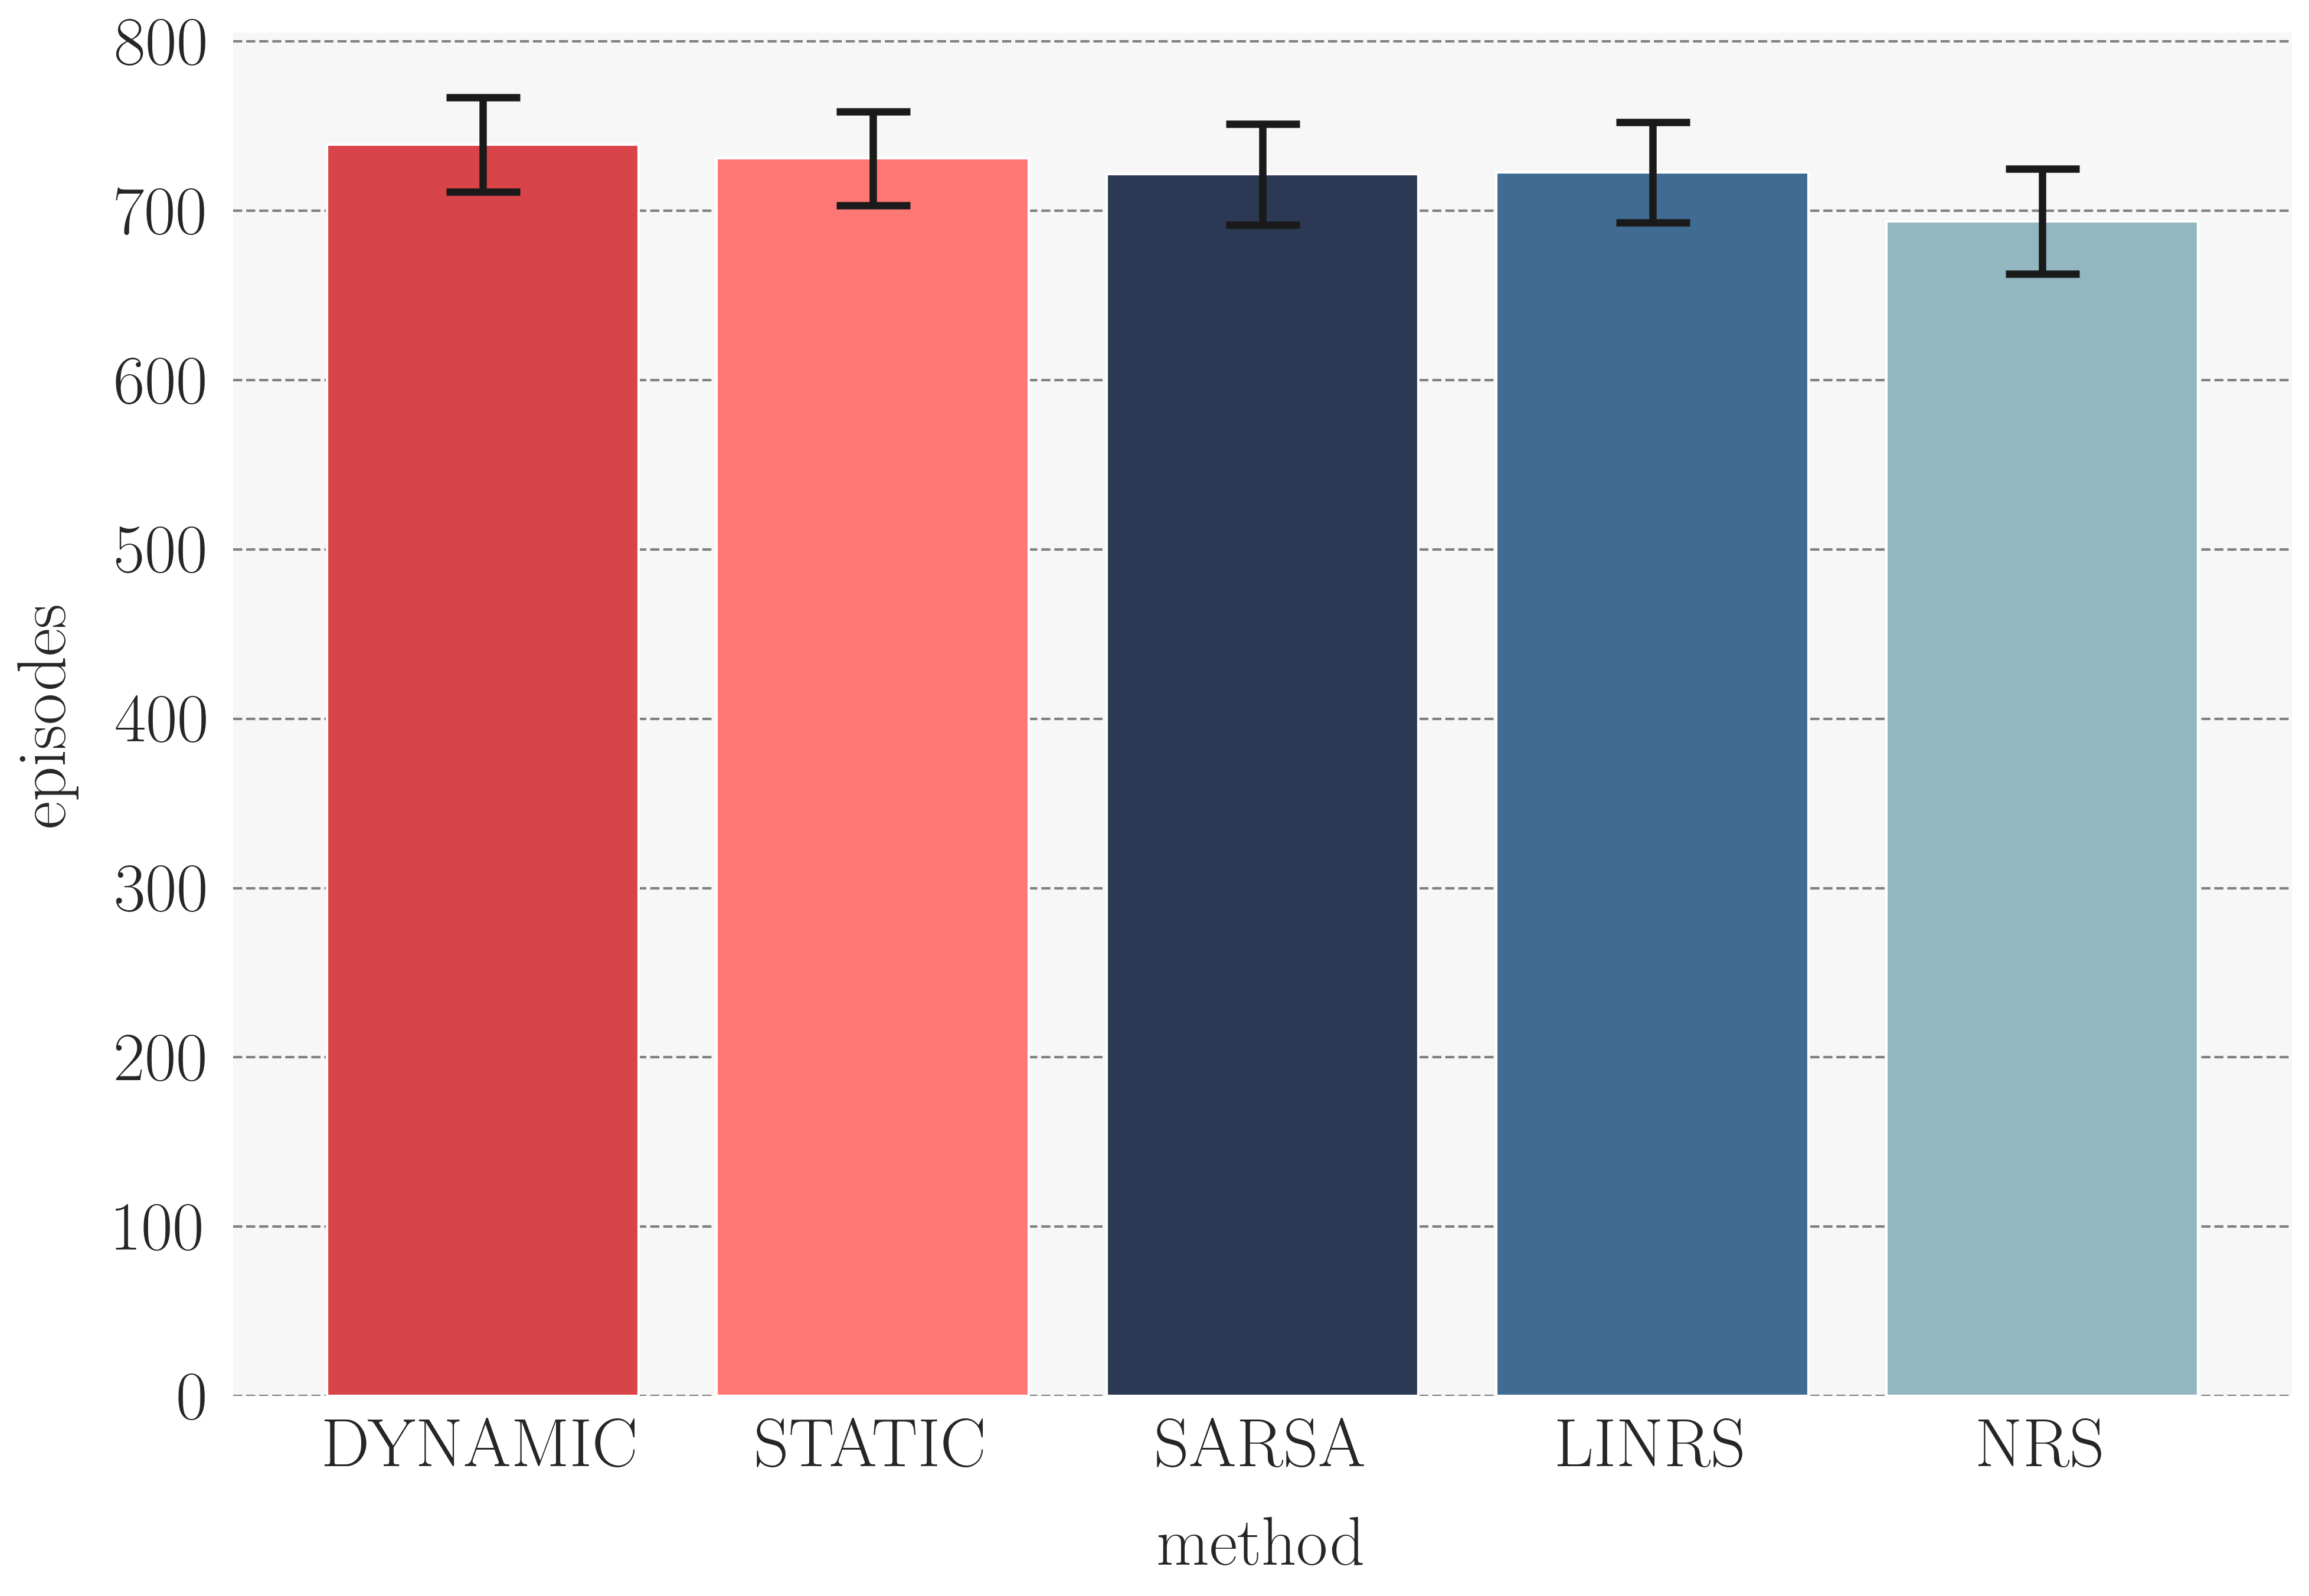

In [12]:
domain = "fourroom"
metric = "jumpstart"
data_df = pd.read_csv(f"../notebooks/in/{domain}/{metric}.csv", index_col=0)

target_data_df = data_df.loc[:99, ["DYN-HUMAN-", "STATIC-HUMAN-", "SARSA-", "LINRS-", "NRS-"]].rename(
    columns={
        "DYN-HUMAN-": "DYNAMIC", "STATIC-HUMAN-": "STATIC",
        "SARSA-": "SARSA", "LINRS-": "LINRS", "NRS-": "NRS"
    }
)
tuples = []
bar_plot_with_asterisk(metric, domain, target_data_df, tuples)

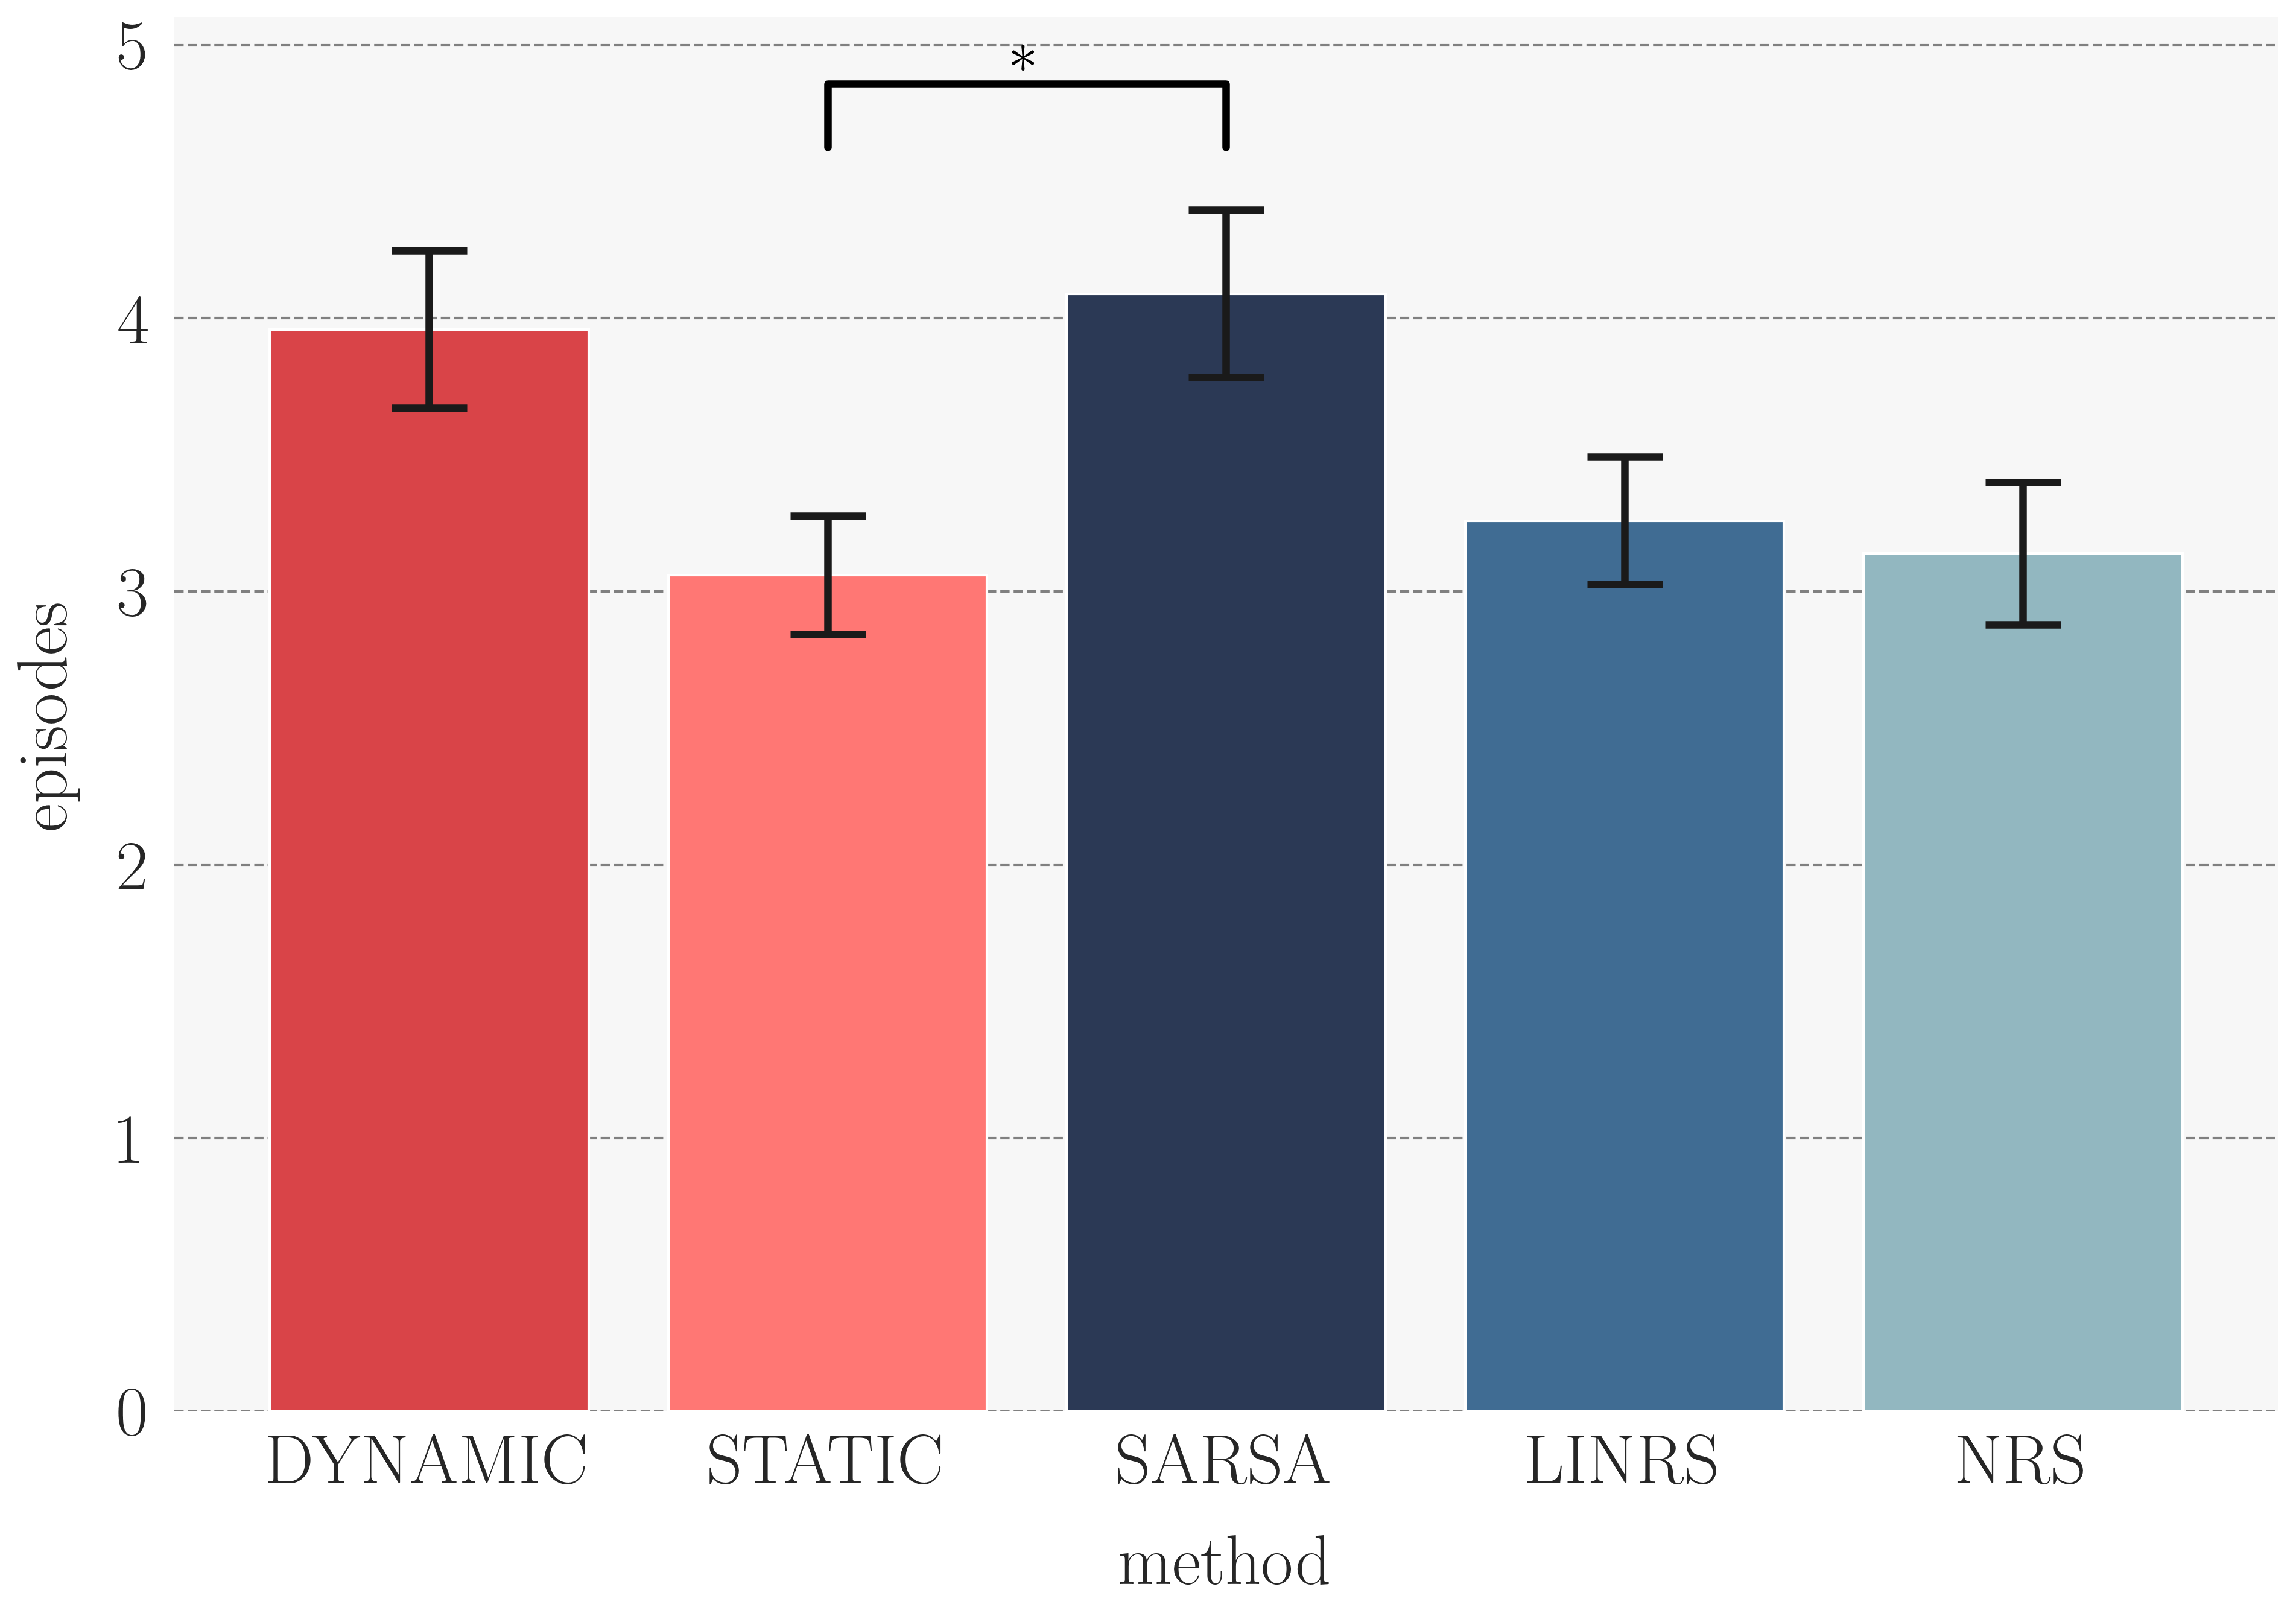

In [13]:
domain = "fourroom"
metric = "time_to_threshold_500"
data_df = pd.read_csv(f"../notebooks/in/{domain}/{metric}.csv", index_col=0)

target_data_df = data_df.loc[:99, ["DYN-HUMAN-", "STATIC-HUMAN-", "SARSA-", "LINRS-", "NRS-"]].rename(
    columns={
        "DYN-HUMAN-": "DYNAMIC", "STATIC-HUMAN-": "STATIC",
        "SARSA-": "SARSA", "LINRS-": "LINRS", "NRS-": "NRS"
    }
)
tuples = [(1, 2, "$*$")]
bar_plot_with_asterisk(metric, domain, target_data_df, tuples)

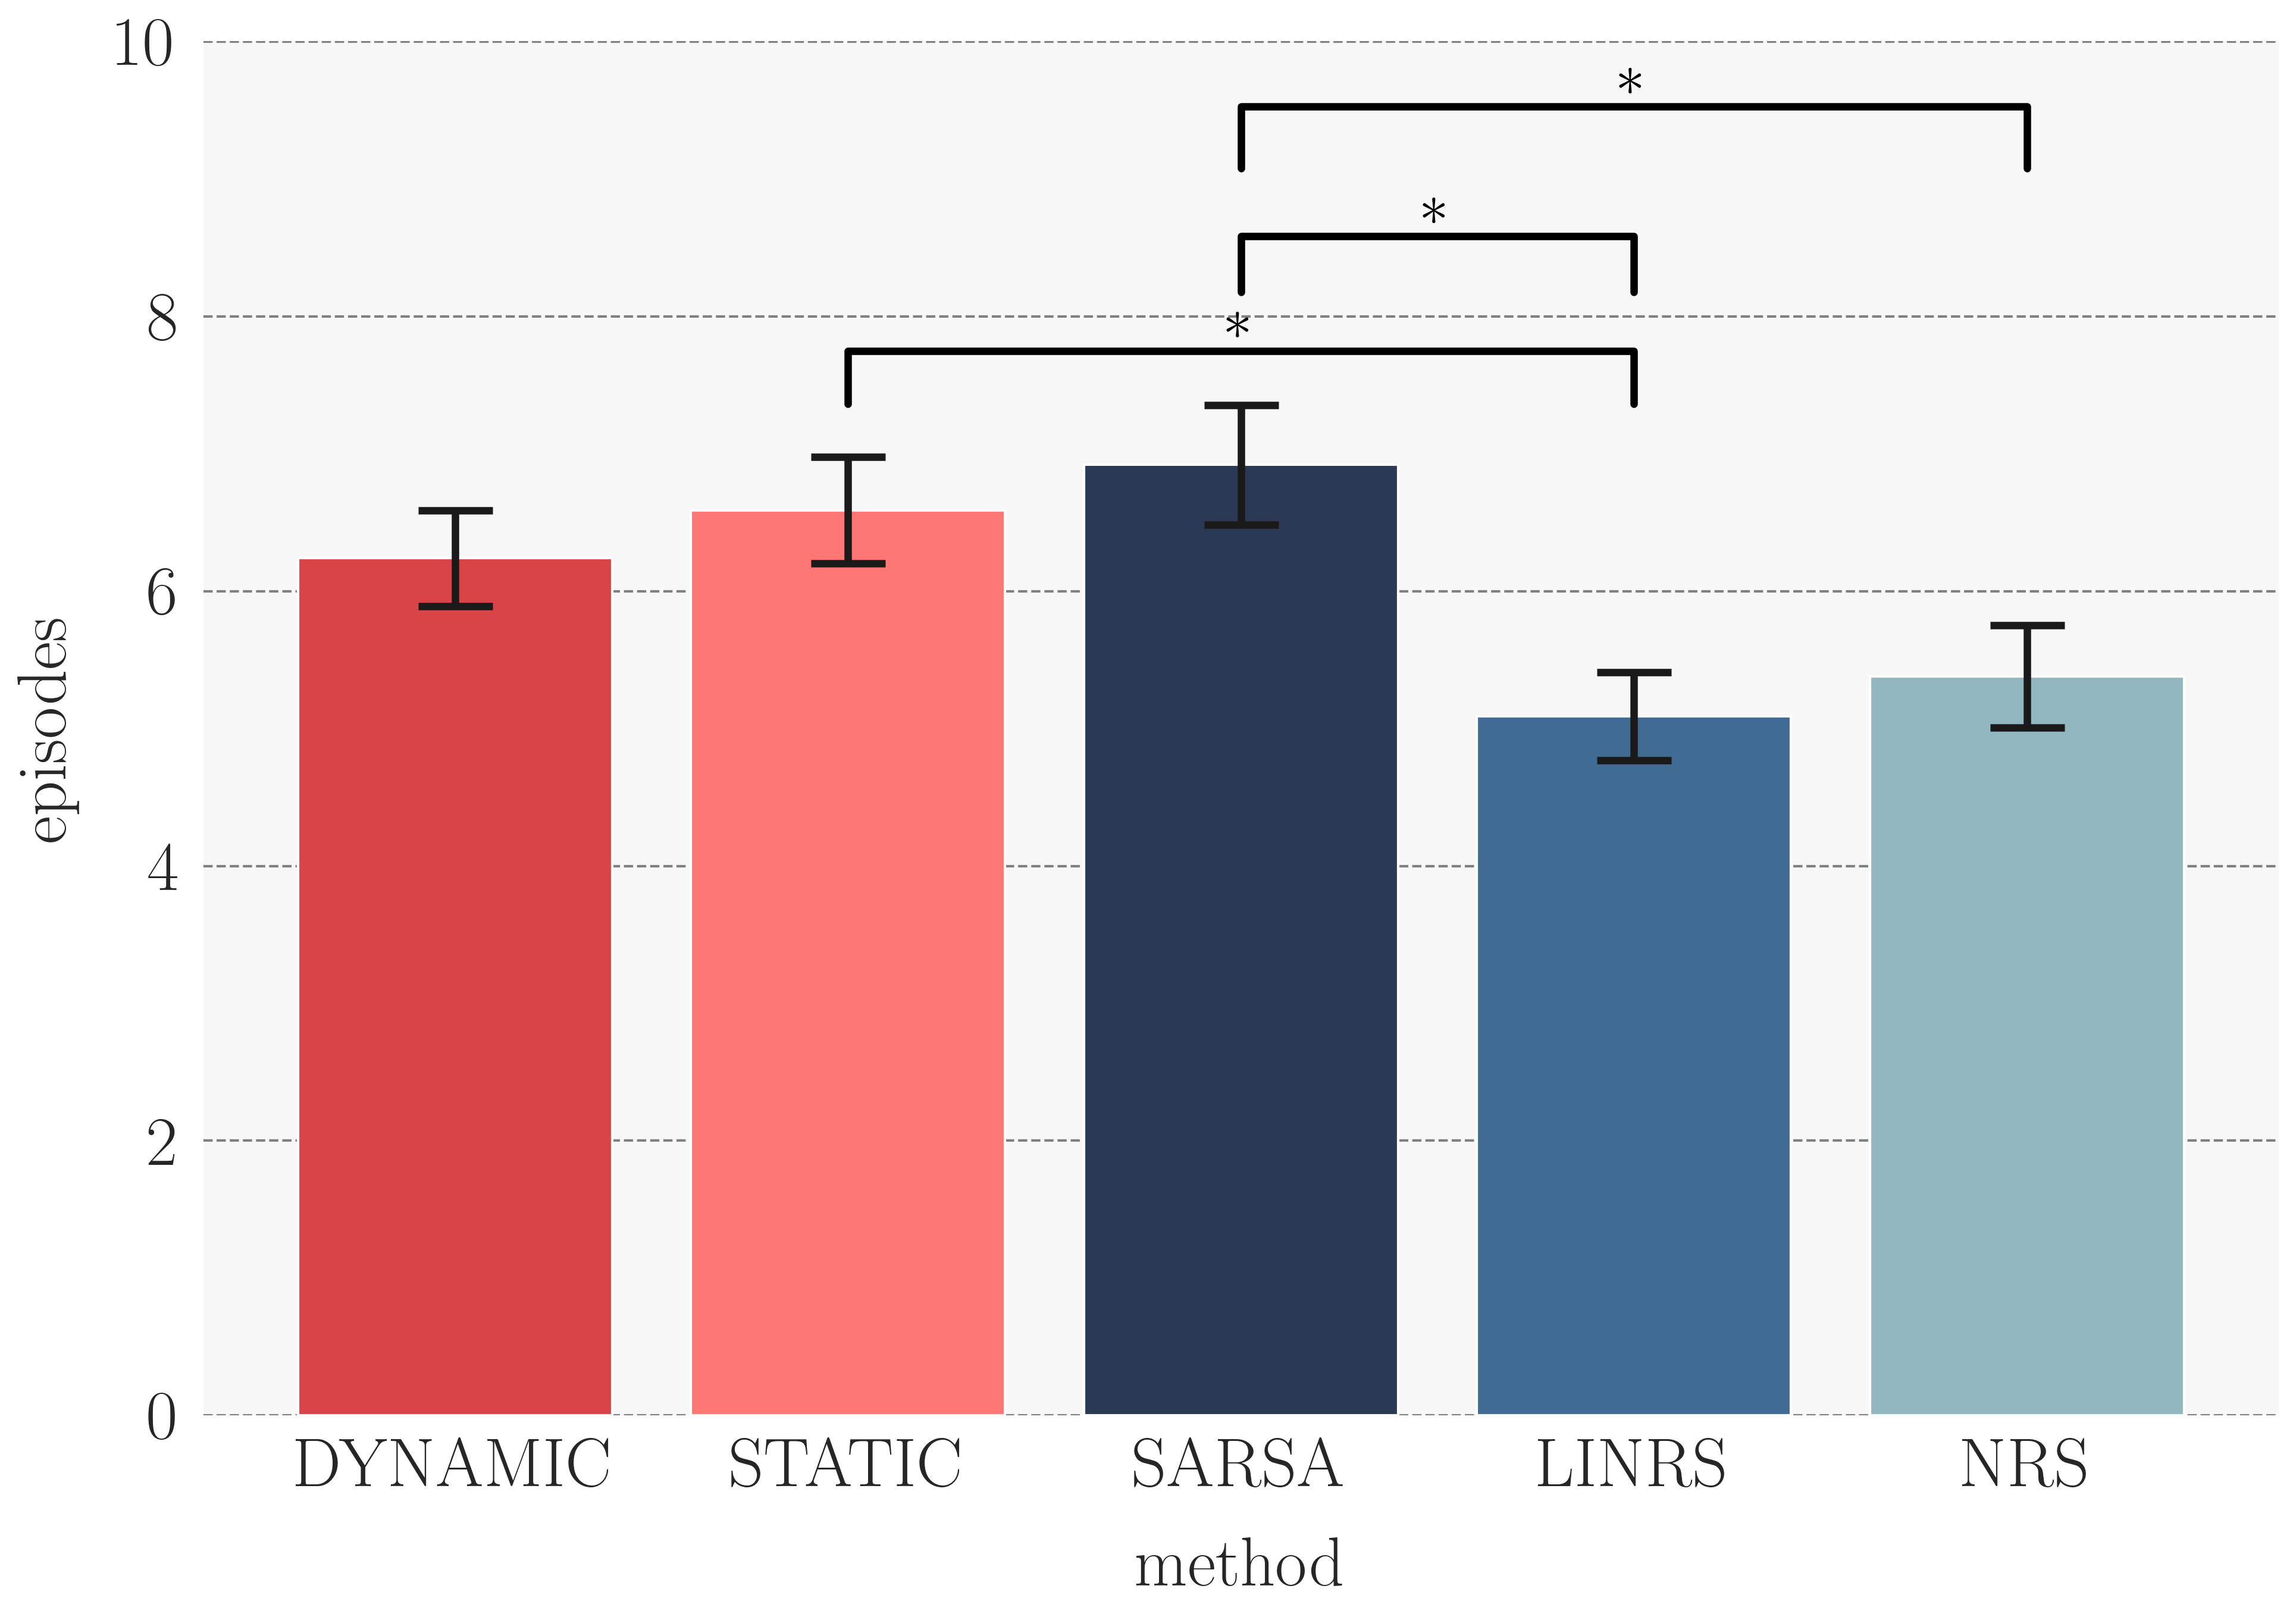

In [14]:
domain = "fourroom"
metric = "time_to_threshold_300"
data_df = pd.read_csv(f"../notebooks/in/{domain}/{metric}.csv", index_col=0)

target_data_df = data_df.loc[:99, ["DYN-HUMAN-", "STATIC-HUMAN-", "SARSA-", "LINRS-", "NRS-"]].rename(
    columns={
        "DYN-HUMAN-": "DYNAMIC", "STATIC-HUMAN-": "STATIC",
        "SARSA-": "SARSA", "LINRS-": "LINRS", "NRS-": "NRS"
    }
)
tuples = [(1, 3, "$*$"), (2, 3, "$*$"), (2, 4, "$*$")]
bar_plot_with_asterisk(metric, domain, target_data_df, tuples)

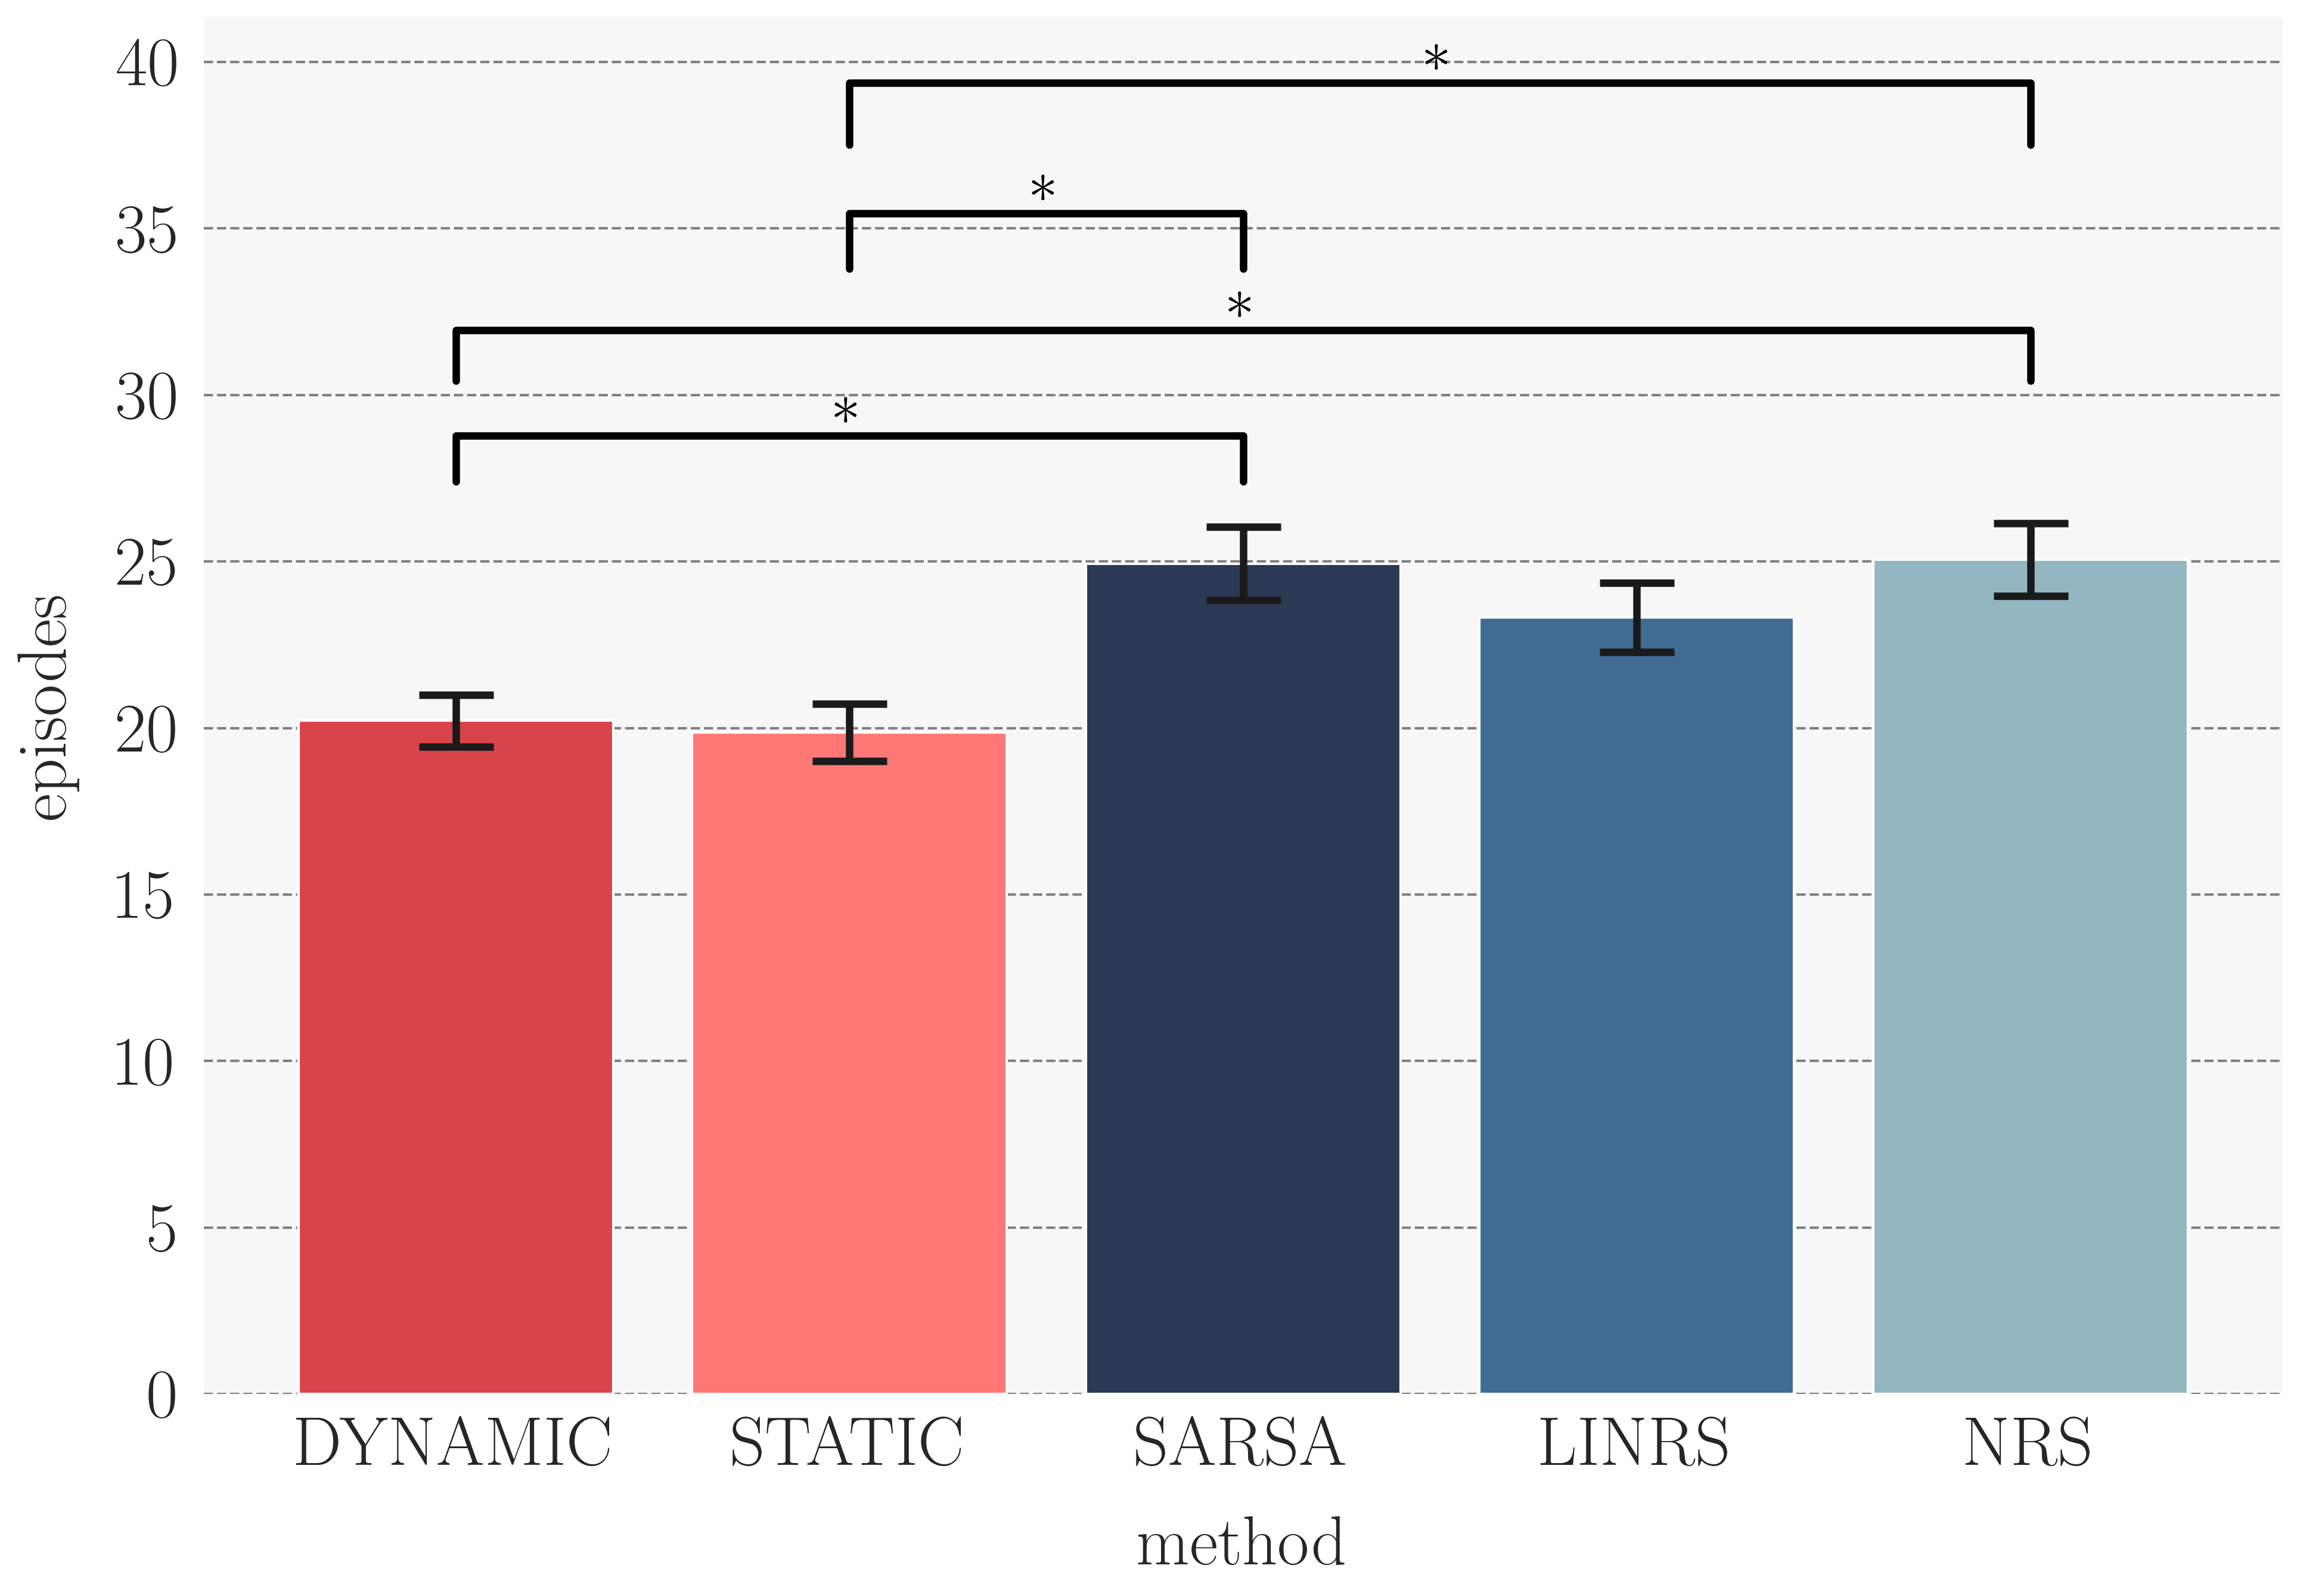

In [15]:
domain = "fourroom"
metric = "time_to_threshold_100"
data_df = pd.read_csv(f"../notebooks/in/{domain}/{metric}.csv", index_col=0)

target_data_df = data_df.loc[:99, ["DYN-HUMAN-", "STATIC-HUMAN-", "SARSA-", "LINRS-", "NRS-"]].rename(
    columns={
        "DYN-HUMAN-": "DYNAMIC", "STATIC-HUMAN-": "STATIC",
        "SARSA-": "SARSA", "LINRS-": "LINRS", "NRS-": "NRS"
    }
)
tuples = [
    (0, 2, "$*$"), (0, 4, "$*$"), (1, 2, "$*$"), (1, 4, "$*$")
]
bar_plot_with_asterisk(metric, domain, target_data_df, tuples)

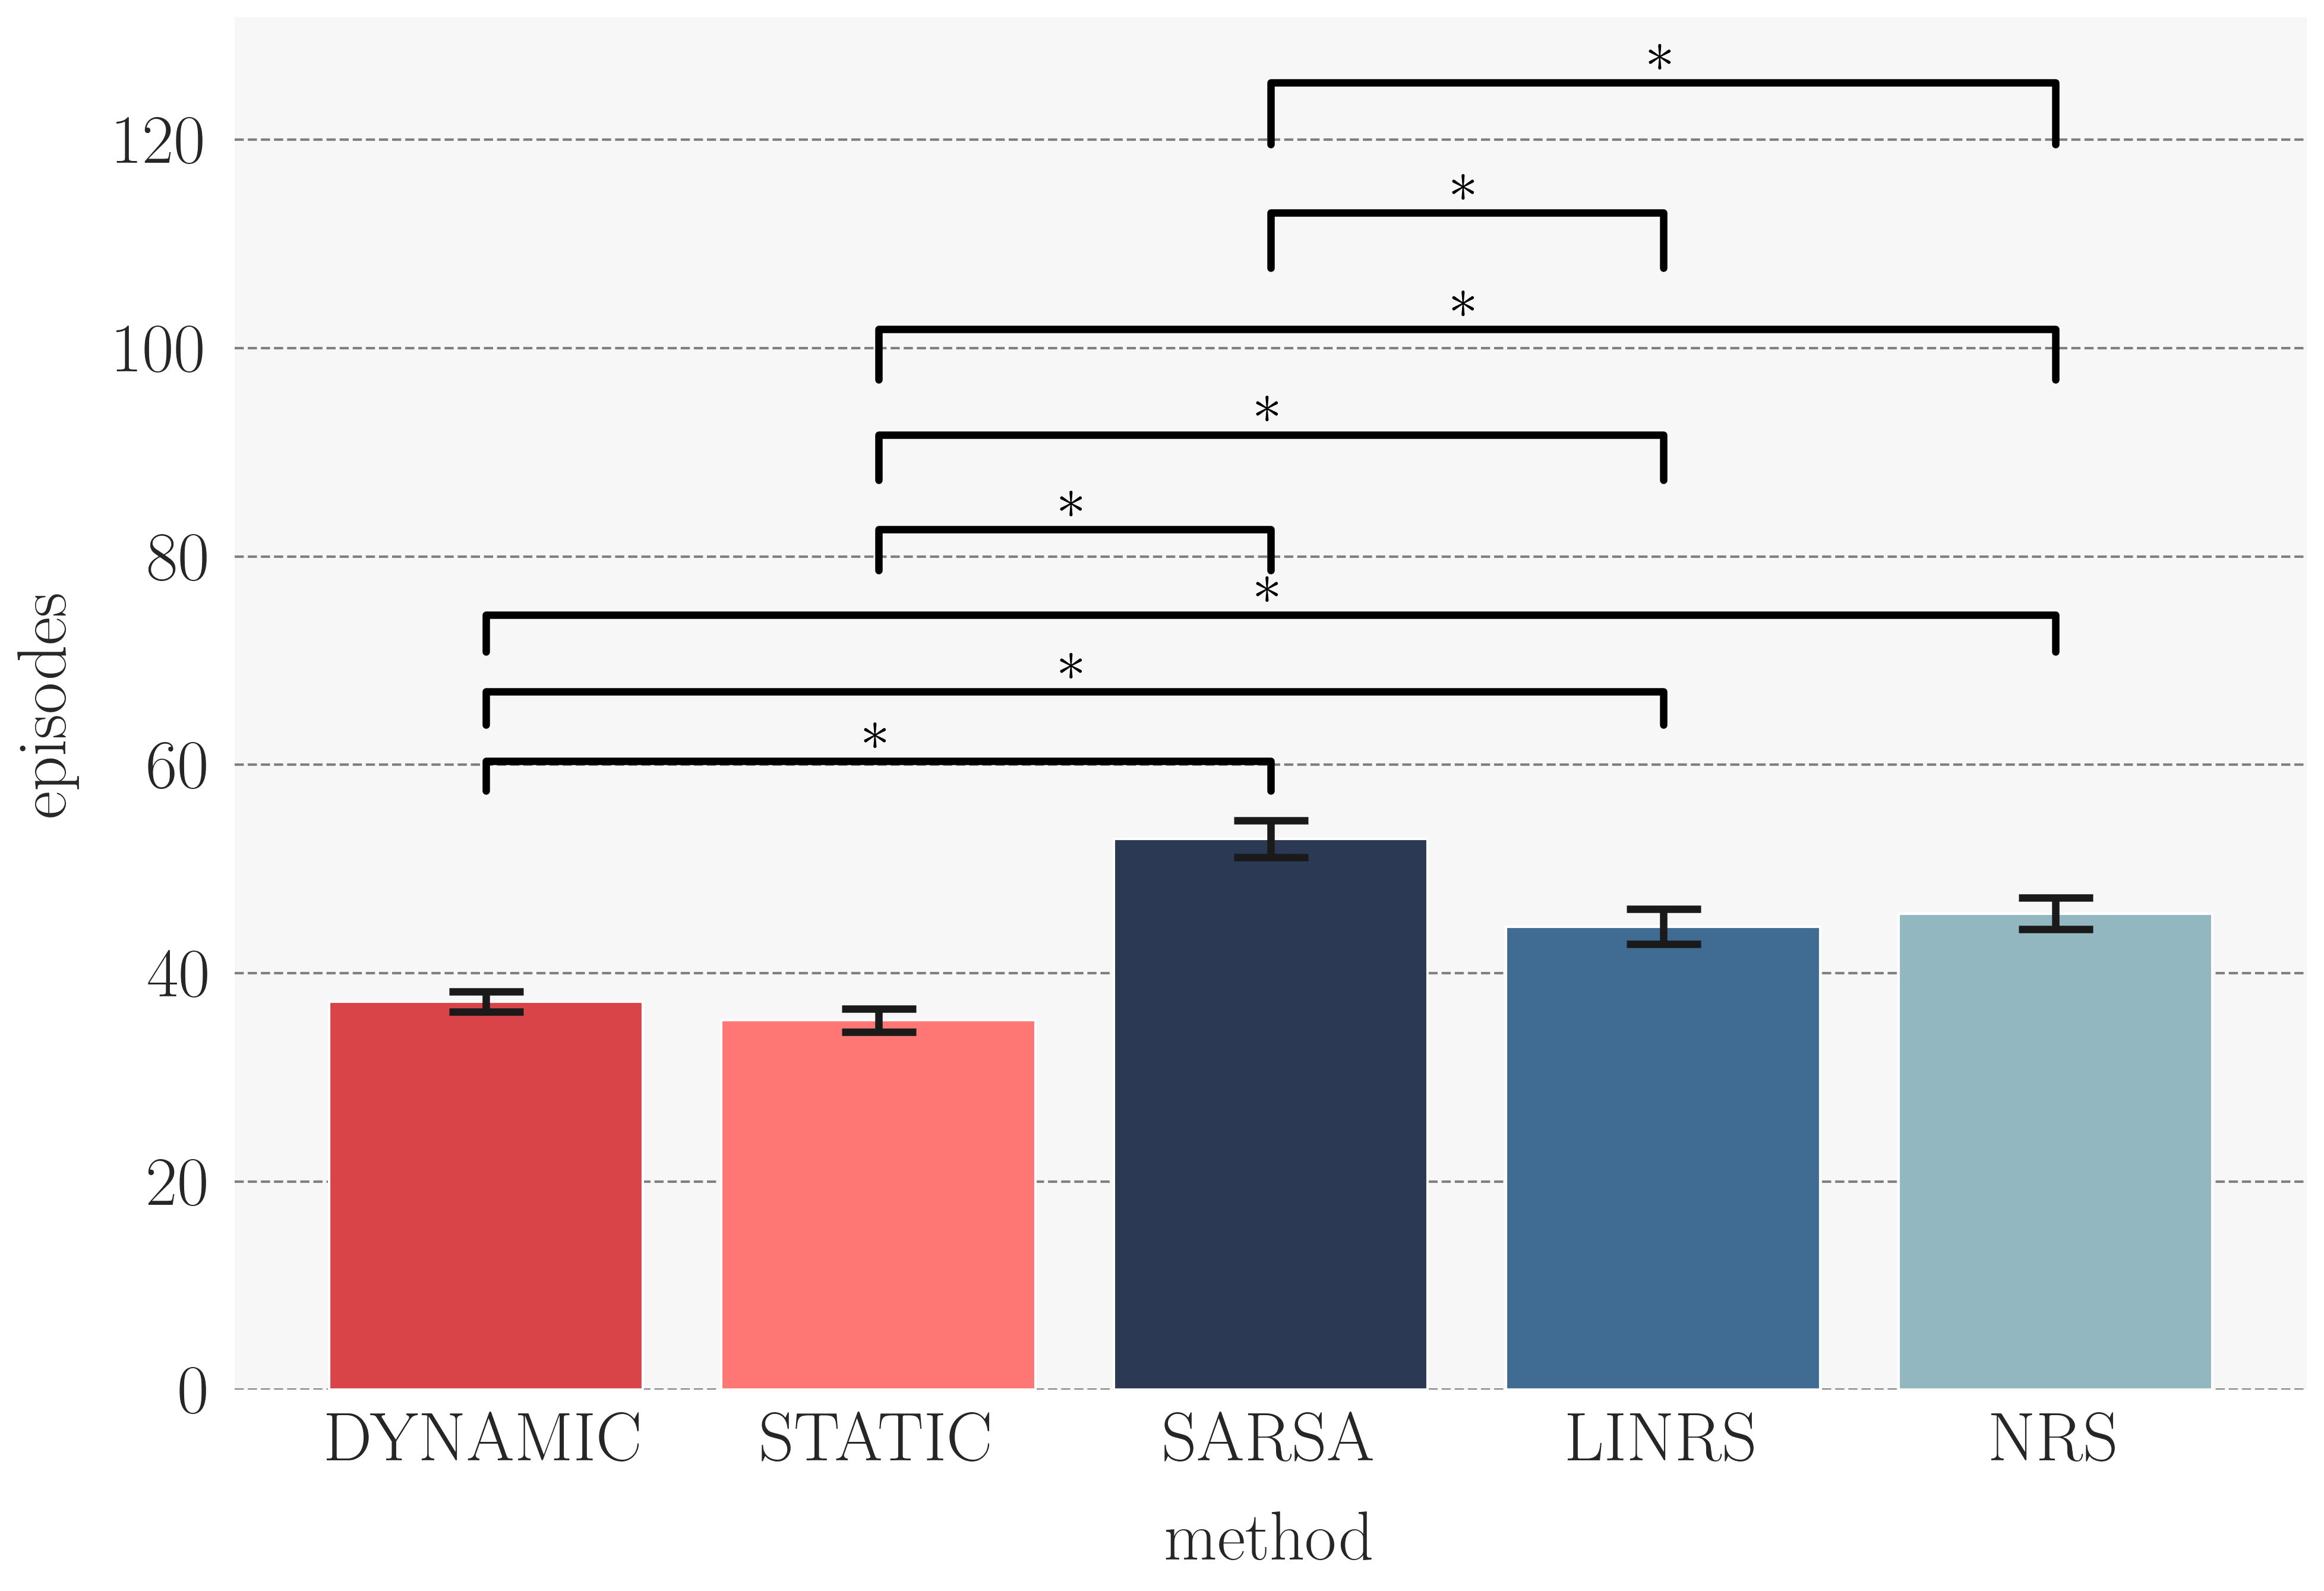

In [16]:
domain = "fourroom"
metric = "time_to_threshold_50"
data_df = pd.read_csv(f"../notebooks/in/{domain}/{metric}.csv", index_col=0)

target_data_df = data_df.loc[:99, ["DYN-HUMAN-", "STATIC-HUMAN-", "SARSA-", "LINRS-", "NRS-"]].rename(
    columns={
        "DYN-HUMAN-": "DYNAMIC", "STATIC-HUMAN-": "STATIC",
        "SARSA-": "SARSA", "LINRS-": "LINRS", "NRS-": "NRS"
    }
)
tuples = [
    (0, 2, "$*$"), (0, 3, "$*$"), (0, 4, "$*$"), (1, 2, "$*$"), (1, 3, "$*$"), (1, 4, "$*$"),
    (2, 3, "$*$"), (2, 4, "$*$")
]
bar_plot_with_asterisk(metric, domain, target_data_df, tuples)

### Subgoal Quality

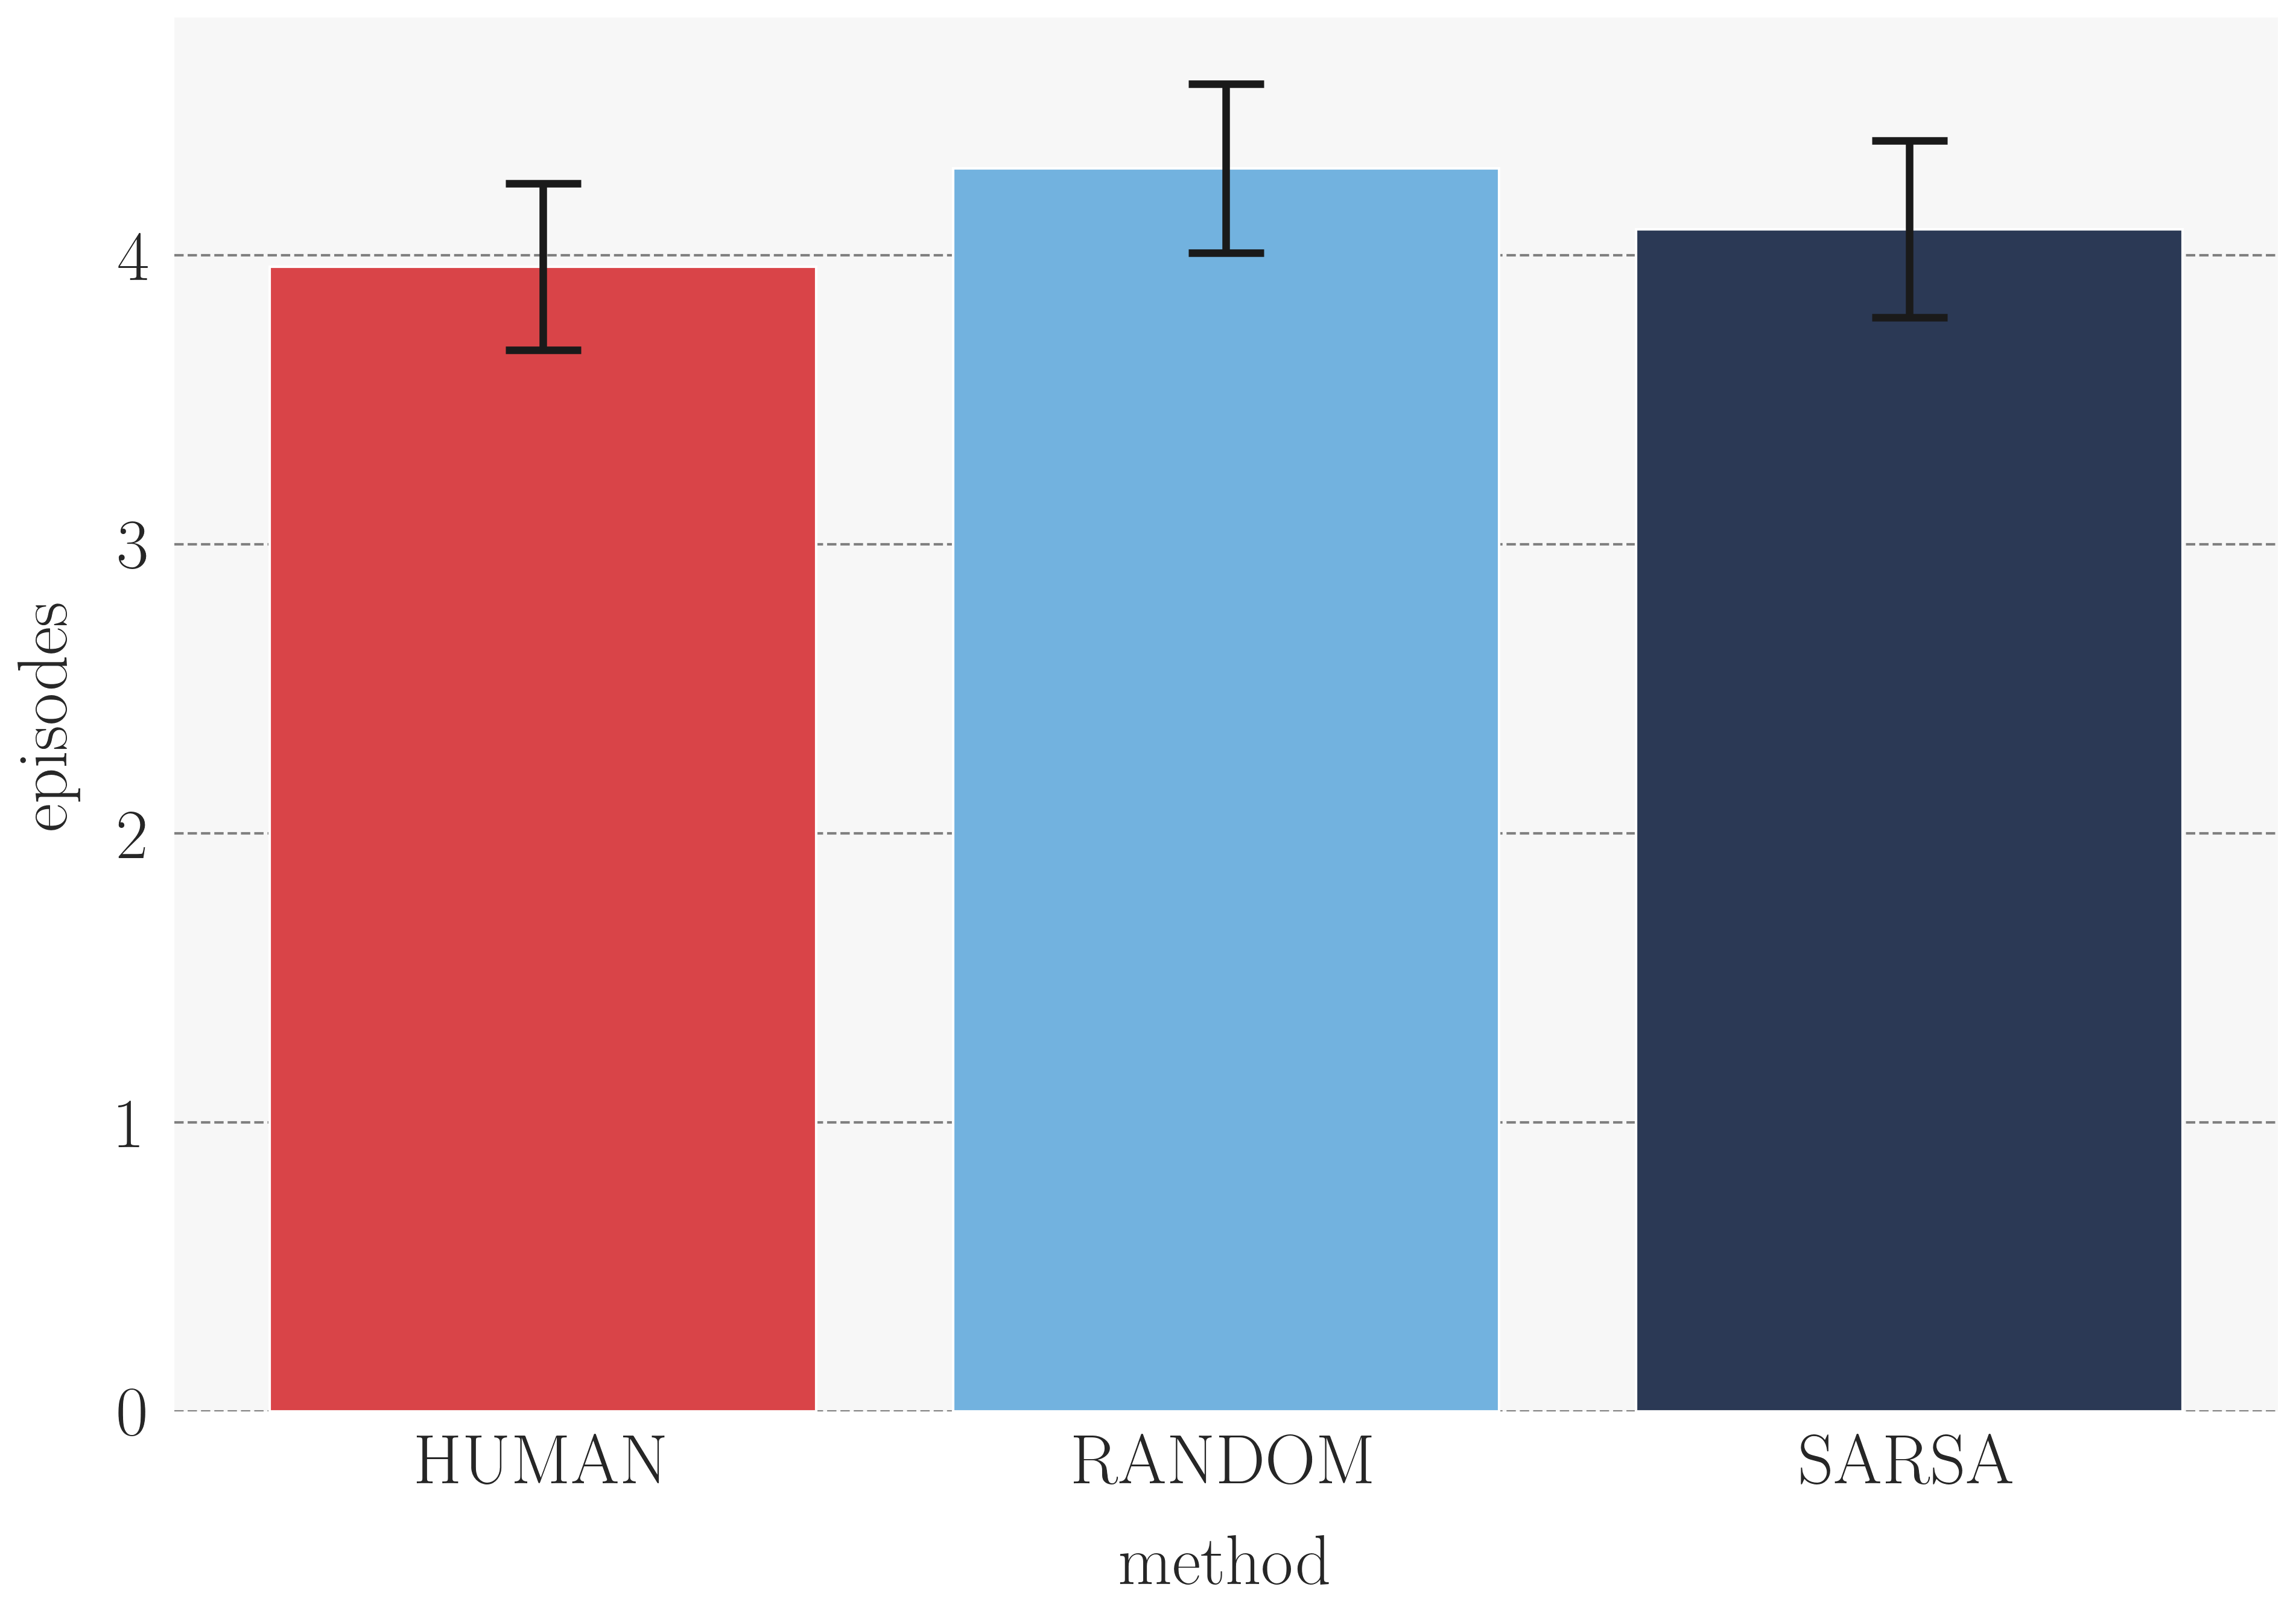

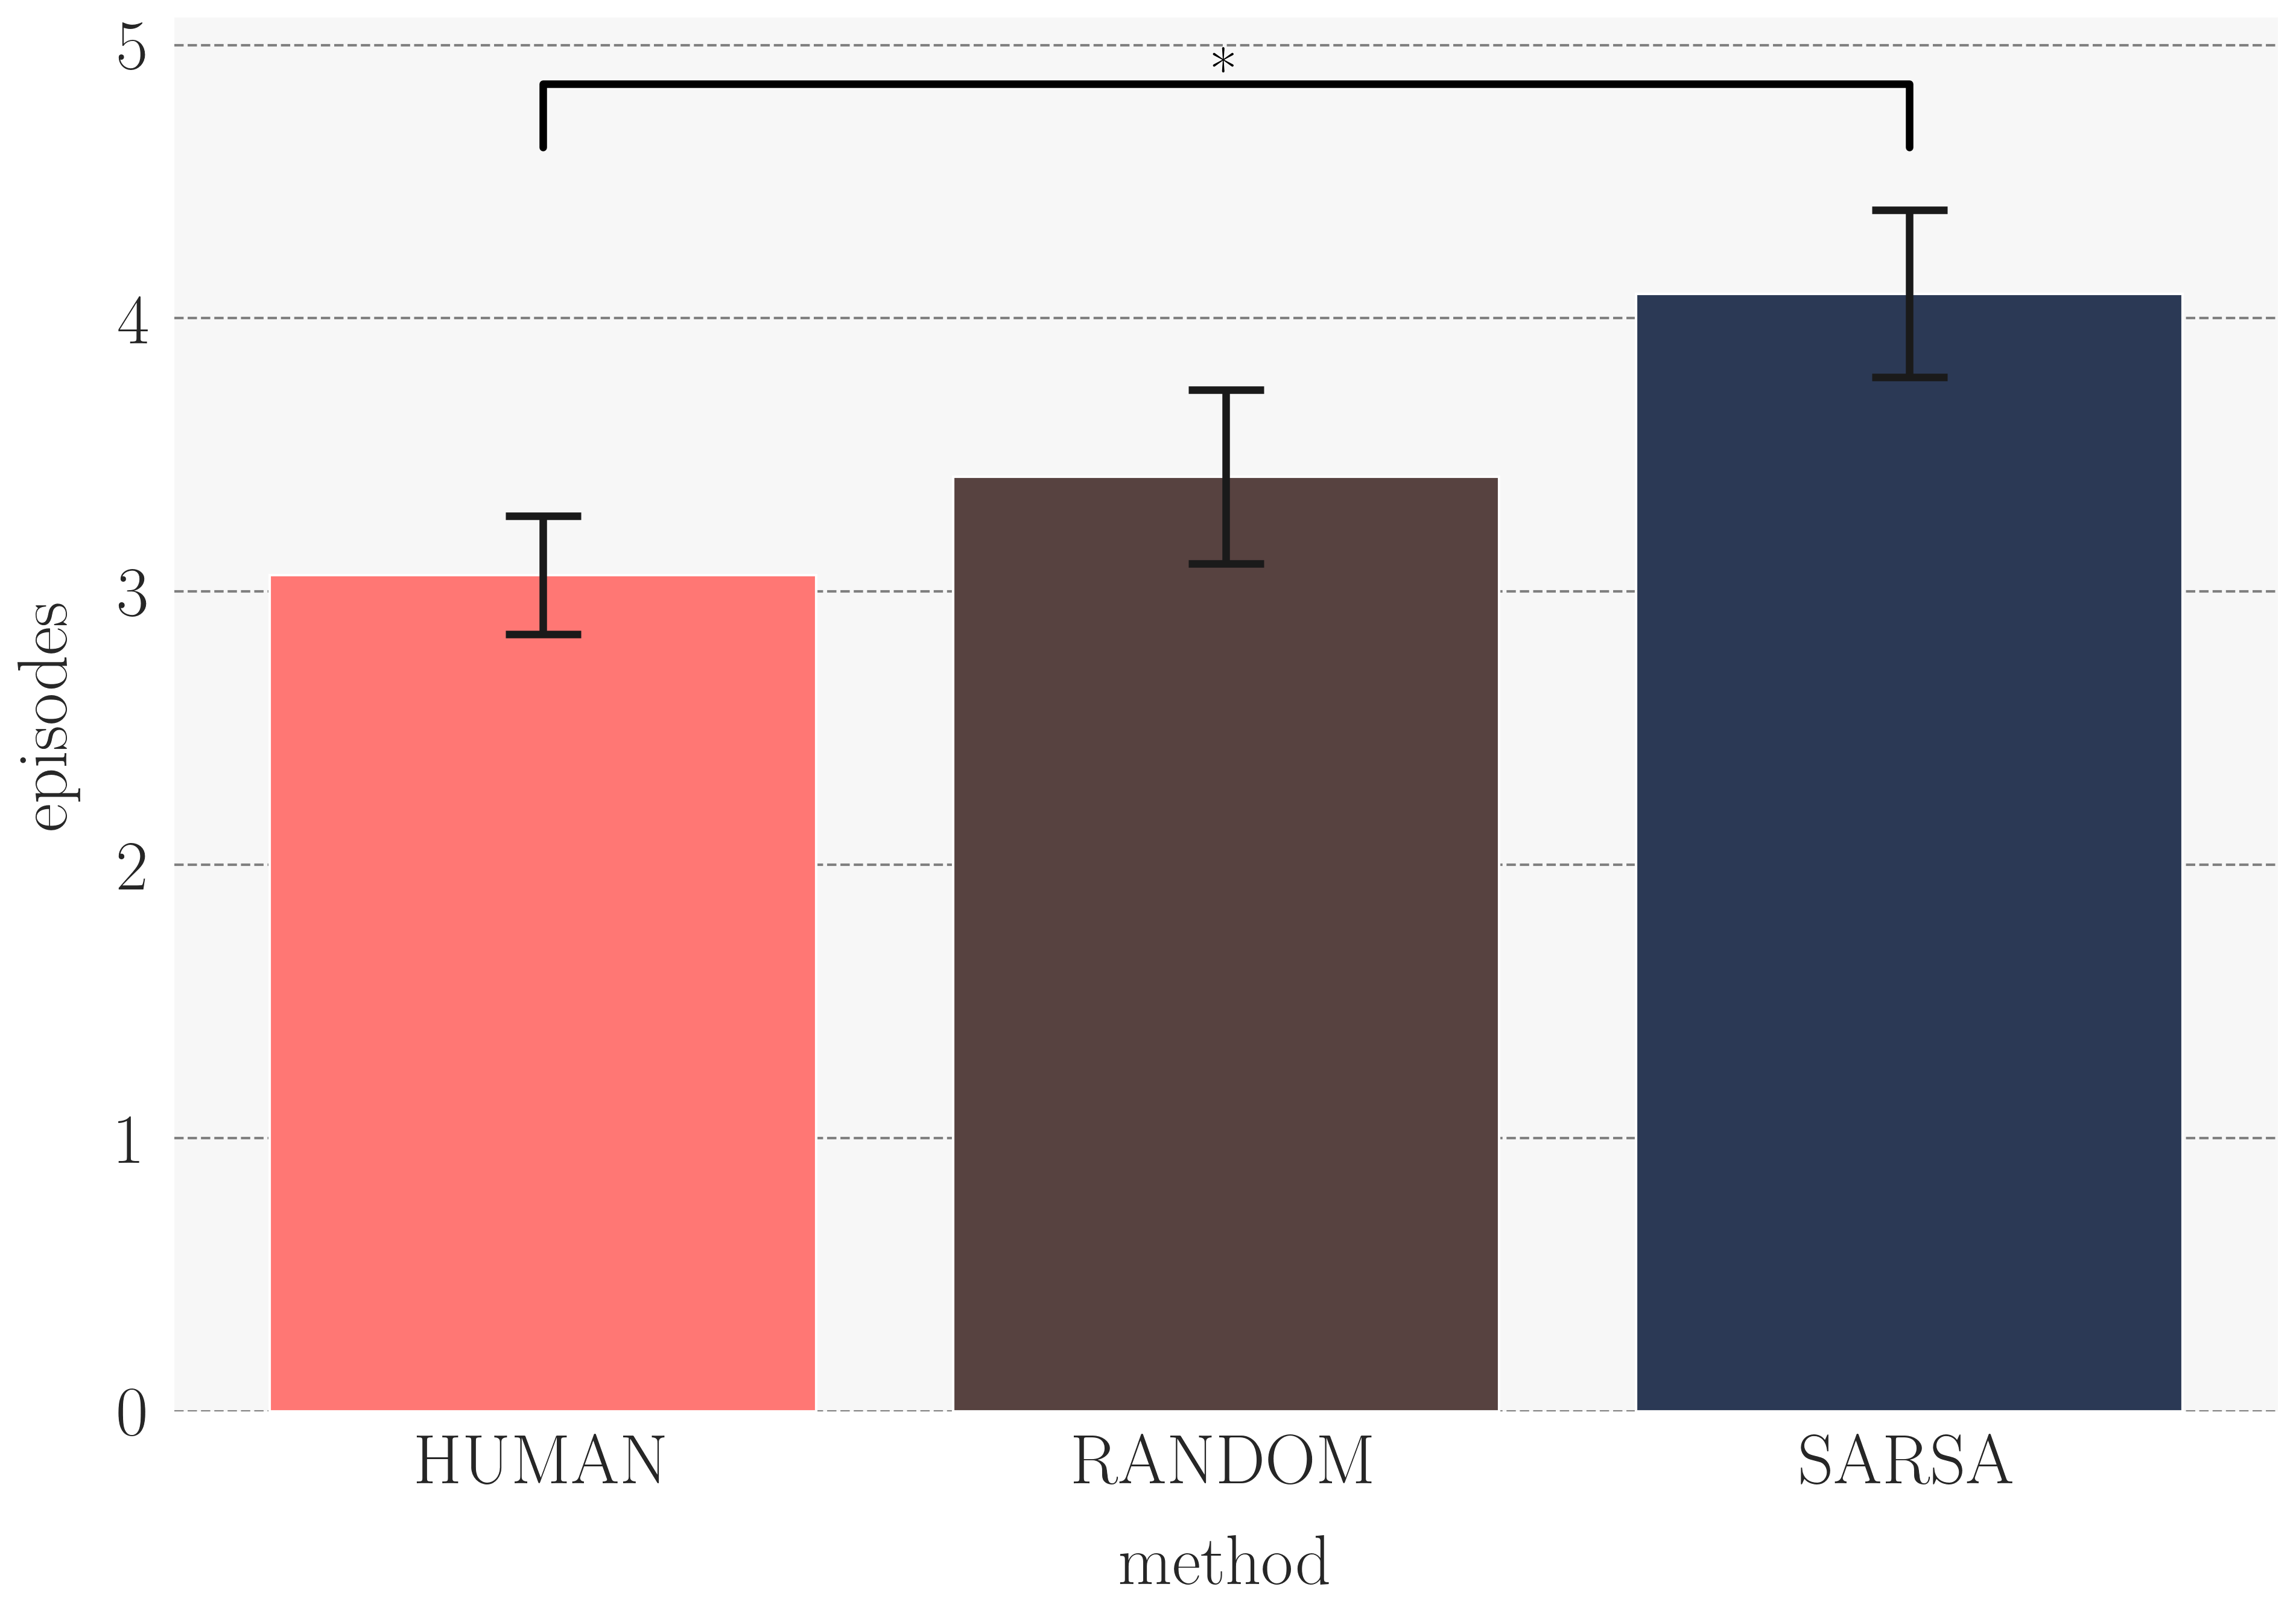

In [17]:
domain = "fourroom"
metric = "time_to_threshold_500"
data_df = pd.read_csv(f"../notebooks/in/{domain}/{metric}.csv", index_col=0)

target_data_df = data_df.loc[:99, :].rename(
    columns={
        "SARSA-": "SARSA"
    }
)
# dynamic
dynamic_df = target_data_df[["DYN-HUMAN-", "DYN-RANDOM-", "SARSA"]].rename(
    columns={
        "DYN-HUMAN-": "HUMAN", "DYN-RANDOM-": "RANDOM"
    }
)
tuples = []
bar_plot_with_asterisk_qsubg(metric, domain, dynamic_df, tuples, "dynamic", ["#d94448", "#72B2DF", "#2b3955"])
# static
static_df = target_data_df[["STATIC-HUMAN-", "STATIC-RANDOM-", "SARSA"]].rename(
    columns={
        "STATIC-HUMAN-": "HUMAN", "STATIC-RANDOM-": "RANDOM"
    }
)
tuples = [(0, 2, "*")]
bar_plot_with_asterisk_qsubg(metric, domain, static_df, tuples, "static", ["#ff7774", "#574240", "#2b3955"])


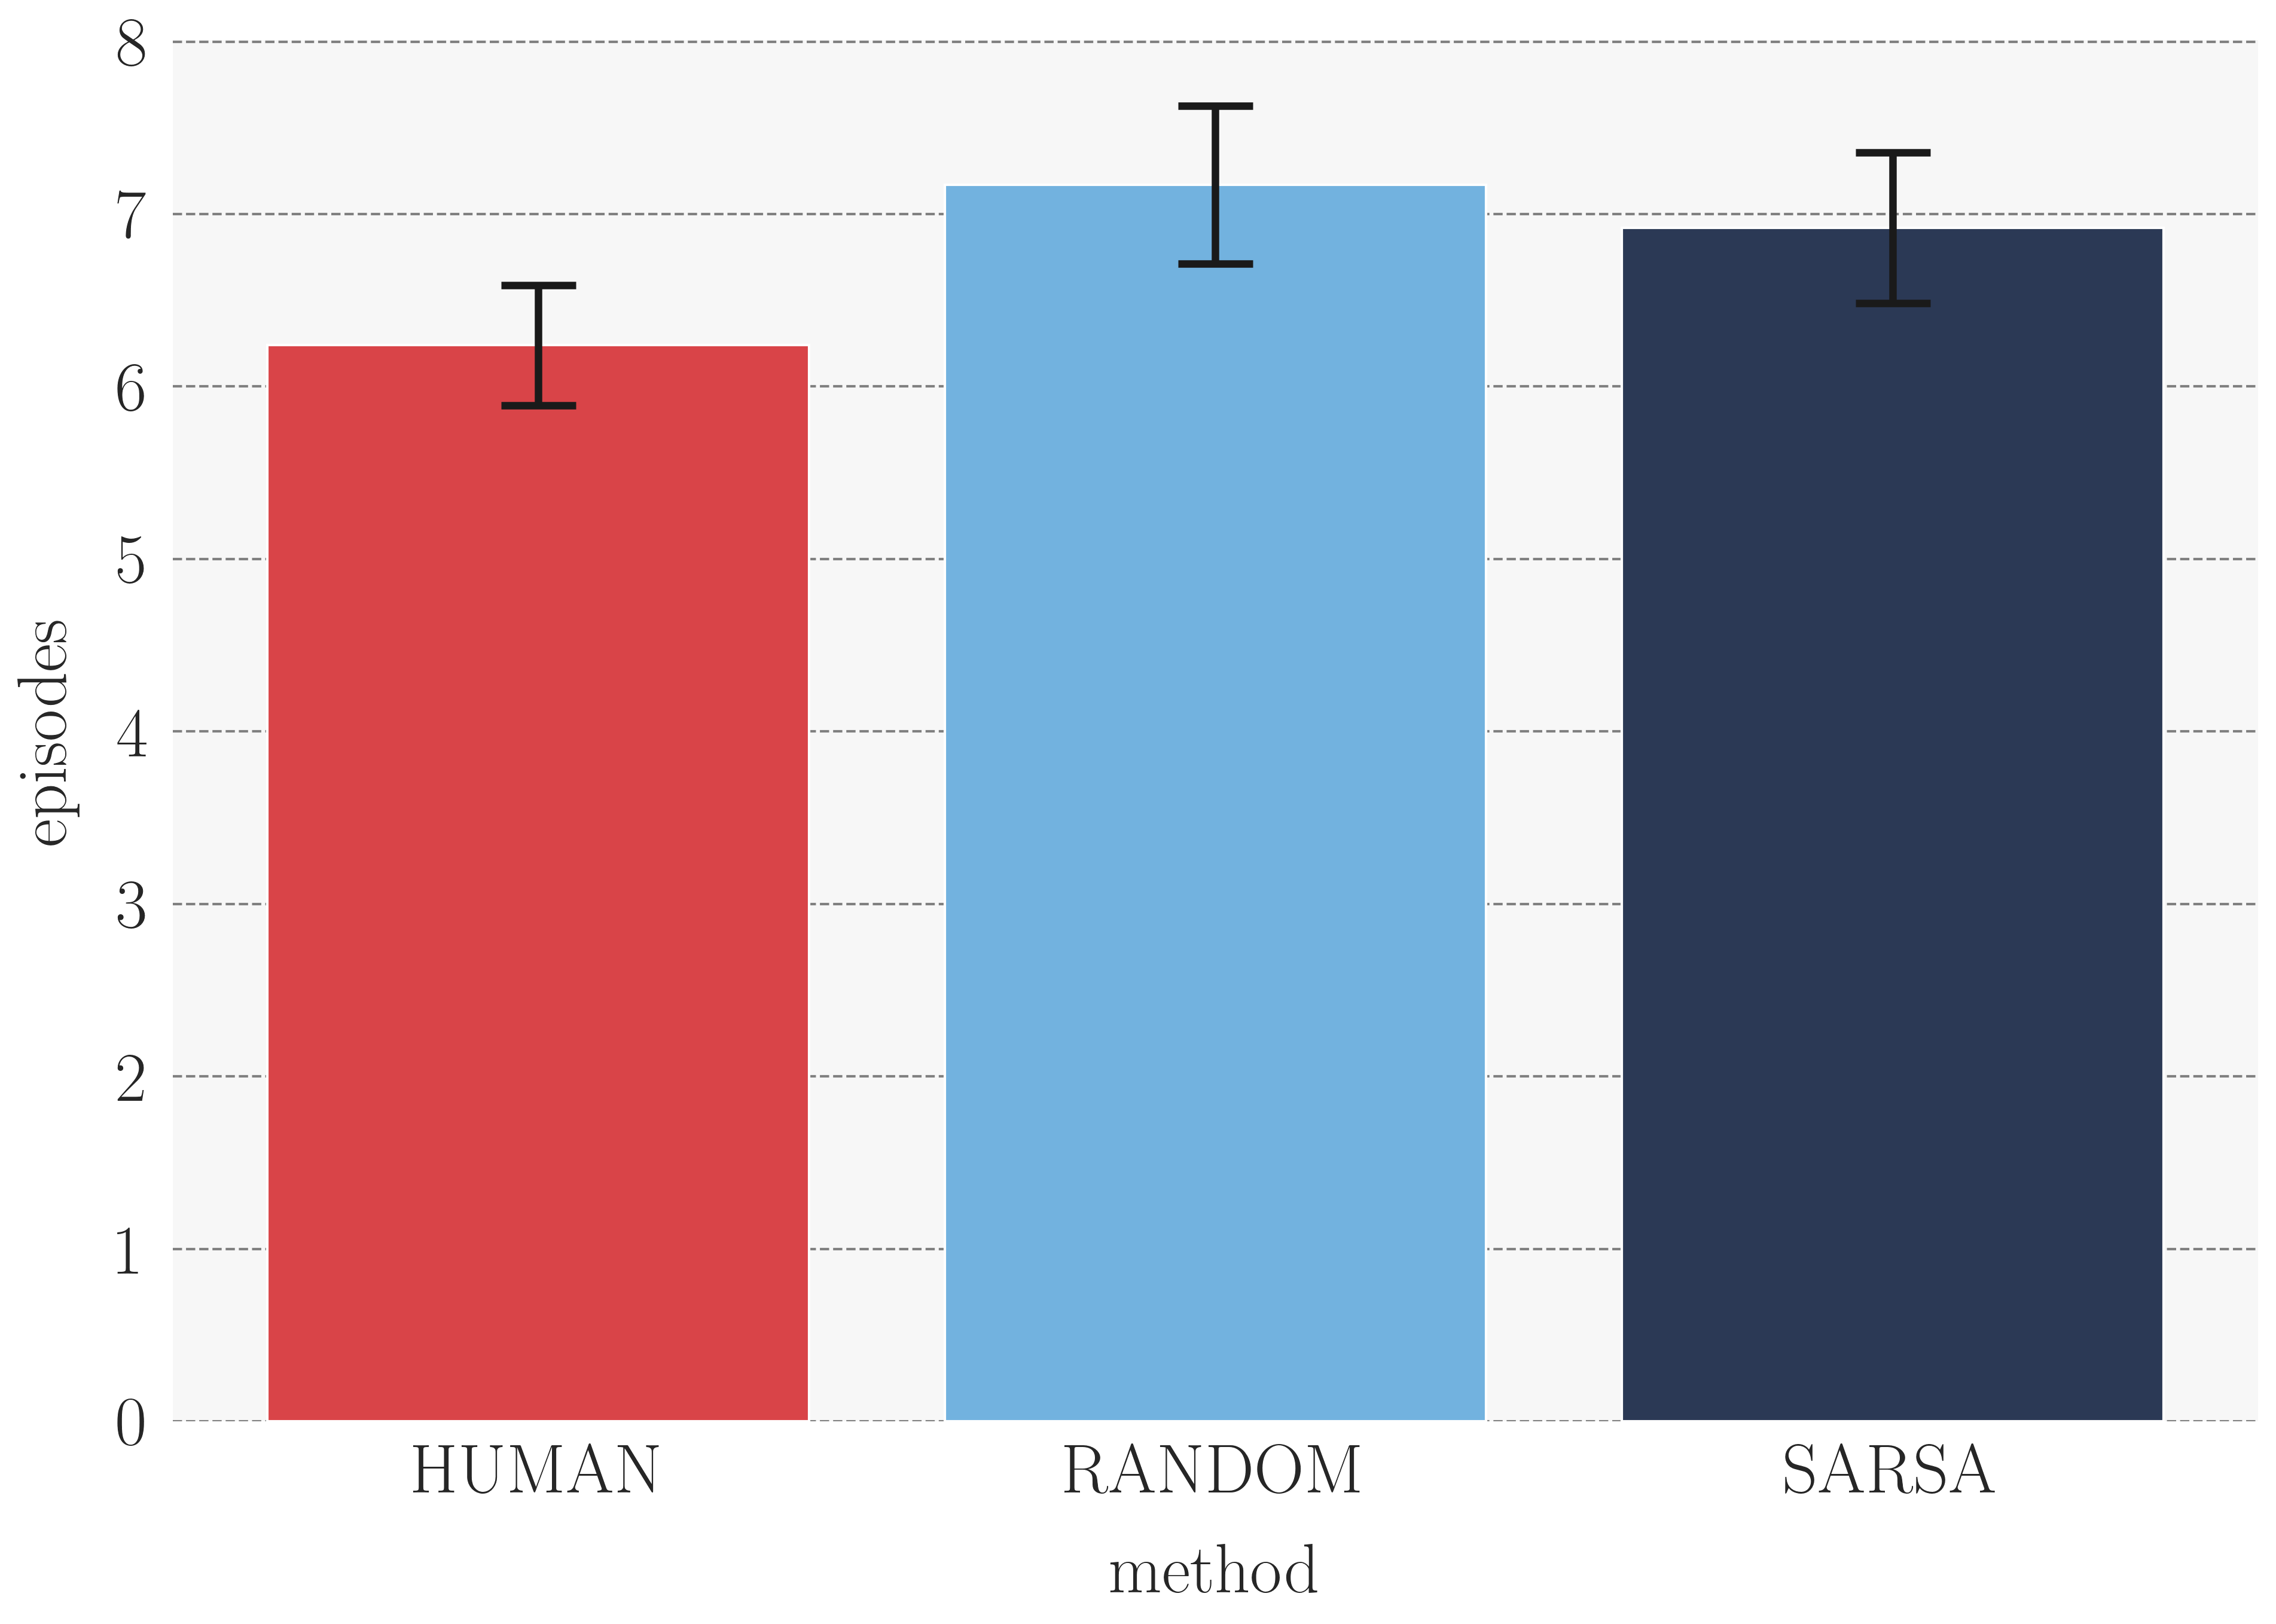

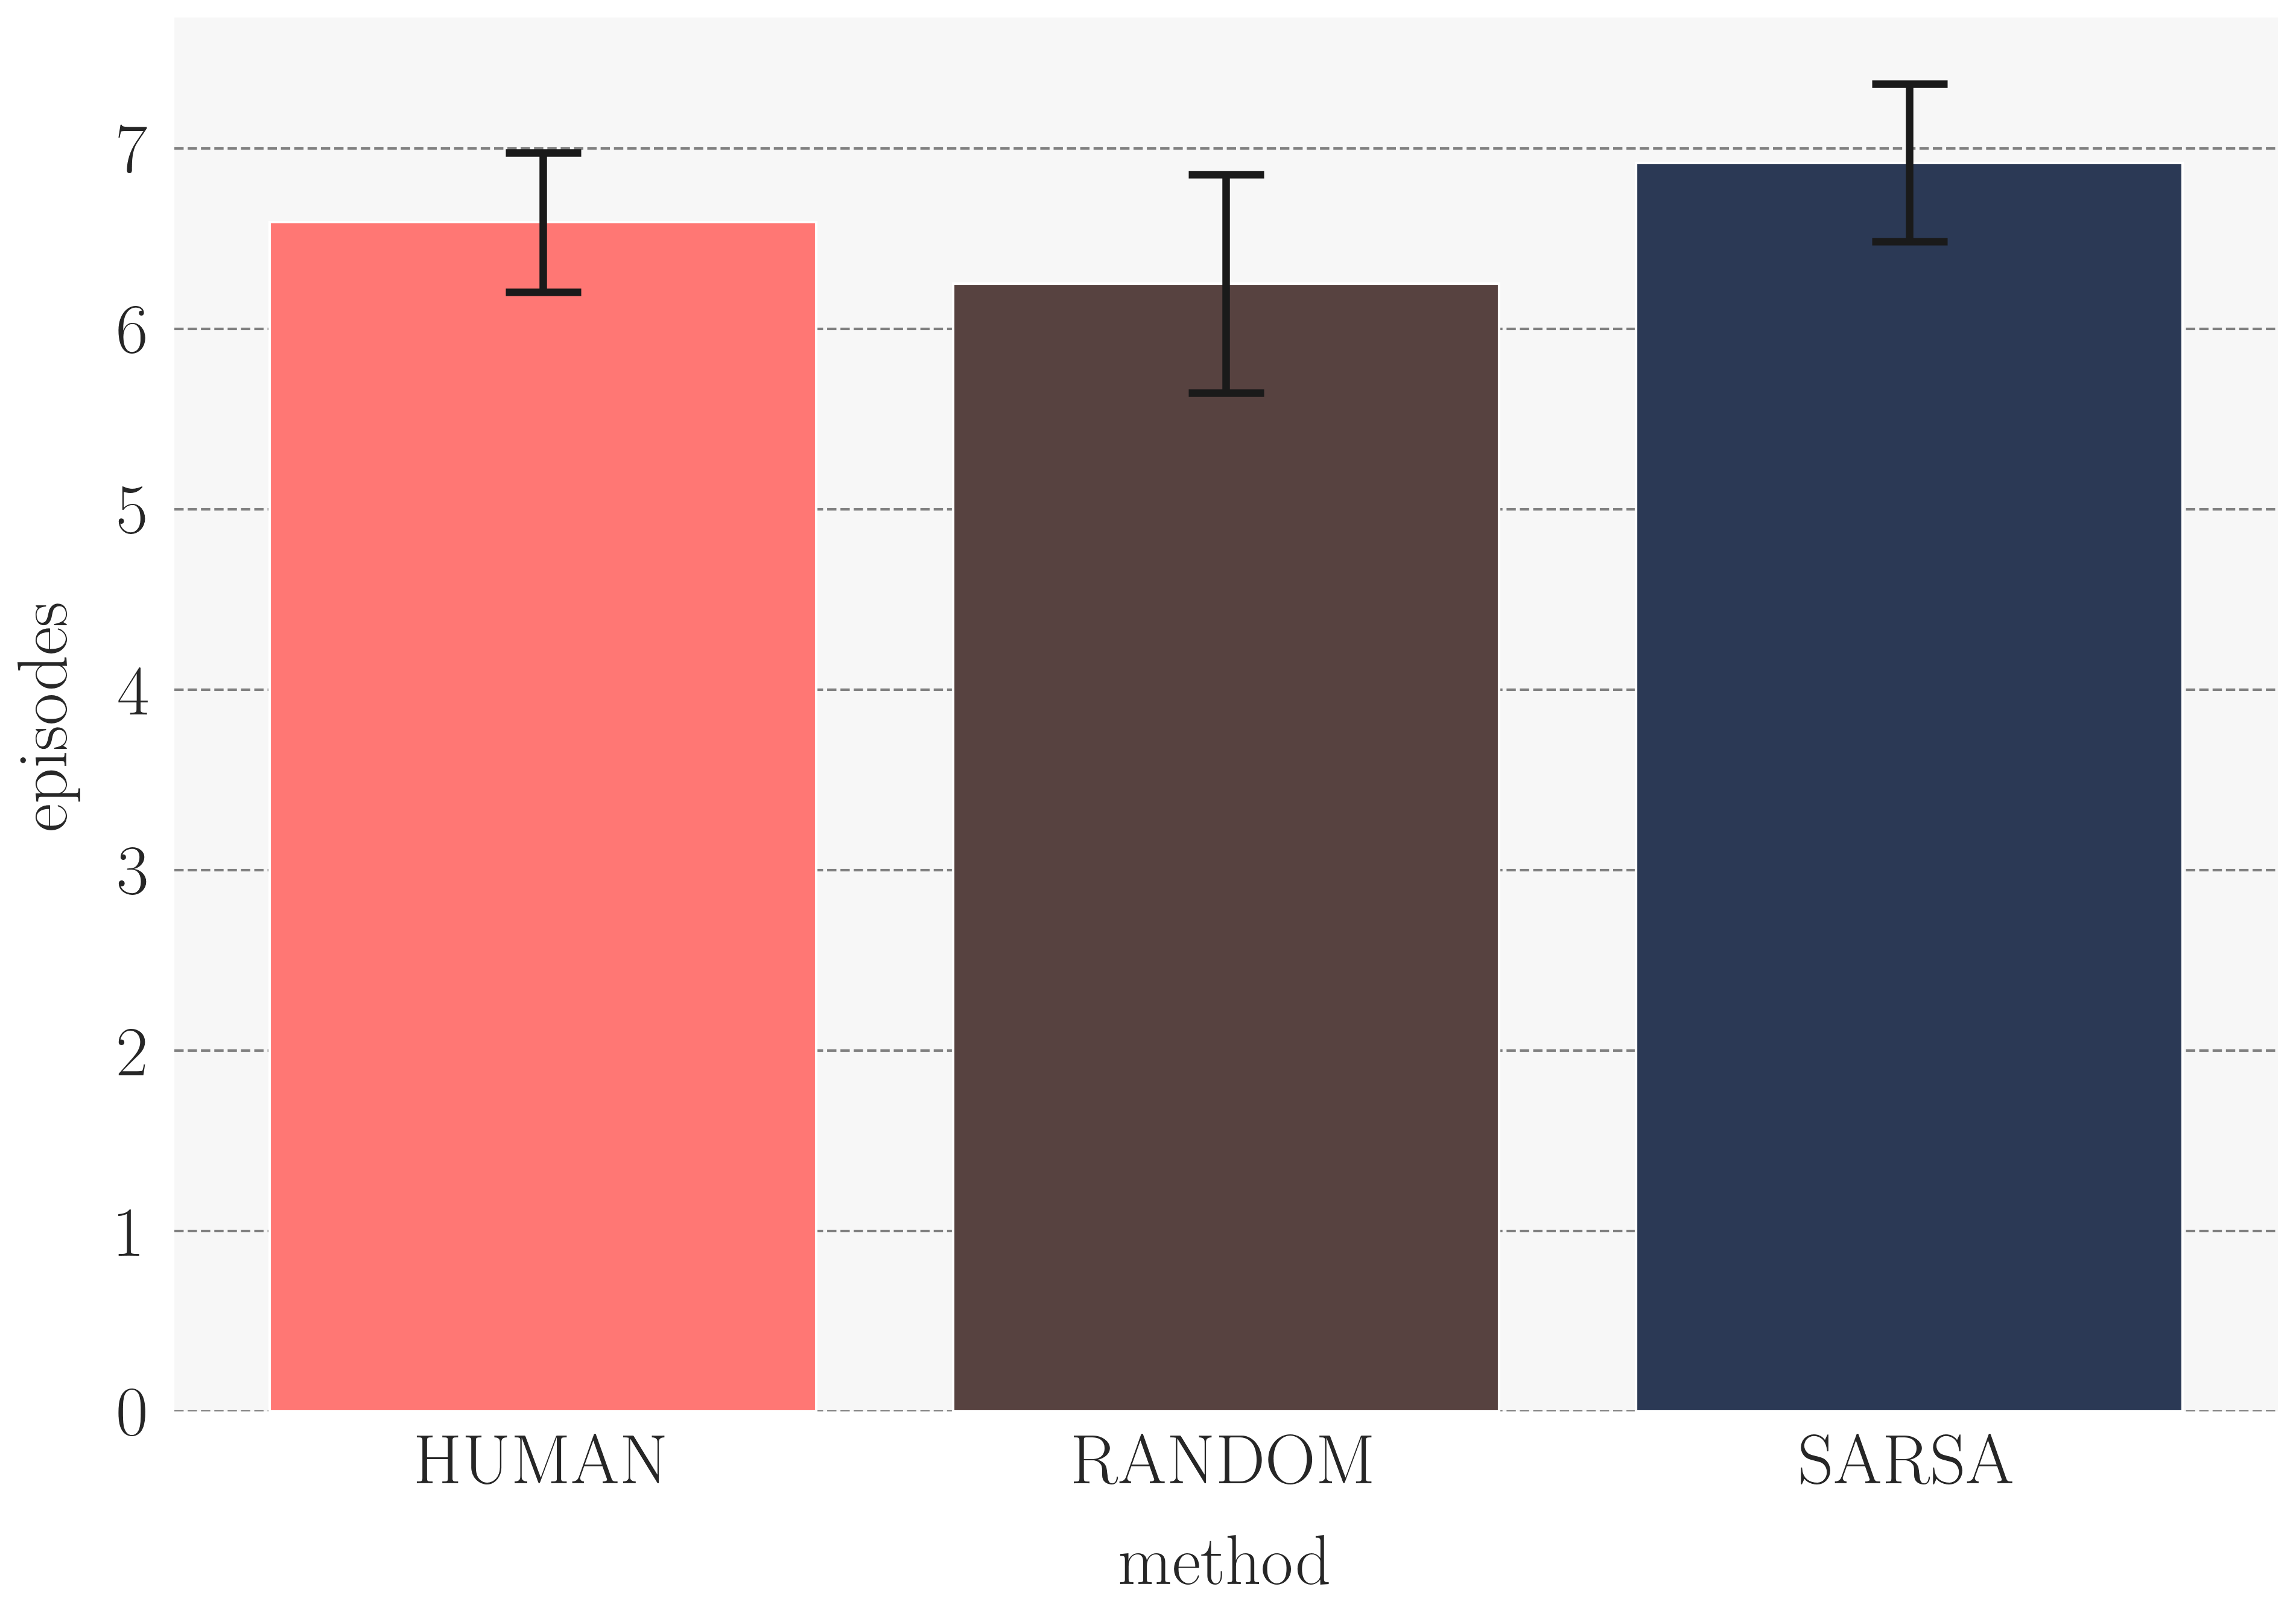

In [18]:
domain = "fourroom"
metric = "time_to_threshold_300"
data_df = pd.read_csv(f"../notebooks/in/{domain}/{metric}.csv", index_col=0)

target_data_df = data_df.loc[:99, :].rename(
    columns={
        "SARSA-": "SARSA"
    }
)
# dynamic
dynamic_df = target_data_df[["DYN-HUMAN-", "DYN-RANDOM-", "SARSA"]].rename(
    columns={
        "DYN-HUMAN-": "HUMAN", "DYN-RANDOM-": "RANDOM"
    }
)
tuples = []
bar_plot_with_asterisk_qsubg(metric, domain, dynamic_df, tuples, "dynamic", ["#d94448", "#72B2DF", "#2b3955"])
# static
static_df = target_data_df[["STATIC-HUMAN-", "STATIC-RANDOM-", "SARSA"]].rename(
    columns={
        "STATIC-HUMAN-": "HUMAN", "STATIC-RANDOM-": "RANDOM"
    }
)
tuples = []
bar_plot_with_asterisk_qsubg(metric, domain, static_df, tuples, "static", ["#ff7774", "#574240", "#2b3955"])


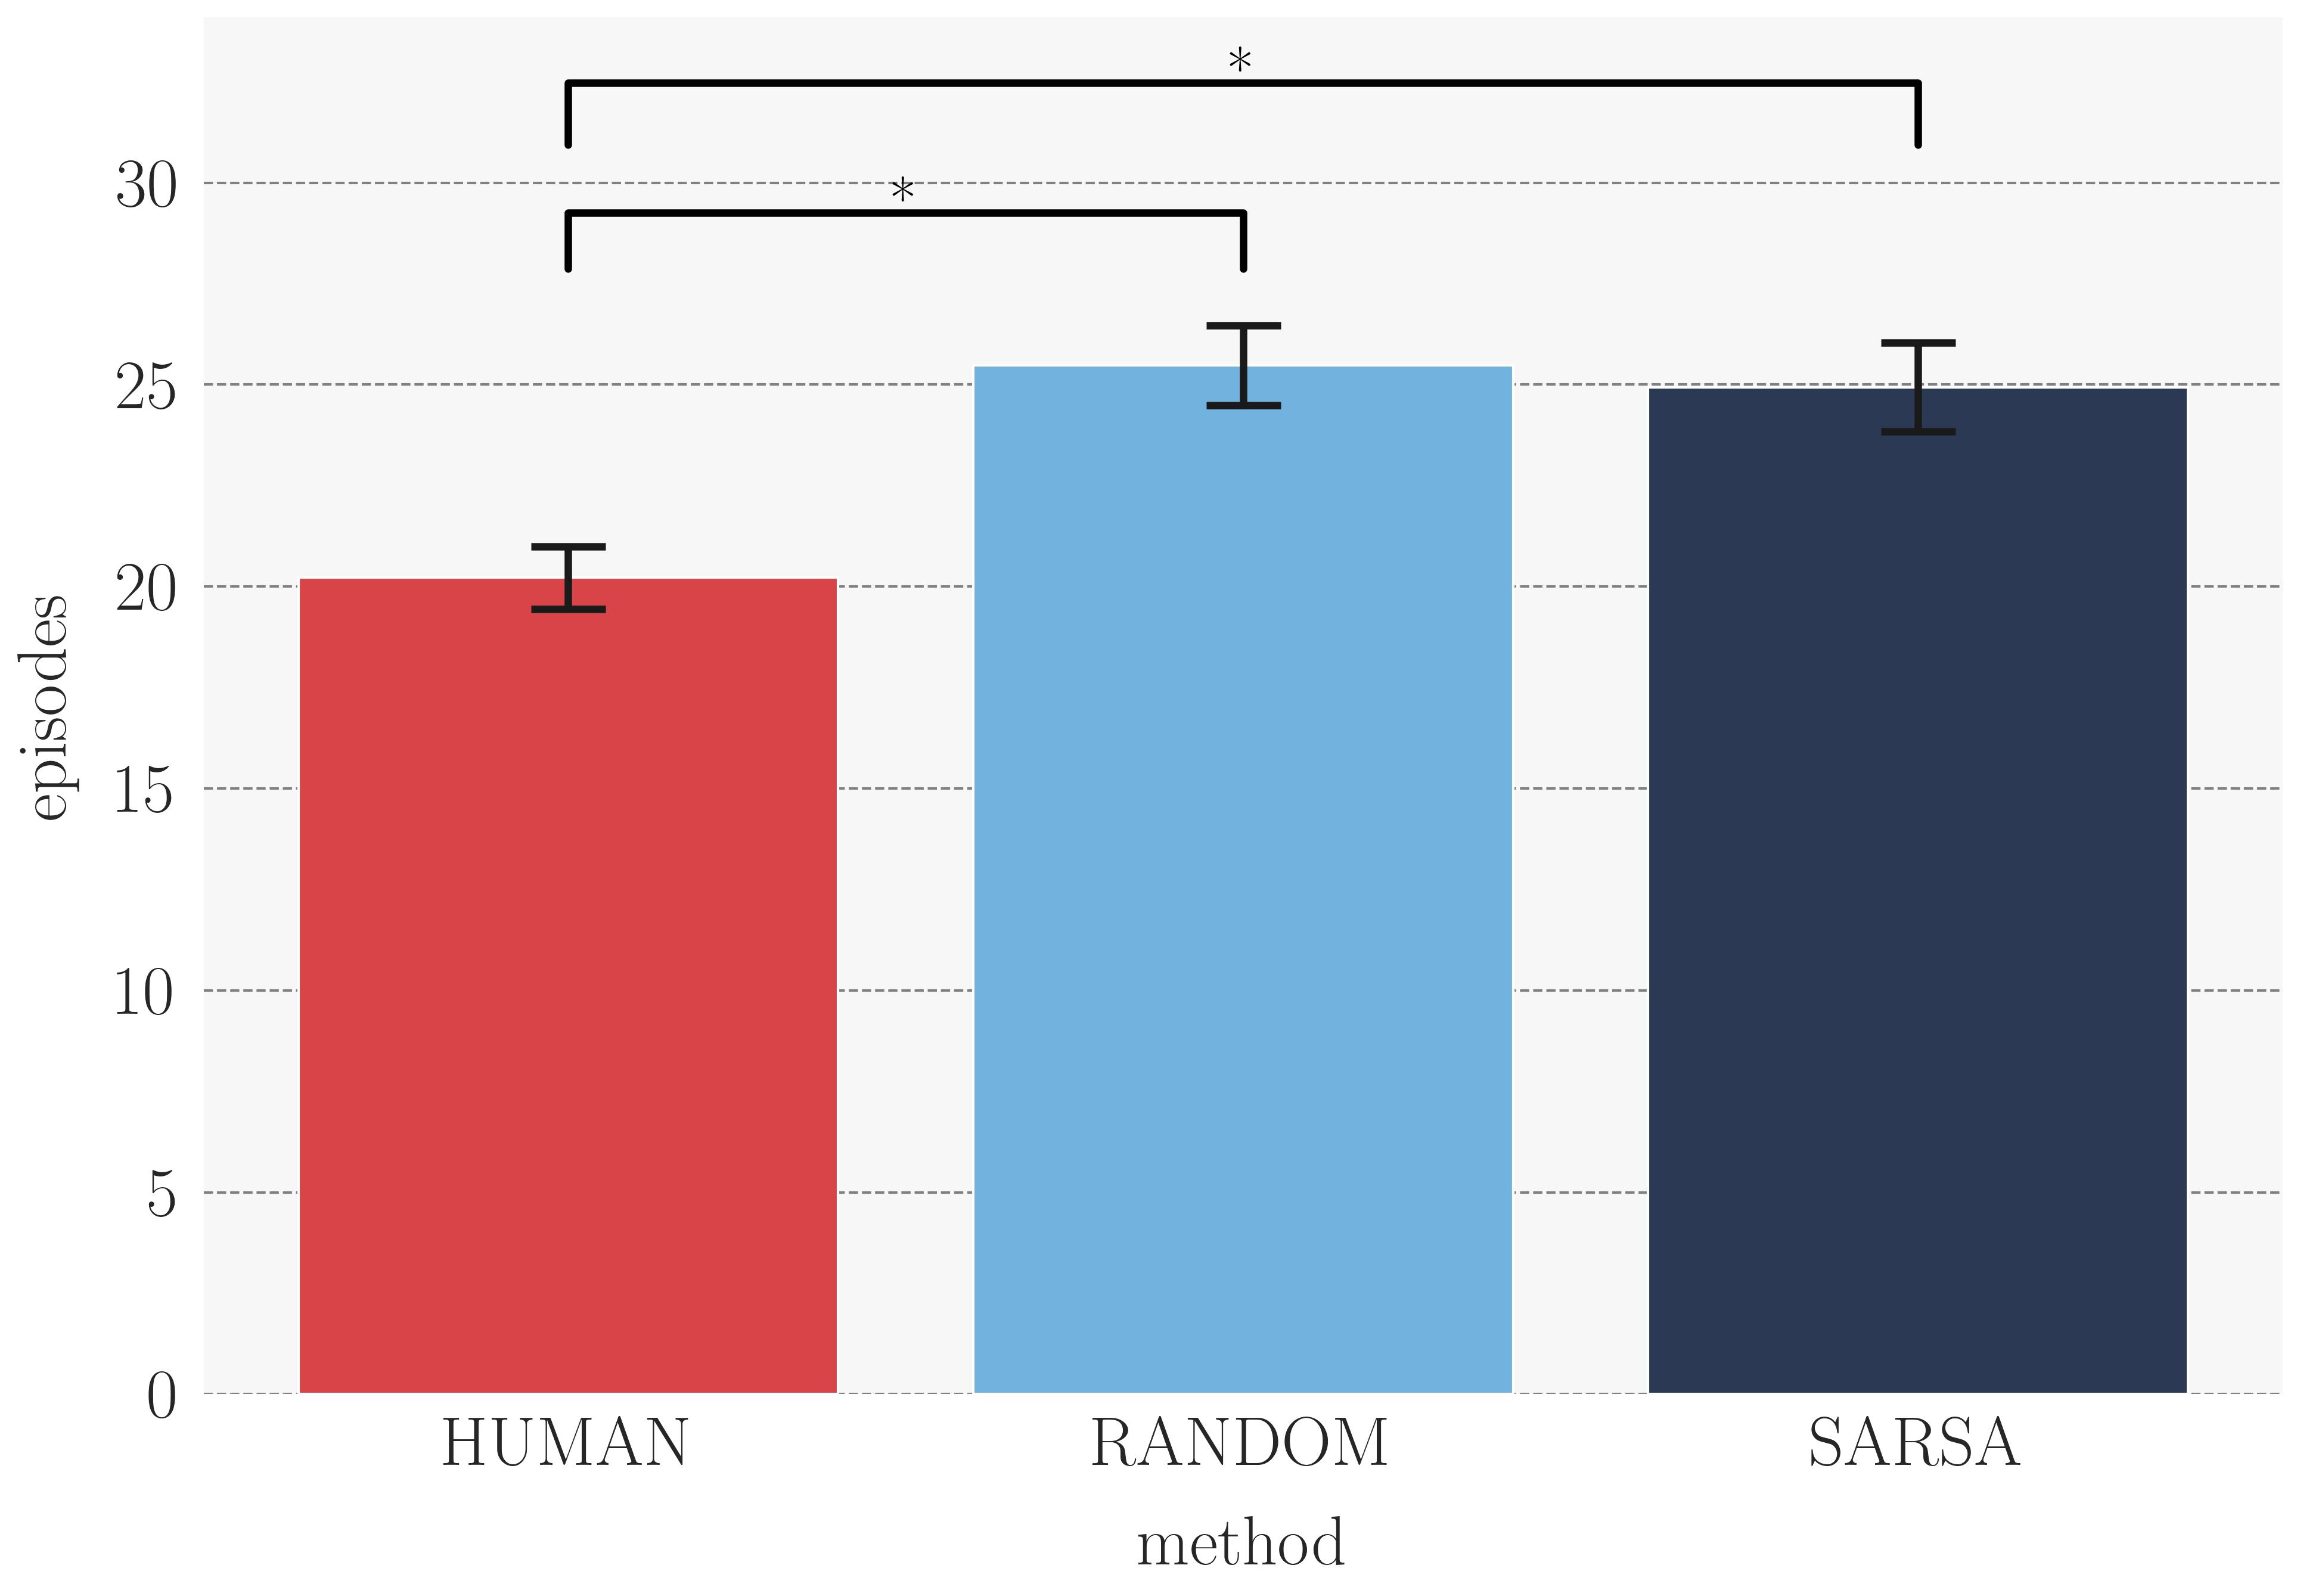

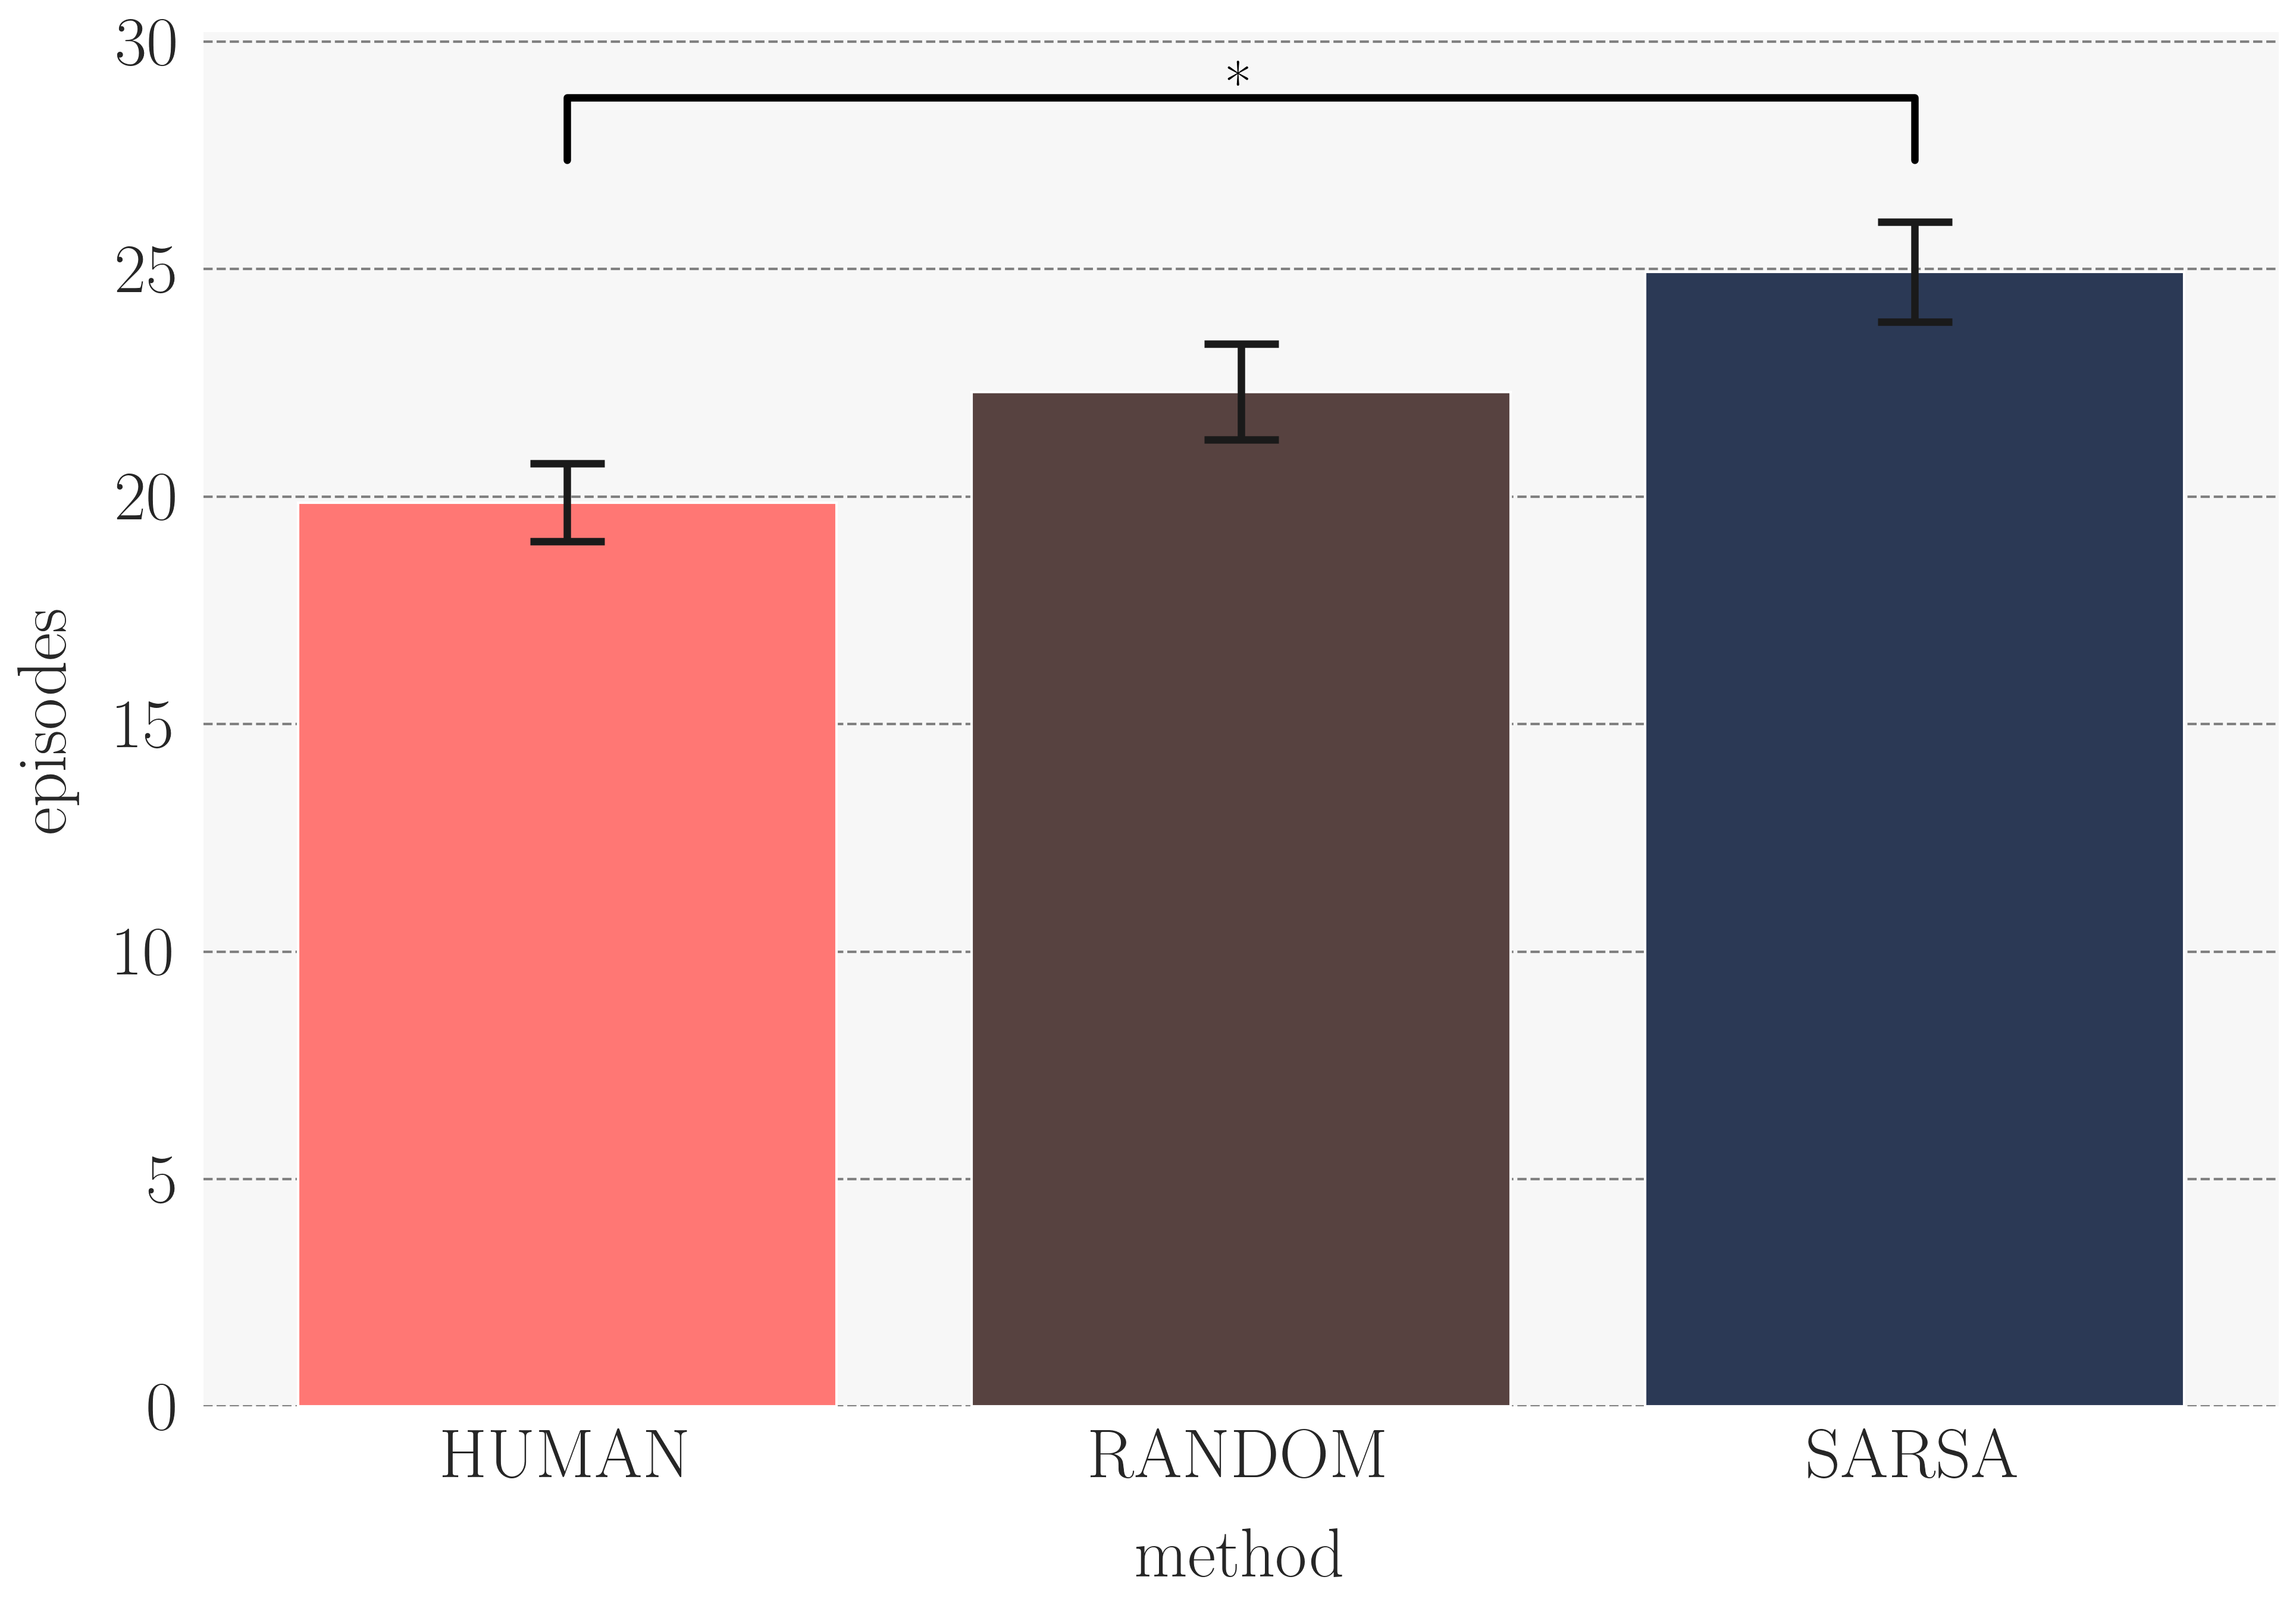

In [19]:
domain = "fourroom"
metric = "time_to_threshold_100"
data_df = pd.read_csv(f"../notebooks/in/{domain}/{metric}.csv", index_col=0)

target_data_df = data_df.loc[:99, :].rename(
    columns={
        "SARSA-": "SARSA"
    }
)
# dynamic
dynamic_df = target_data_df[["DYN-HUMAN-", "DYN-RANDOM-", "SARSA"]].rename(
    columns={
        "DYN-HUMAN-": "HUMAN", "DYN-RANDOM-": "RANDOM"
    }
)
tuples = [(0, 1, "*"), (0, 2, "*")]
bar_plot_with_asterisk_qsubg(metric, domain, dynamic_df, tuples, "dynamic", ["#d94448", "#72B2DF", "#2b3955"])
# static
static_df = target_data_df[["STATIC-HUMAN-", "STATIC-RANDOM-", "SARSA"]].rename(
    columns={
        "STATIC-HUMAN-": "HUMAN", "STATIC-RANDOM-": "RANDOM"
    }
)
tuples = [(0, 2, "*")]
bar_plot_with_asterisk_qsubg(metric, domain, static_df, tuples, "static", ["#ff7774", "#574240", "#2b3955"])


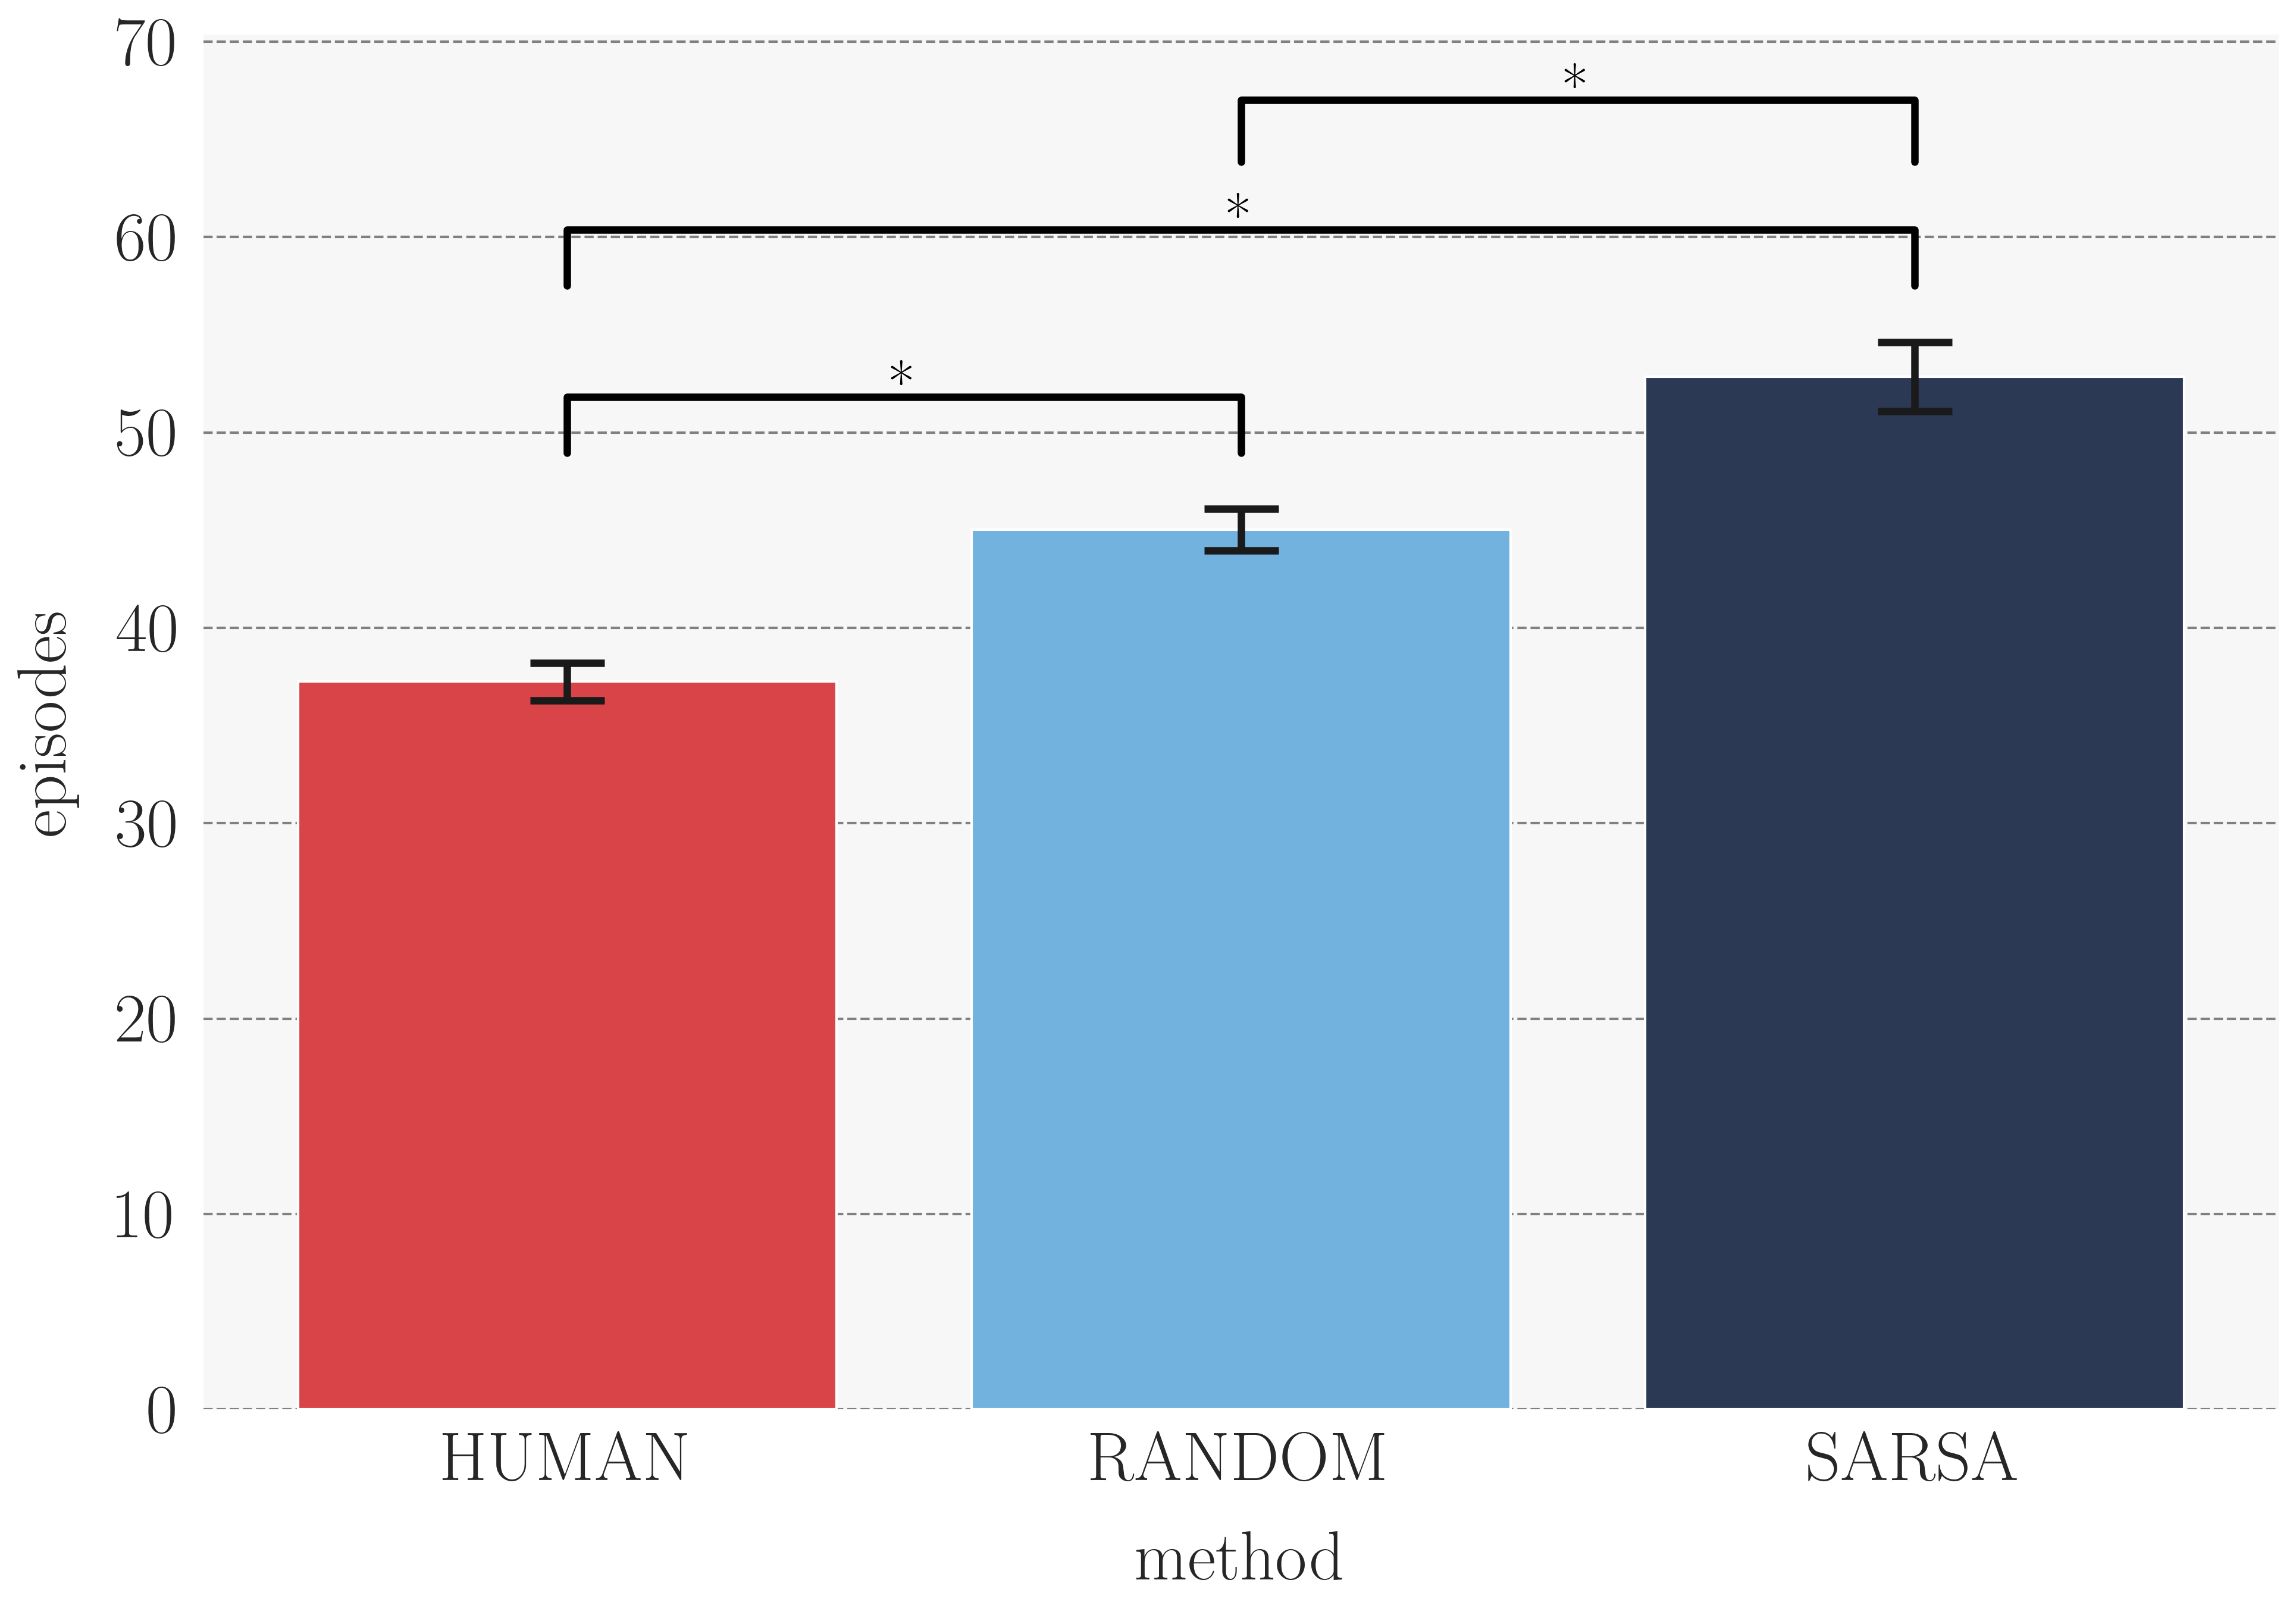

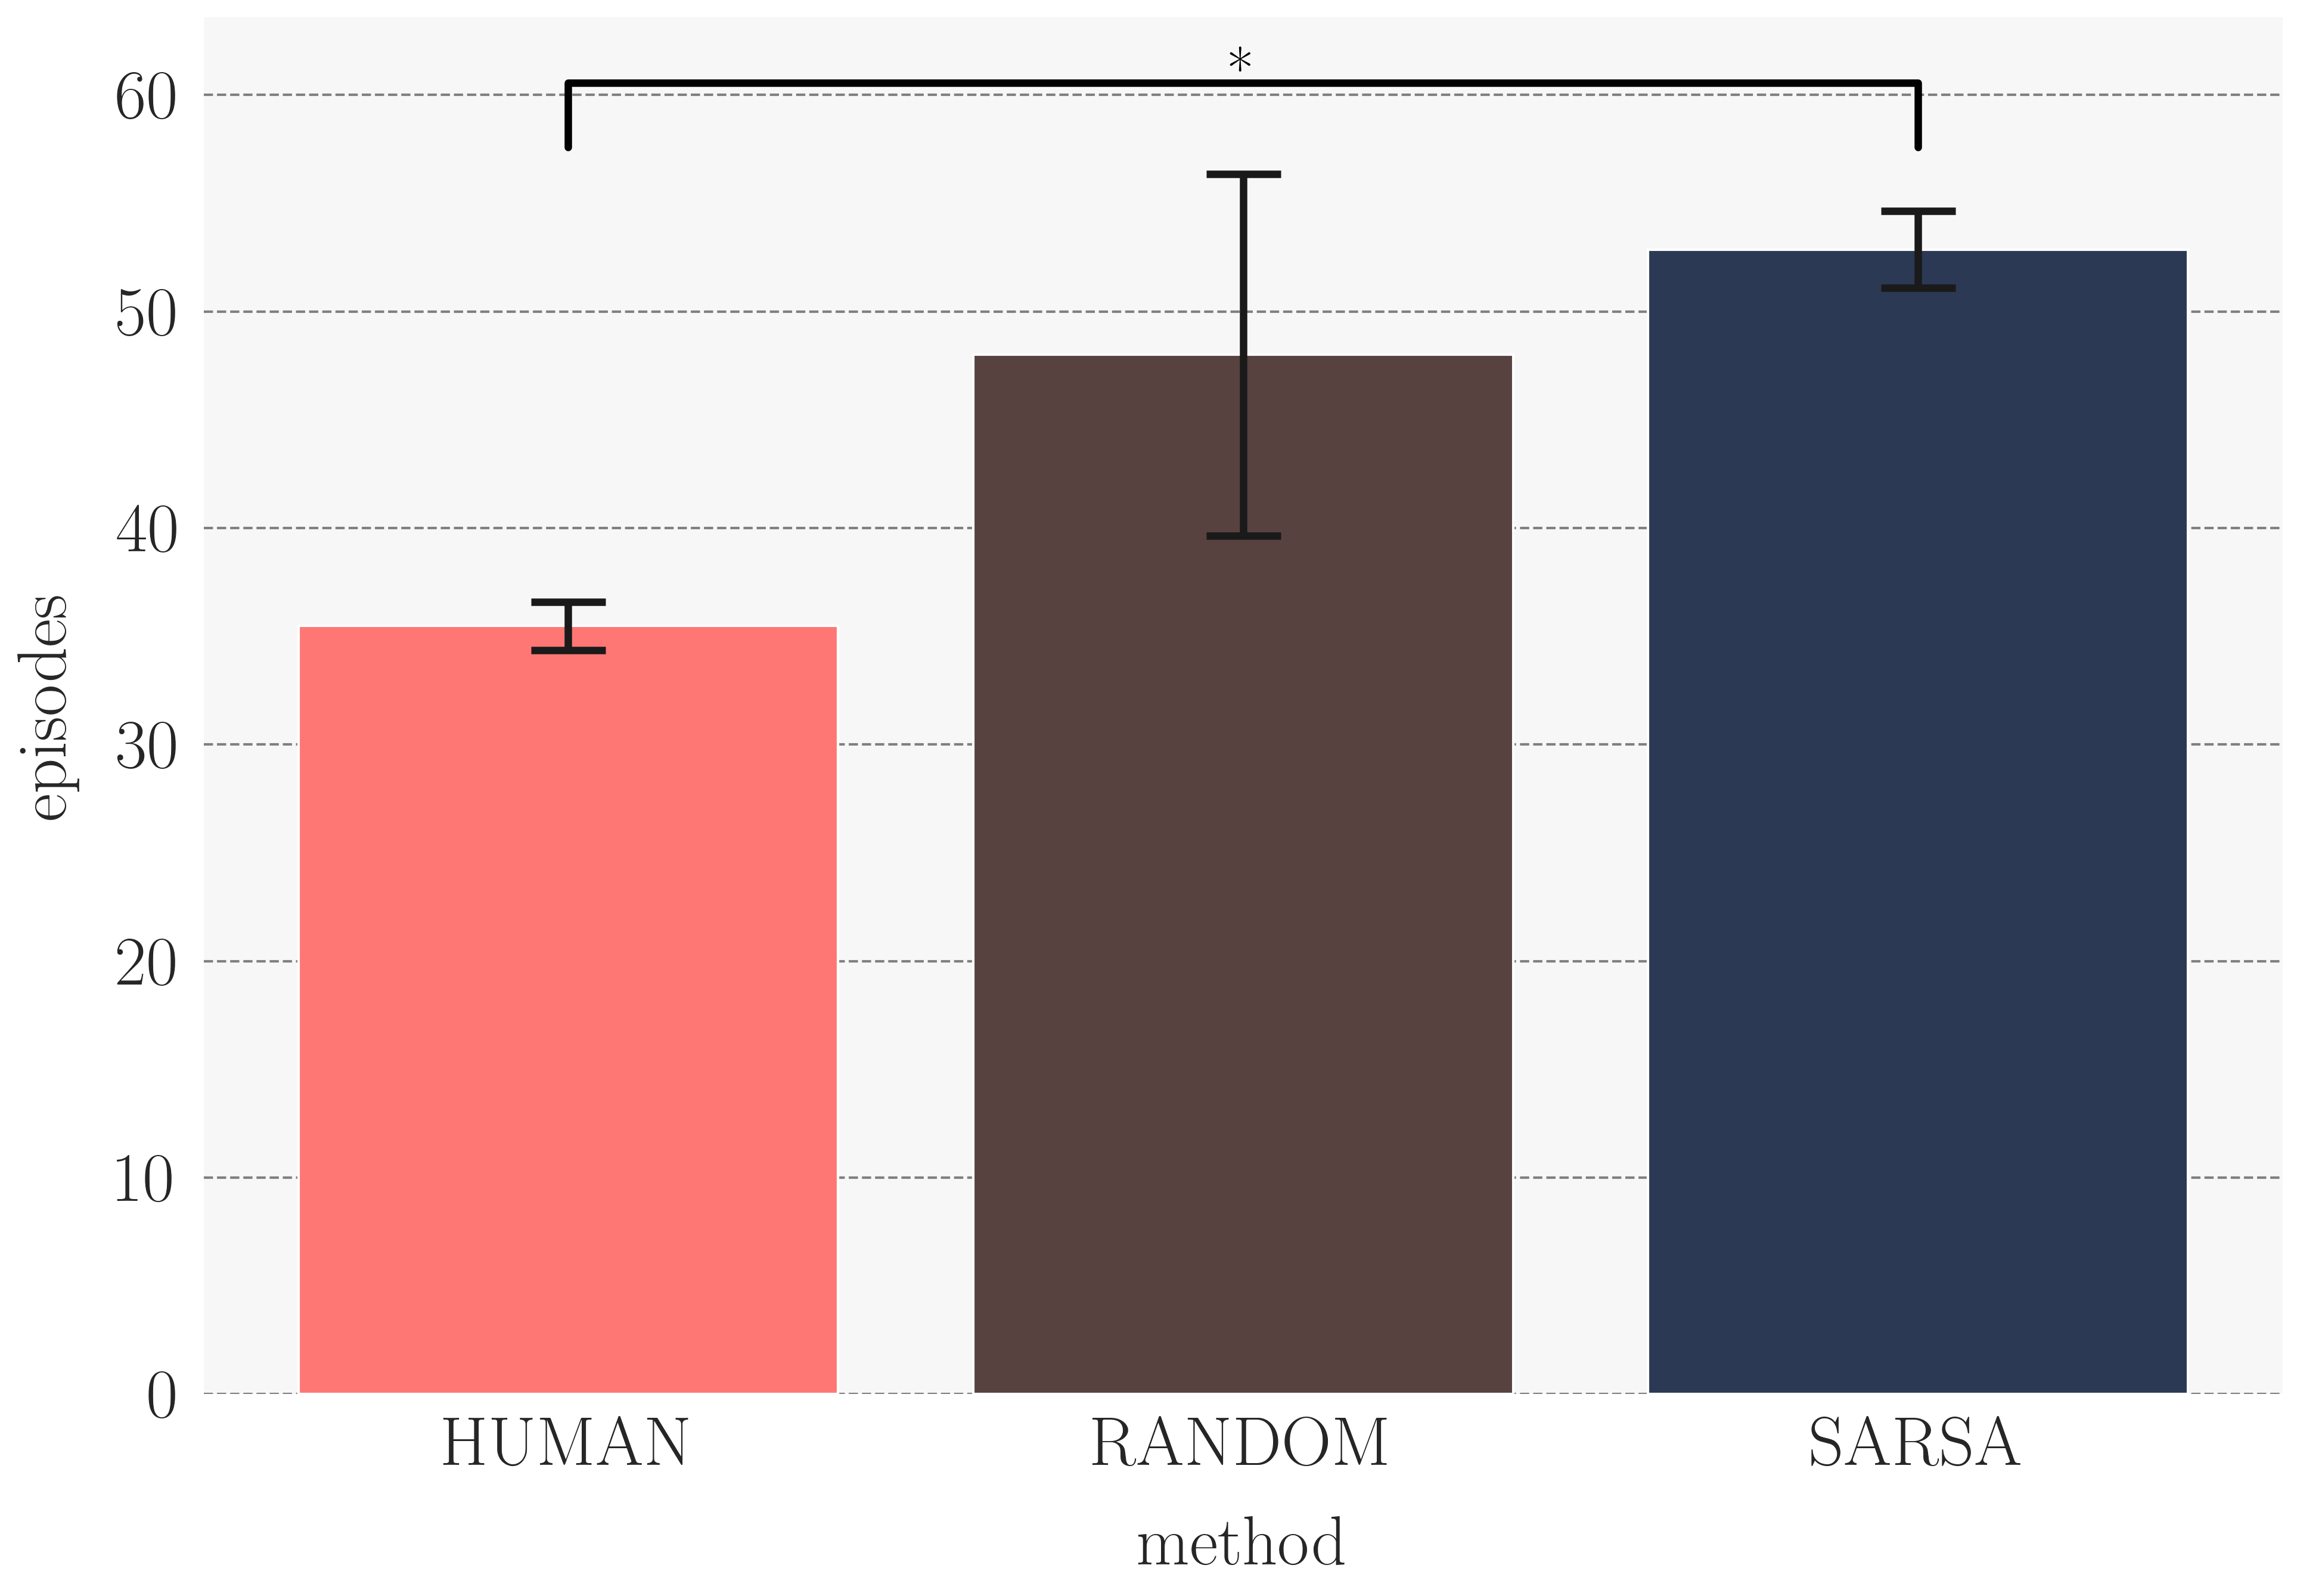

In [20]:
domain = "fourroom"
metric = "time_to_threshold_50"
data_df = pd.read_csv(f"../notebooks/in/{domain}/{metric}.csv", index_col=0)

target_data_df = data_df.loc[:99, :].rename(
    columns={
        "SARSA-": "SARSA"
    }
)
# dynamic
dynamic_df = target_data_df[["DYN-HUMAN-", "DYN-RANDOM-", "SARSA"]].rename(
    columns={
        "DYN-HUMAN-": "HUMAN", "DYN-RANDOM-": "RANDOM"
    }
)
tuples = [(0, 1, "*"), (0, 2, "*"), (1, 2, "*")]
bar_plot_with_asterisk_qsubg(metric, domain, dynamic_df, tuples, "dynamic", ["#d94448", "#72B2DF", "#2b3955"])
# static
static_df = target_data_df[["STATIC-HUMAN-", "STATIC-RANDOM-", "SARSA"]].rename(
    columns={
        "STATIC-HUMAN-": "HUMAN", "STATIC-RANDOM-": "RANDOM"
    }
)
tuples = [(0, 2, "*")]
bar_plot_with_asterisk_qsubg(metric, domain, static_df, tuples, "static", ["#ff7774", "#574240", "#2b3955"])


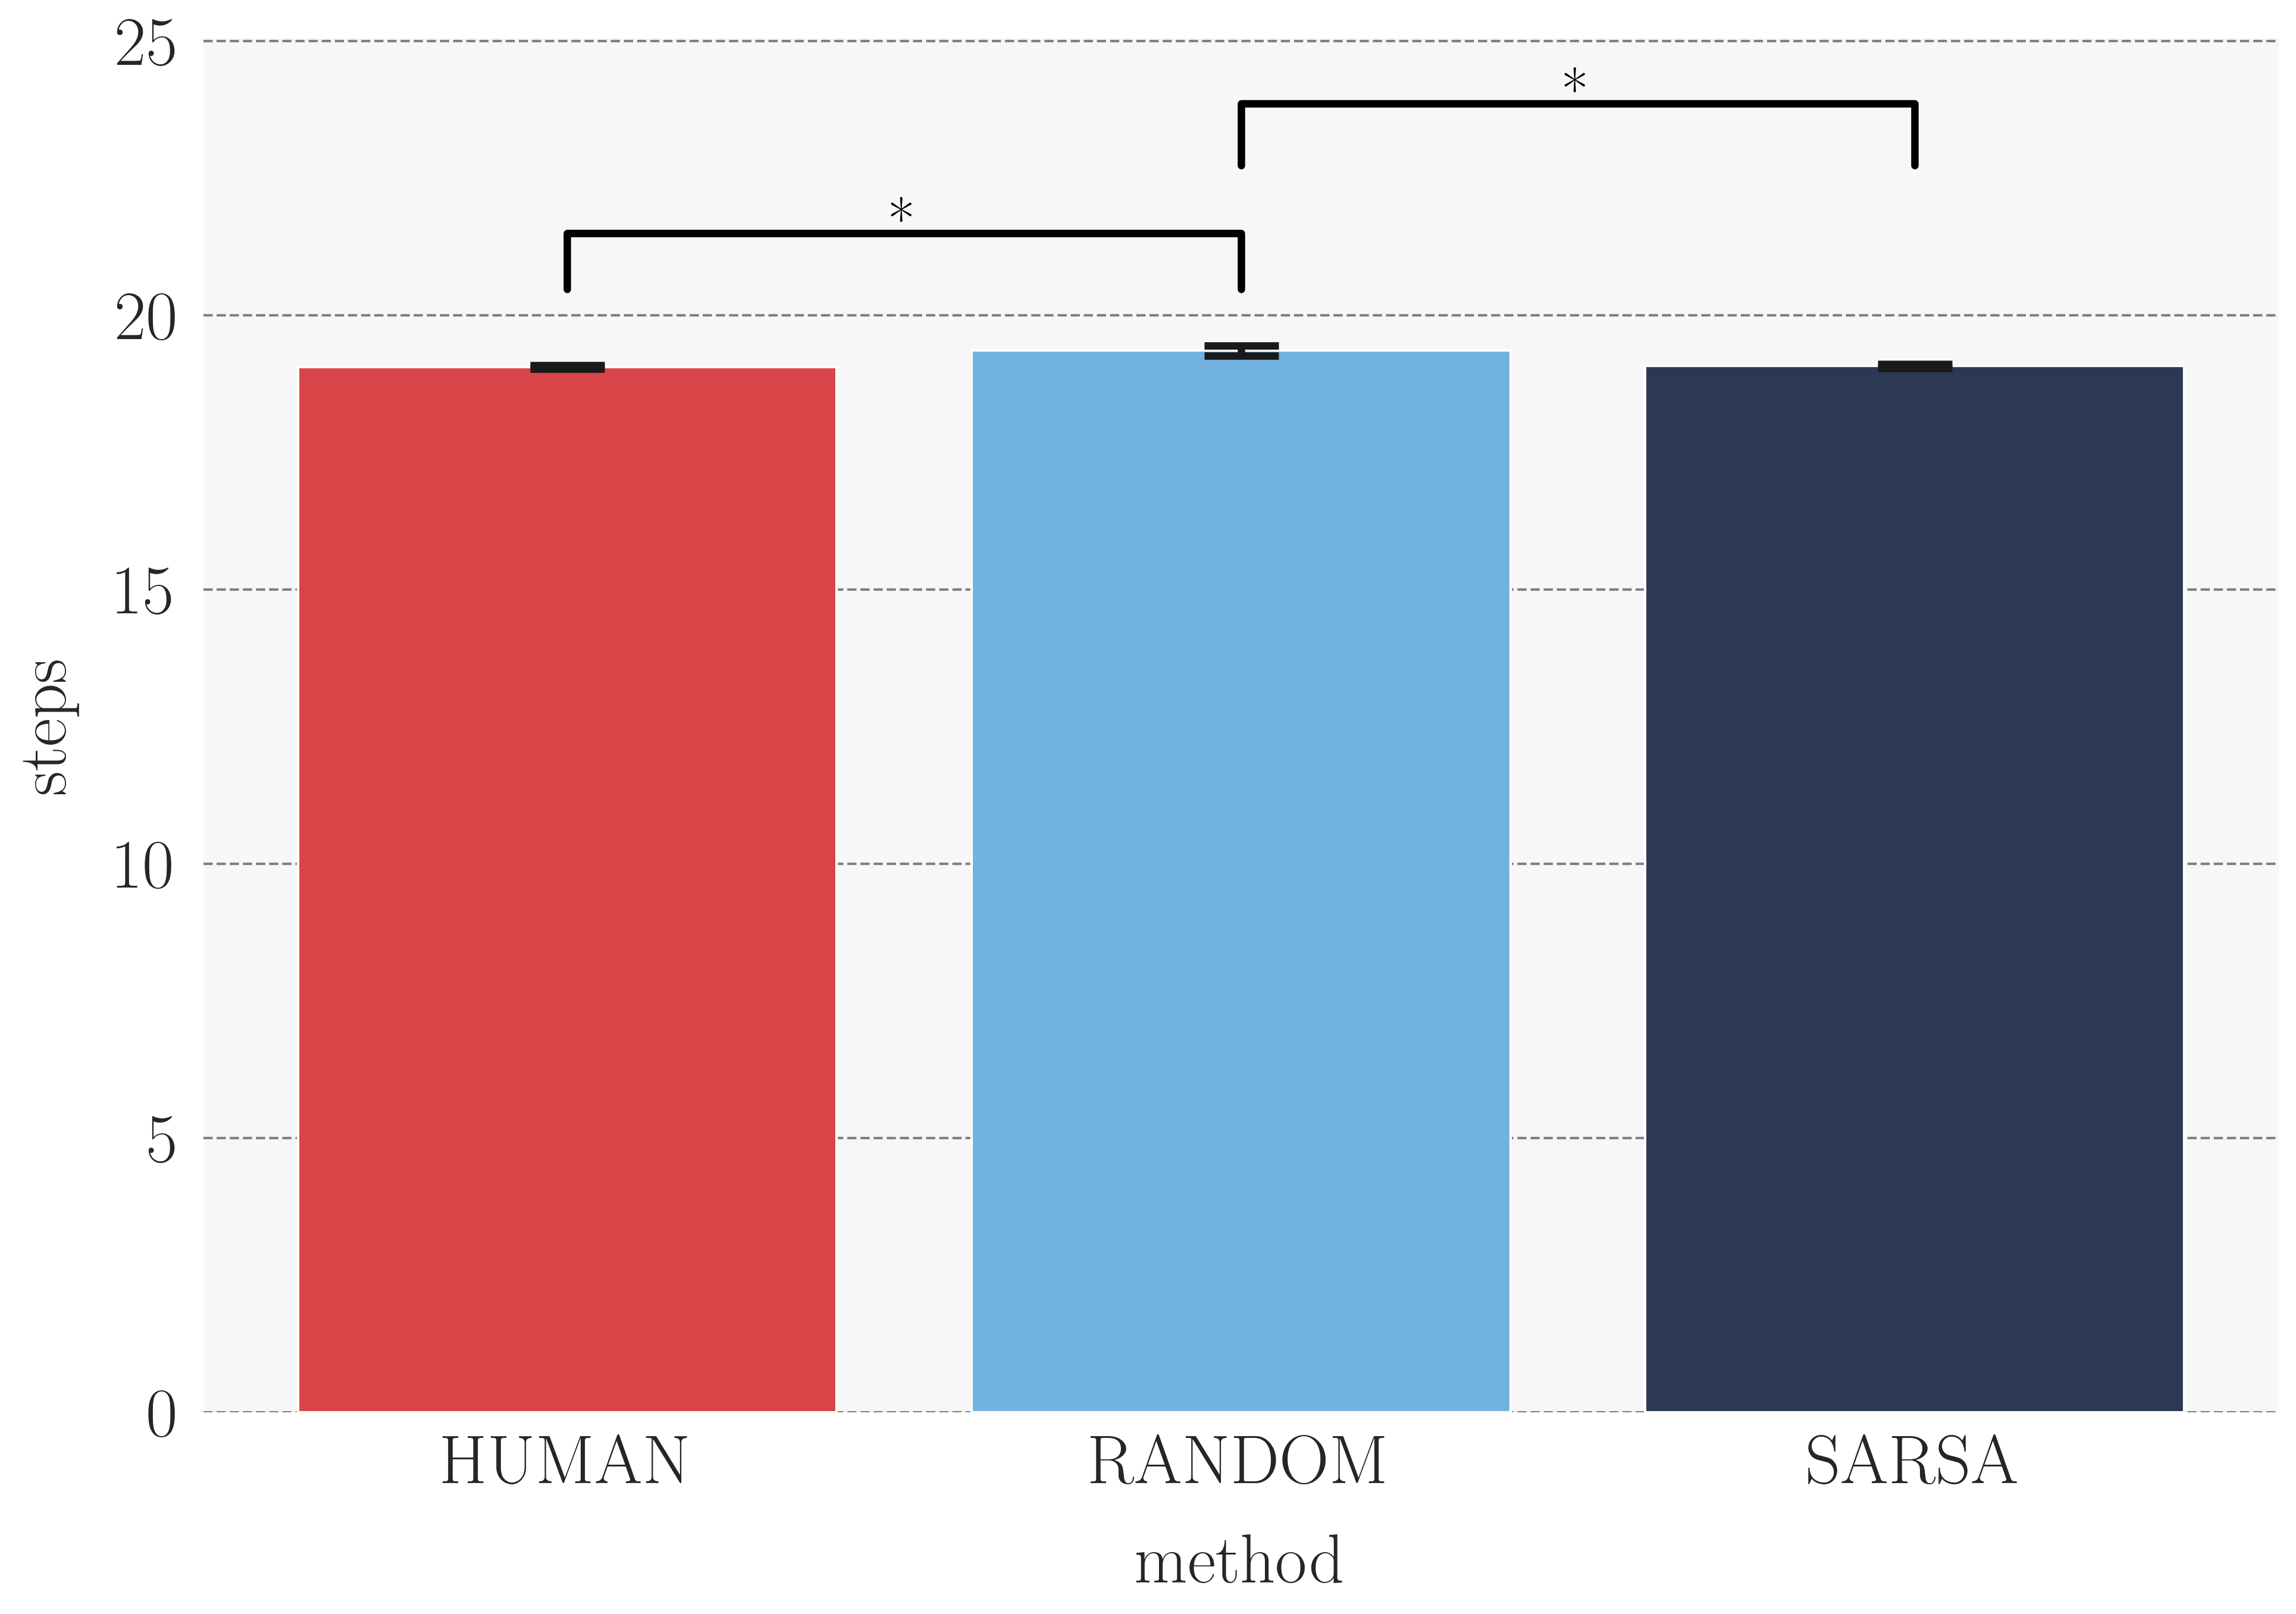

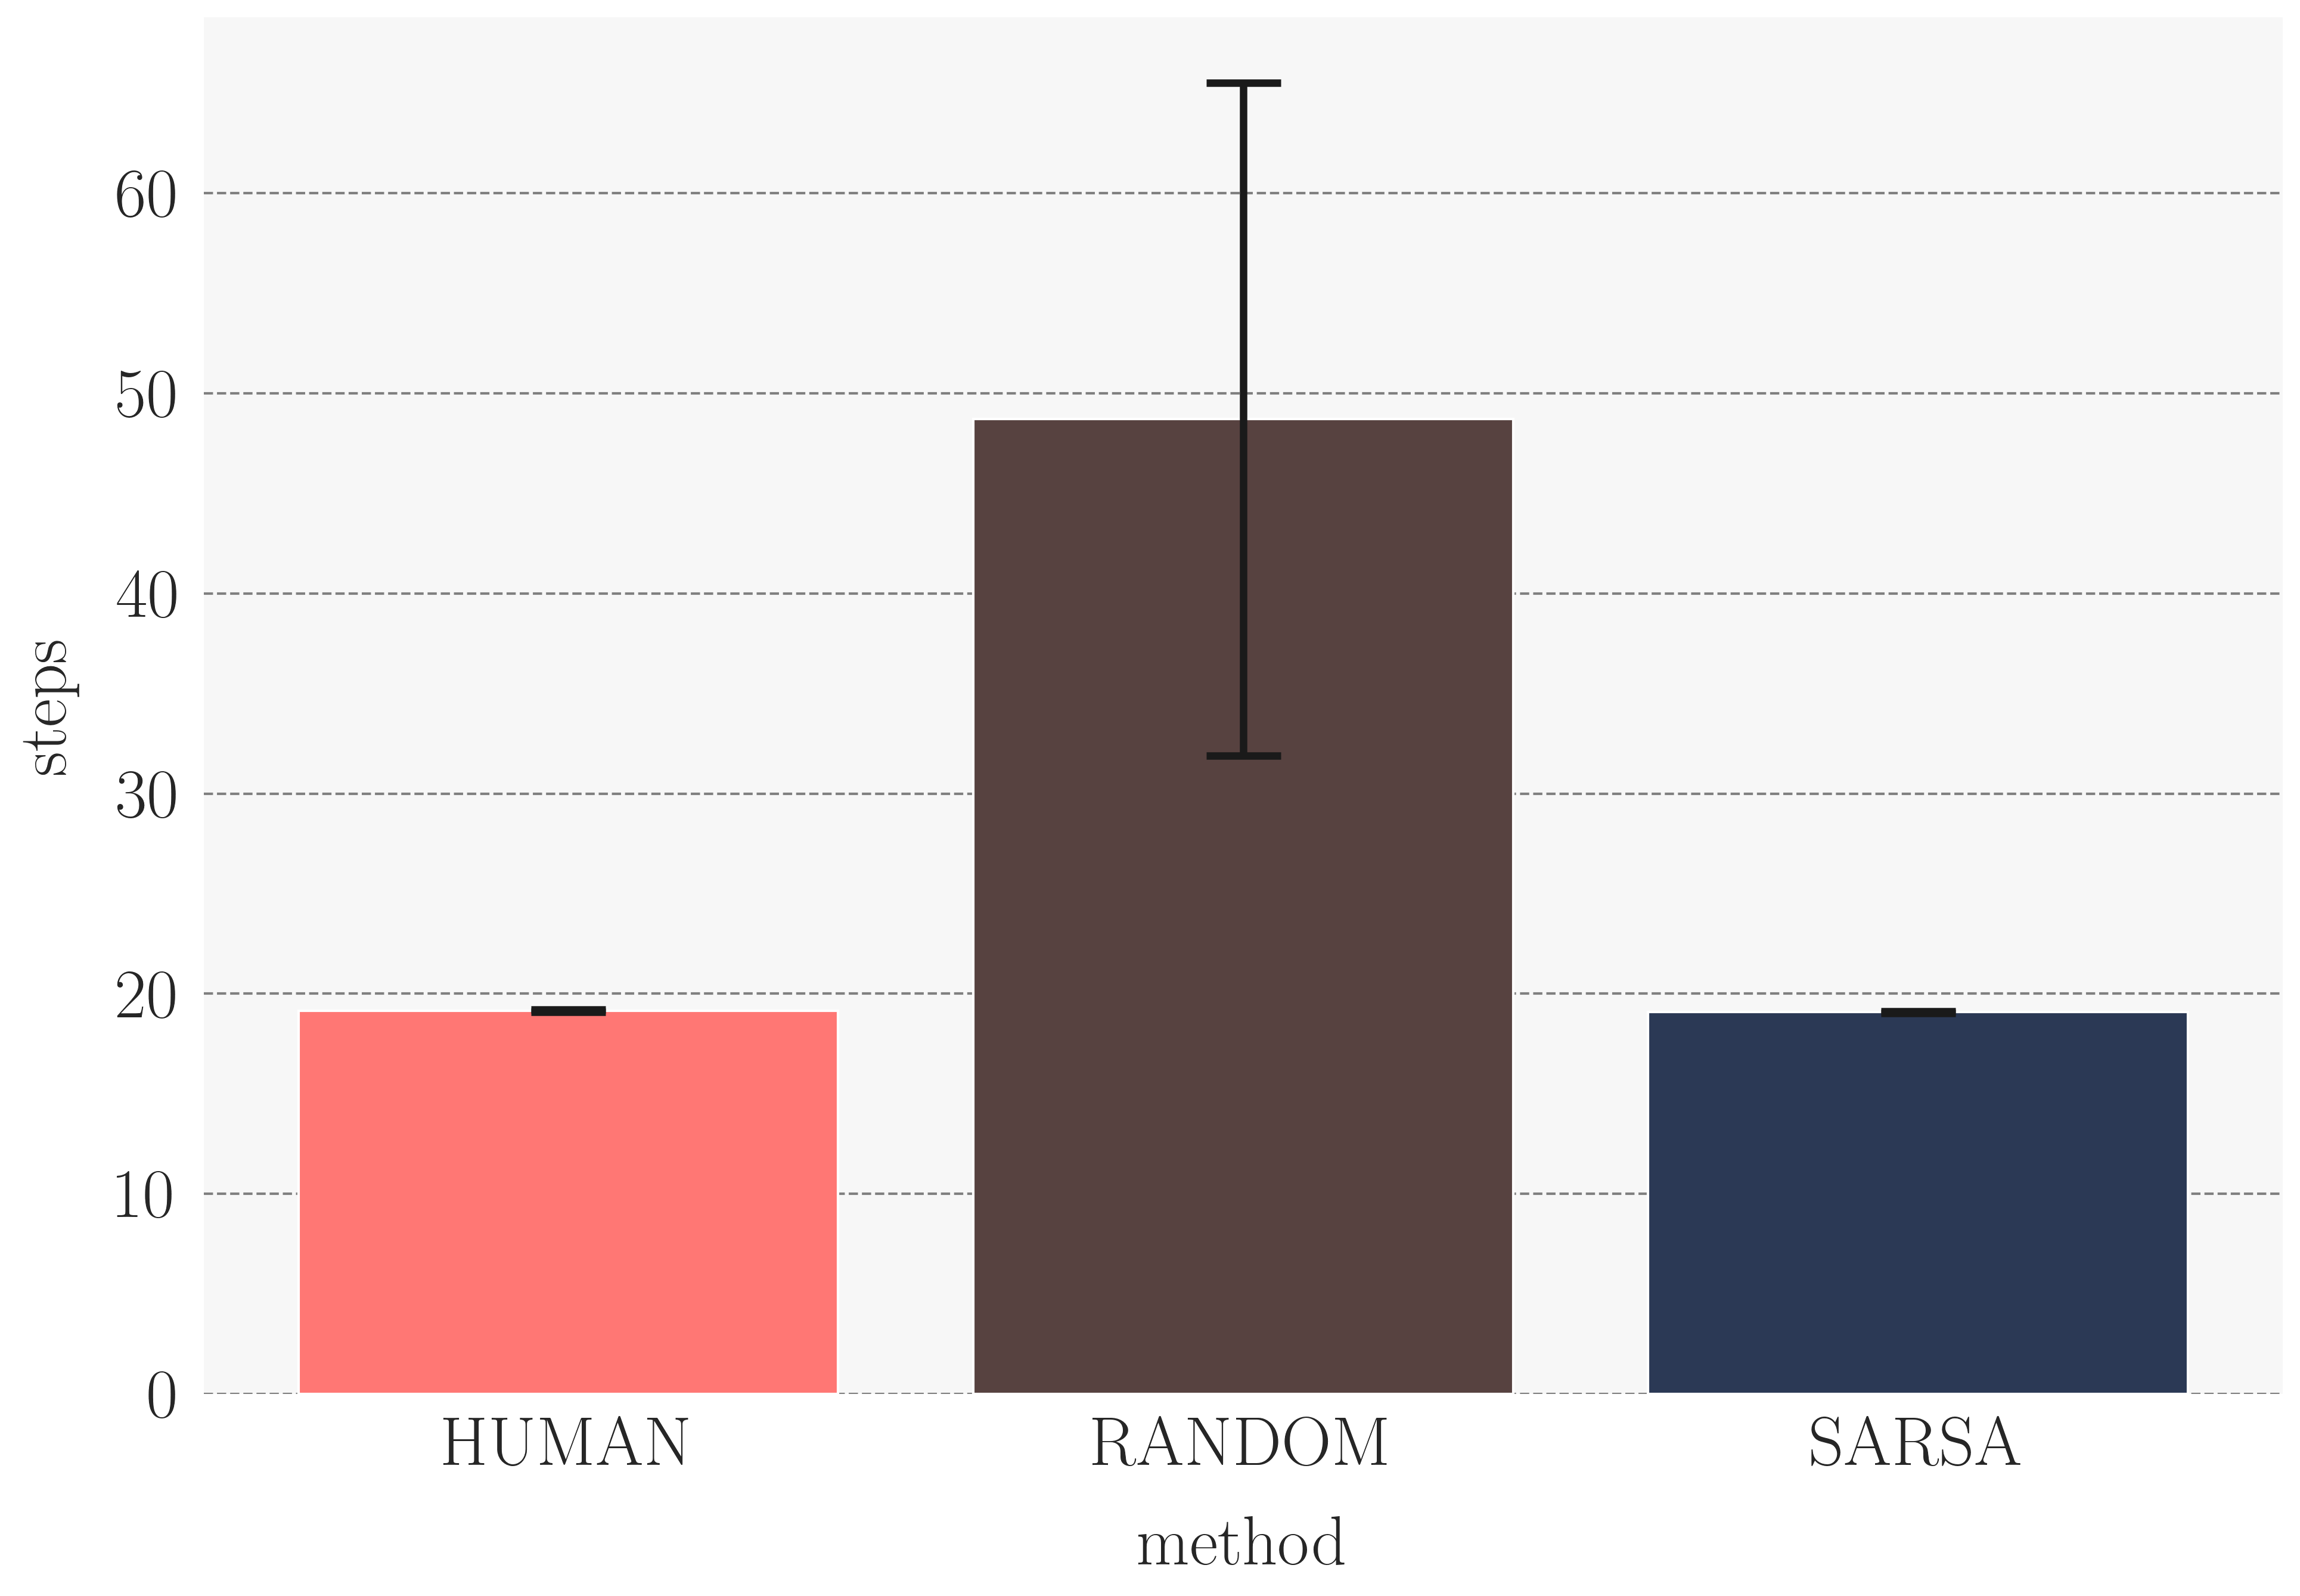

In [21]:
domain = "fourroom"
metric = "asymptotic_performance"
data_df = pd.read_csv(f"../notebooks/in/{domain}/{metric}.csv", index_col=0)

target_data_df = data_df.loc[:99, :].rename(
    columns={
        "SARSA-": "SARSA"
    }
)
# dynamic
dynamic_df = target_data_df[["DYN-HUMAN-", "DYN-RANDOM-", "SARSA"]].rename(
    columns={
        "DYN-HUMAN-": "HUMAN", "DYN-RANDOM-": "RANDOM"
    }
)
tuples = [(0, 1, "*"), (1, 2, "*")]
bar_plot_with_asterisk_qsubg(metric, domain, dynamic_df, tuples, "dynamic", ["#d94448", "#72B2DF", "#2b3955"], "steps")
# static
static_df = target_data_df[["STATIC-HUMAN-", "STATIC-RANDOM-", "SARSA"]].rename(
    columns={
        "STATIC-HUMAN-": "HUMAN", "STATIC-RANDOM-": "RANDOM"
    }
)
tuples = []
bar_plot_with_asterisk_qsubg(metric, domain, static_df, tuples, "static", ["#ff7774", "#574240", "#2b3955"], "steps")

## Pinball

In [22]:
pinball_idx = np.array([917, 405, 896, 173, 627, 454, 780, 490, 375, 466, 416,  72, 630,
       796,  61, 359, 621, 153, 908, 255,  43, 880,  68, 377, 281, 661,
       179, 314, 824, 438, 407, 784, 806,  87, 920, 856, 364, 741, 979,
       185, 784, 171, 291, 894, 876,   2, 190,  73, 176, 677, 281, 325,
       646, 442, 585,  15, 423, 218, 667, 711, 401, 735,  63, 962, 511,
       753, 422, 772, 677, 851,  10, 856, 491, 272, 202, 480, 667, 925,
       868,  68, 391, 431, 117, 129, 404, 340, 102, 173,  15, 162,  21,
       297, 768, 732, 829, 157, 128, 591, 594, 853])

### Performance Comparison

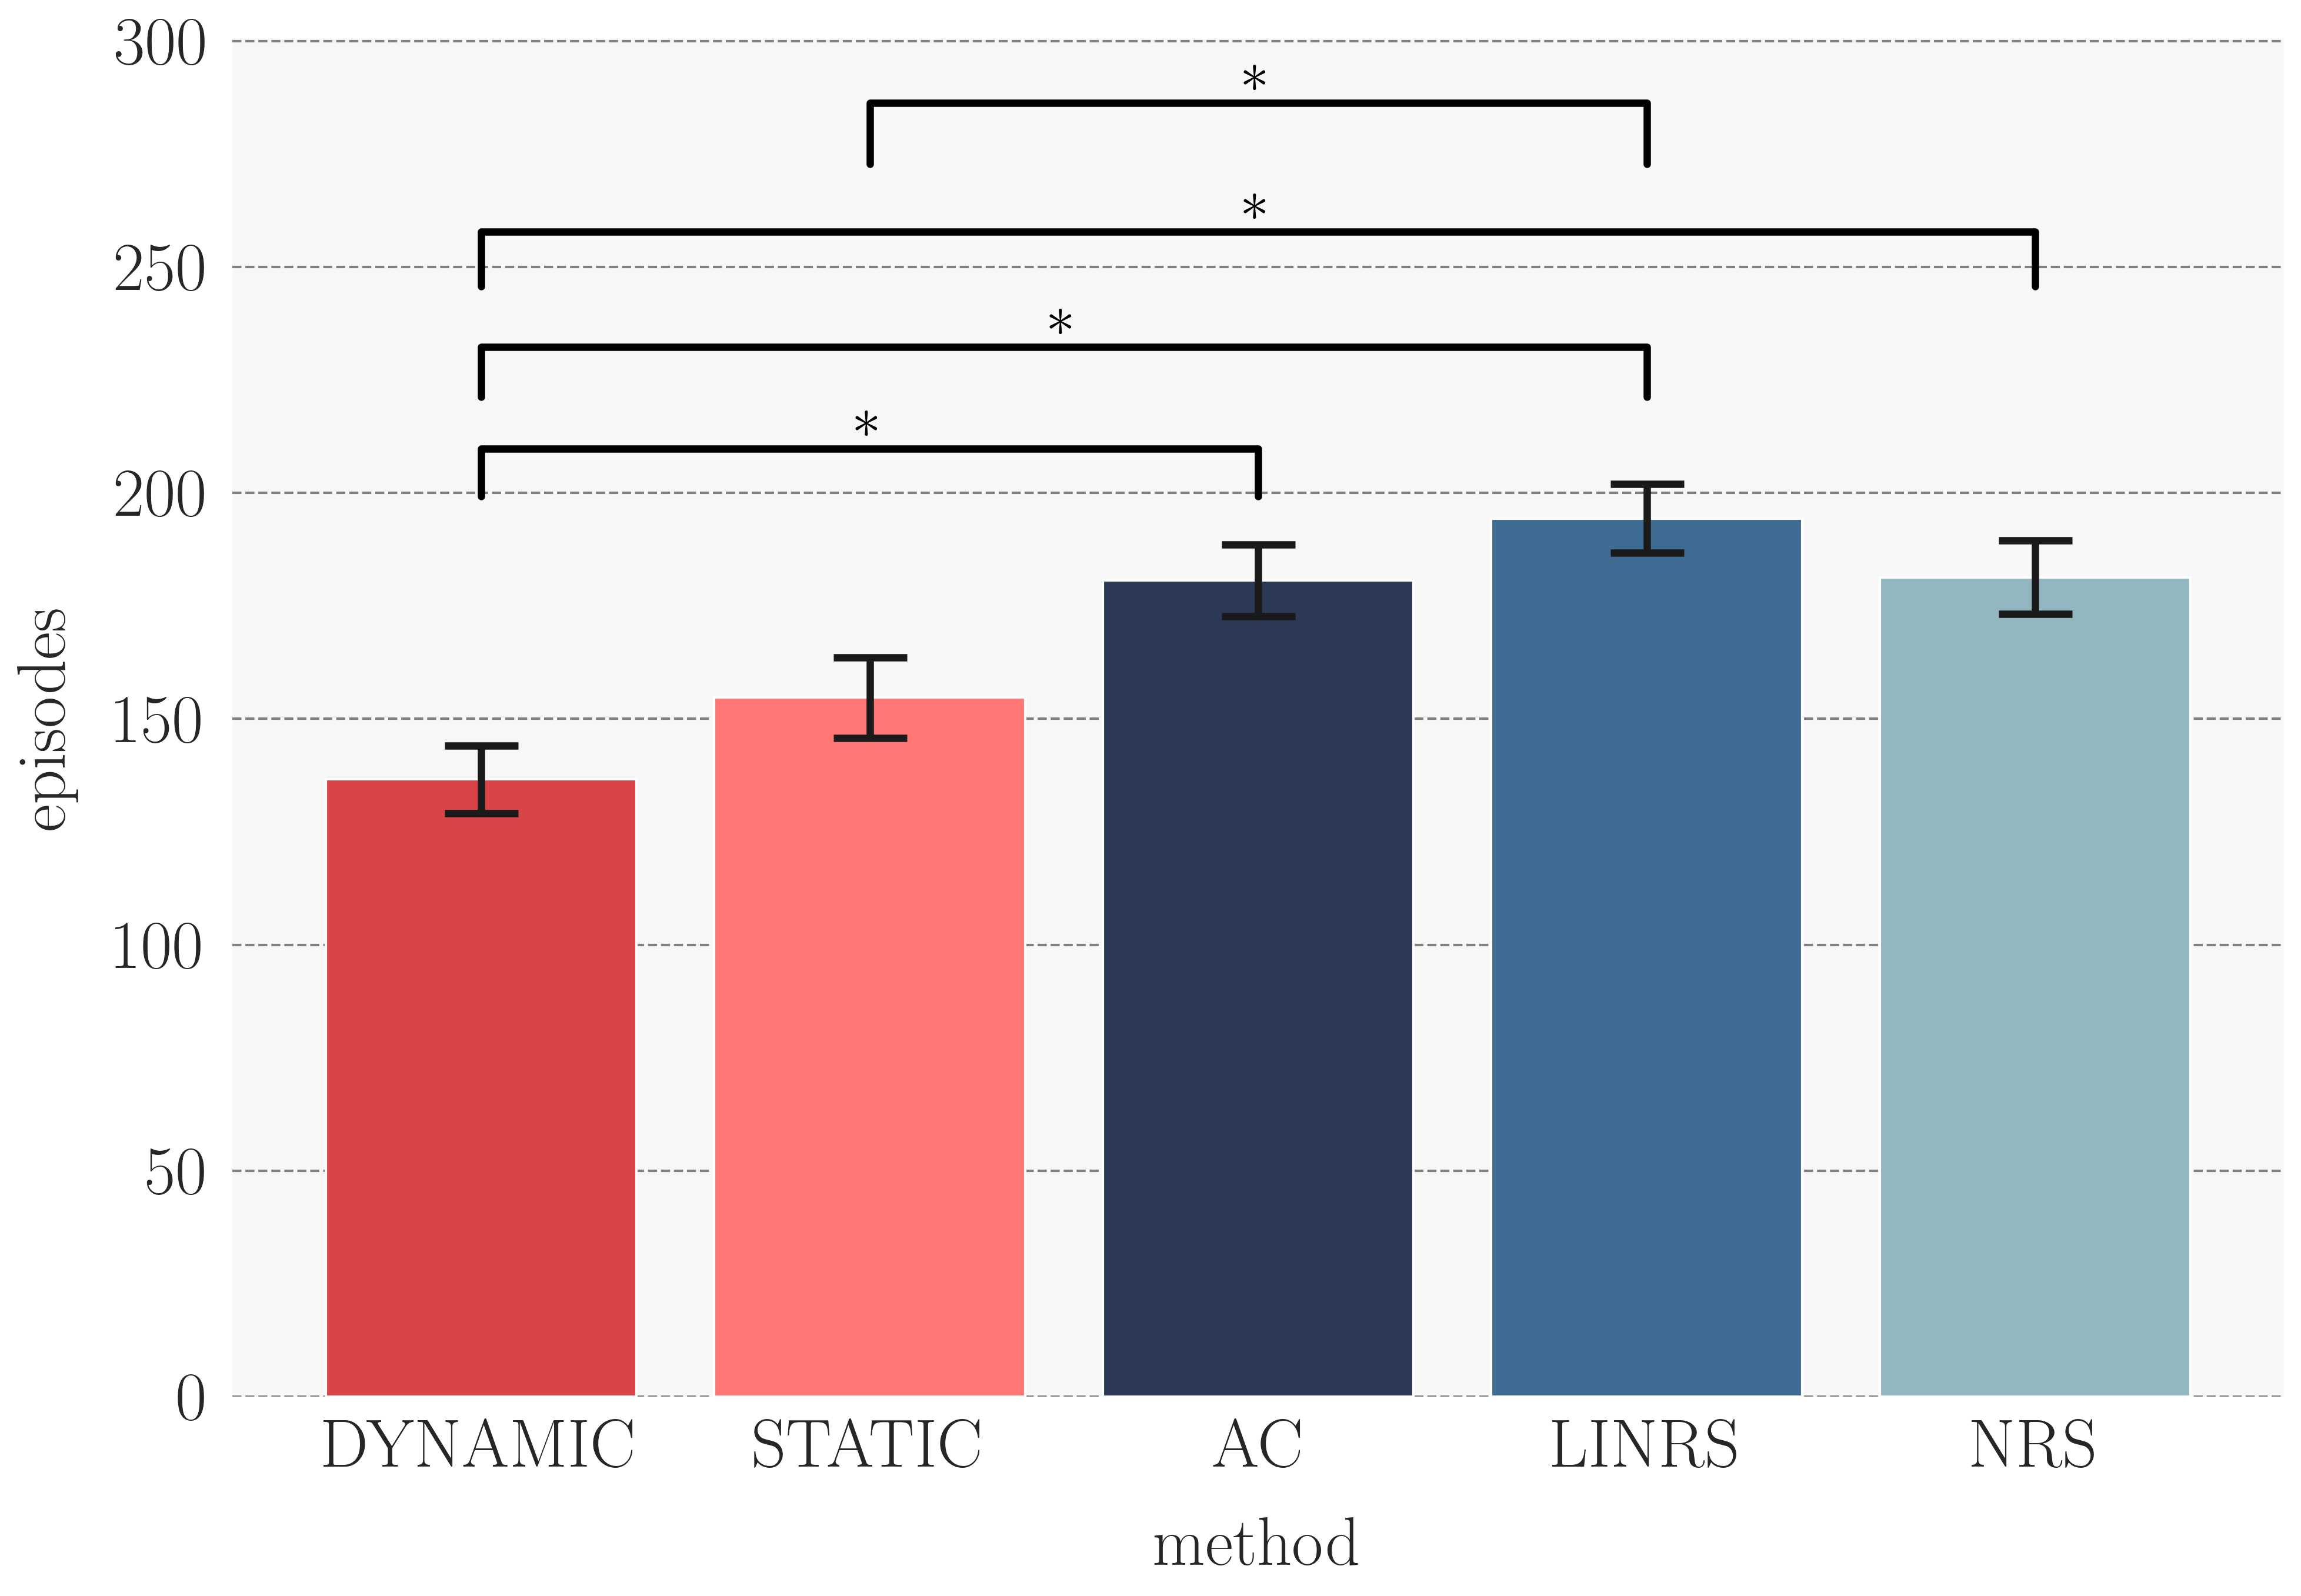

In [23]:
domain = "pinball"
metric = "time_to_threshold_500"
data_df = pd.read_csv(f"../notebooks/in/{domain}/{metric}.csv", index_col=0)

target_data_df = data_df.loc[pinball_idx, ["DYN-HUMAN", "STATIC-HUMAN", "AC", "LINRS", "NRS"]].rename(
    columns={
        "DYN-HUMAN": "DYNAMIC", "STATIC-HUMAN": "STATIC"
    }
)
tuples = [(0, 2, "$*$"), (0, 3, "$*$"), (0, 4, "$*$"), (1, 3, "$*$")]
bar_plot_with_asterisk(metric, domain, target_data_df, tuples)

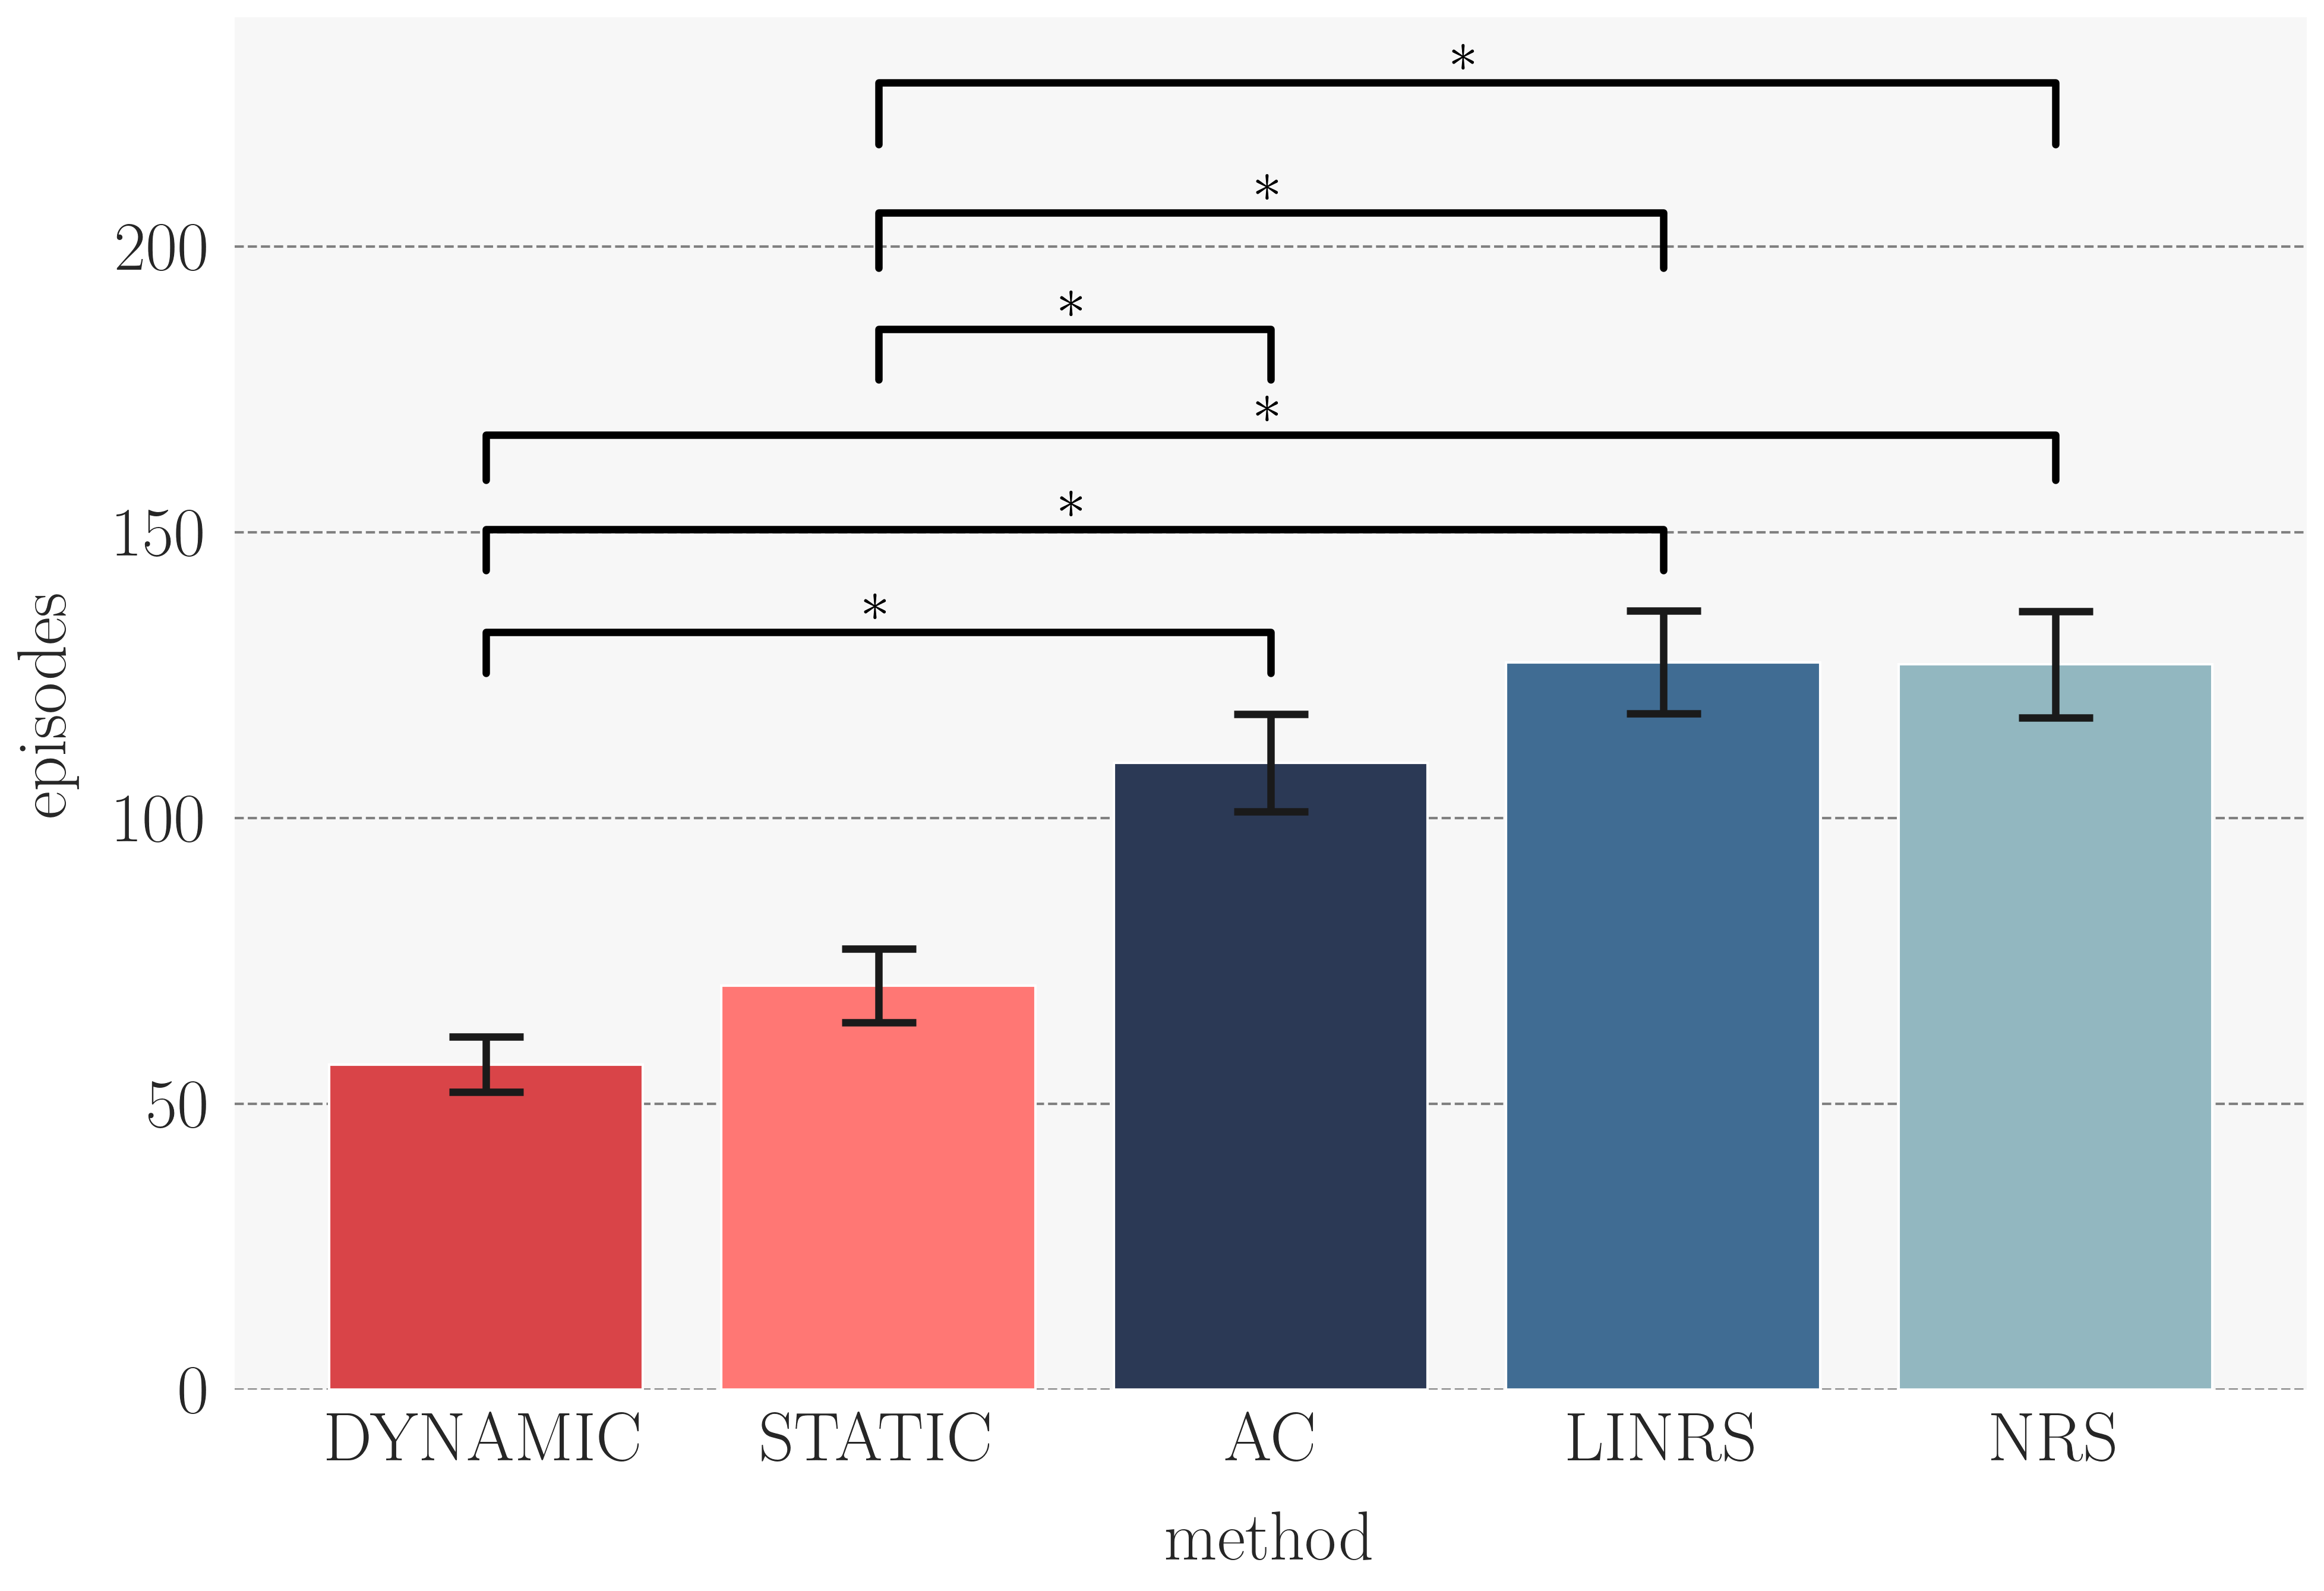

In [24]:
domain = "pinball"
metric = "time_to_threshold_1000"
data_df = pd.read_csv(f"../notebooks/in/{domain}/{metric}.csv", index_col=0)

target_data_df = data_df.loc[pinball_idx, ["DYN-HUMAN", "STATIC-HUMAN", "AC", "LINRS", "NRS"]].rename(
    columns={
        "DYN-HUMAN": "DYNAMIC", "STATIC-HUMAN": "STATIC"
    }
)
tuples = [(0, 2, "$*$"), (0, 3, "$*$"), (0, 4, "$*$"), (1, 2, "$*$"), (1, 3, "$*$"), (1, 4, "$*$")]
bar_plot_with_asterisk(metric, domain, target_data_df, tuples)

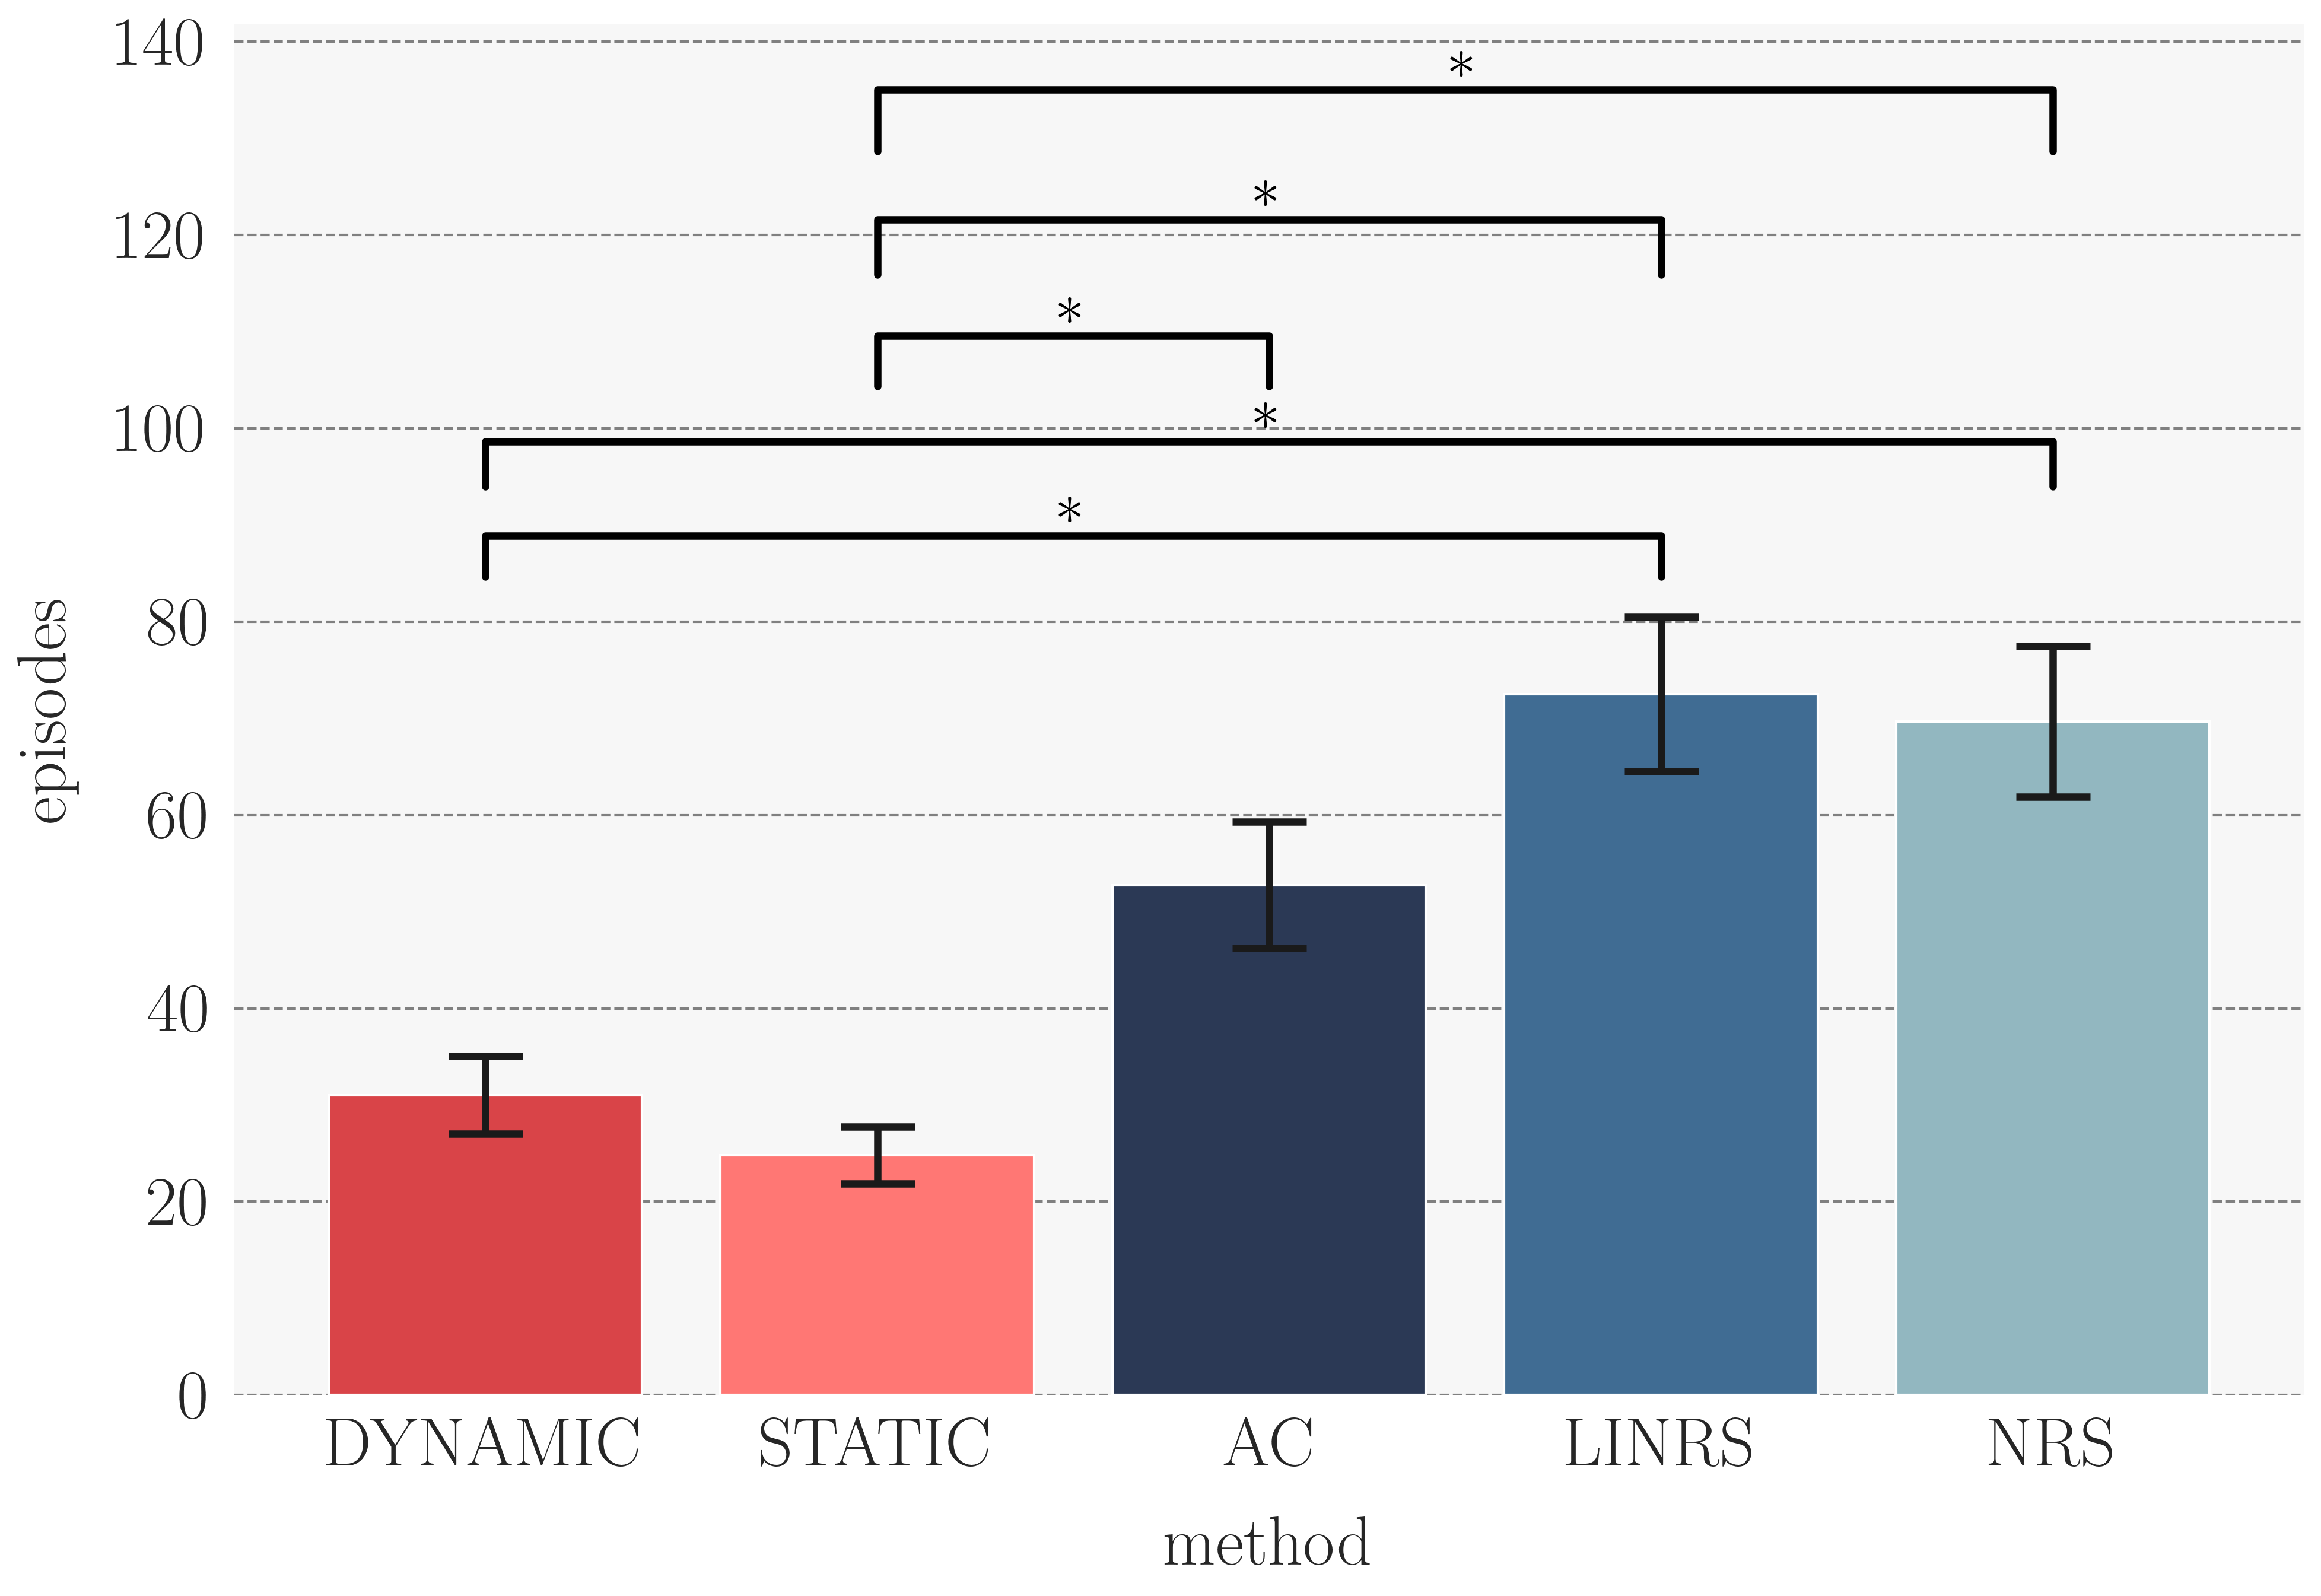

In [25]:
domain = "pinball"
metric = "time_to_threshold_2000"
data_df = pd.read_csv(f"../notebooks/in/{domain}/{metric}.csv", index_col=0)

target_data_df = data_df.loc[pinball_idx, ["DYN-HUMAN", "STATIC-HUMAN", "AC", "LINRS", "NRS"]].rename(
    columns={
        "DYN-HUMAN": "DYNAMIC", "STATIC-HUMAN": "STATIC"
    }
)
tuples = [(0, 3, "$*$"), (0, 4, "$*$"), (1, 2, "$*$"), (1, 3, "$*$"), (1, 4, "$*$")]
bar_plot_with_asterisk(metric, domain, target_data_df, tuples)

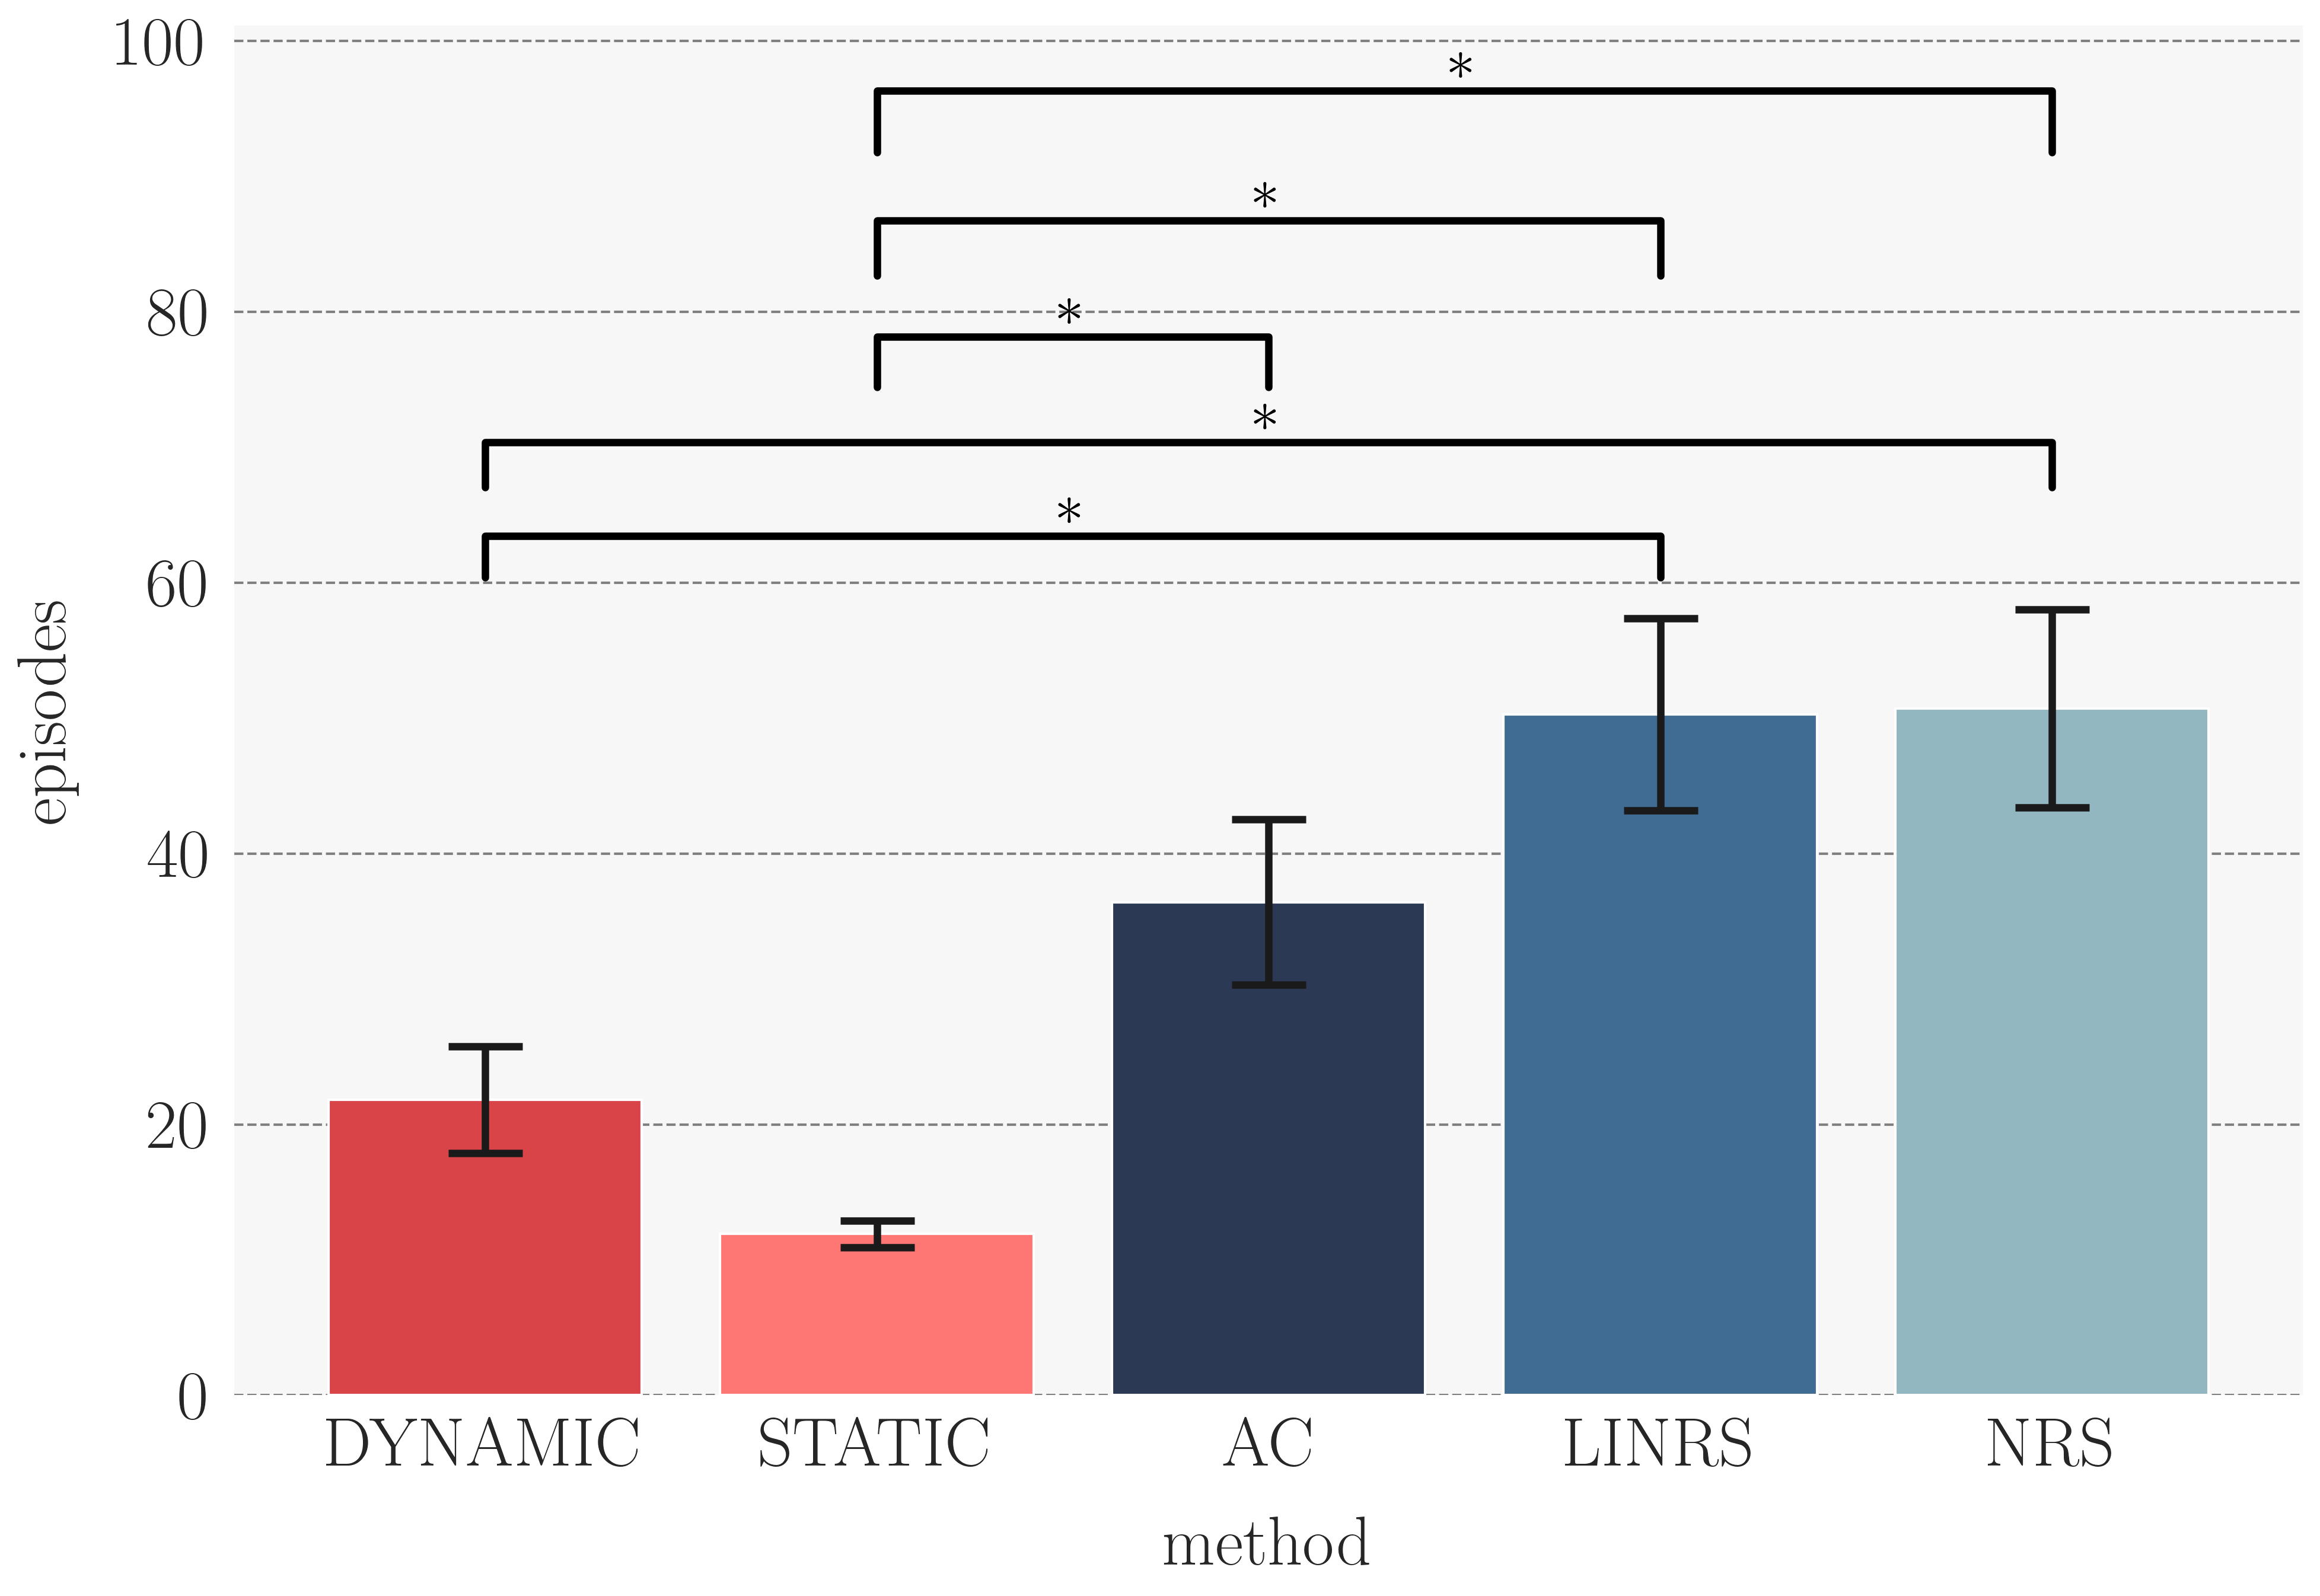

In [26]:
domain = "pinball"
metric = "time_to_threshold_3000"
data_df = pd.read_csv(f"../notebooks/in/{domain}/{metric}.csv", index_col=0)

target_data_df = data_df.loc[pinball_idx, ["DYN-HUMAN", "STATIC-HUMAN", "AC", "LINRS", "NRS"]].rename(
    columns={
        "DYN-HUMAN": "DYNAMIC", "STATIC-HUMAN": "STATIC"
    }
)
tuples = [(0, 3, "$*$"), (0, 4, "$*$"), (1, 2, "$*$"), (1, 3, "$*$"), (1, 4, "$*$")]
bar_plot_with_asterisk(metric, domain, target_data_df, tuples)

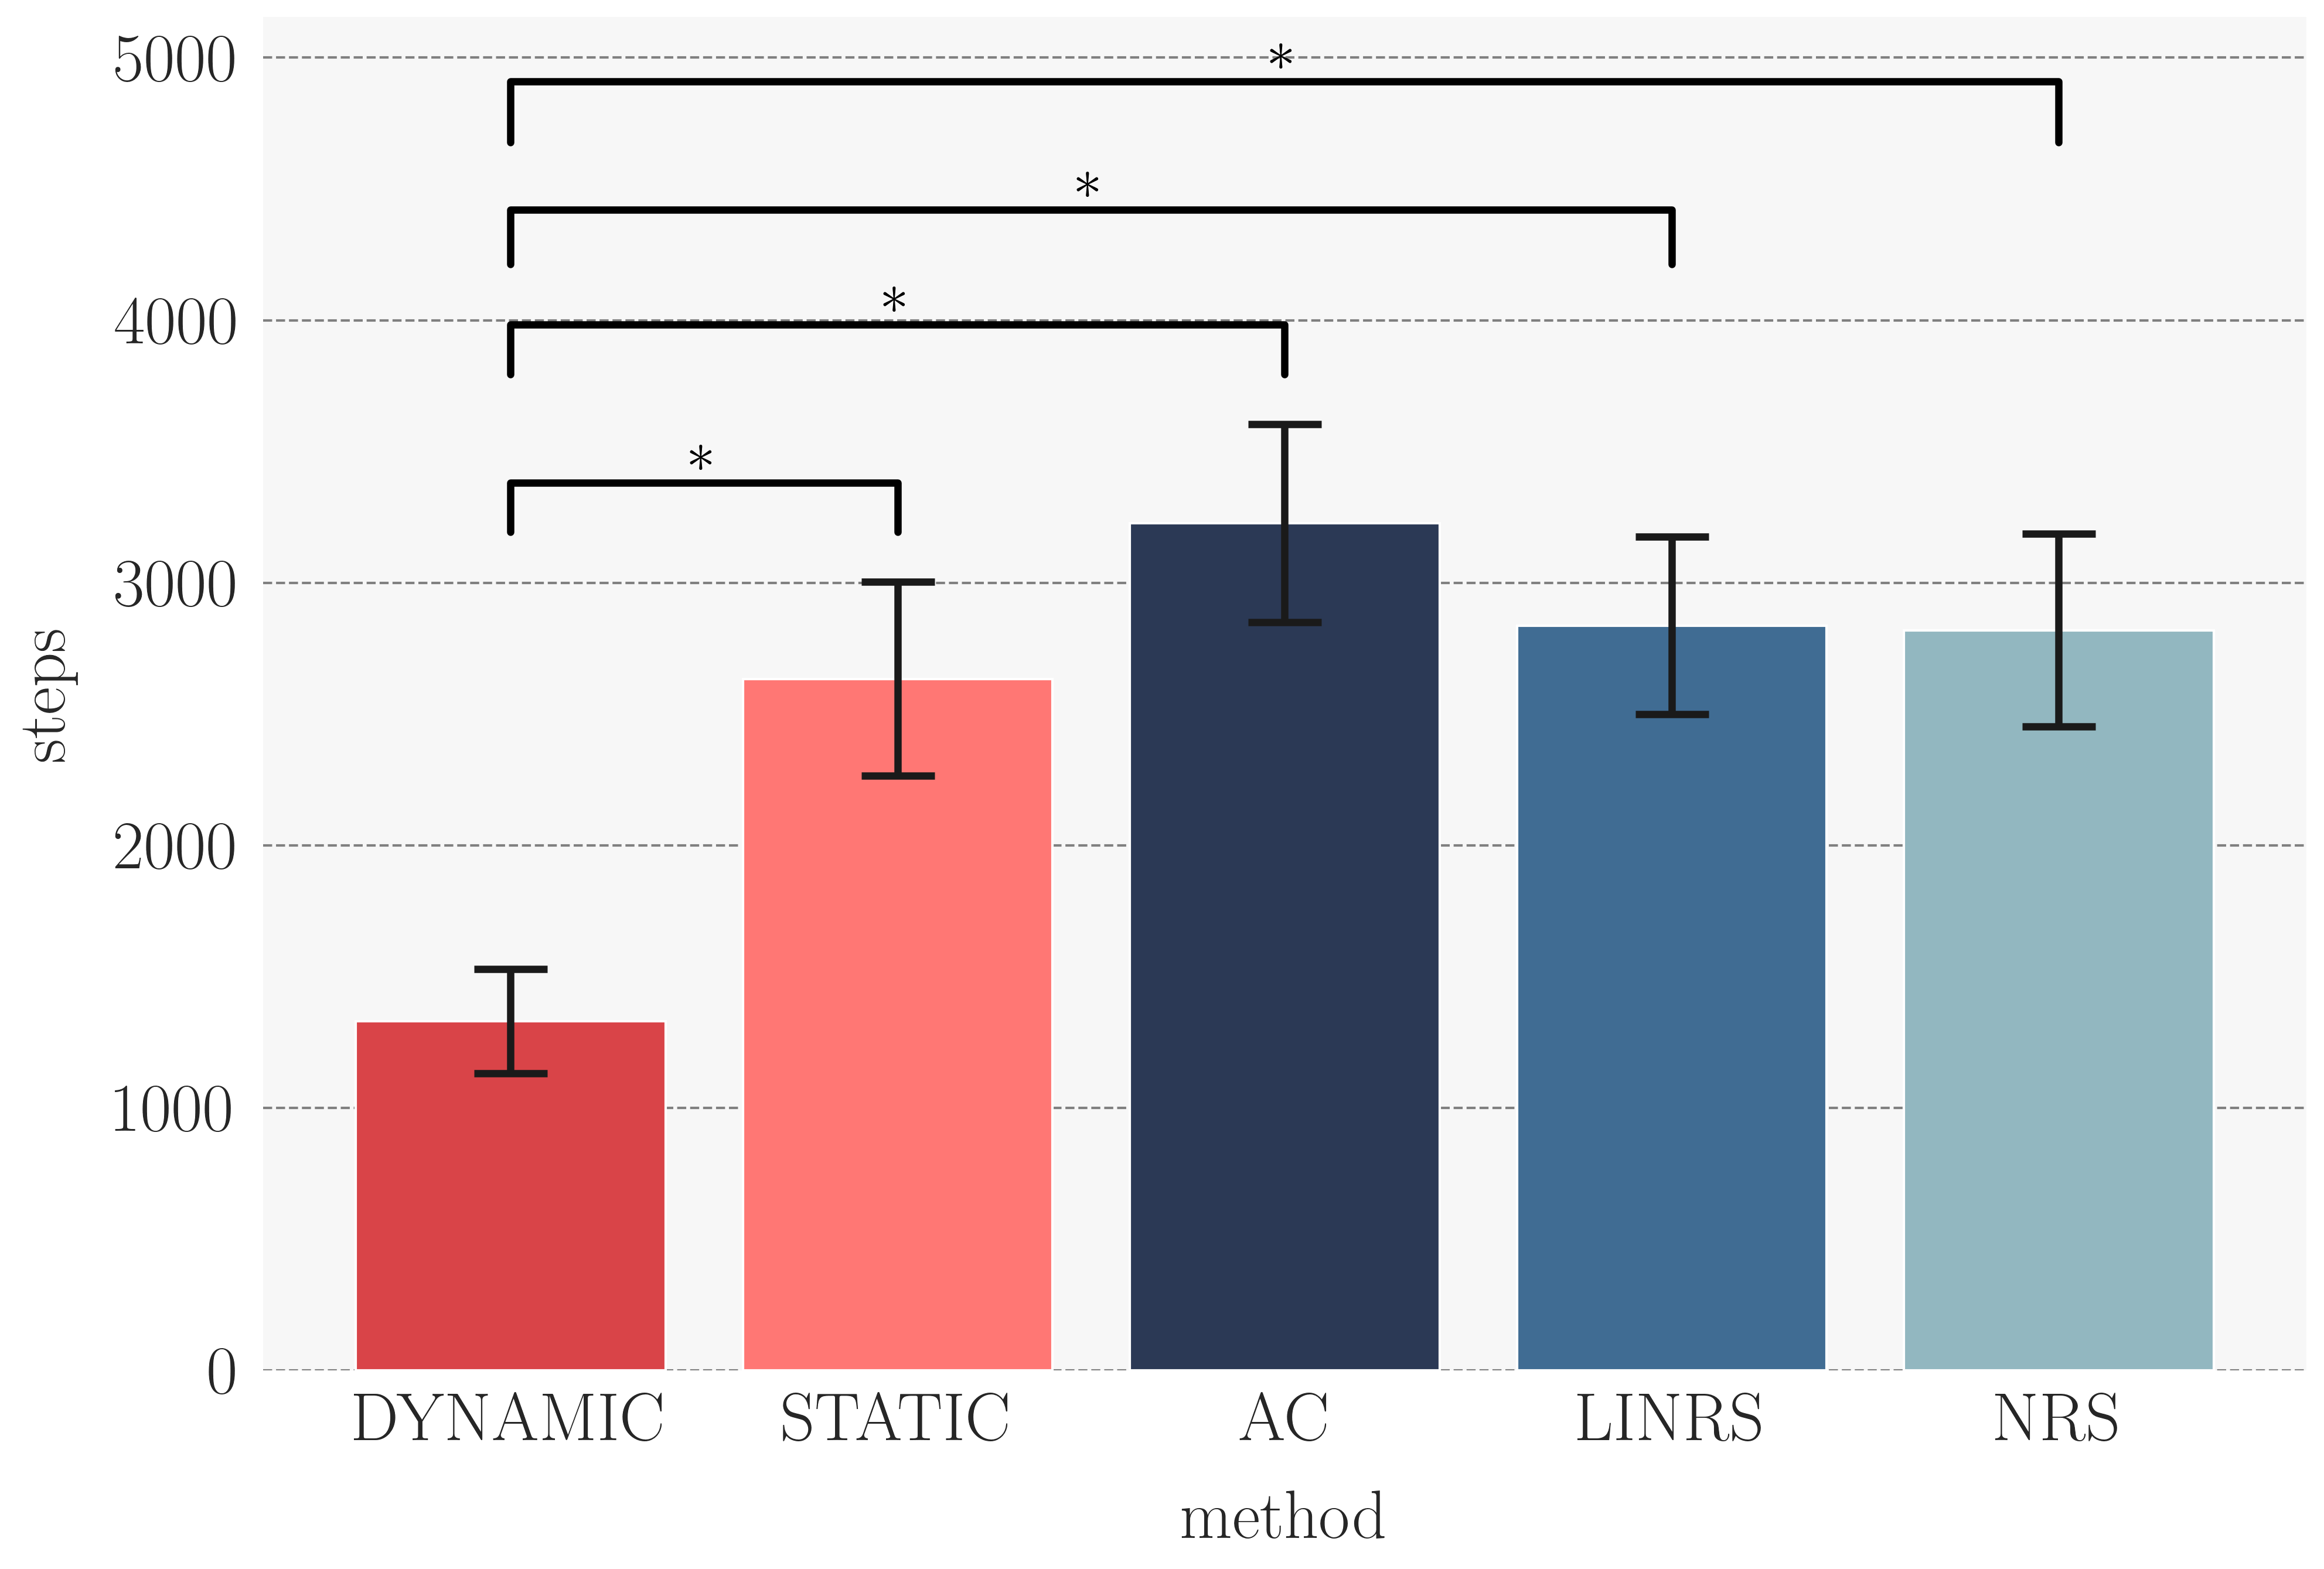

In [27]:
domain = "pinball"
metric = "asymptotic_performance"
data_df = pd.read_csv(f"../notebooks/in/{domain}/{metric}.csv", index_col=0)

target_data_df = data_df.loc[pinball_idx, ["DYN-HUMAN", "STATIC-HUMAN", "AC", "LINRS", "NRS"]].rename(
    columns={
        "DYN-HUMAN": "DYNAMIC", "STATIC-HUMAN": "STATIC"
    }
)
tuples = [(0, 1, "$*$"), (0, 2, "$*$"), (0, 3, "$*$"), (0, 4, "$*$")]
bar_plot_with_asterisk(metric, domain, target_data_df, tuples, "steps")

### Subgoal Quality

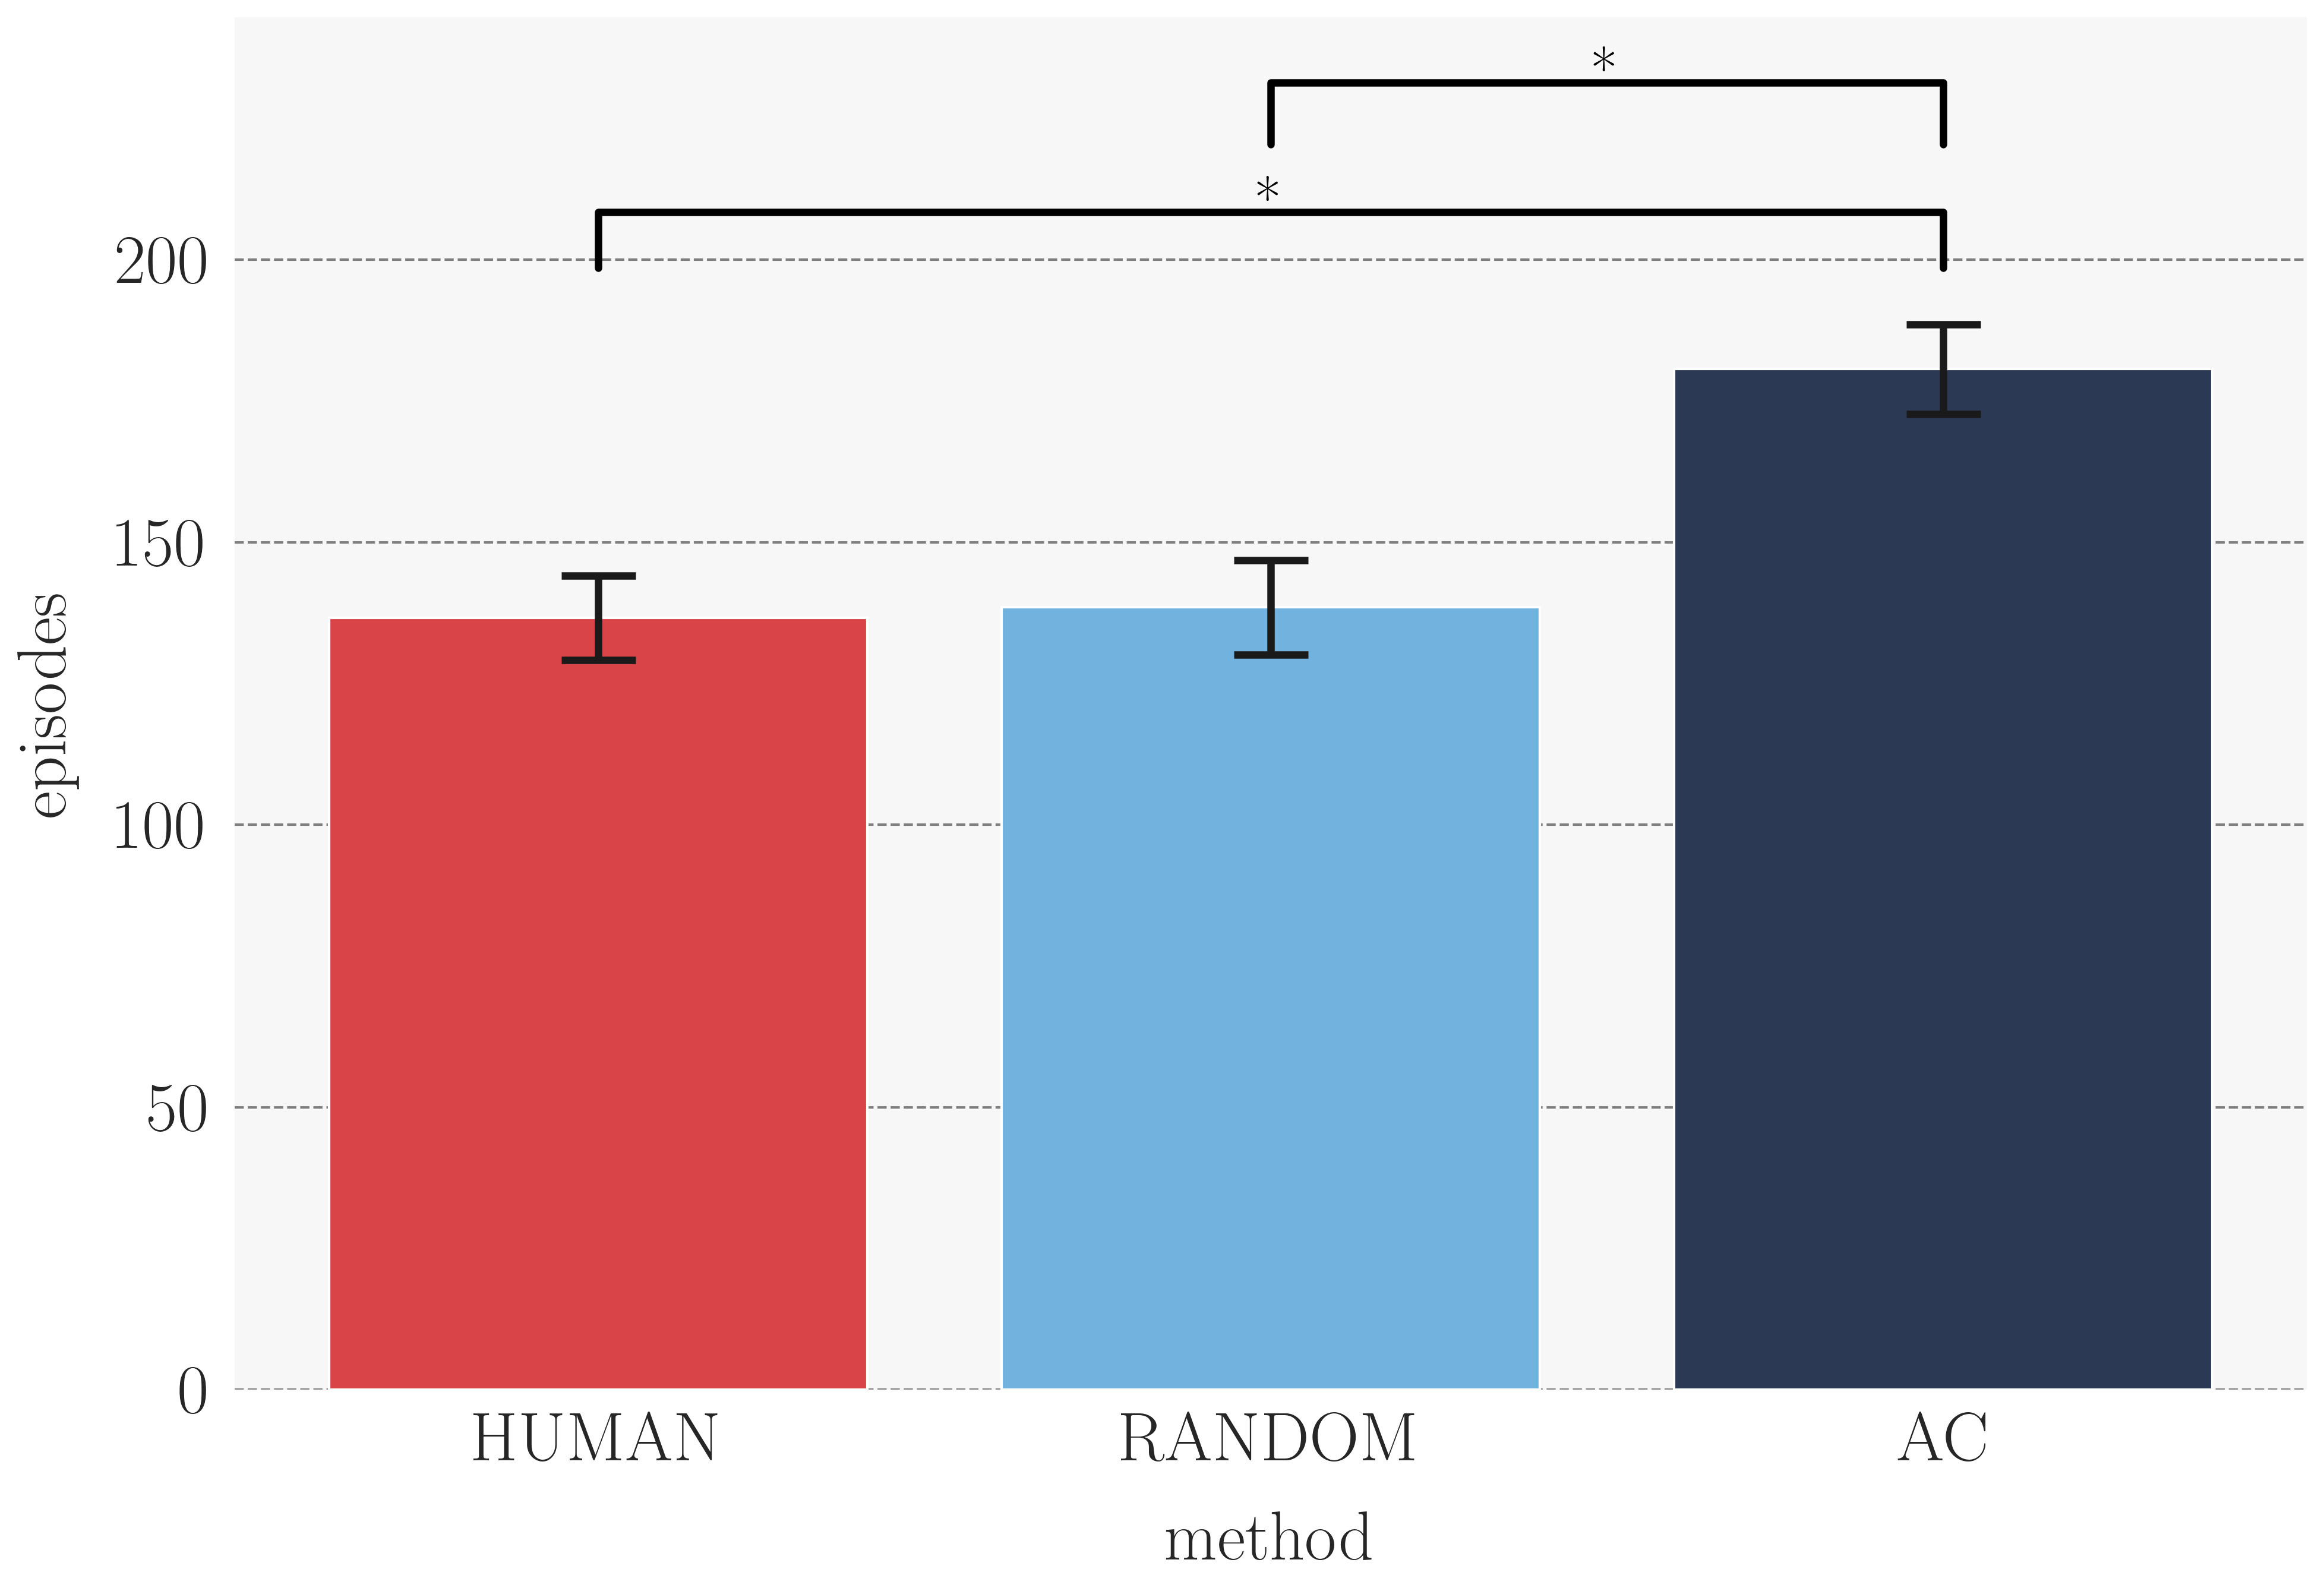

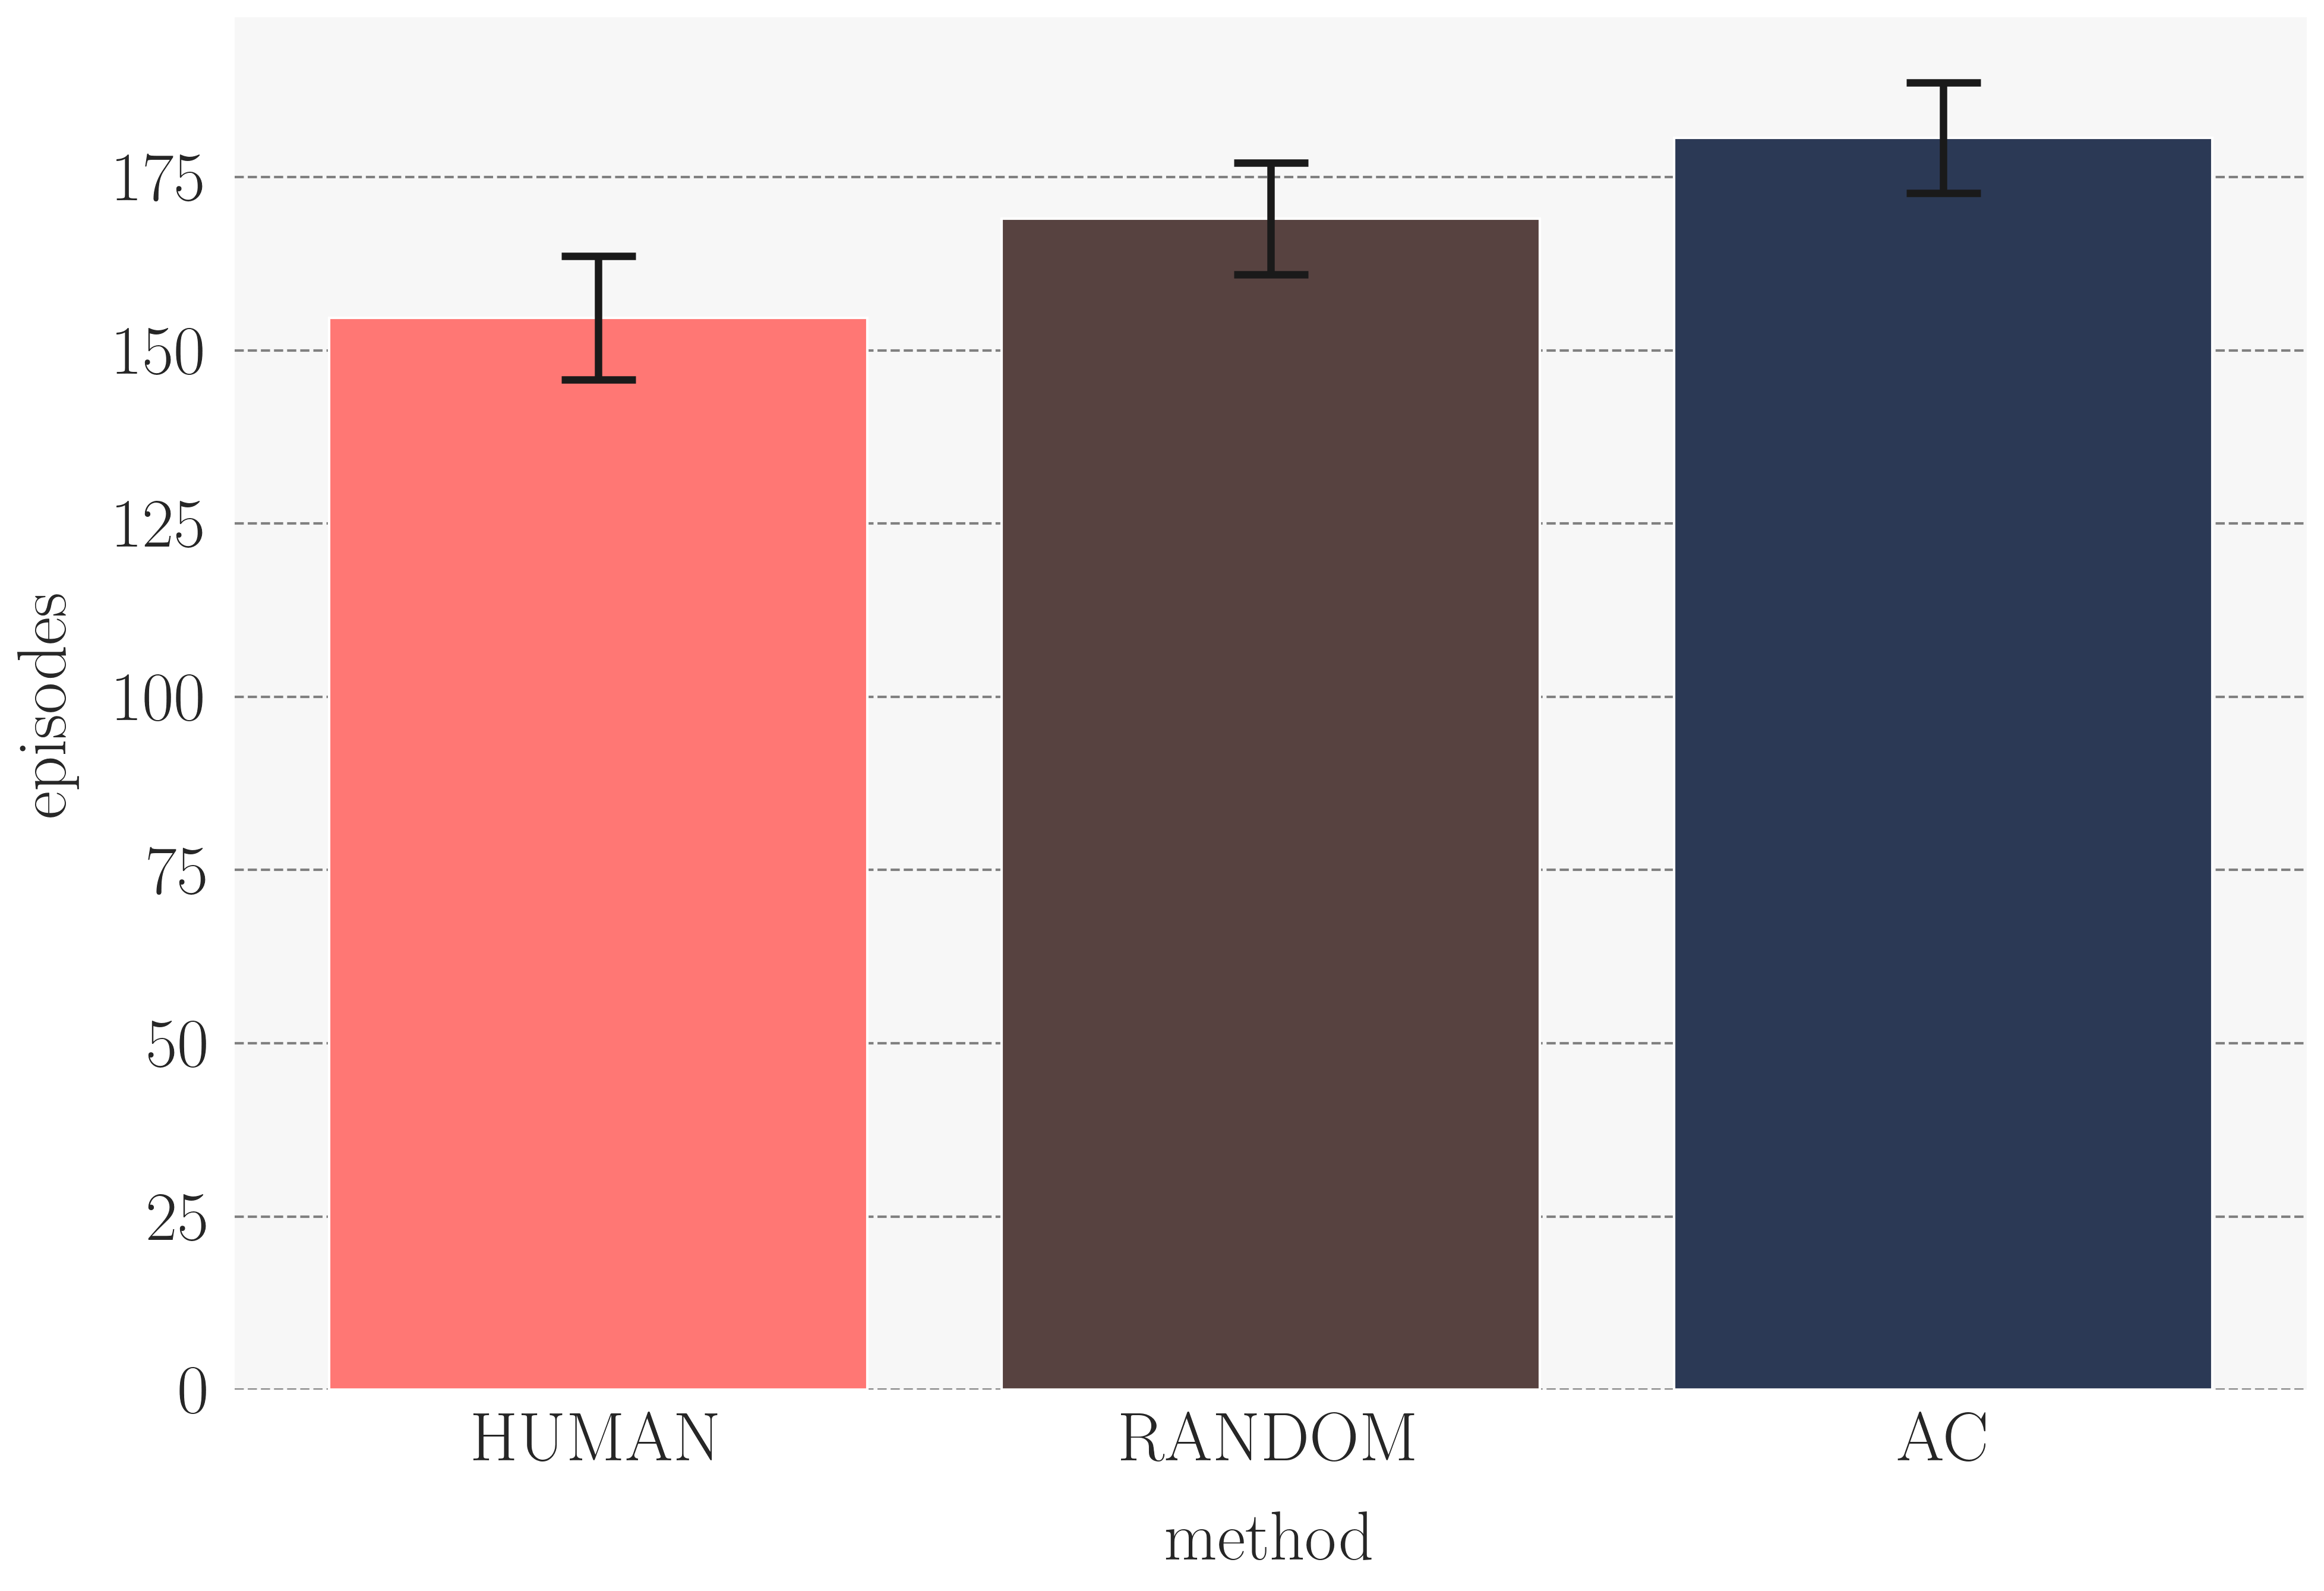

In [28]:
domain = "pinball"
metric = "time_to_threshold_500"
data_df = pd.read_csv(f"../notebooks/in/{domain}/{metric}.csv", index_col=0)

target_data_df = data_df.loc[pinball_idx, :]
# dynamic
dynamic_df = target_data_df[["DYN-HUMAN", "DYN-RANDOM", "AC"]].rename(
    columns={
        "DYN-HUMAN": "HUMAN", "DYN-RANDOM": "RANDOM"
    }
)
tuples = [(0, 2, "*"), (1, 2, "*")]
bar_plot_with_asterisk_qsubg(metric, domain, dynamic_df, tuples, "dynamic", ["#d94448", "#72B2DF", "#2b3955"])
# static
static_df = target_data_df[["STATIC-HUMAN", "STATIC-RANDOM", "AC"]].rename(
    columns={
        "STATIC-HUMAN": "HUMAN", "STATIC-RANDOM": "RANDOM"
    }
)
tuples = []
bar_plot_with_asterisk_qsubg(metric, domain, static_df, tuples, "static", ["#ff7774", "#574240", "#2b3955"])


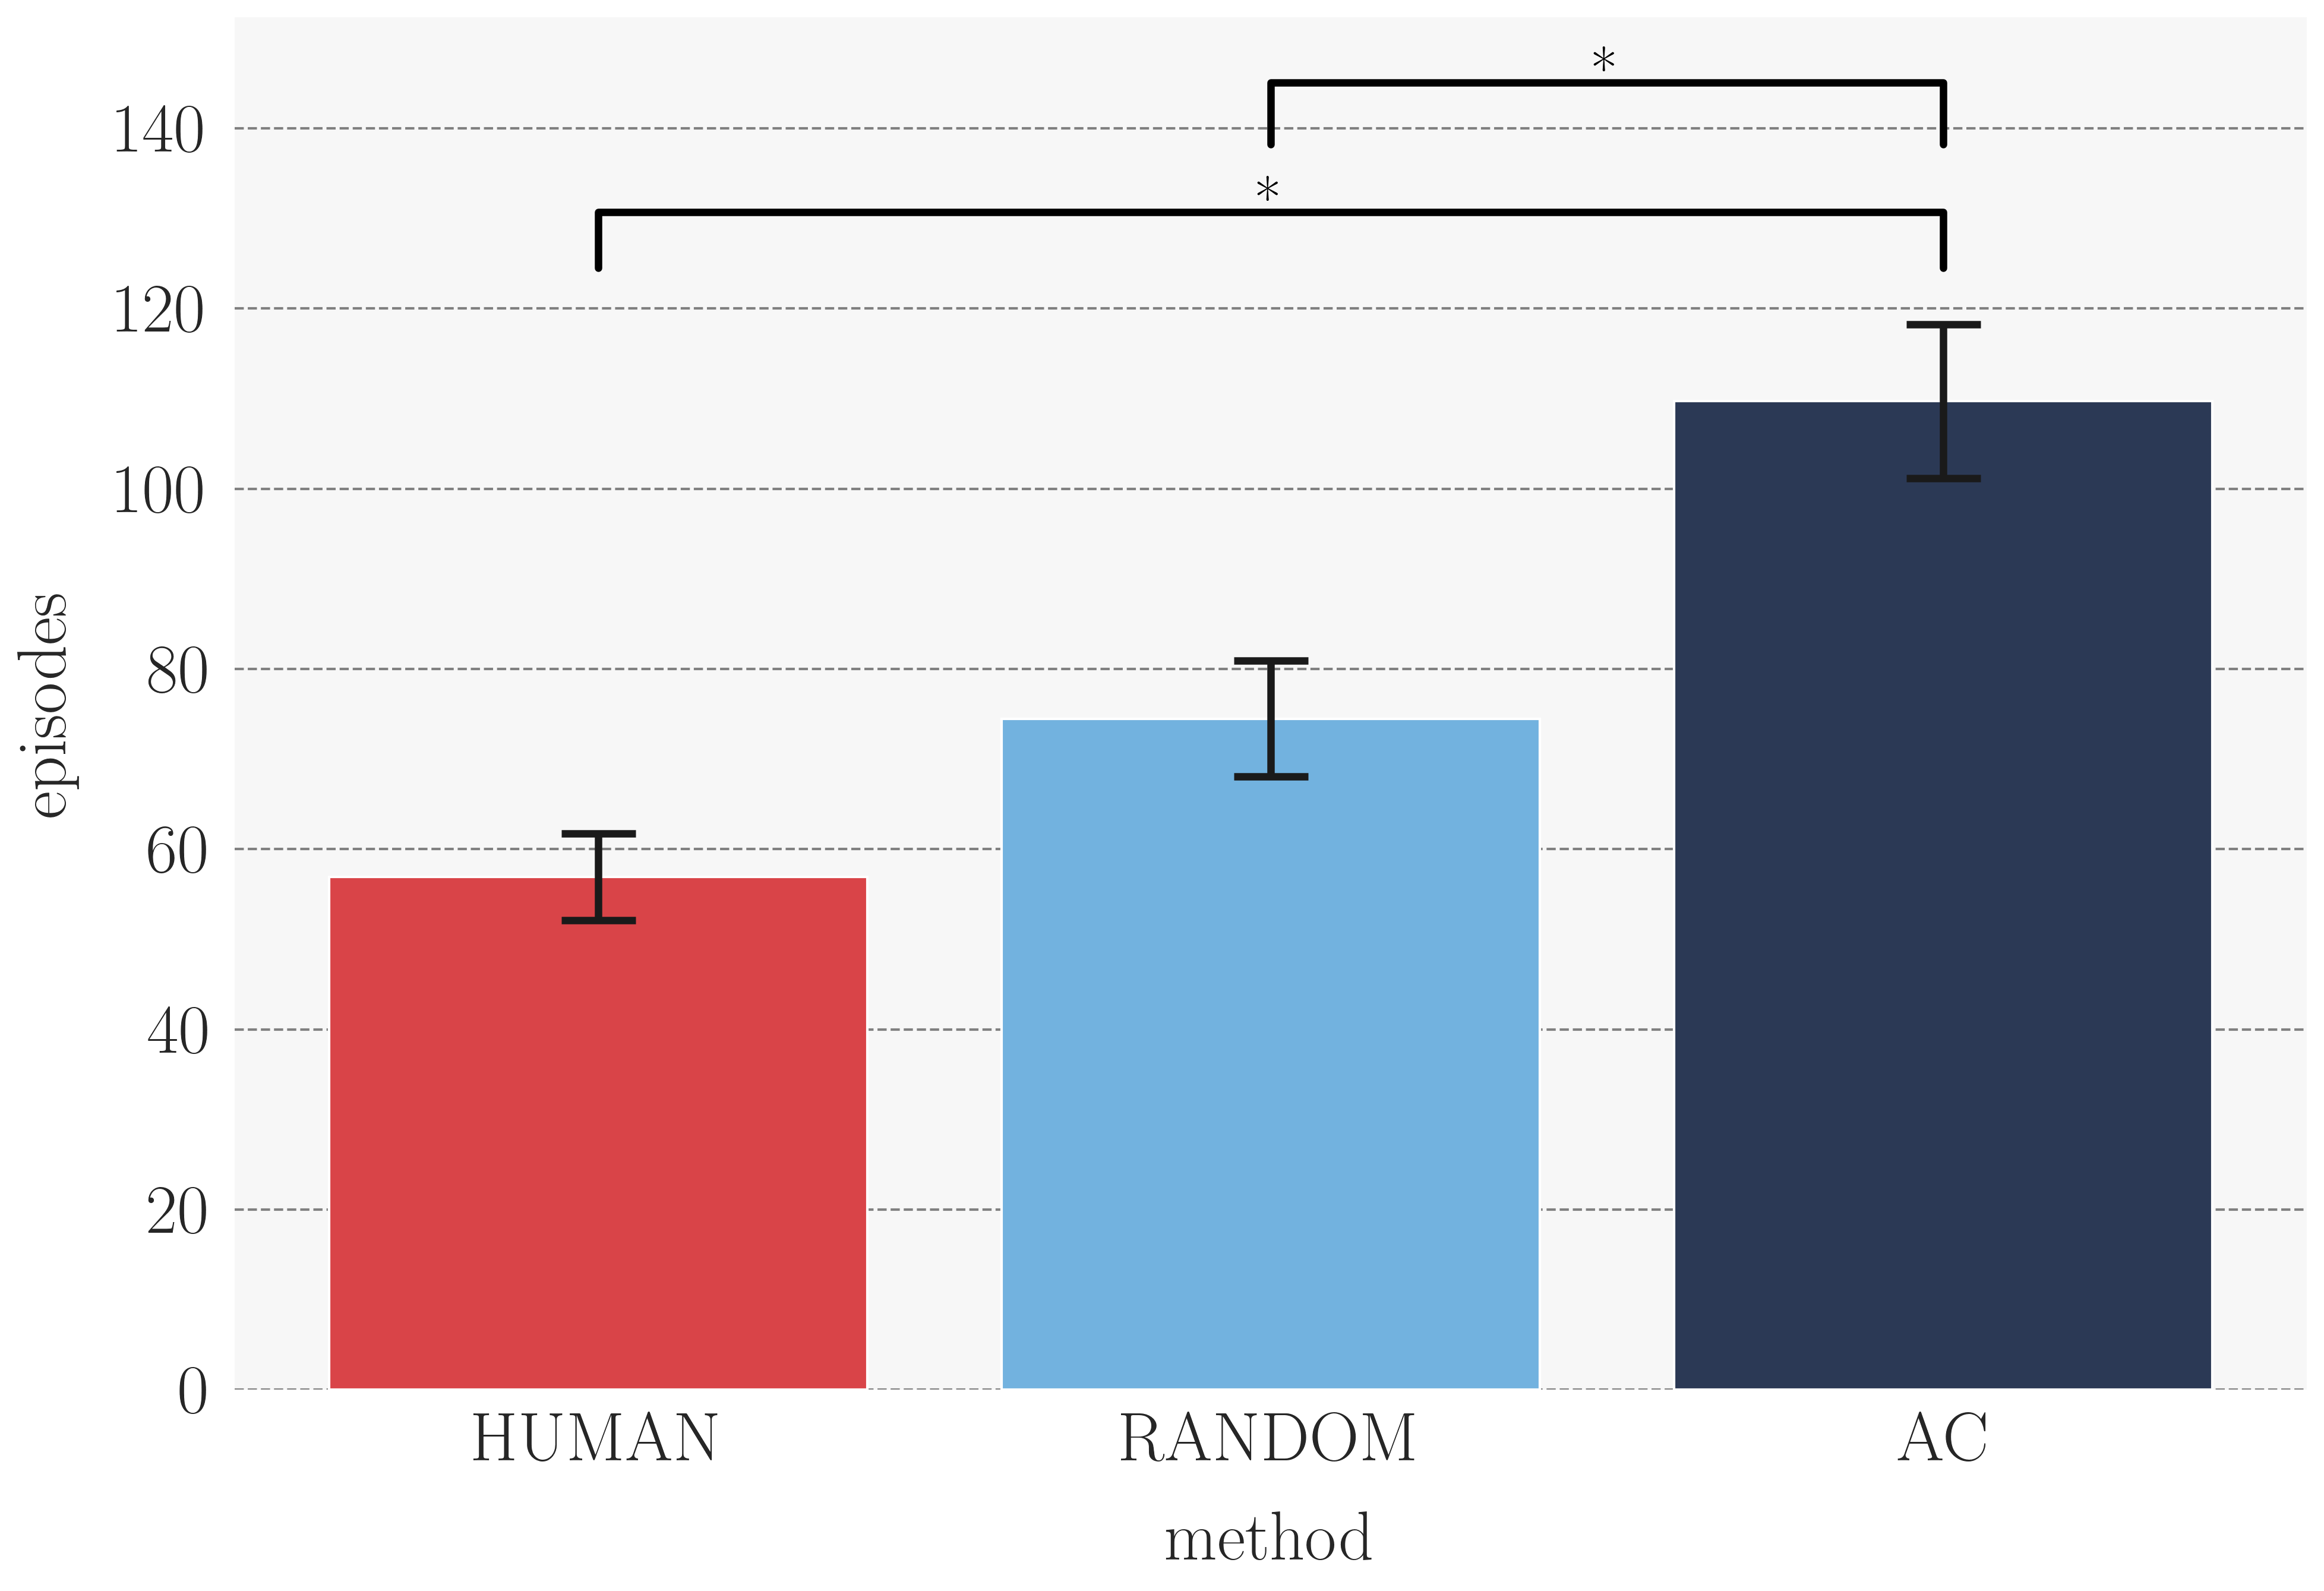

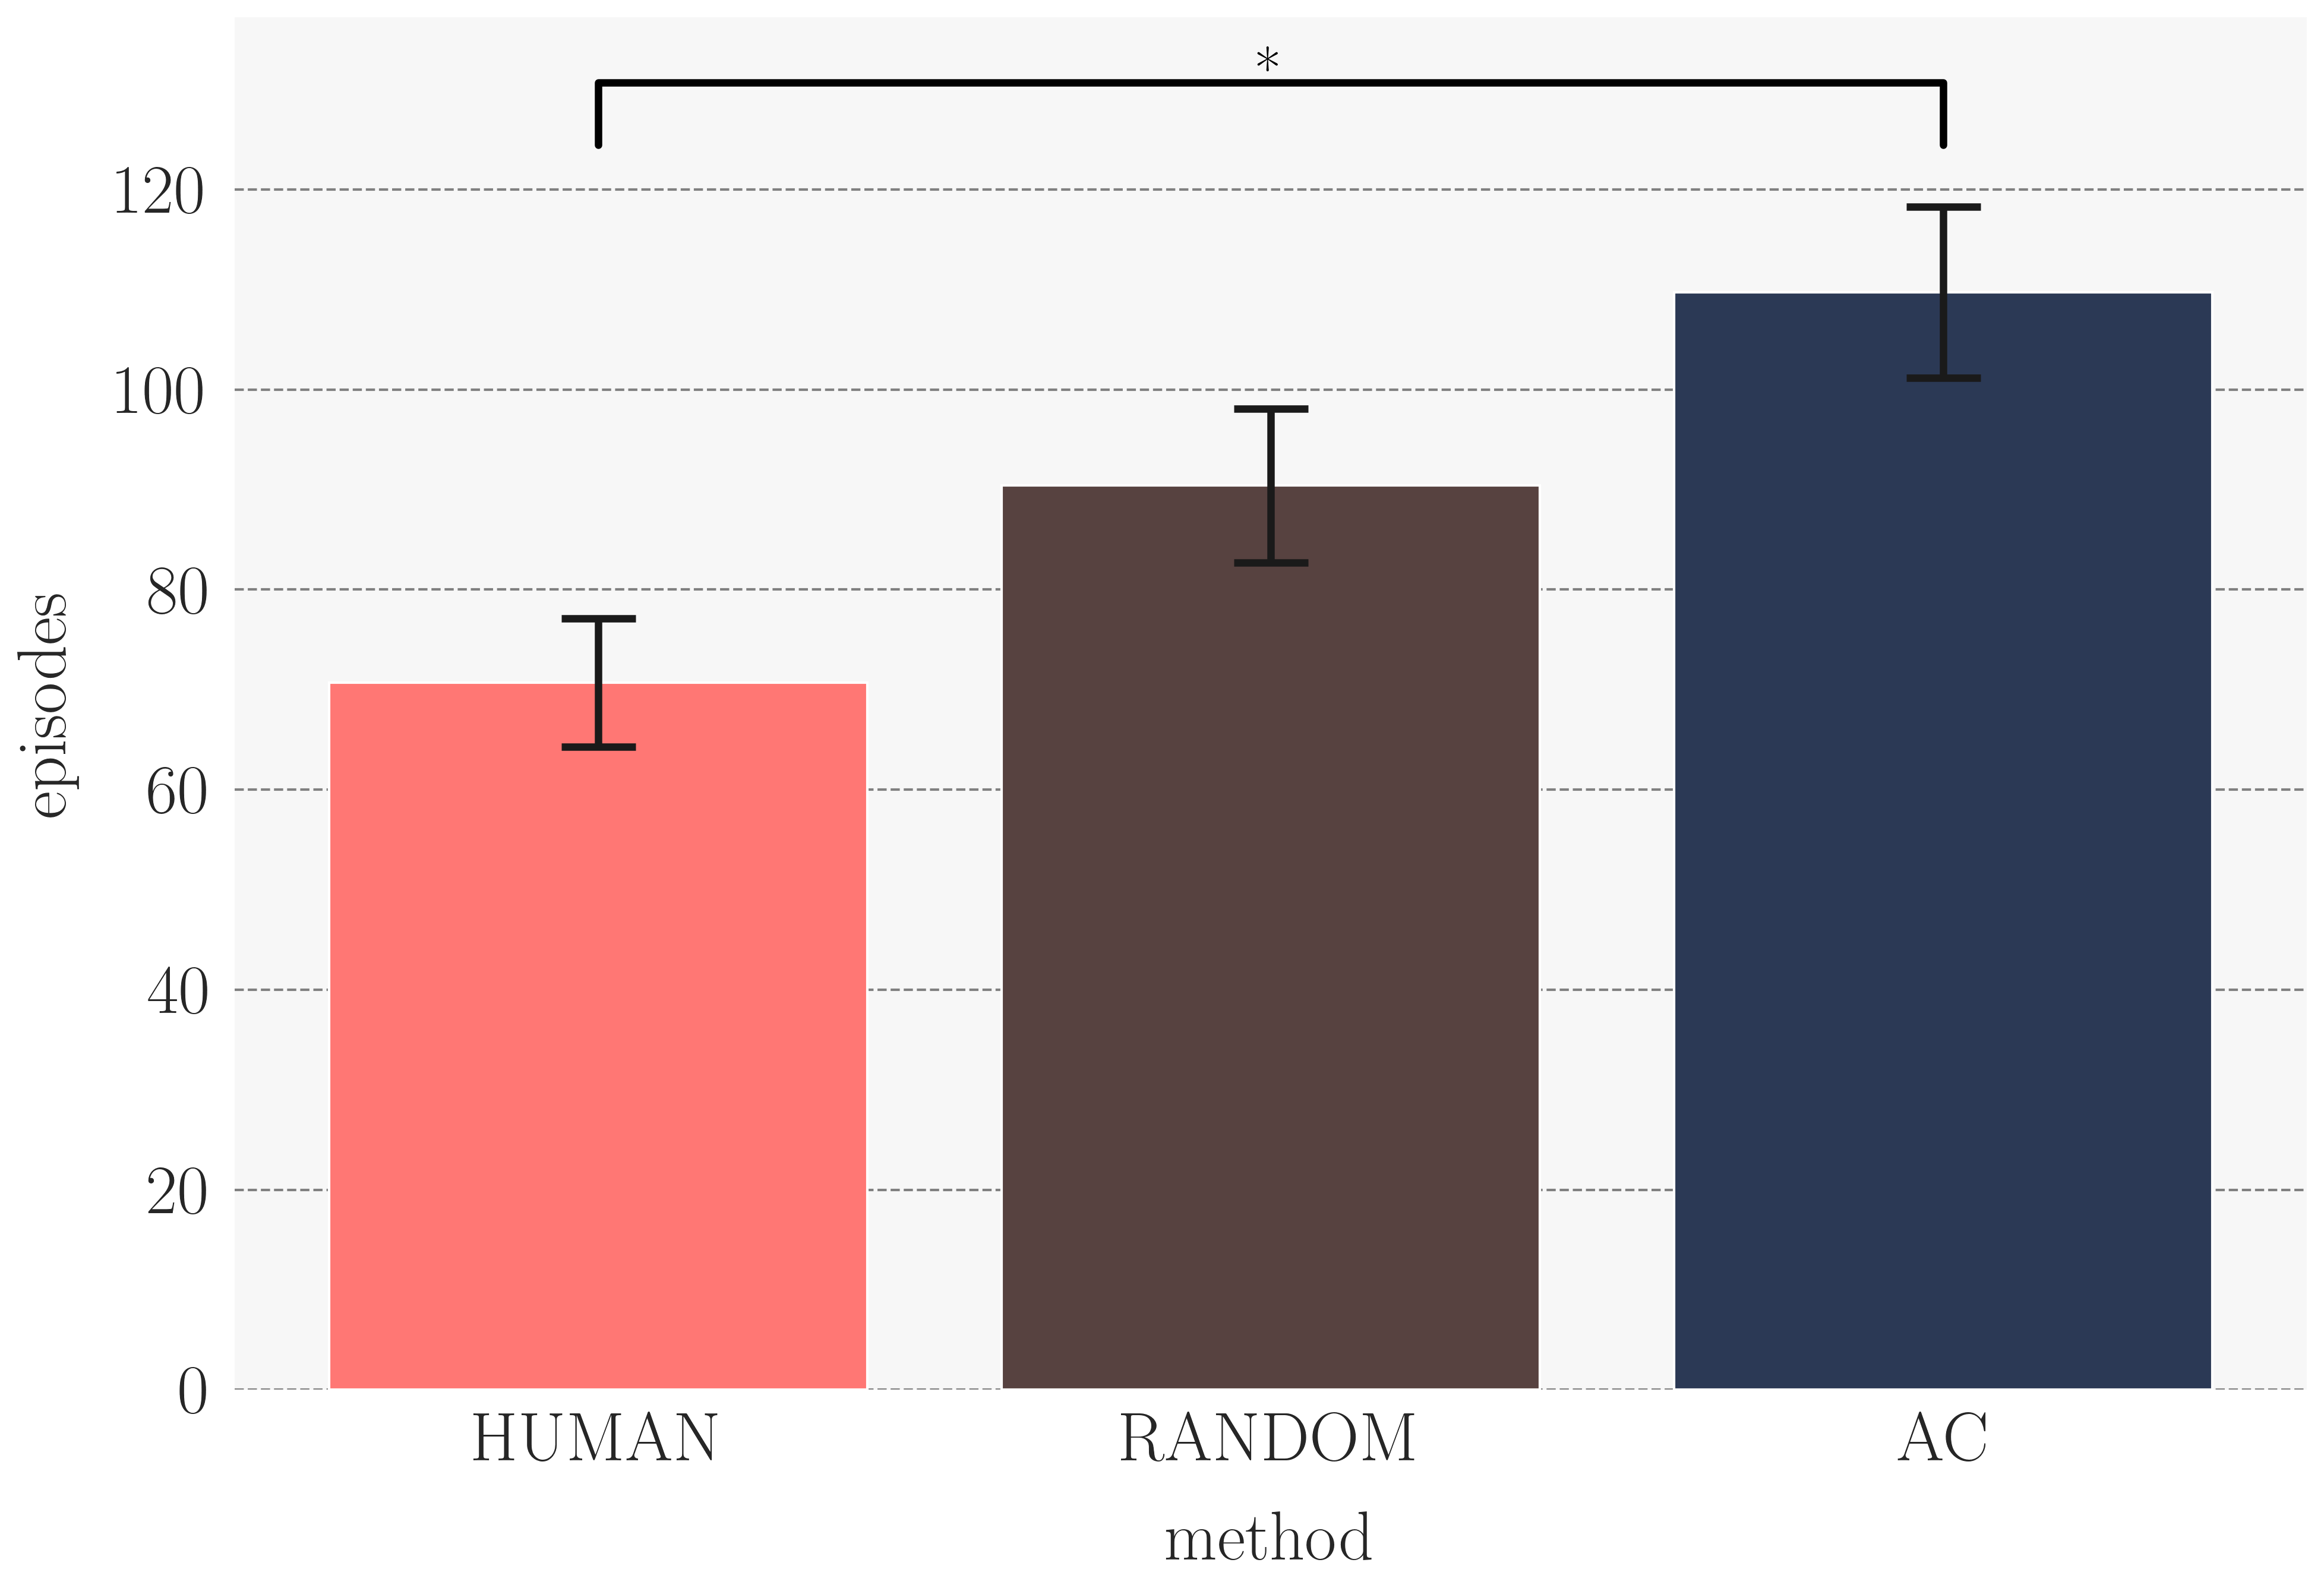

In [29]:
domain = "pinball"
metric = "time_to_threshold_1000"
data_df = pd.read_csv(f"../notebooks/in/{domain}/{metric}.csv", index_col=0)

target_data_df = data_df.loc[pinball_idx, :]
# dynamic
dynamic_df = target_data_df[["DYN-HUMAN", "DYN-RANDOM", "AC"]].rename(
    columns={
        "DYN-HUMAN": "HUMAN", "DYN-RANDOM": "RANDOM"
    }
)
tuples = [(0, 2, "*"), (1, 2, "*")]
bar_plot_with_asterisk_qsubg(metric, domain, dynamic_df, tuples, "dynamic", ["#d94448", "#72B2DF", "#2b3955"])
# static
static_df = target_data_df[["STATIC-HUMAN", "STATIC-RANDOM", "AC"]].rename(
    columns={
        "STATIC-HUMAN": "HUMAN", "STATIC-RANDOM": "RANDOM"
    }
)
tuples = [(0, 2, "*")]
bar_plot_with_asterisk_qsubg(metric, domain, static_df, tuples, "static", ["#ff7774", "#574240", "#2b3955"])

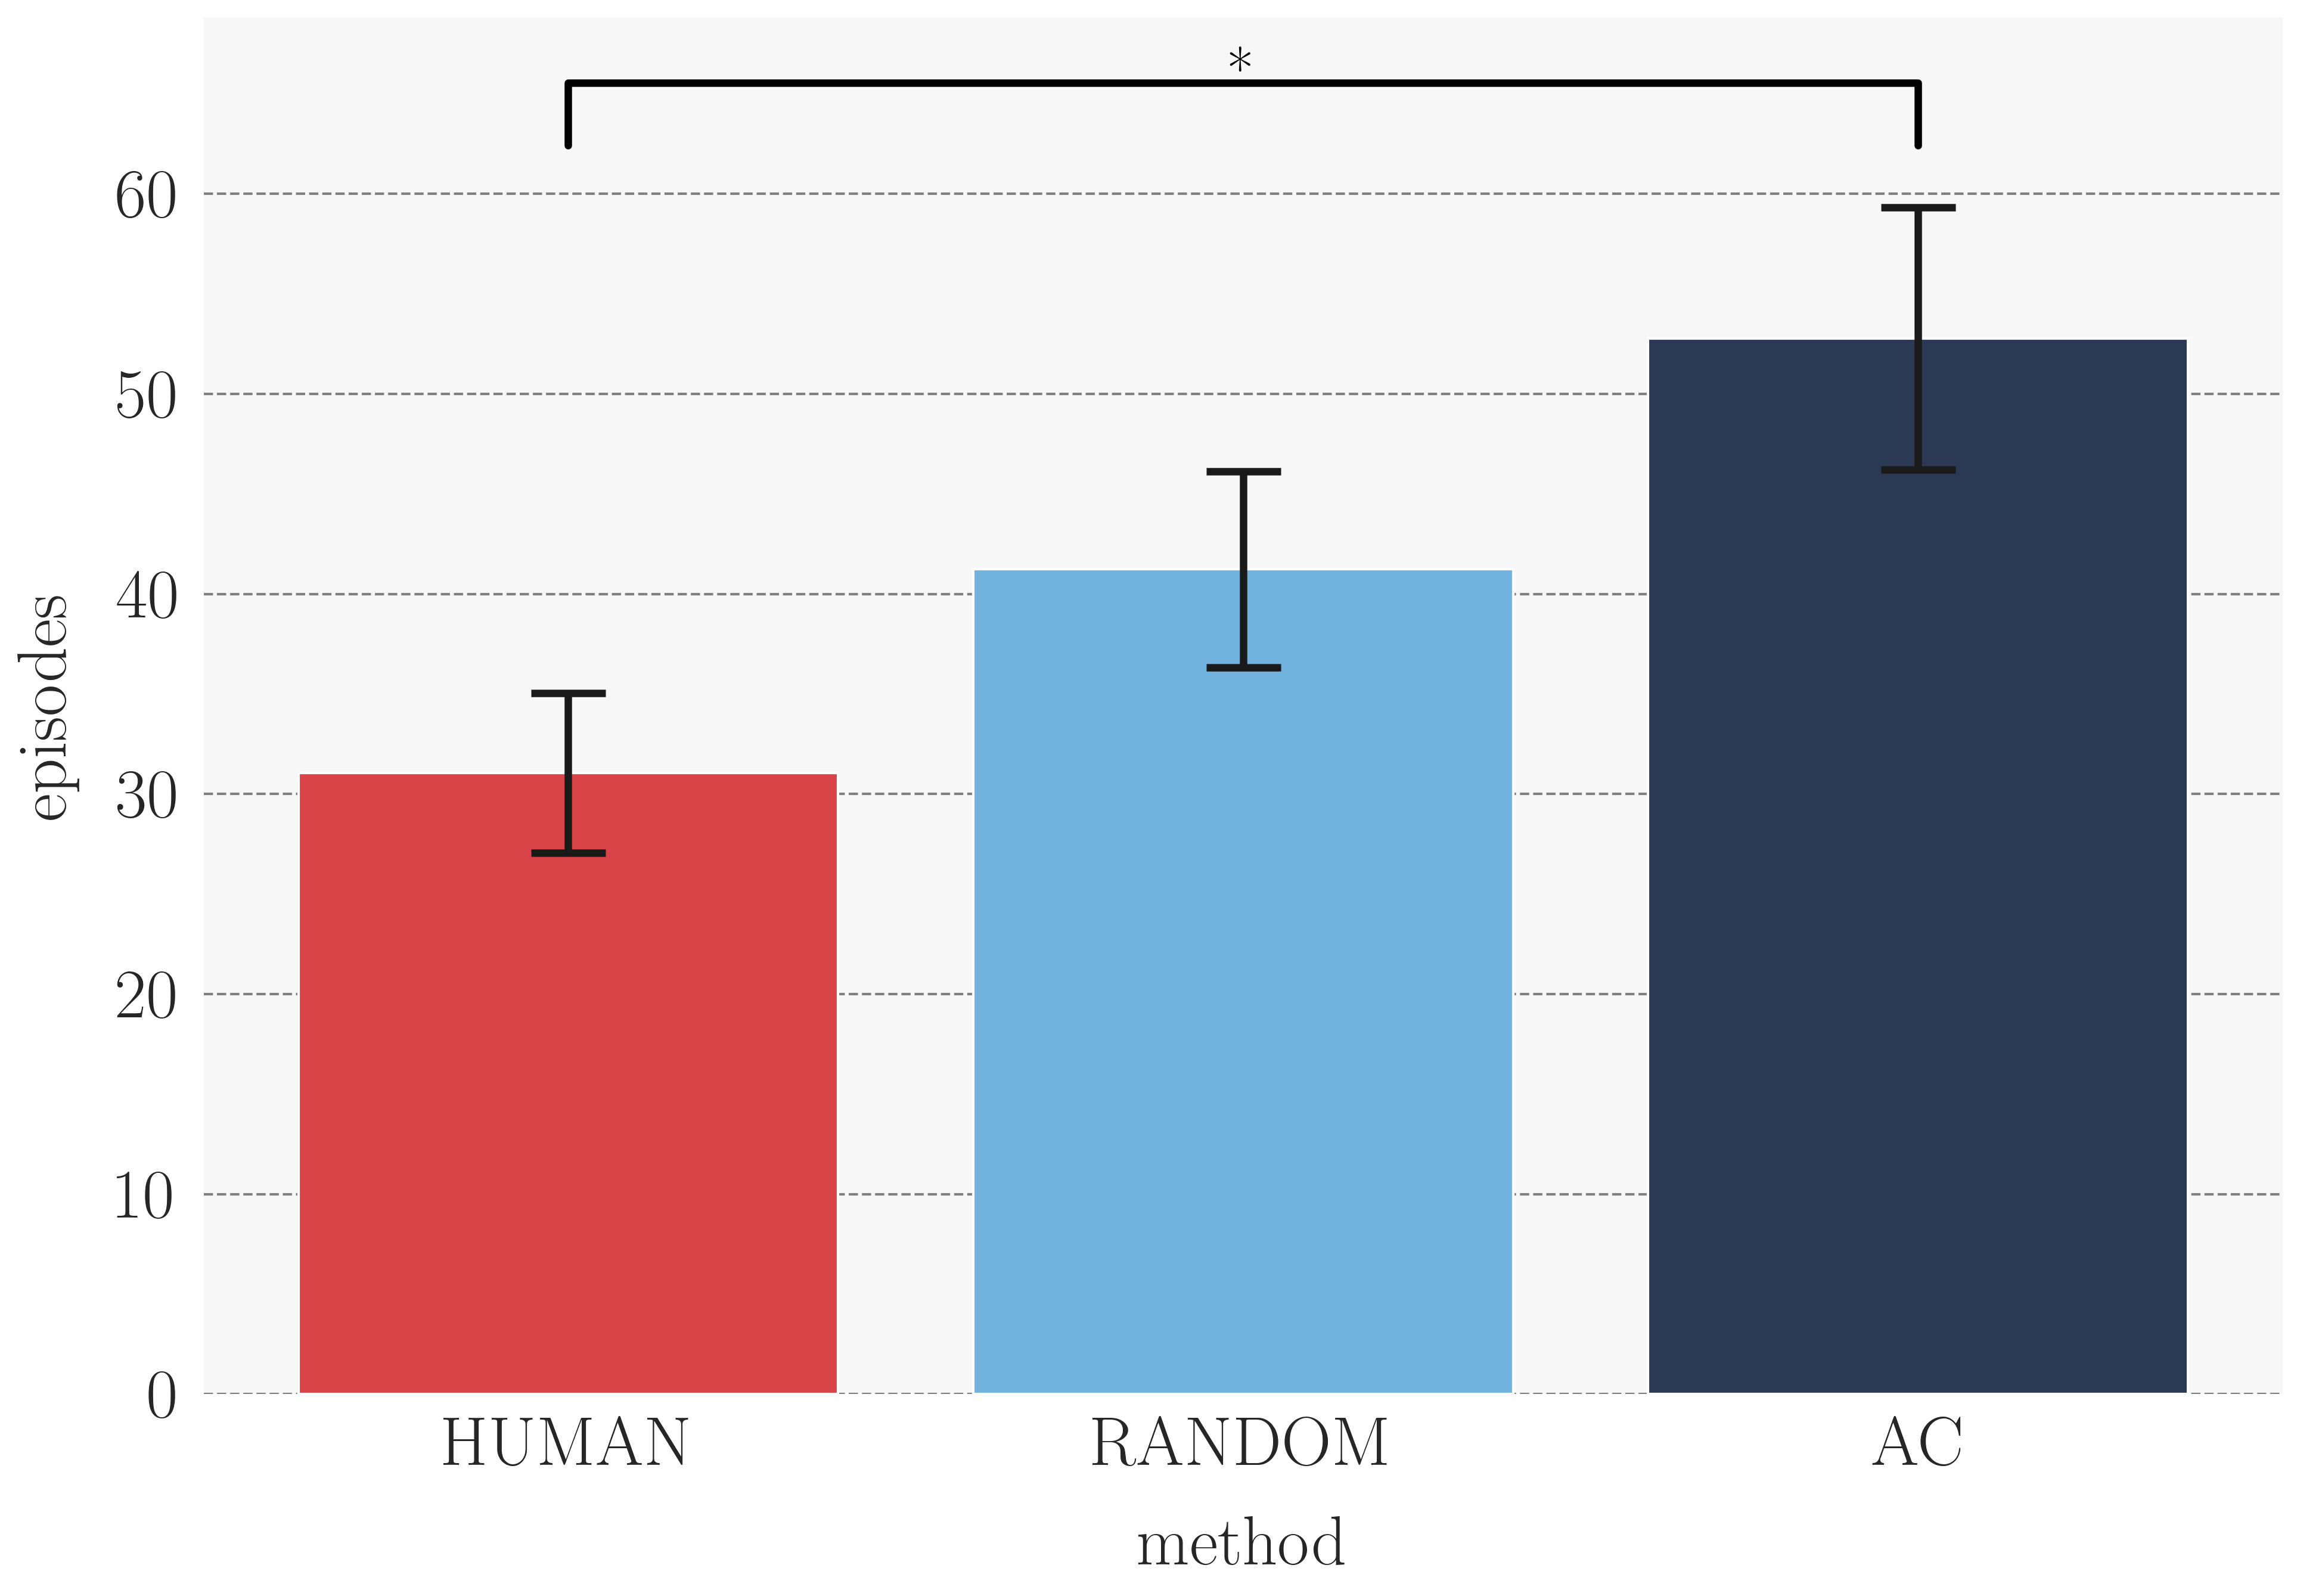

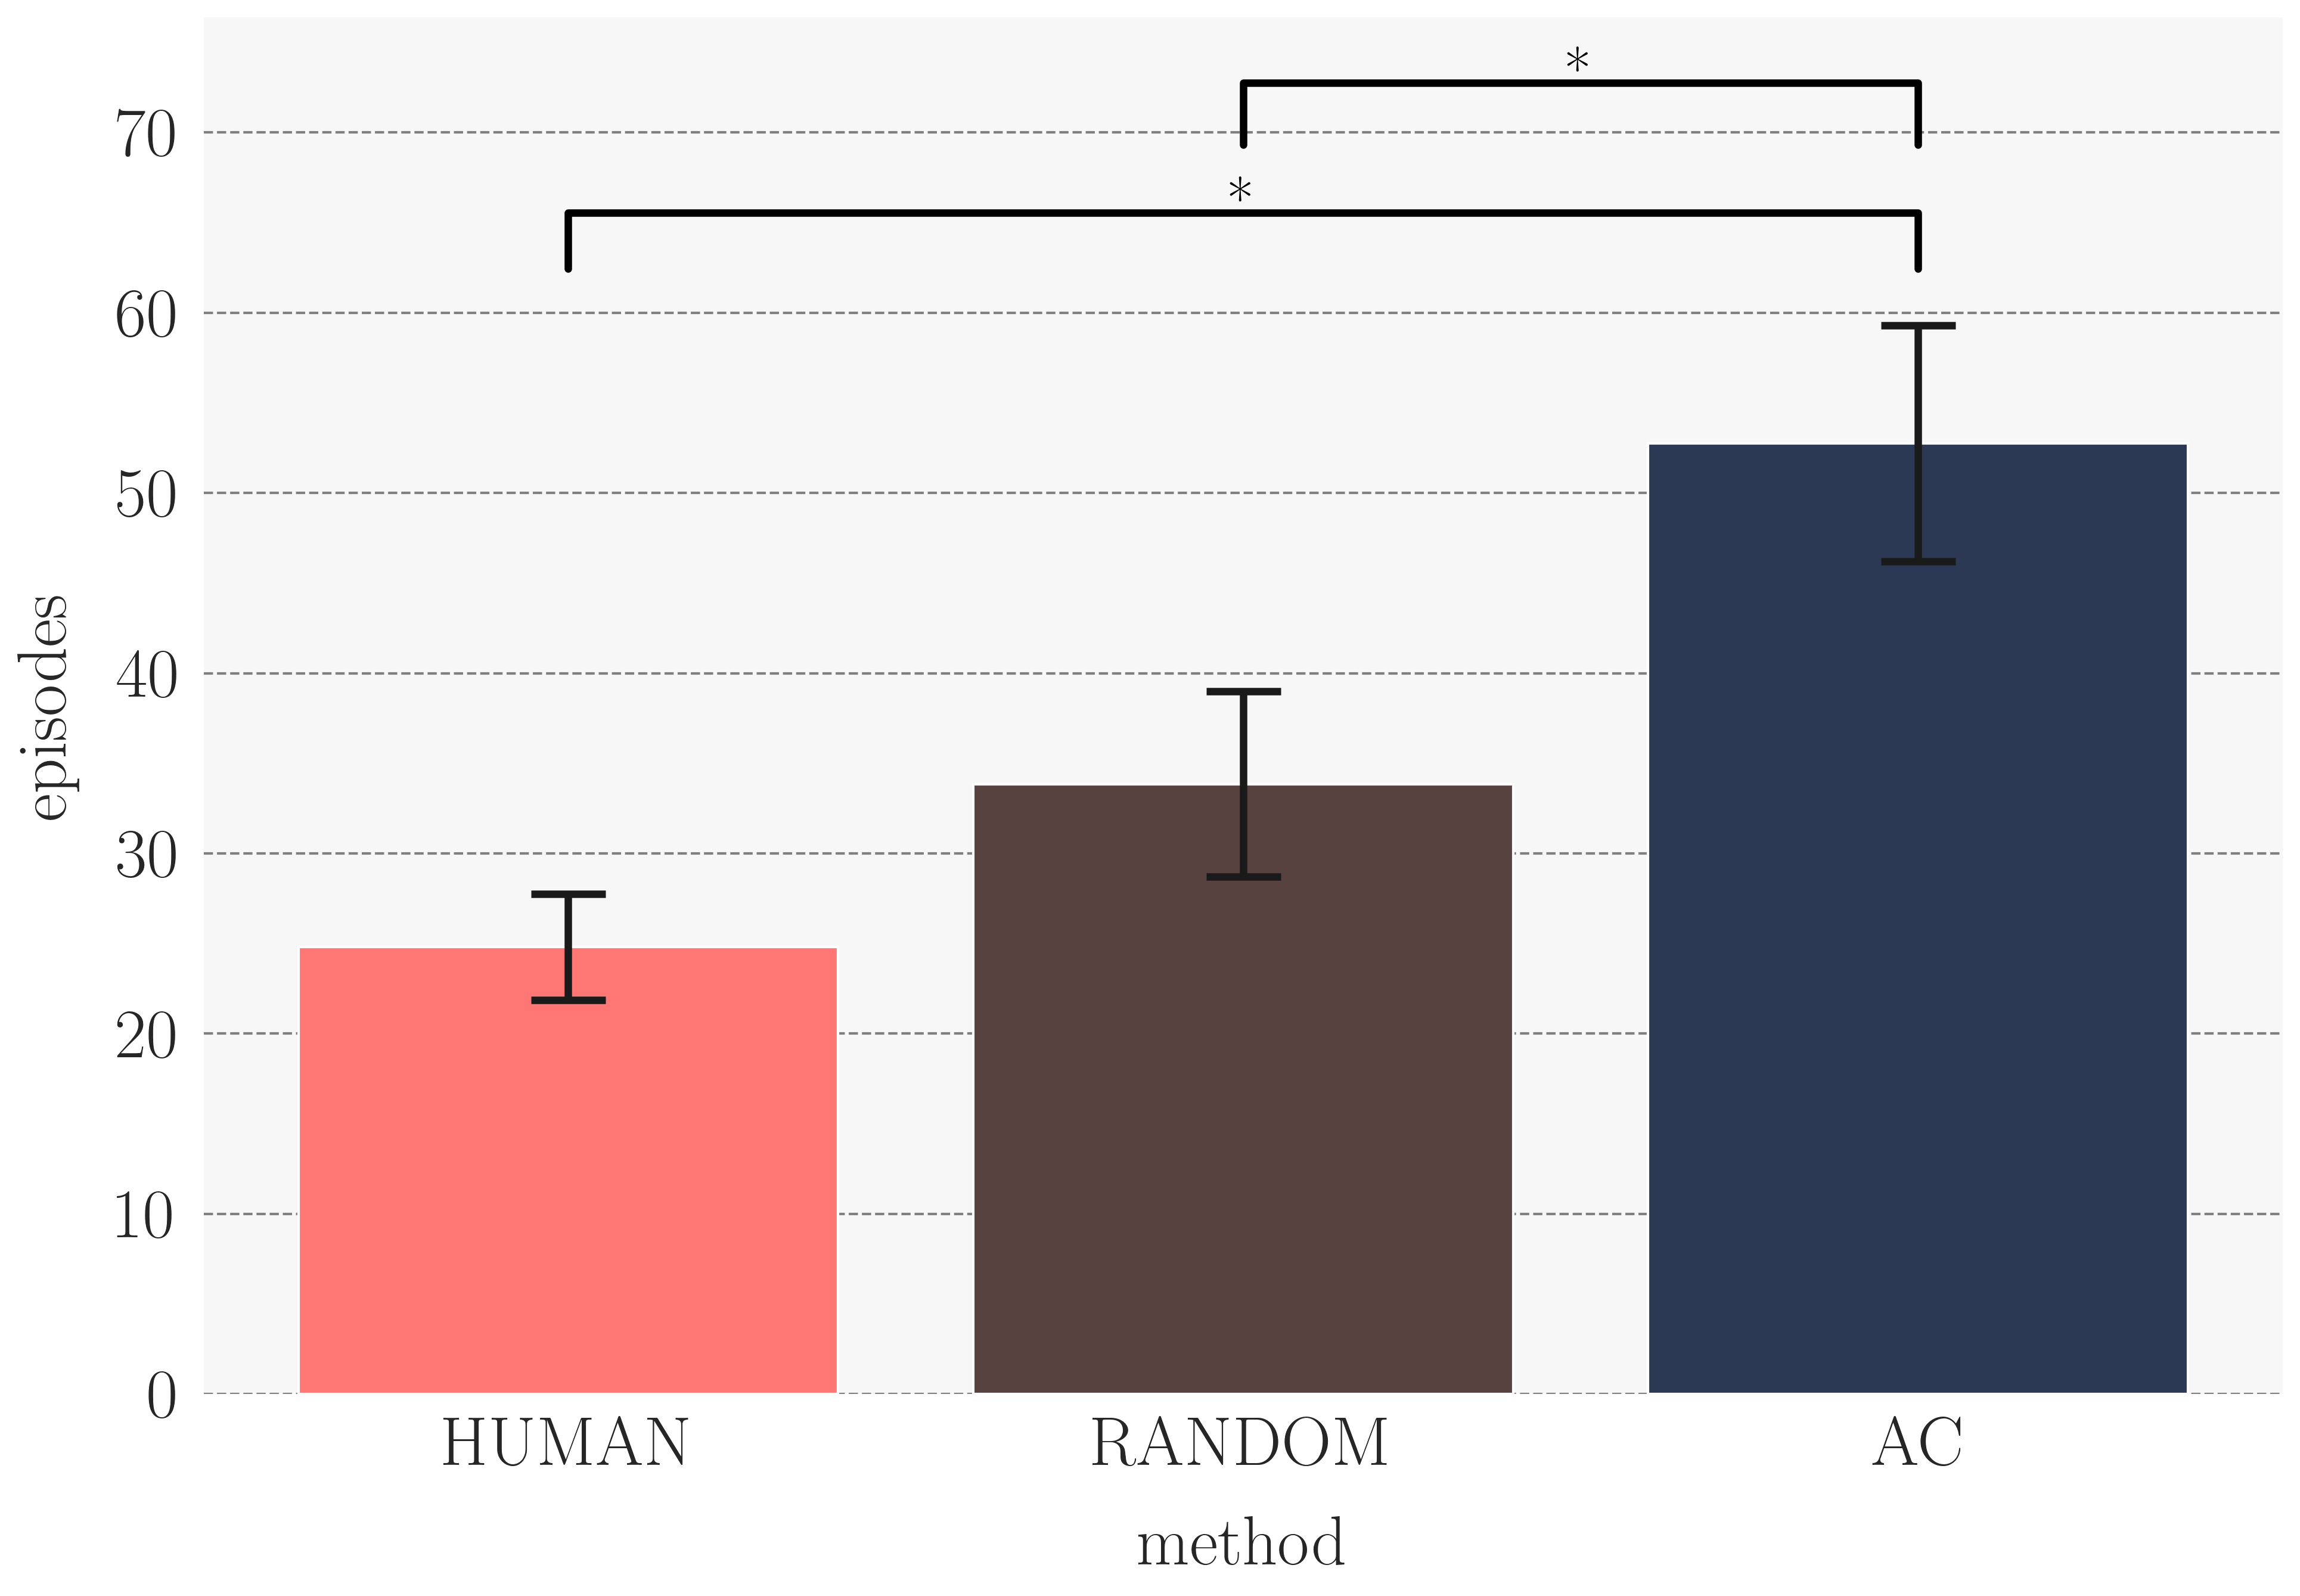

In [30]:
domain = "pinball"
metric = "time_to_threshold_2000"
data_df = pd.read_csv(f"../notebooks/in/{domain}/{metric}.csv", index_col=0)

target_data_df = data_df.loc[pinball_idx, :]
# dynamic
dynamic_df = target_data_df[["DYN-HUMAN", "DYN-RANDOM", "AC"]].rename(
    columns={
        "DYN-HUMAN": "HUMAN", "DYN-RANDOM": "RANDOM"
    }
)
tuples = [(0, 2, "*")]
bar_plot_with_asterisk_qsubg(metric, domain, dynamic_df, tuples, "dynamic", ["#d94448", "#72B2DF", "#2b3955"])
# static
static_df = target_data_df[["STATIC-HUMAN", "STATIC-RANDOM", "AC"]].rename(
    columns={
        "STATIC-HUMAN": "HUMAN", "STATIC-RANDOM": "RANDOM"
    }
)
tuples = [(0, 2, "*"), (1, 2, "*")]
bar_plot_with_asterisk_qsubg(metric, domain, static_df, tuples, "static", ["#ff7774", "#574240", "#2b3955"])

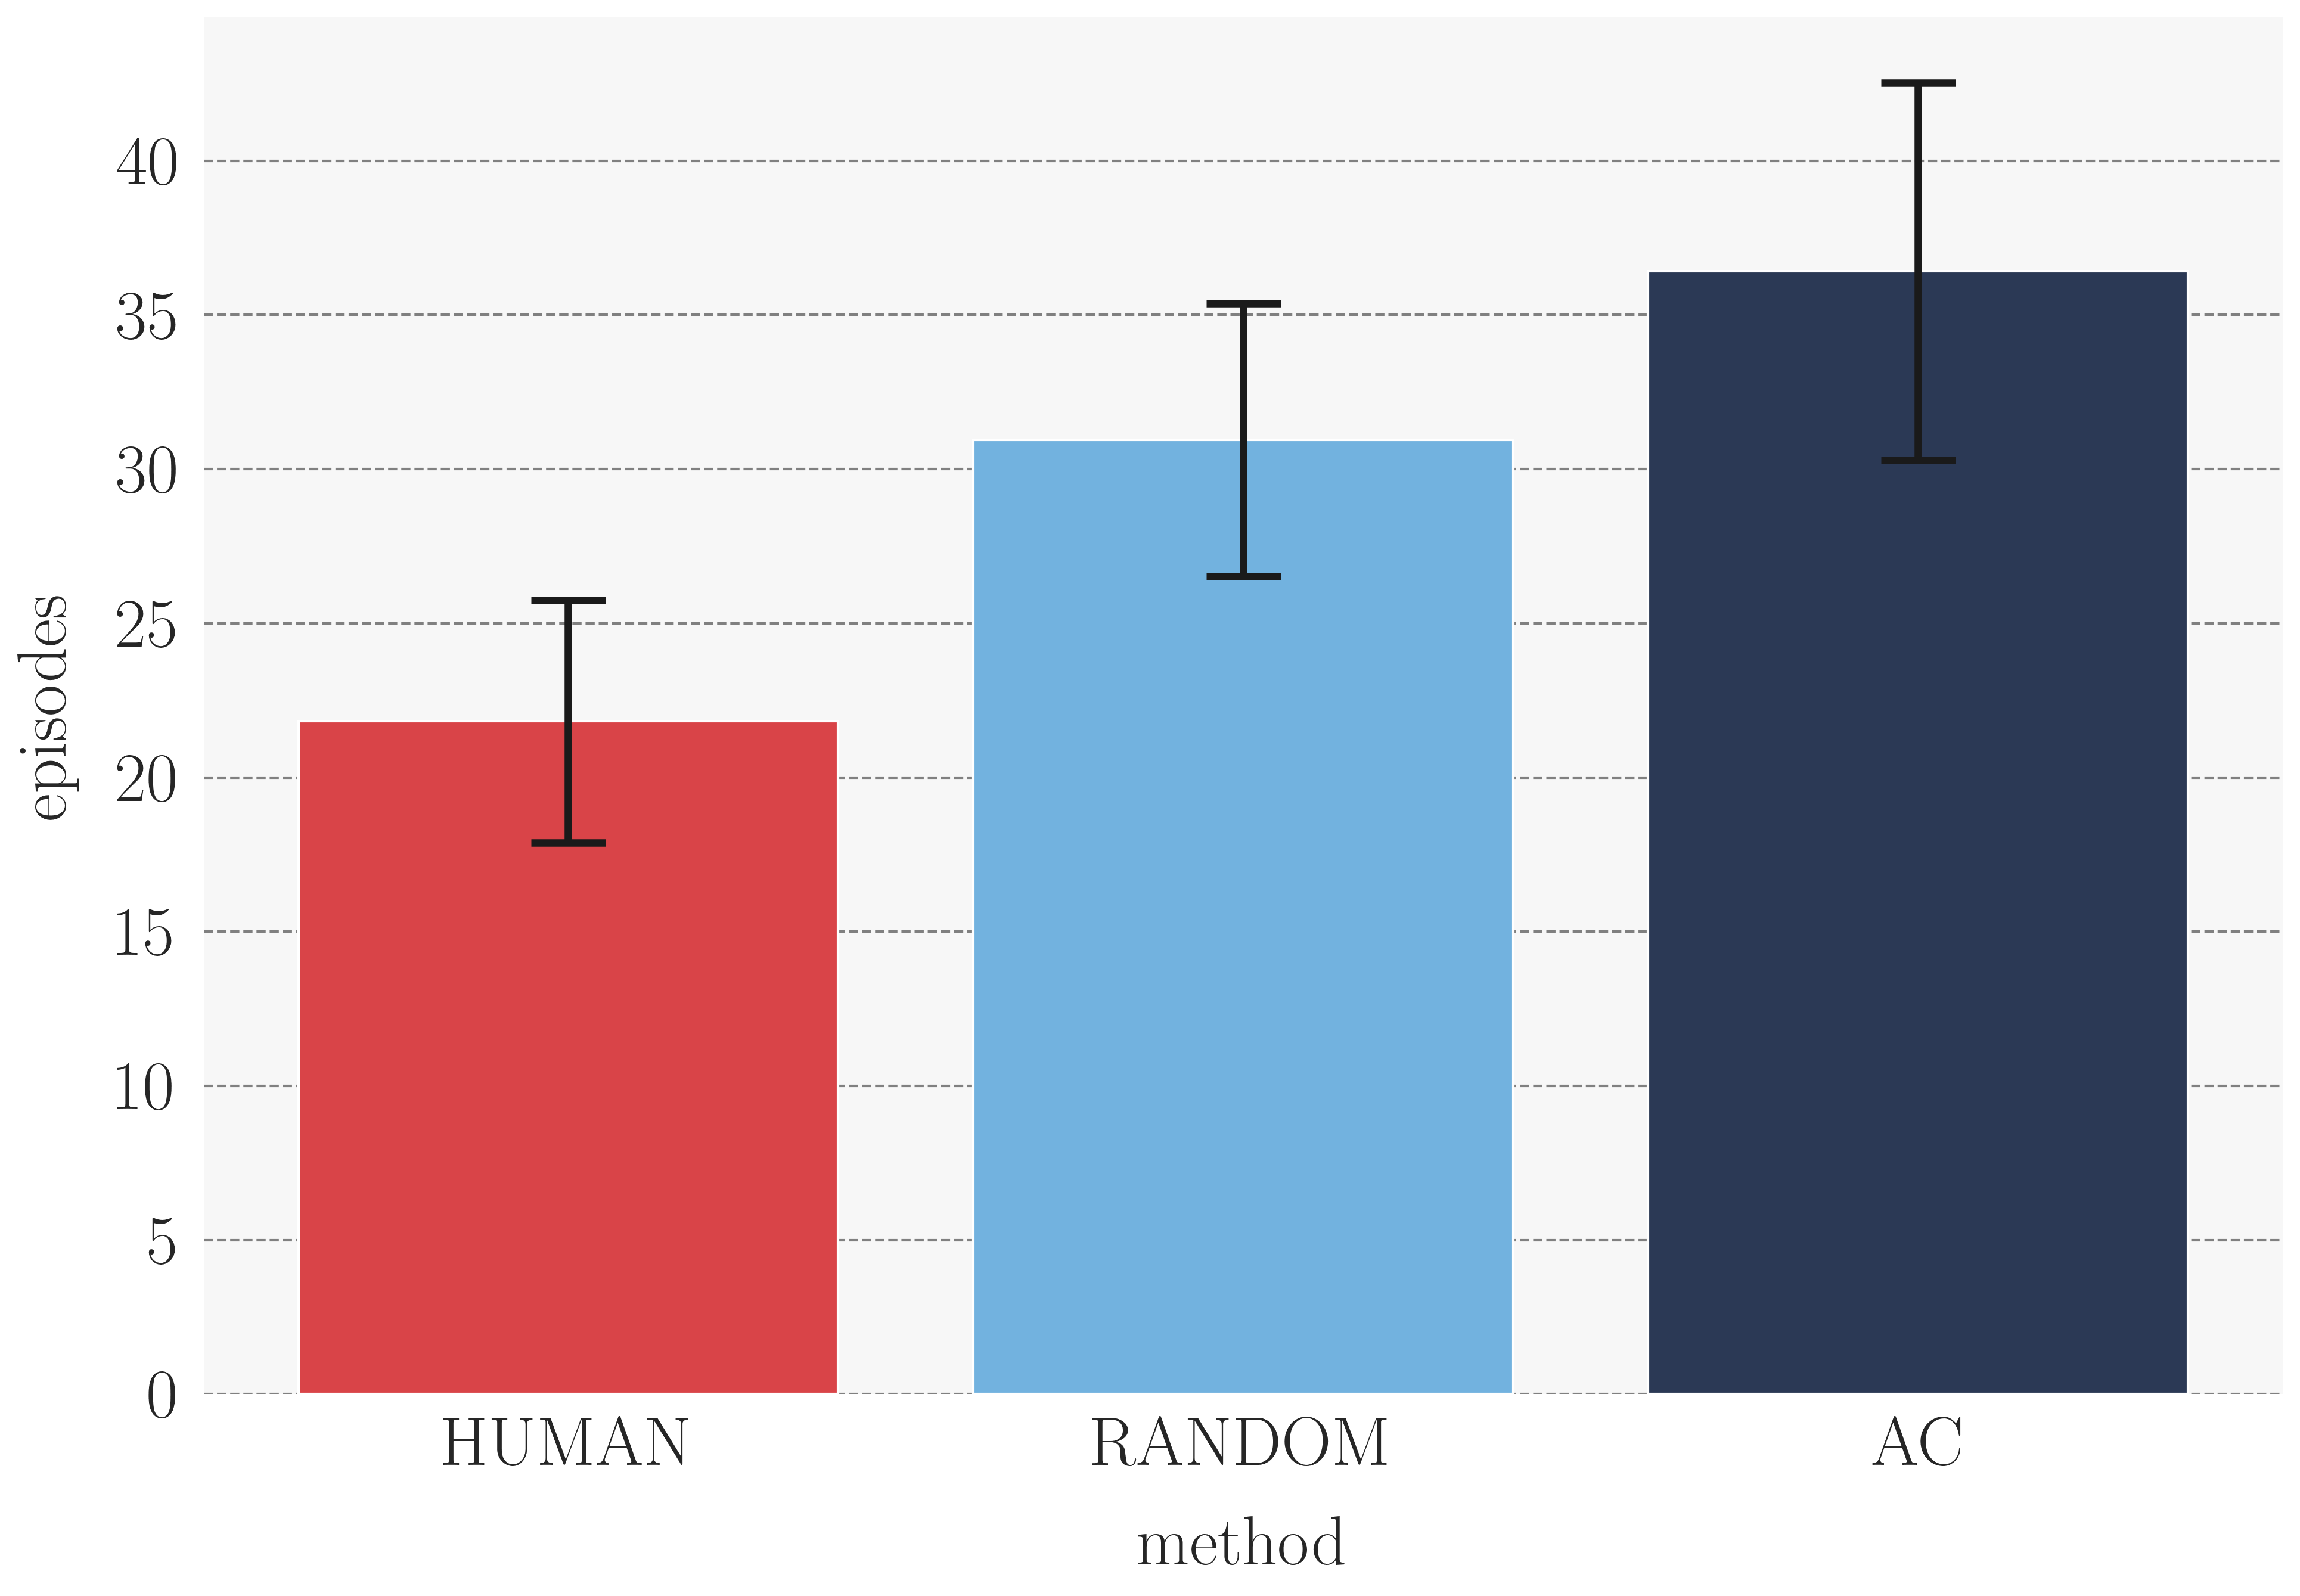

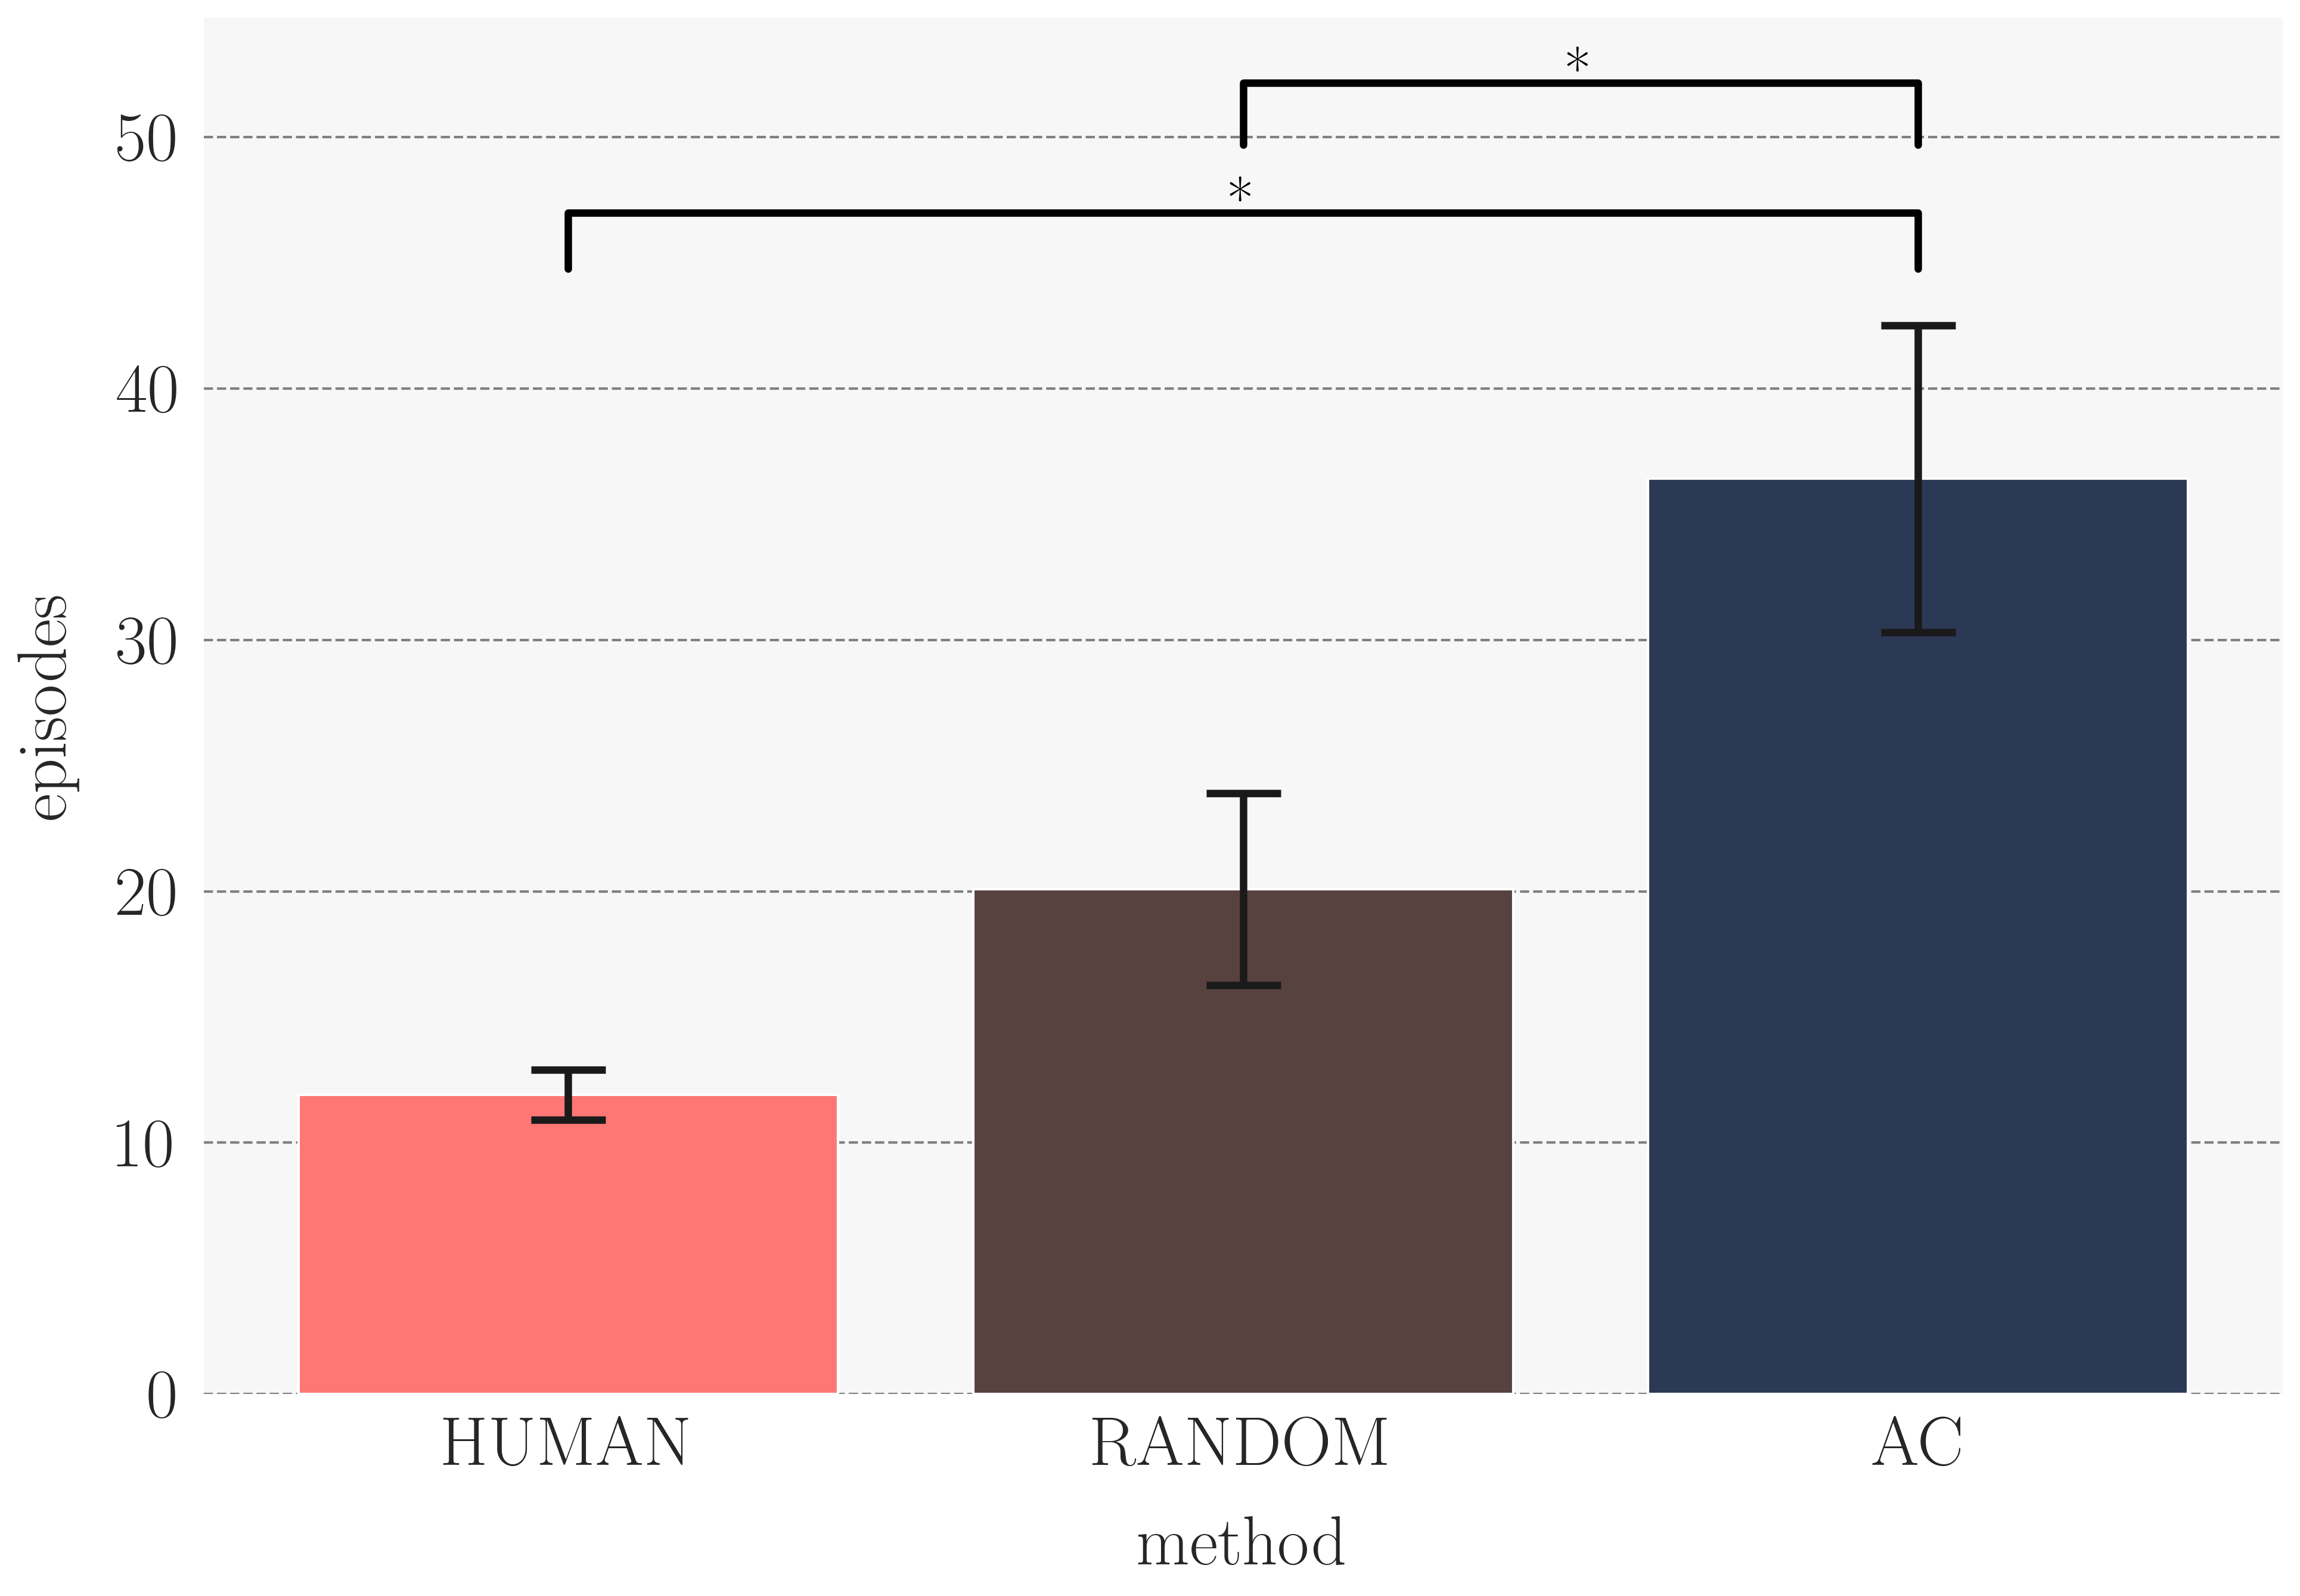

In [31]:
domain = "pinball"
metric = "time_to_threshold_3000"
data_df = pd.read_csv(f"../notebooks/in/{domain}/{metric}.csv", index_col=0)

target_data_df = data_df.loc[pinball_idx, :]
# dynamic
dynamic_df = target_data_df[["DYN-HUMAN", "DYN-RANDOM", "AC"]].rename(
    columns={
        "DYN-HUMAN": "HUMAN", "DYN-RANDOM": "RANDOM"
    }
)
tuples = []
bar_plot_with_asterisk_qsubg(metric, domain, dynamic_df, tuples, "dynamic", ["#d94448", "#72B2DF", "#2b3955"])
# static
static_df = target_data_df[["STATIC-HUMAN", "STATIC-RANDOM", "AC"]].rename(
    columns={
        "STATIC-HUMAN": "HUMAN", "STATIC-RANDOM": "RANDOM"
    }
)
tuples = [(0, 2, "*"), (1, 2, "*")]
bar_plot_with_asterisk_qsubg(metric, domain, static_df, tuples, "static", ["#ff7774", "#574240", "#2b3955"])

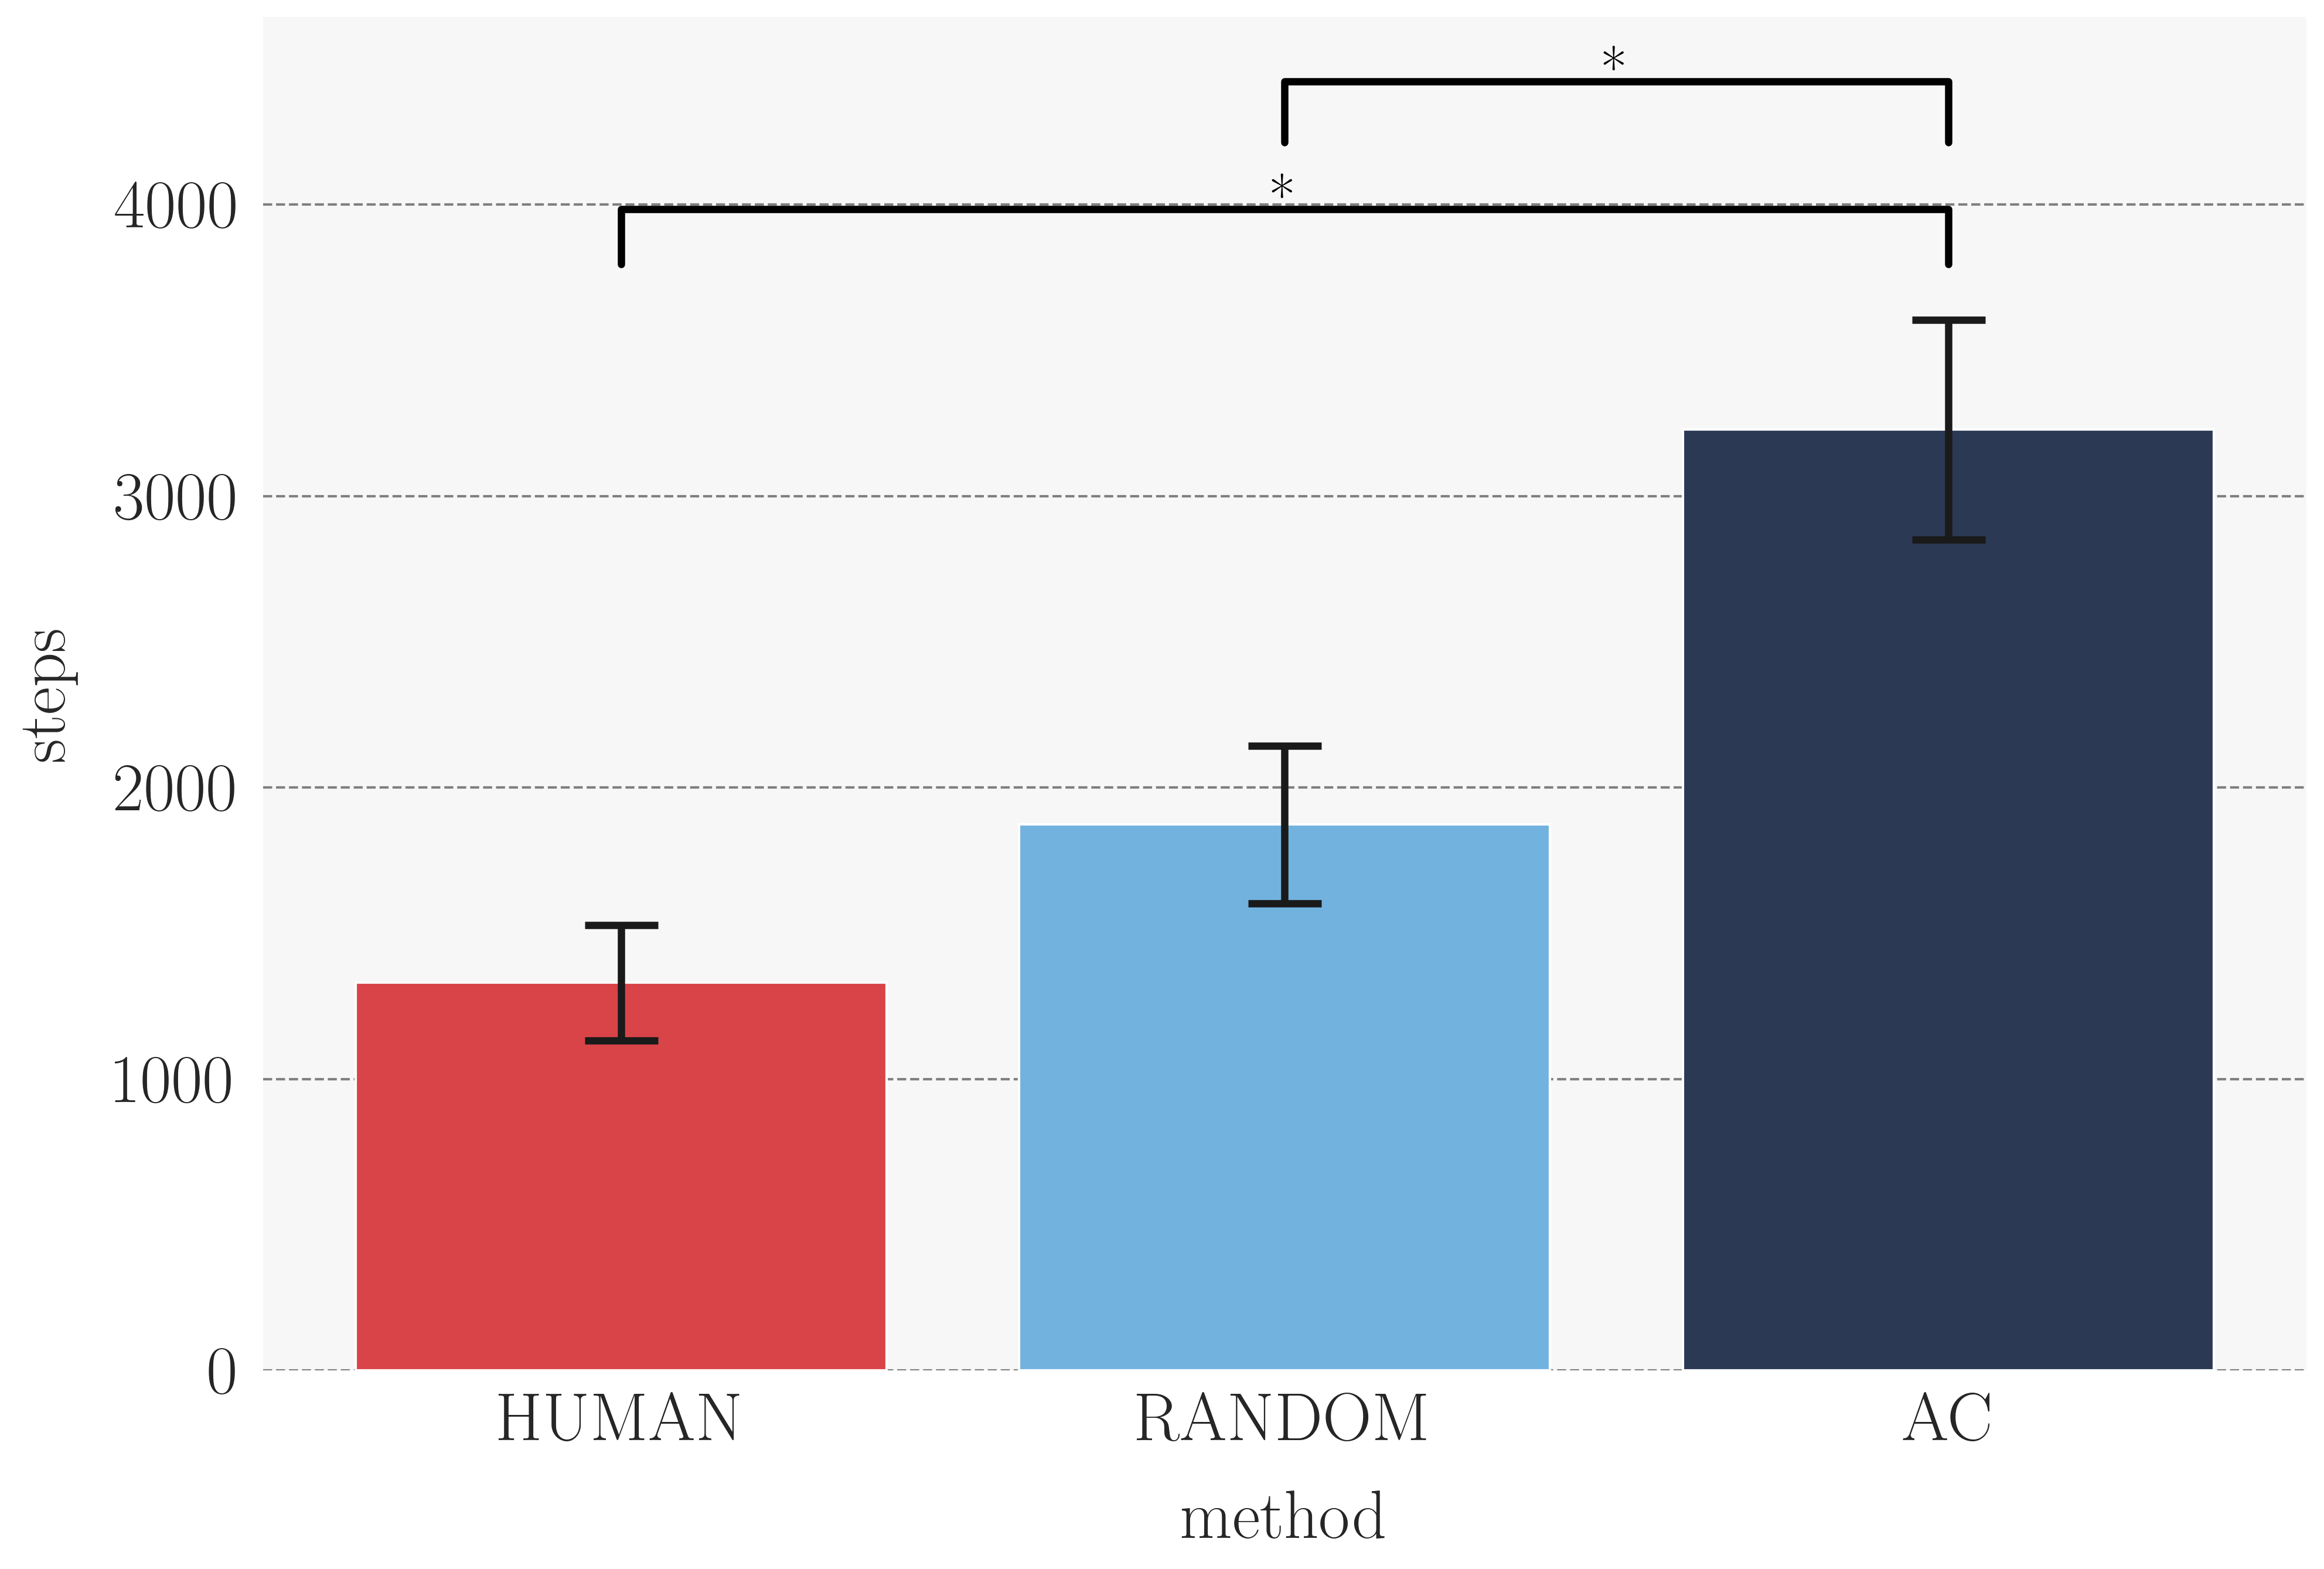

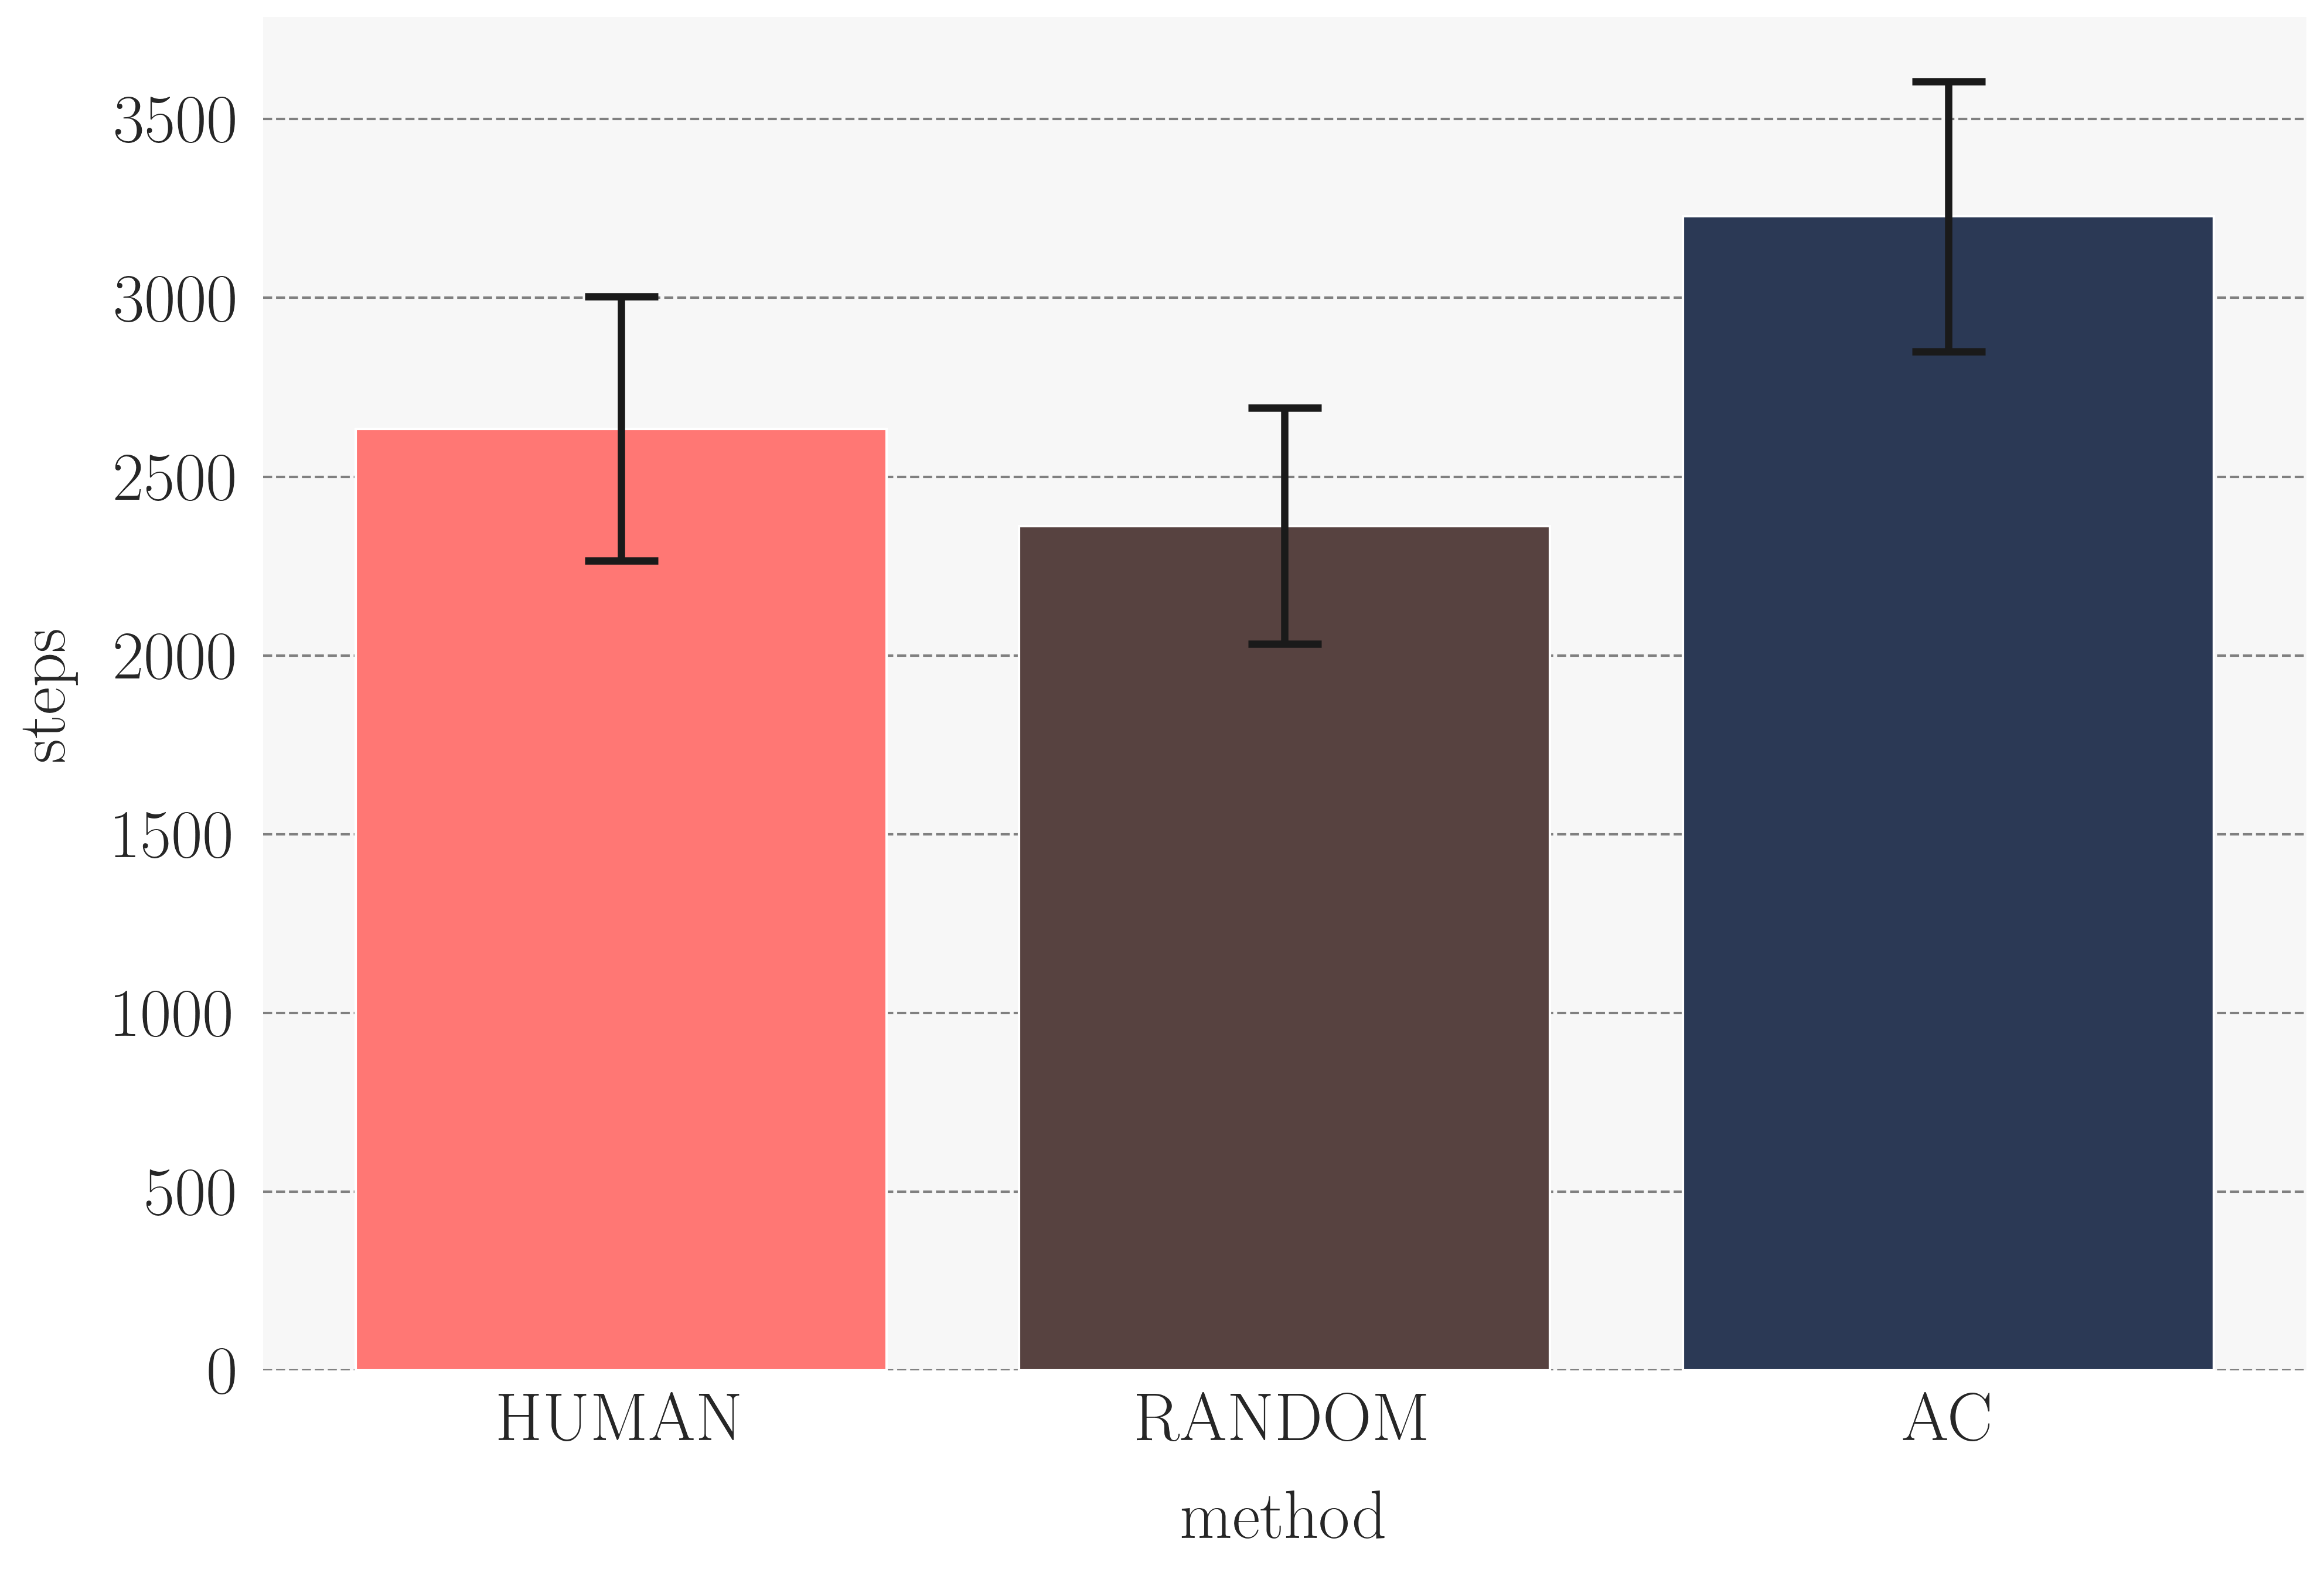

In [32]:
domain = "pinball"
metric = "asymptotic_performance"
data_df = pd.read_csv(f"../notebooks/in/{domain}/{metric}.csv", index_col=0)

target_data_df = data_df.loc[pinball_idx, :]
# dynamic
dynamic_df = target_data_df[["DYN-HUMAN", "DYN-RANDOM", "AC"]].rename(
    columns={
        "DYN-HUMAN": "HUMAN", "DYN-RANDOM": "RANDOM"
    }
)
tuples = [(0, 2, "*"), (1, 2, "*")]
bar_plot_with_asterisk_qsubg(metric, domain, dynamic_df, tuples, "dynamic", ["#d94448", "#72B2DF", "#2b3955"], "steps")
# static
static_df = target_data_df[["STATIC-HUMAN", "STATIC-RANDOM", "AC"]].rename(
    columns={
        "STATIC-HUMAN": "HUMAN", "STATIC-RANDOM": "RANDOM"
    }
)
tuples = []
bar_plot_with_asterisk_qsubg(metric, domain, static_df, tuples, "static", ["#ff7774", "#574240", "#2b3955"], "steps")

## PicknPlace

### Performance Comaprison

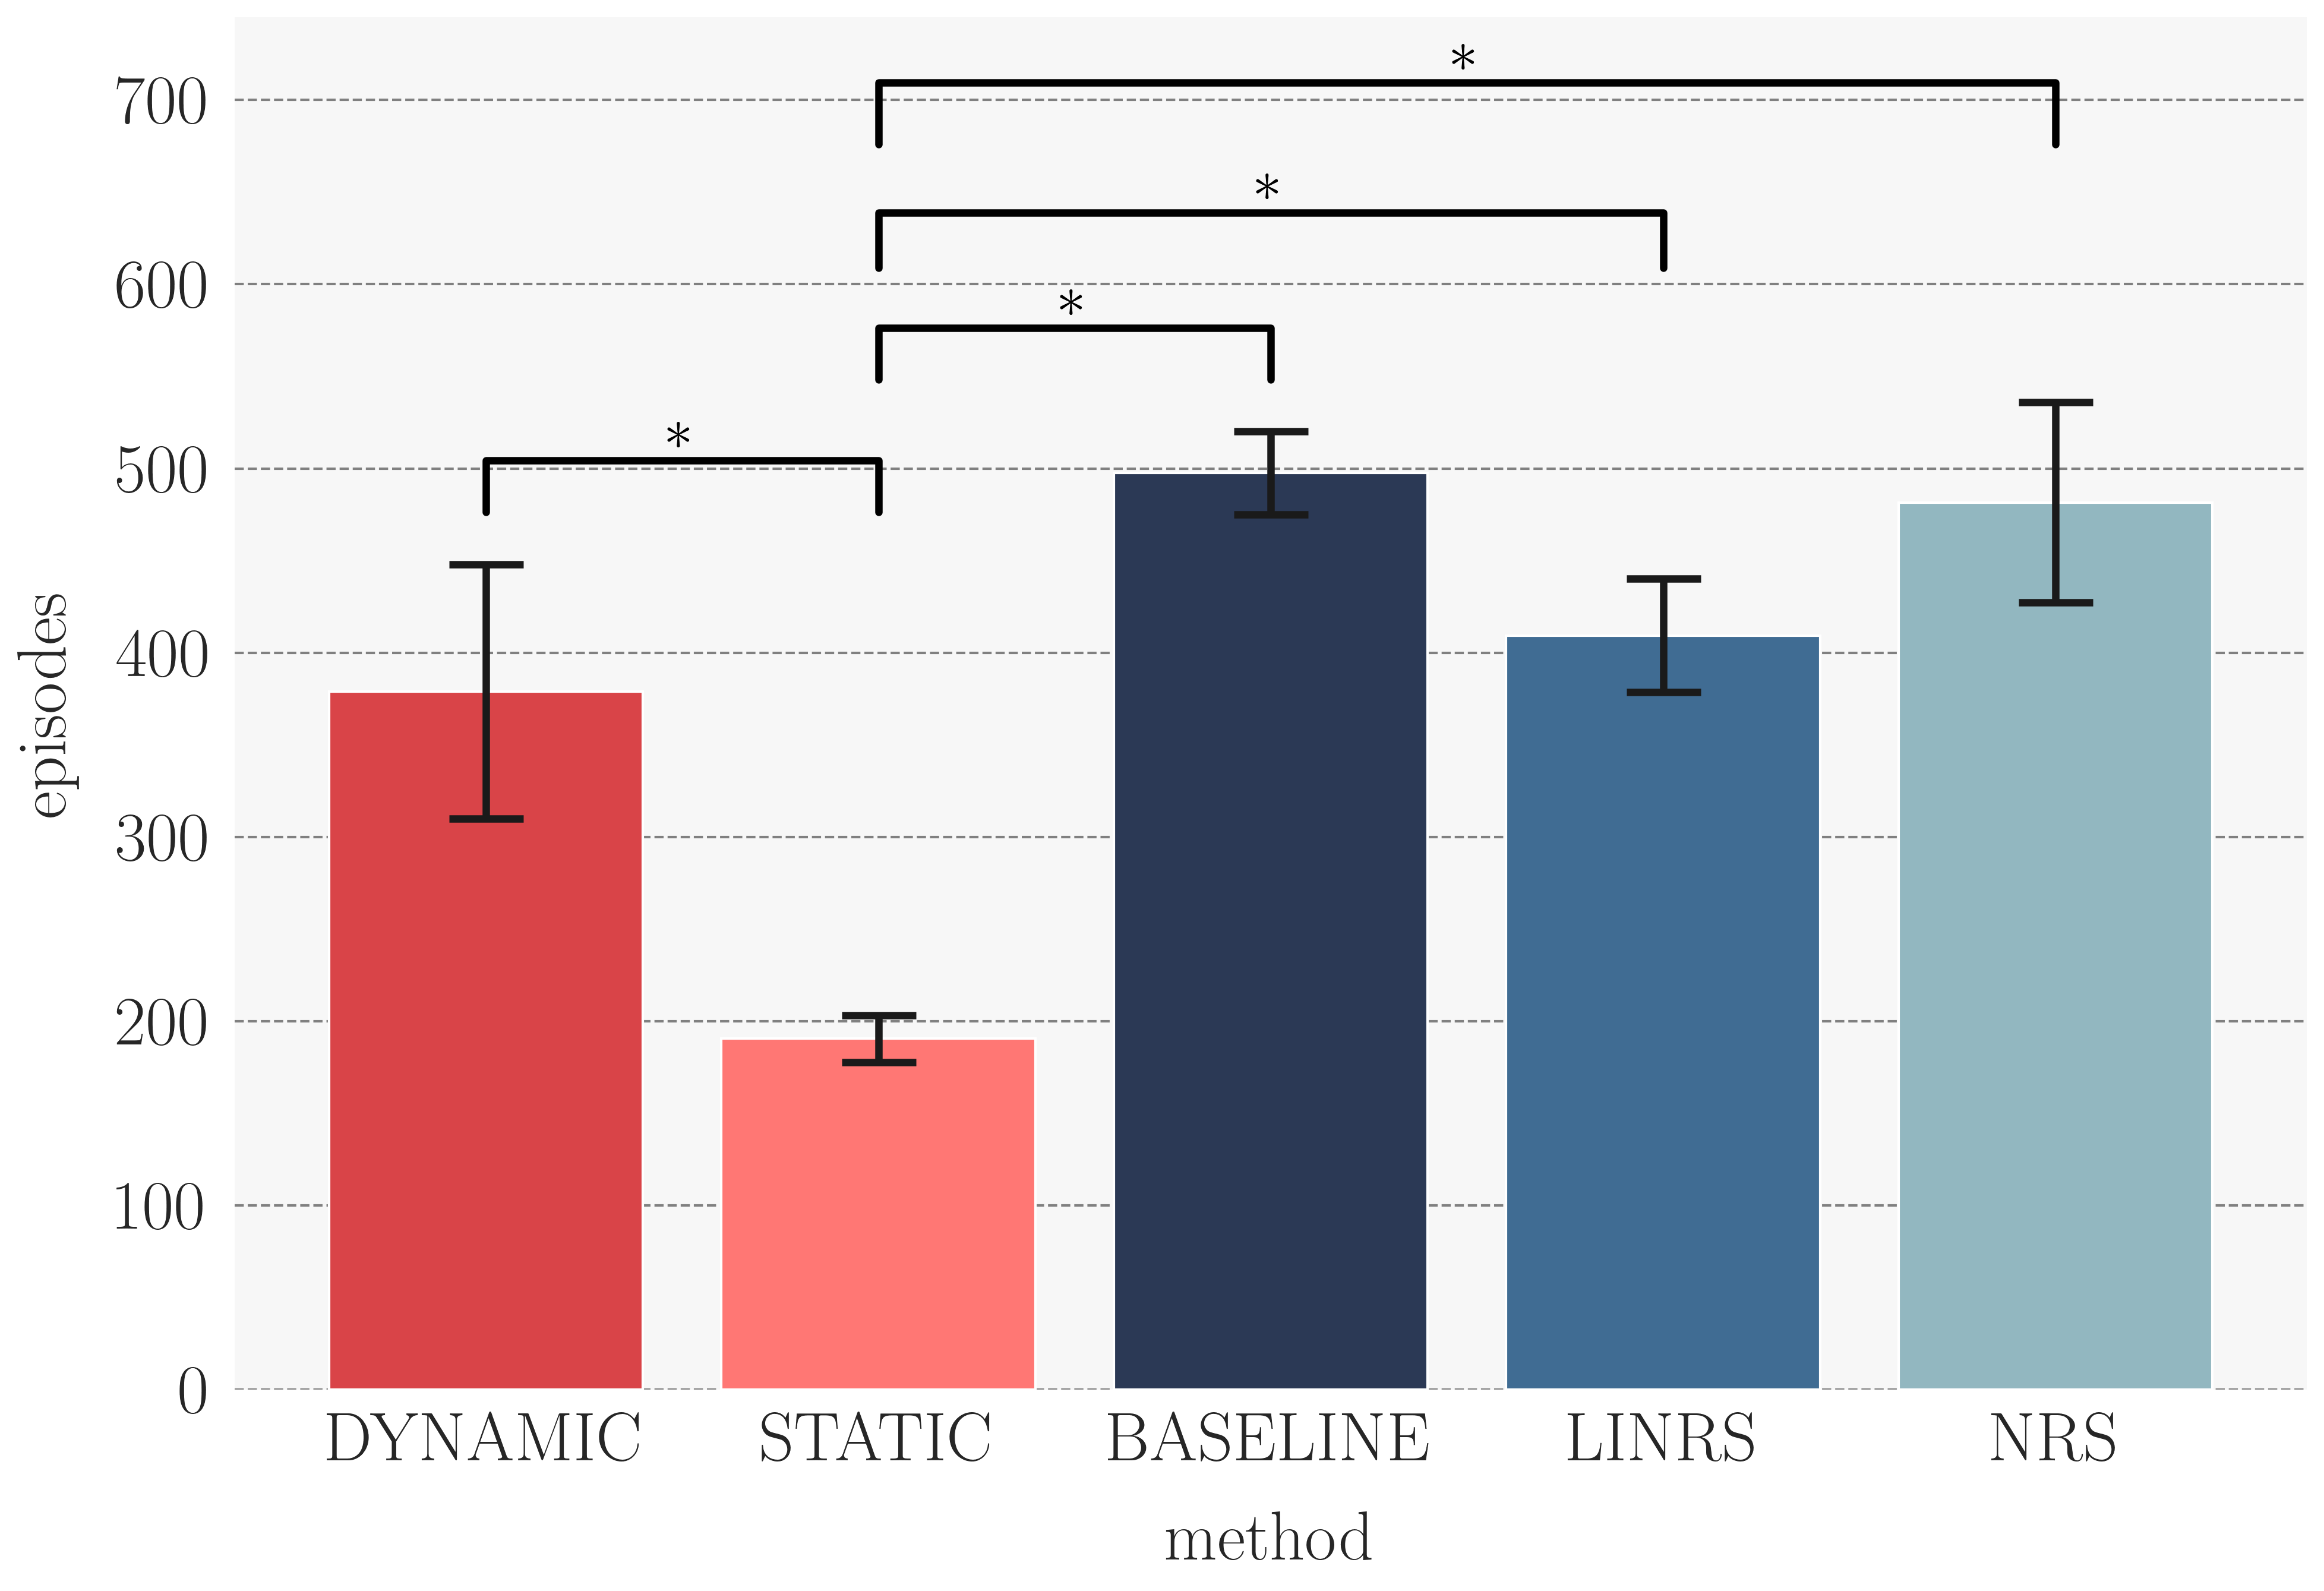

In [33]:
domain = "picknplace"
metric = "time_to_threshold_2"
data_df = pd.read_csv(f"../notebooks/in/{domain}/{metric}.csv", index_col=0)

target_data_df = data_df.loc[:99, ["DYN-HUMAN-", "STATIC-HUMAN-", "BASELINE-", "LINRS-", "NRS-"]].rename(
    columns={
        "DYN-HUMAN-": "DYNAMIC", "STATIC-HUMAN-": "STATIC",
        "BASELINE-": "BASELINE", "LINRS-": "LINRS", "NRS-": "NRS"
    }
)
tuples = [(0, 1, "$*$"), (1, 2, "$*$"), (1, 3, "$*$"), (1, 4, "$*$")]
bar_plot_with_asterisk(metric, domain, target_data_df, tuples)

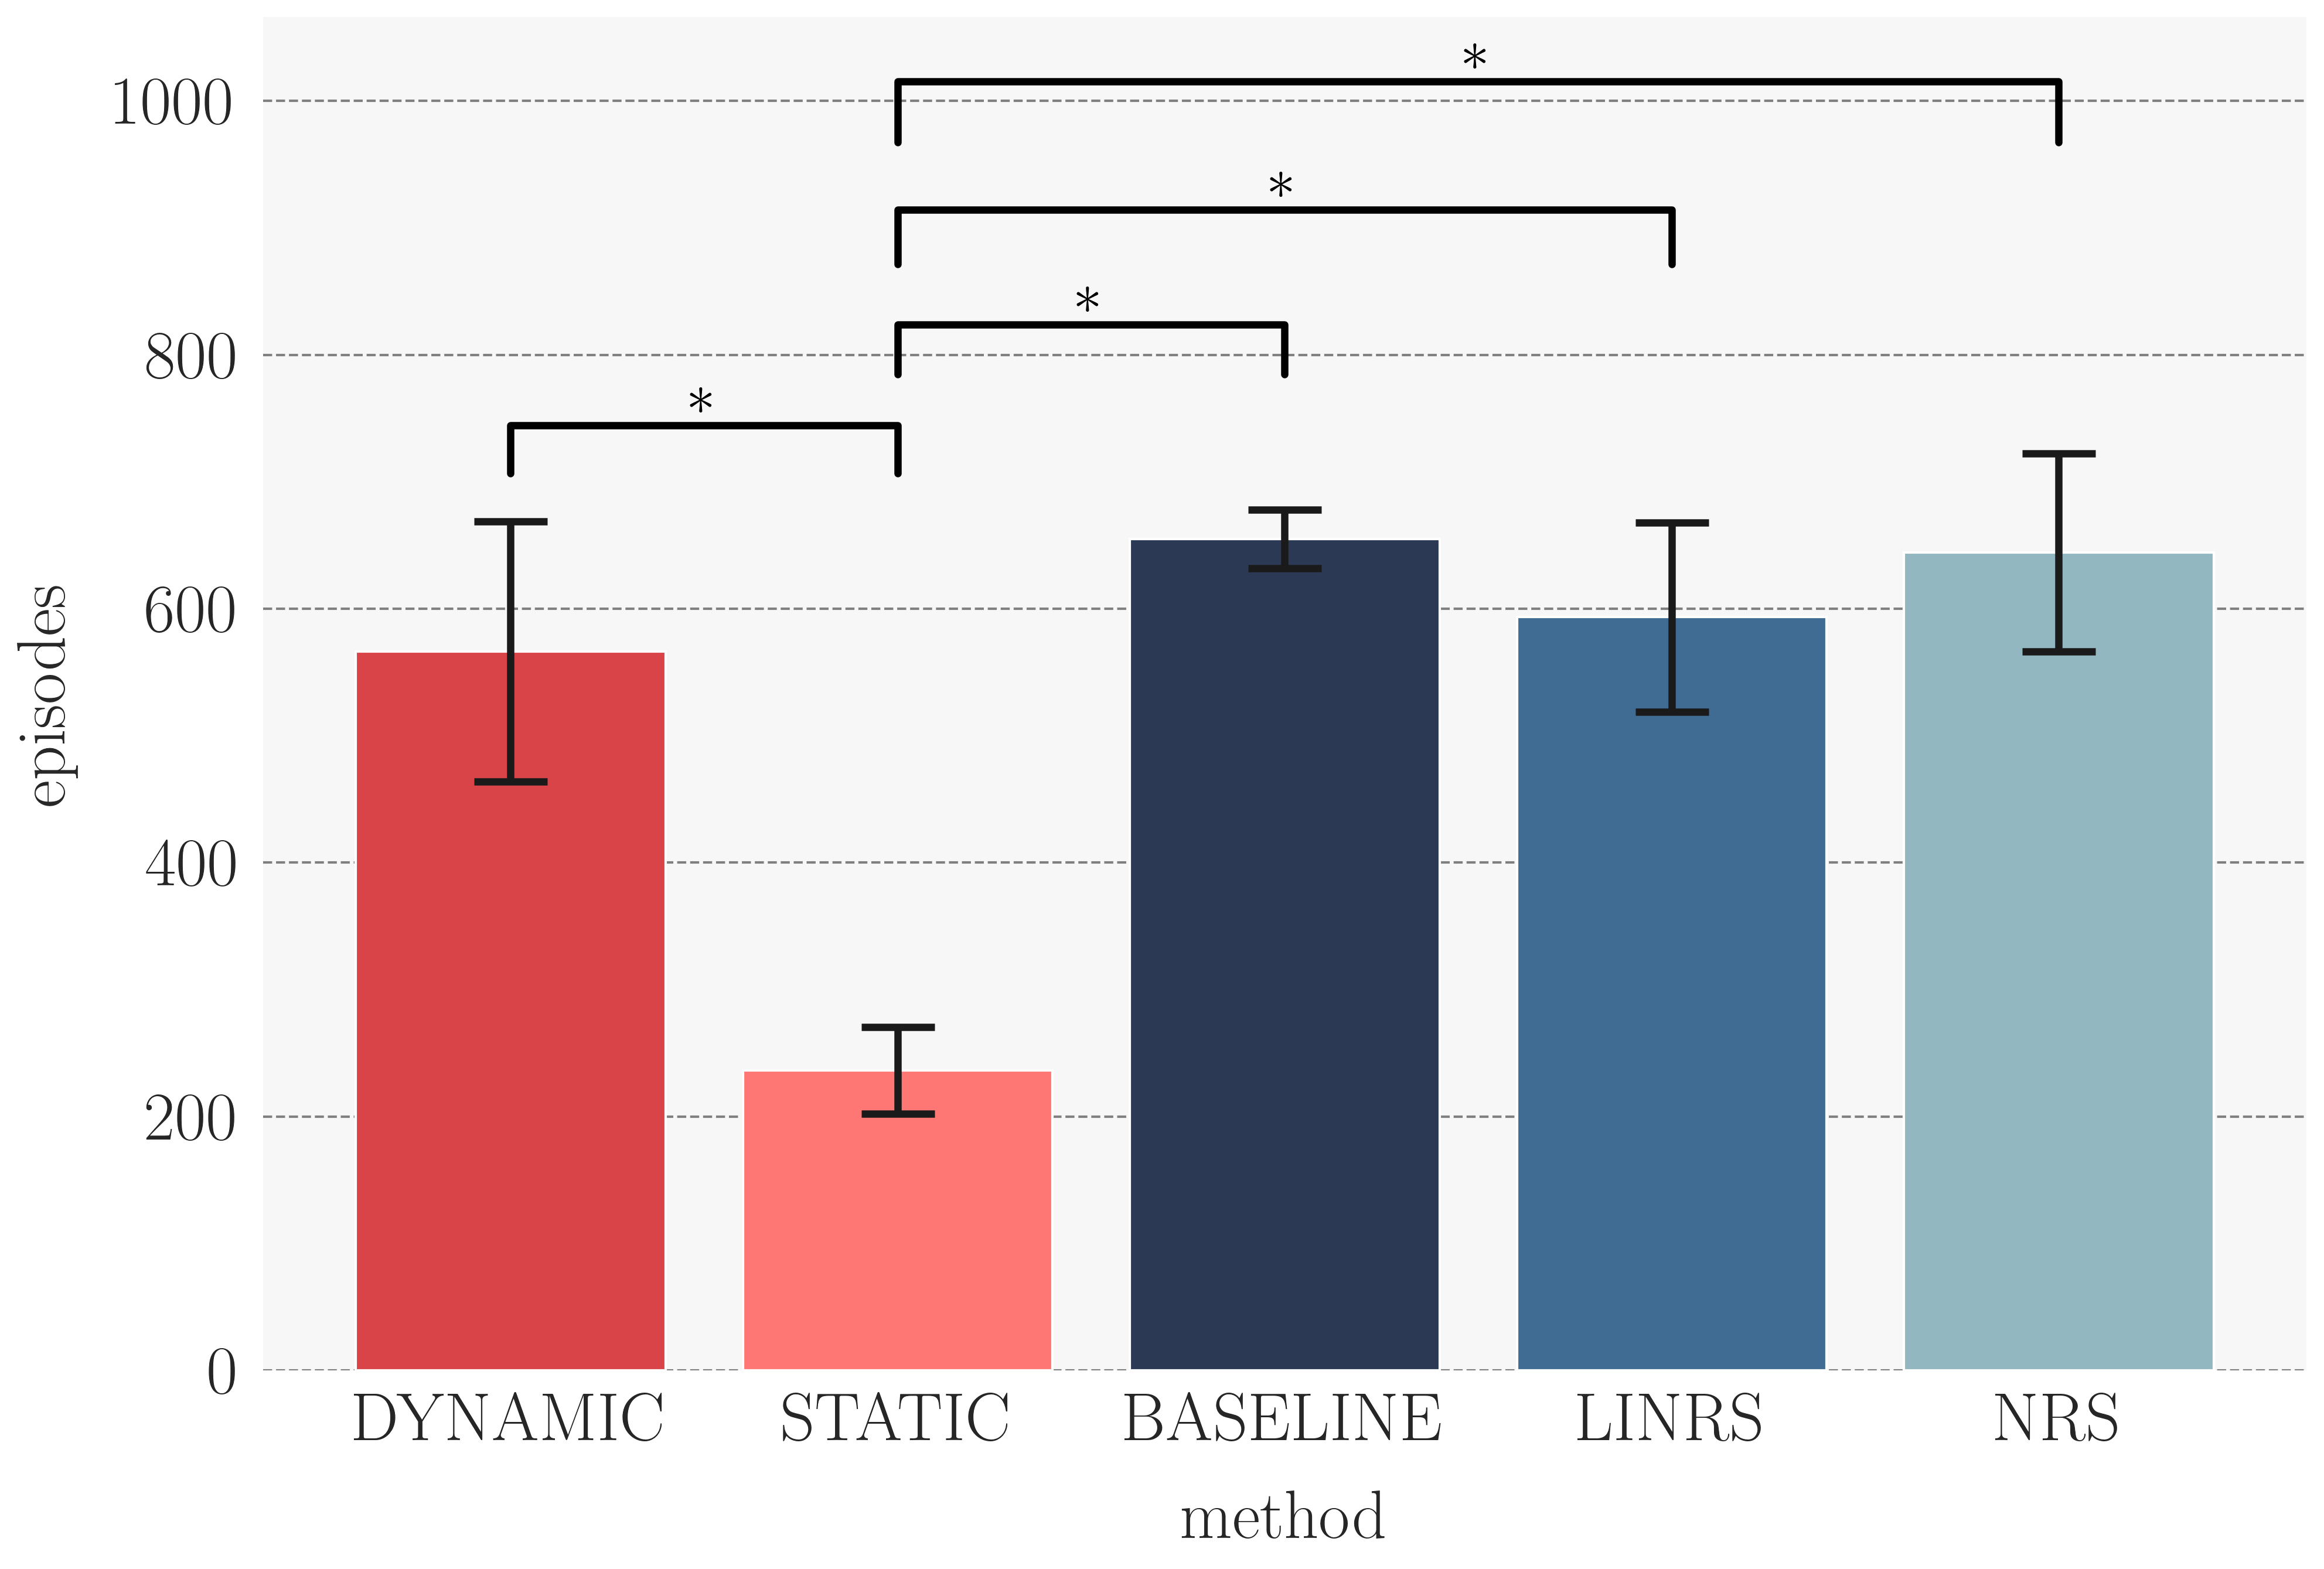

In [34]:
domain = "picknplace"
metric = "time_to_threshold_4"
data_df = pd.read_csv(f"../notebooks/in/{domain}/{metric}.csv", index_col=0)

target_data_df = data_df.loc[:99, ["DYN-HUMAN-", "STATIC-HUMAN-", "BASELINE-", "LINRS-", "NRS-"]].rename(
    columns={
        "DYN-HUMAN-": "DYNAMIC", "STATIC-HUMAN-": "STATIC",
        "BASELINE-": "BASELINE", "LINRS-": "LINRS", "NRS-": "NRS"
    }
)
tuples = [(0, 1, "$*$"), (1, 2, "$*$"), (1, 3, "$*$"), (1, 4, "$*$")]
bar_plot_with_asterisk(metric, domain, target_data_df, tuples)

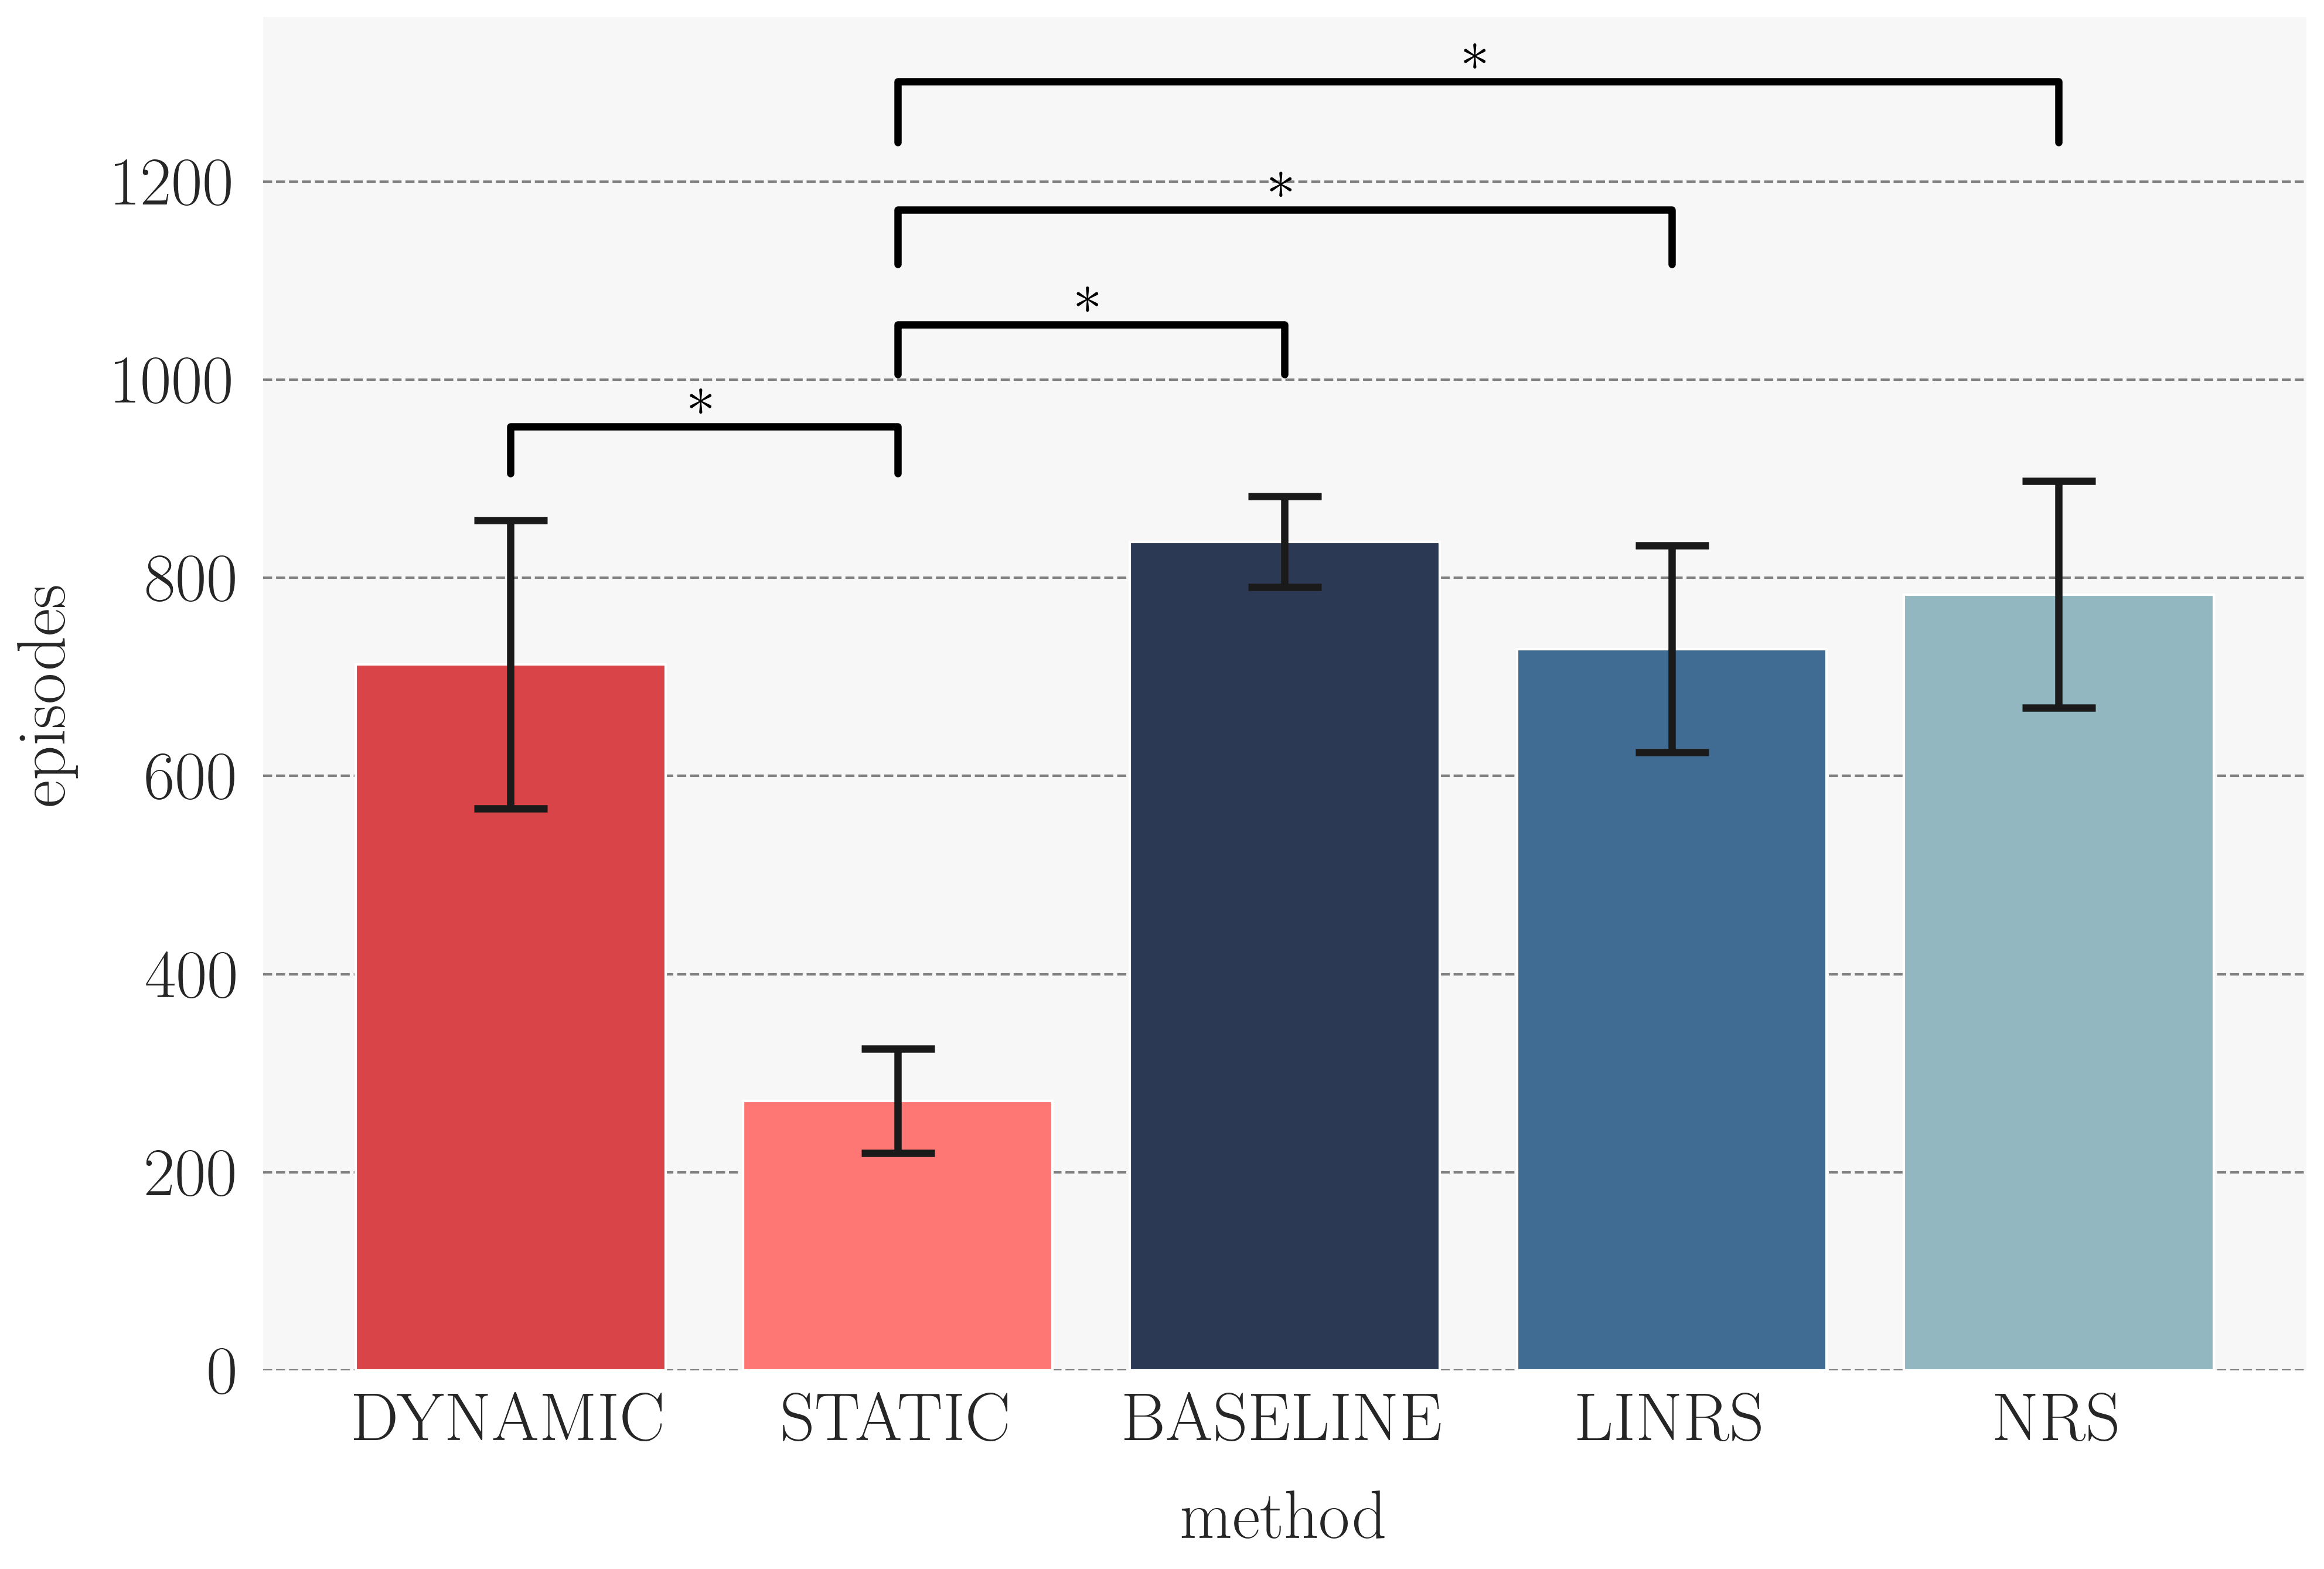

In [35]:
domain = "picknplace"
metric = "time_to_threshold_6"
data_df = pd.read_csv(f"../notebooks/in/{domain}/{metric}.csv", index_col=0)

target_data_df = data_df.loc[:99, ["DYN-HUMAN-", "STATIC-HUMAN-", "BASELINE-", "LINRS-", "NRS-"]].rename(
    columns={
        "DYN-HUMAN-": "DYNAMIC", "STATIC-HUMAN-": "STATIC",
        "BASELINE-": "BASELINE", "LINRS-": "LINRS", "NRS-": "NRS"
    }
)
tuples = [(0, 1, "$*$"), (1, 2, "$*$"), (1, 3, "$*$"), (1, 4, "$*$")]
bar_plot_with_asterisk(metric, domain, target_data_df, tuples)

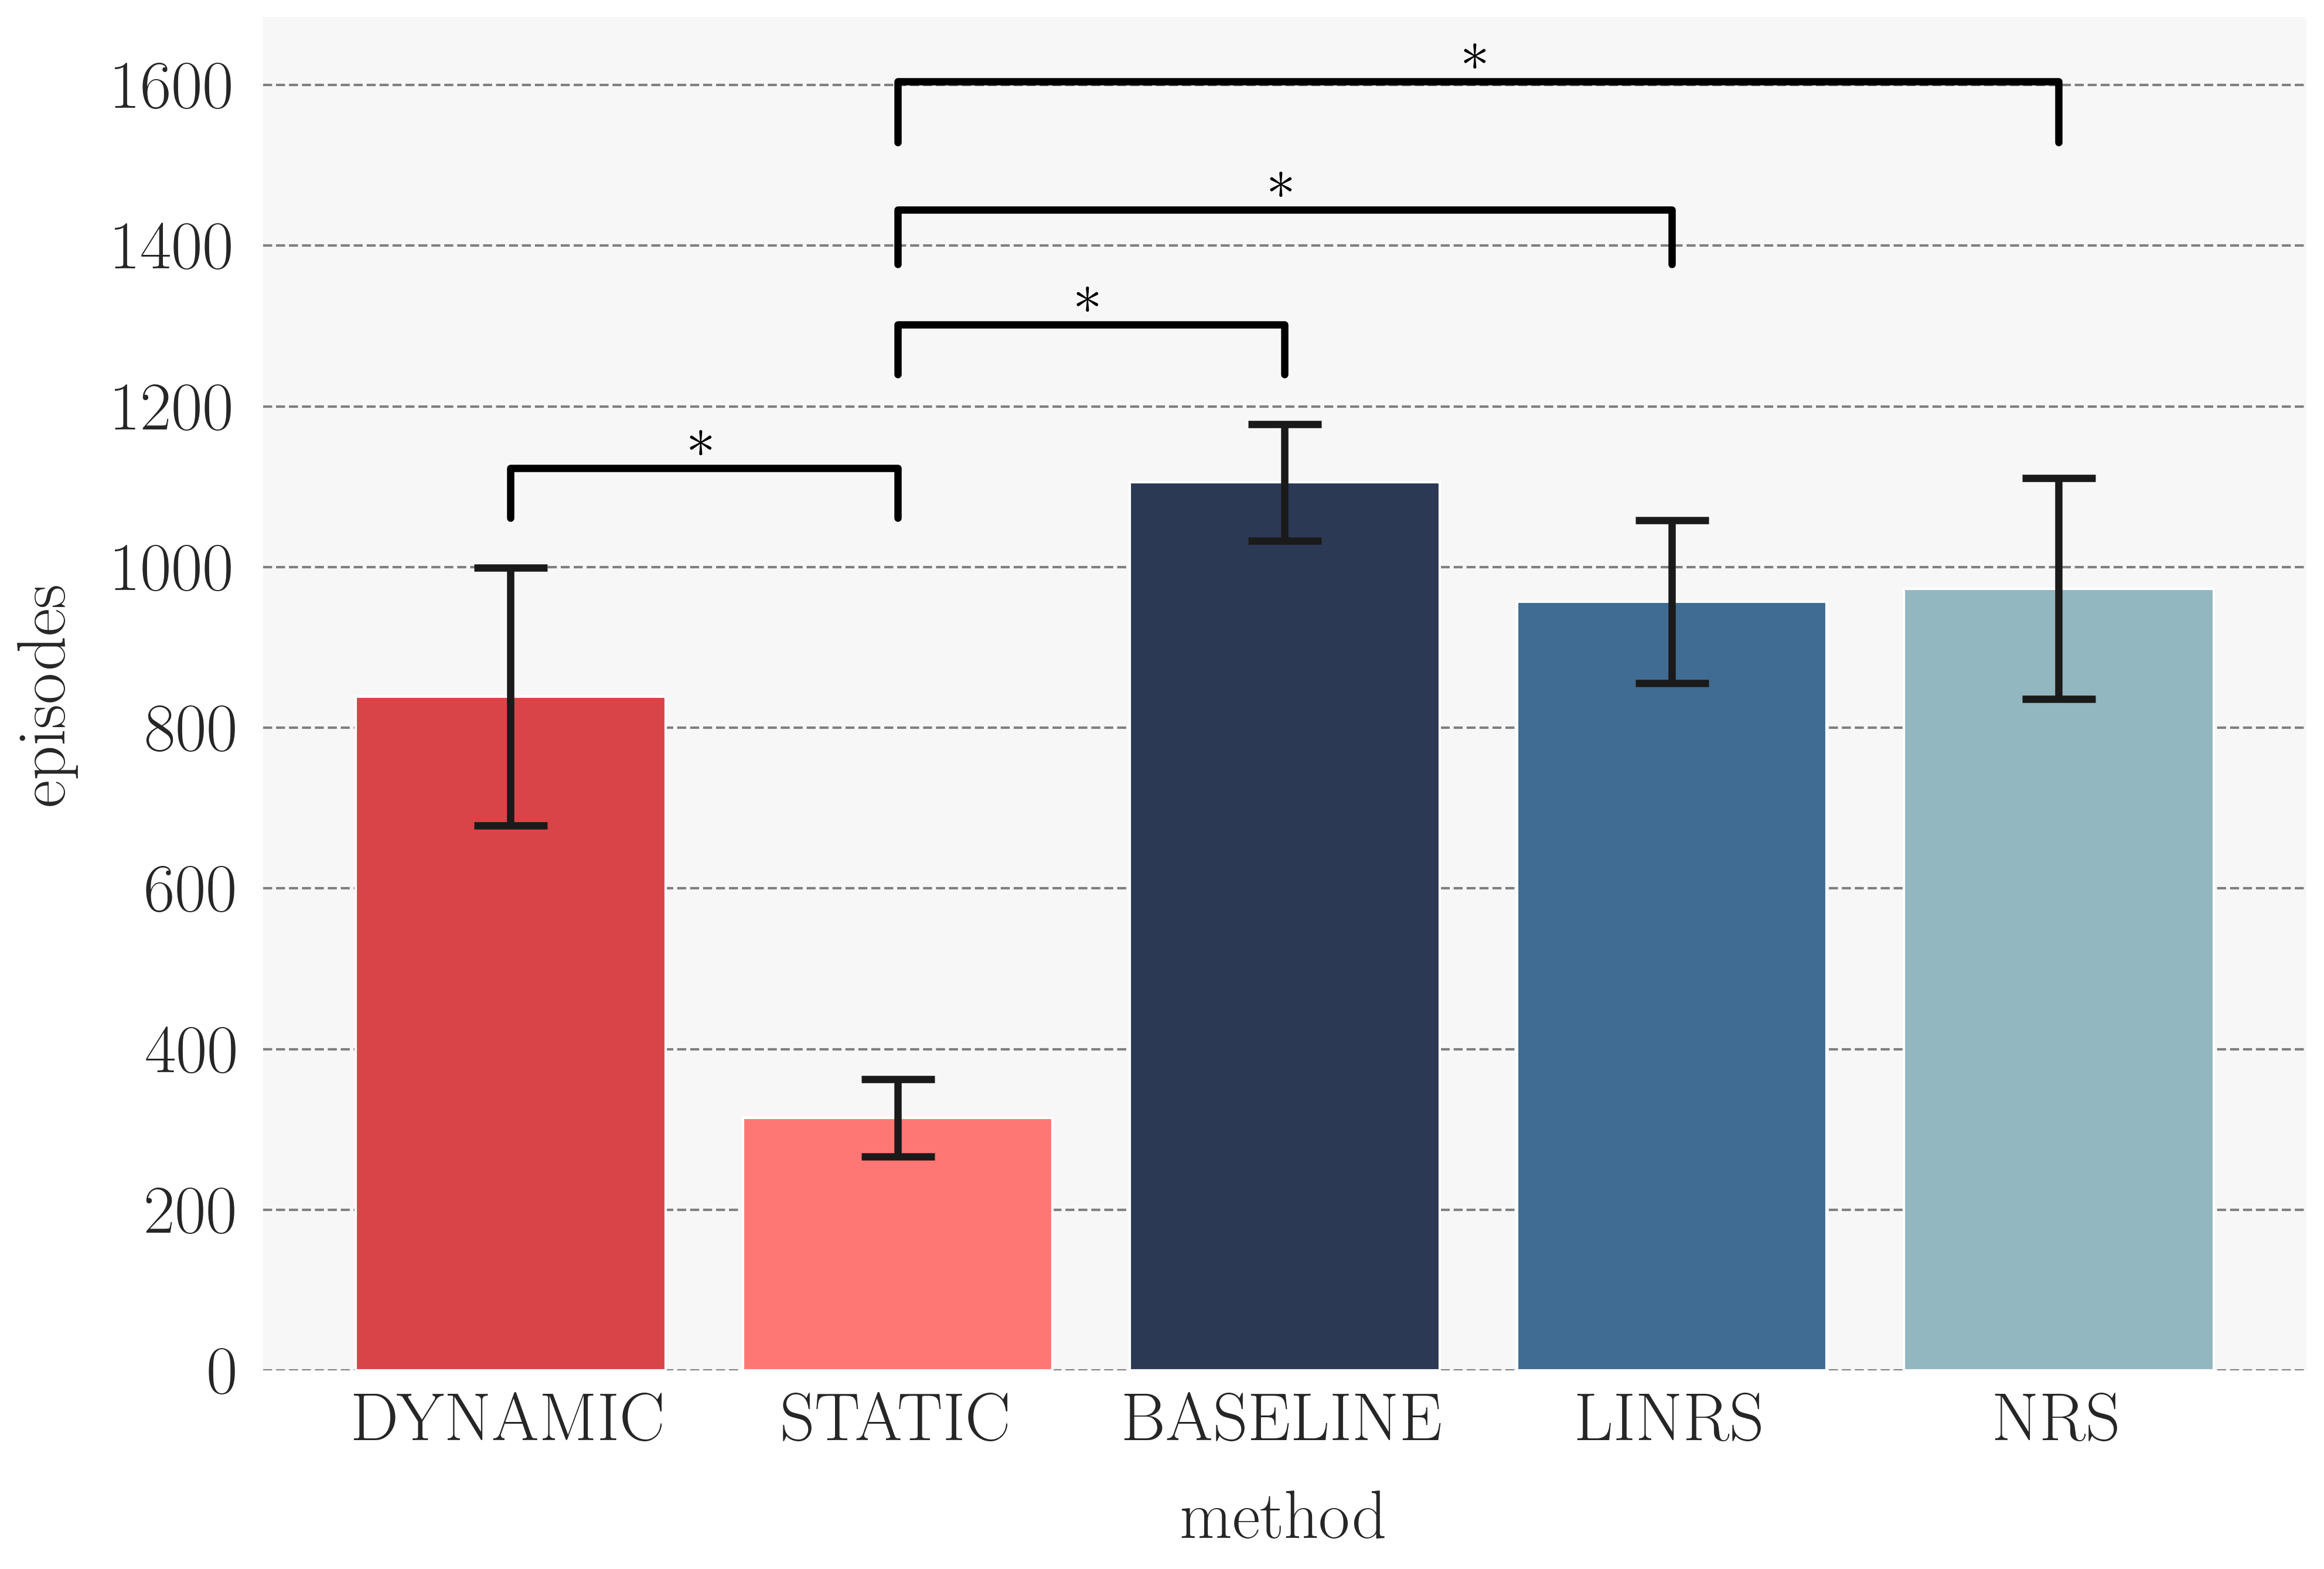

In [36]:
domain = "picknplace"
metric = "time_to_threshold_8"
data_df = pd.read_csv(f"../notebooks/in/{domain}/{metric}.csv", index_col=0)

target_data_df = data_df.loc[:99, ["DYN-HUMAN-", "STATIC-HUMAN-", "BASELINE-", "LINRS-", "NRS-"]].rename(
    columns={
        "DYN-HUMAN-": "DYNAMIC", "STATIC-HUMAN-": "STATIC",
        "BASELINE-": "BASELINE", "LINRS-": "LINRS", "NRS-": "NRS"
    }
)
tuples = [(0, 1, "$*$"), (1, 2, "$*$"), (1, 3, "$*$"), (1, 4, "$*$")]
bar_plot_with_asterisk(metric, domain, target_data_df, tuples)

### Subgoal Quality

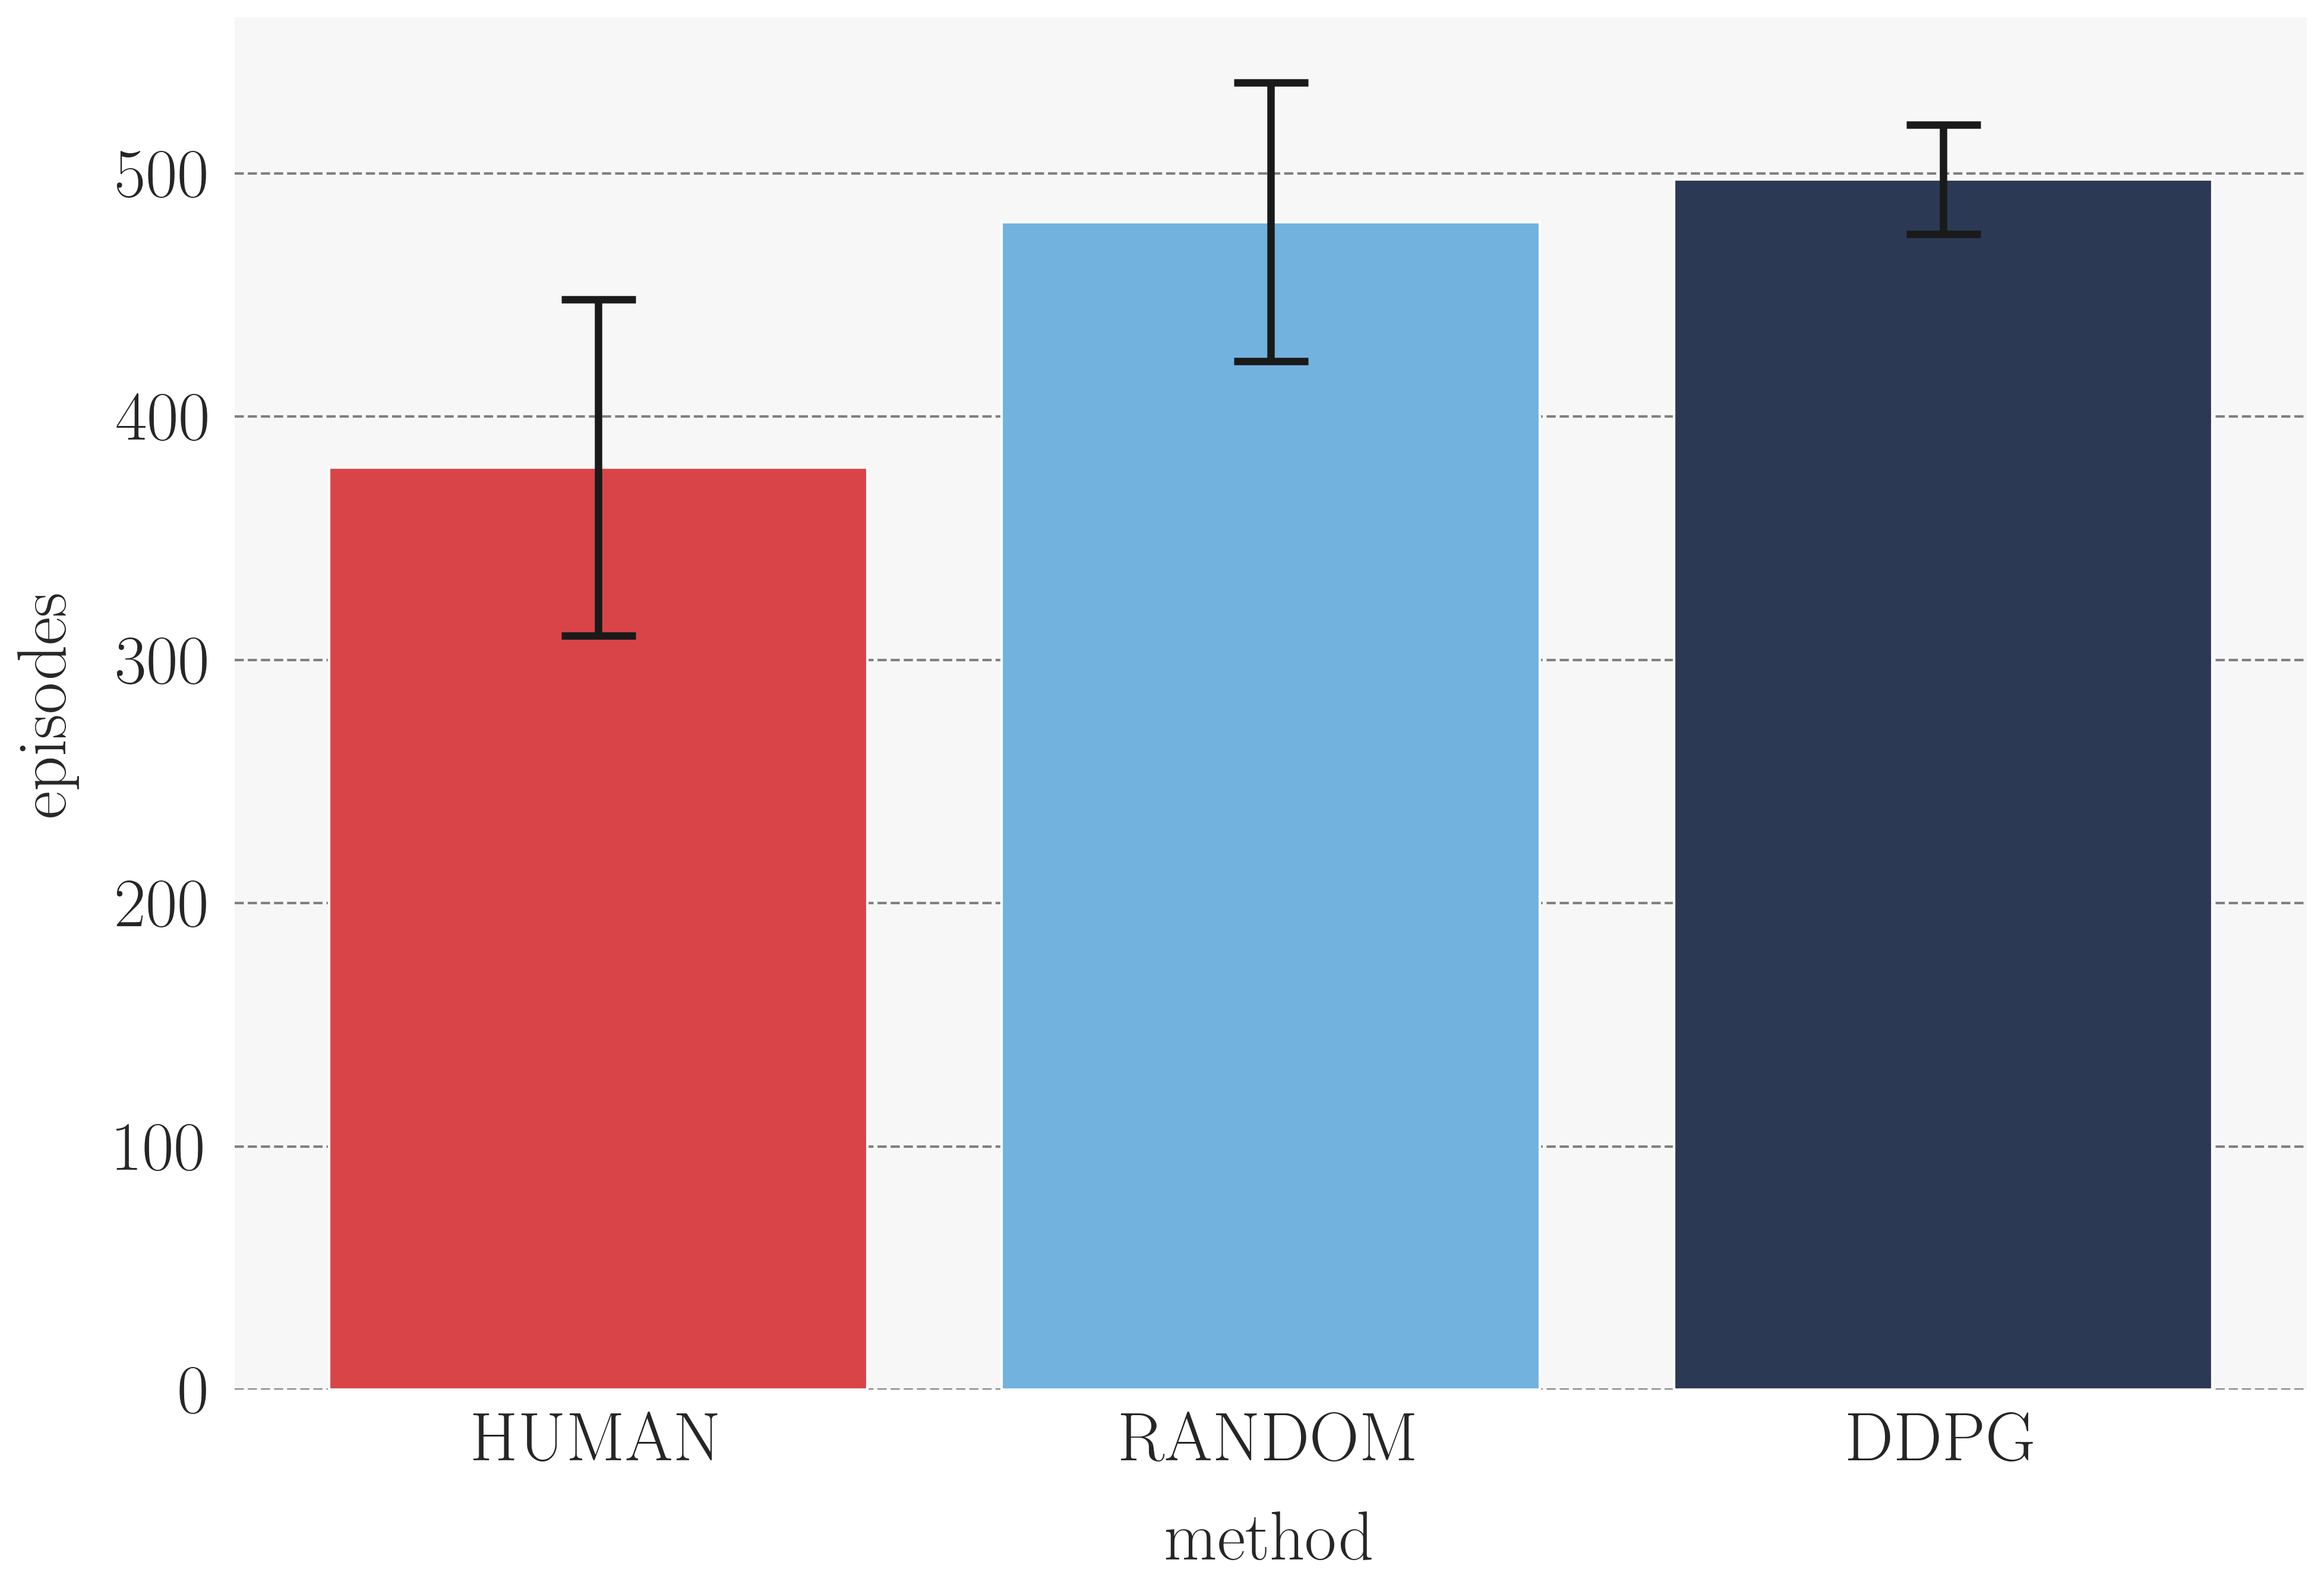

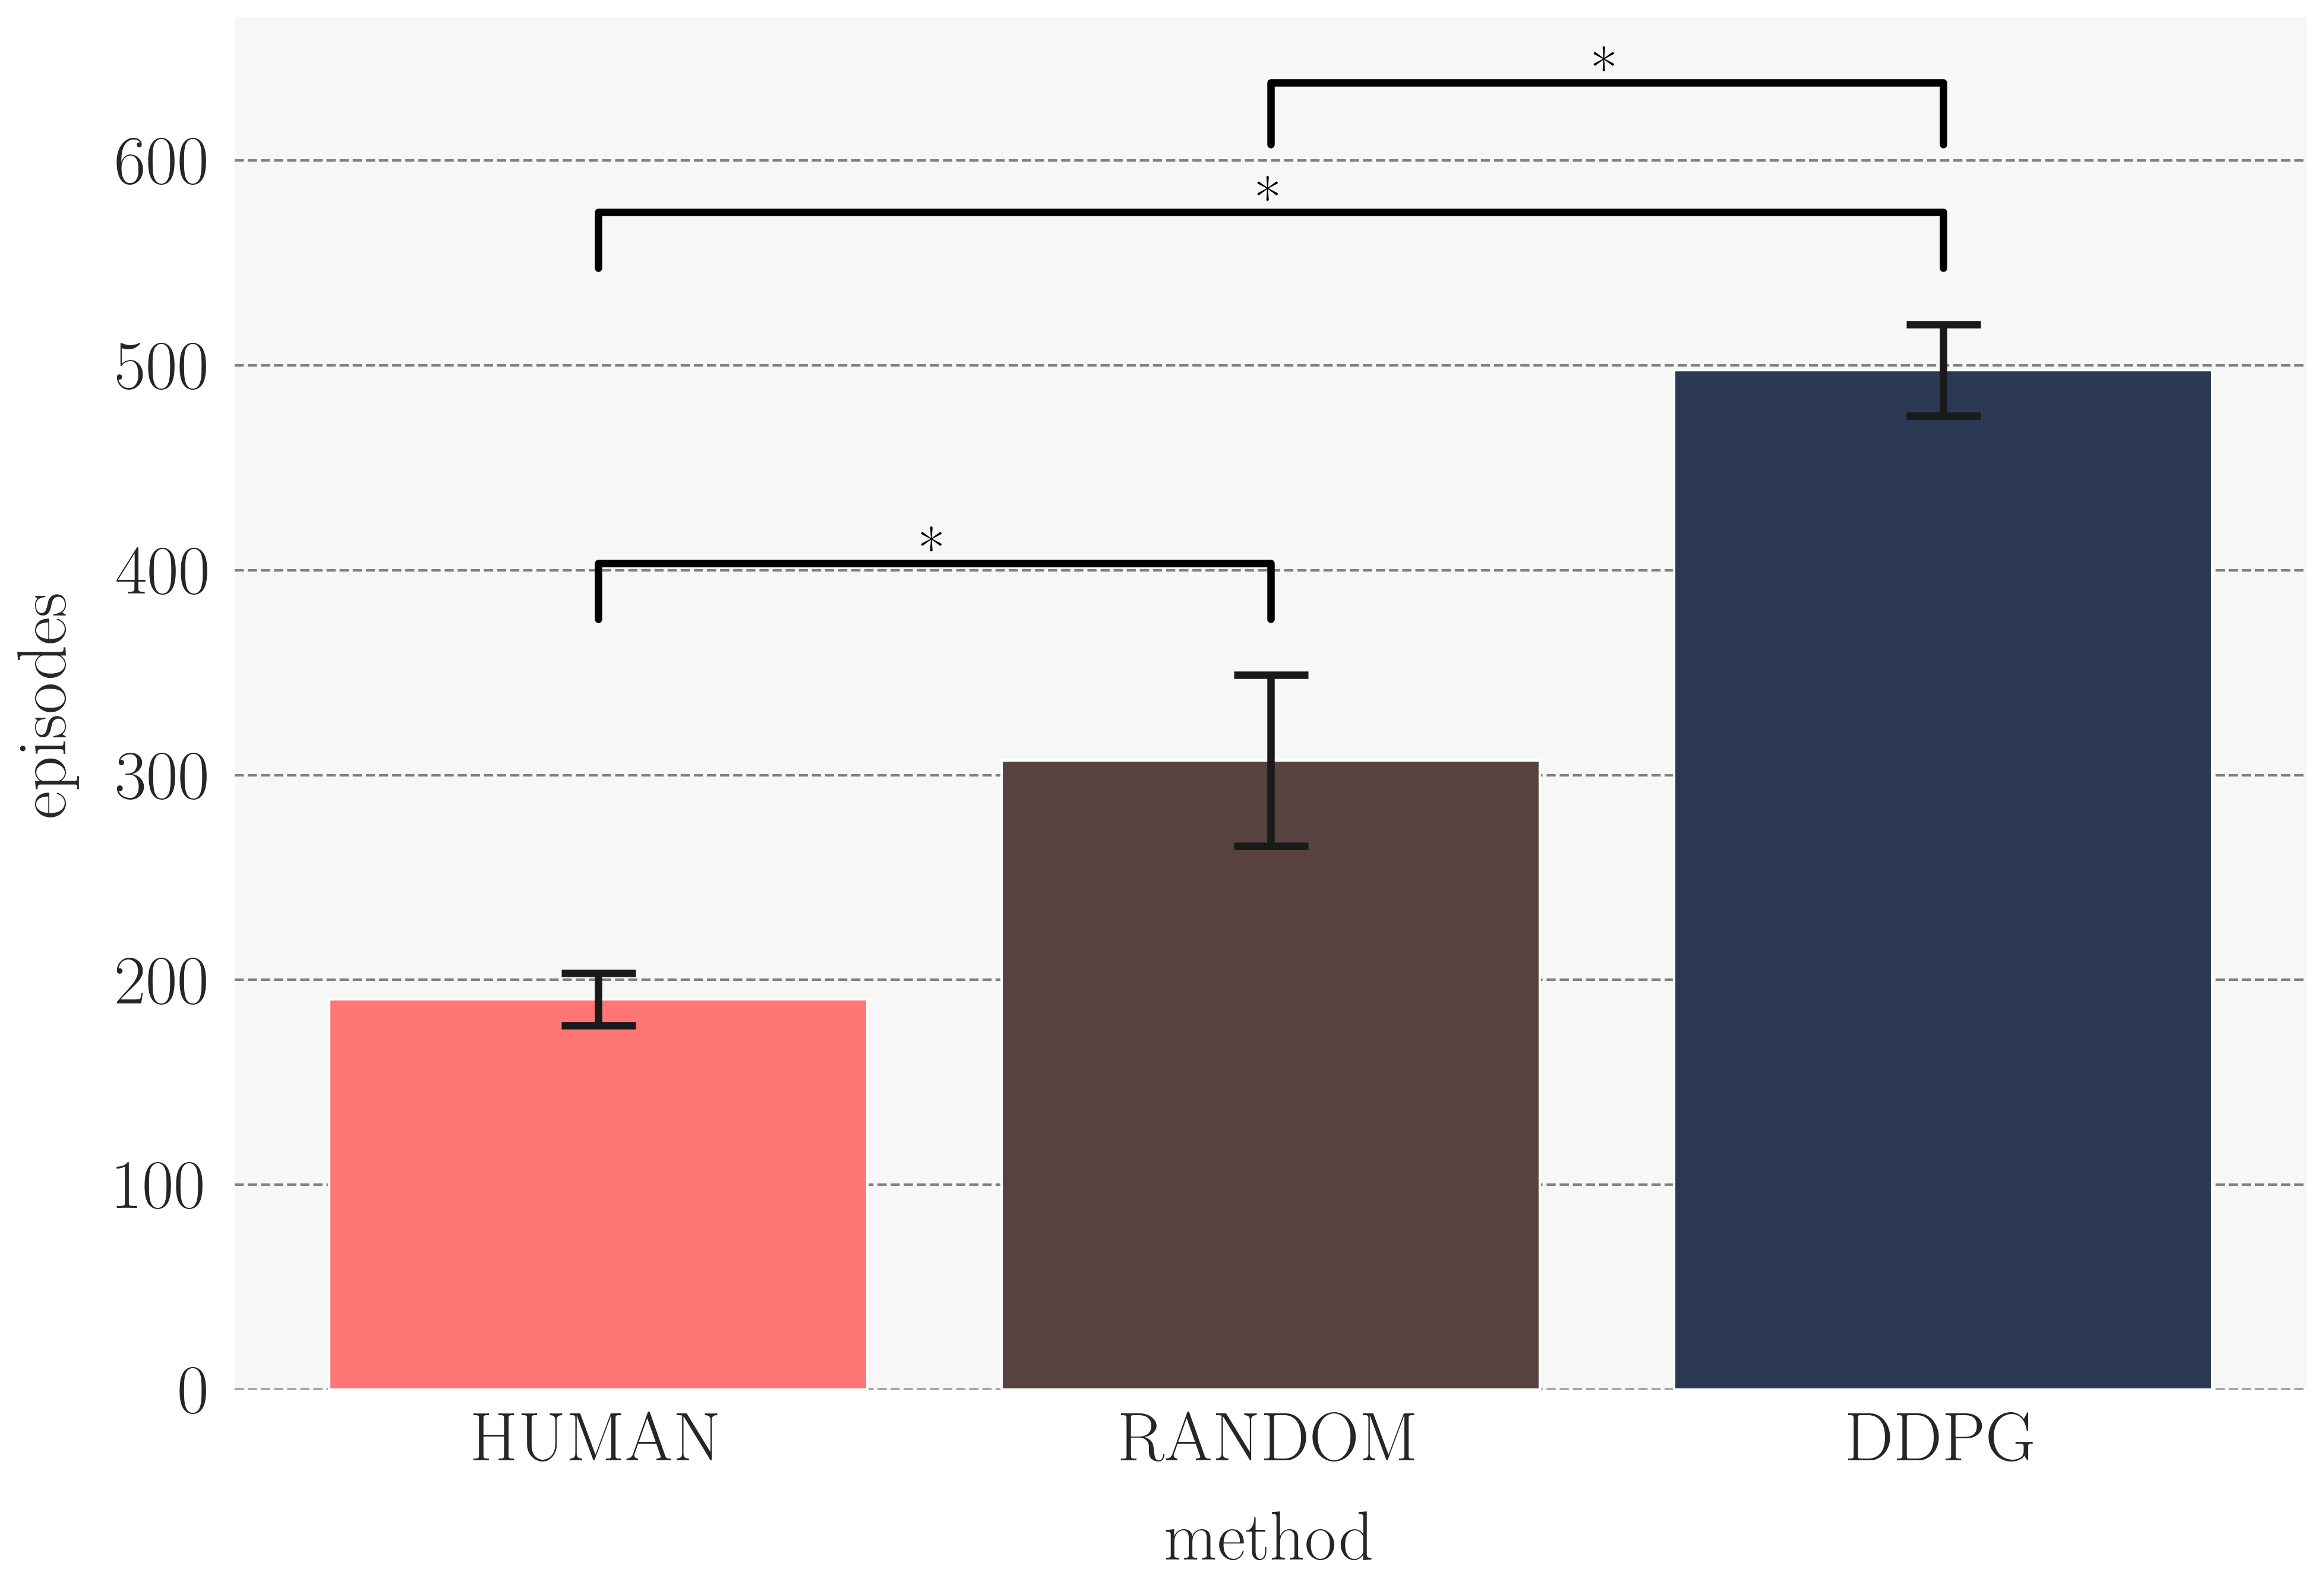

In [37]:
domain = "picknplace"
metric = "time_to_threshold_2"
data_df = pd.read_csv(f"../notebooks/in/{domain}/{metric}.csv", index_col=0)

target_data_df = data_df.rename(
    columns={
        "BASELINE-": "DDPG"
    }
)
# dynamic
dynamic_df = target_data_df[["DYN-HUMAN-", "DYN-RANDOM-", "DDPG"]].rename(
    columns={
        "DYN-HUMAN-": "HUMAN", "DYN-RANDOM-": "RANDOM"
    }
)
tuples = []
bar_plot_with_asterisk_qsubg(metric, domain, dynamic_df, tuples, "dynamic", ["#d94448", "#72B2DF", "#2b3955"])
# static
static_df = target_data_df[["STATIC-HUMAN-", "STATIC-RANDOM-", "DDPG"]].rename(
    columns={
        "STATIC-HUMAN-": "HUMAN", "STATIC-RANDOM-": "RANDOM"
    }
)
tuples = [(0, 1, "*"), (0, 2, "*"), (1, 2, "*")]
bar_plot_with_asterisk_qsubg(metric, domain, static_df, tuples, "static", ["#ff7774", "#574240", "#2b3955"])


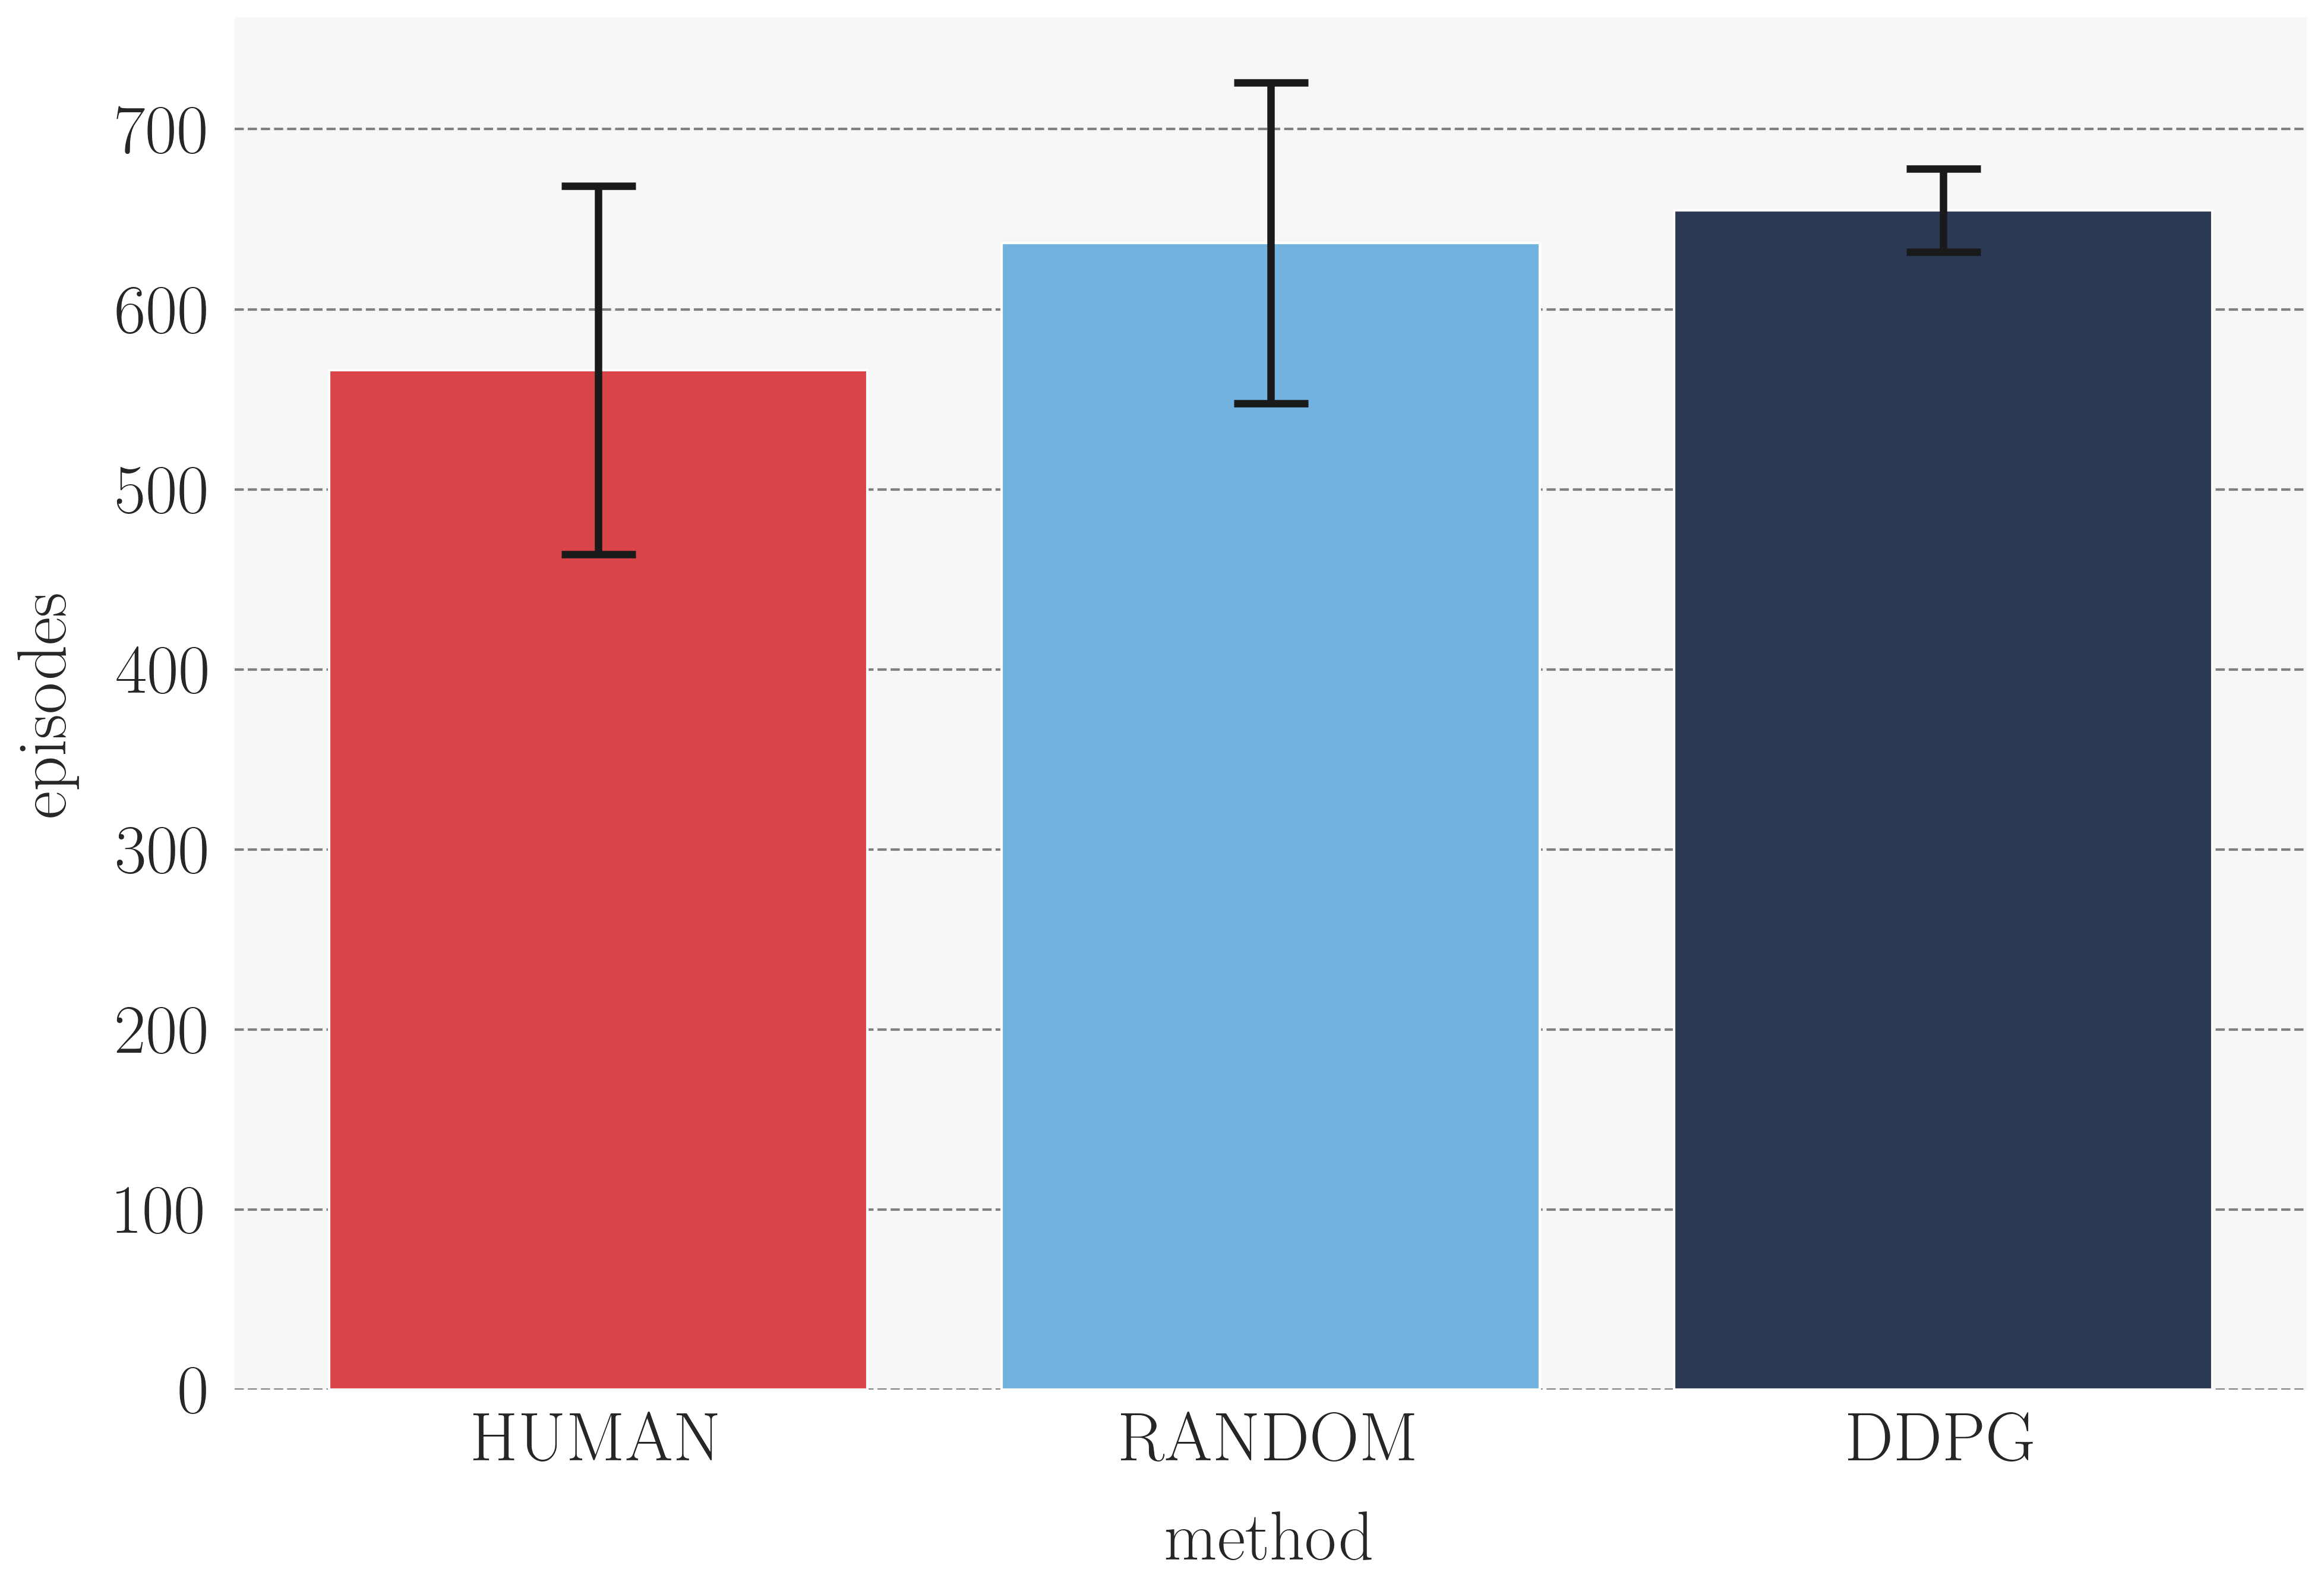

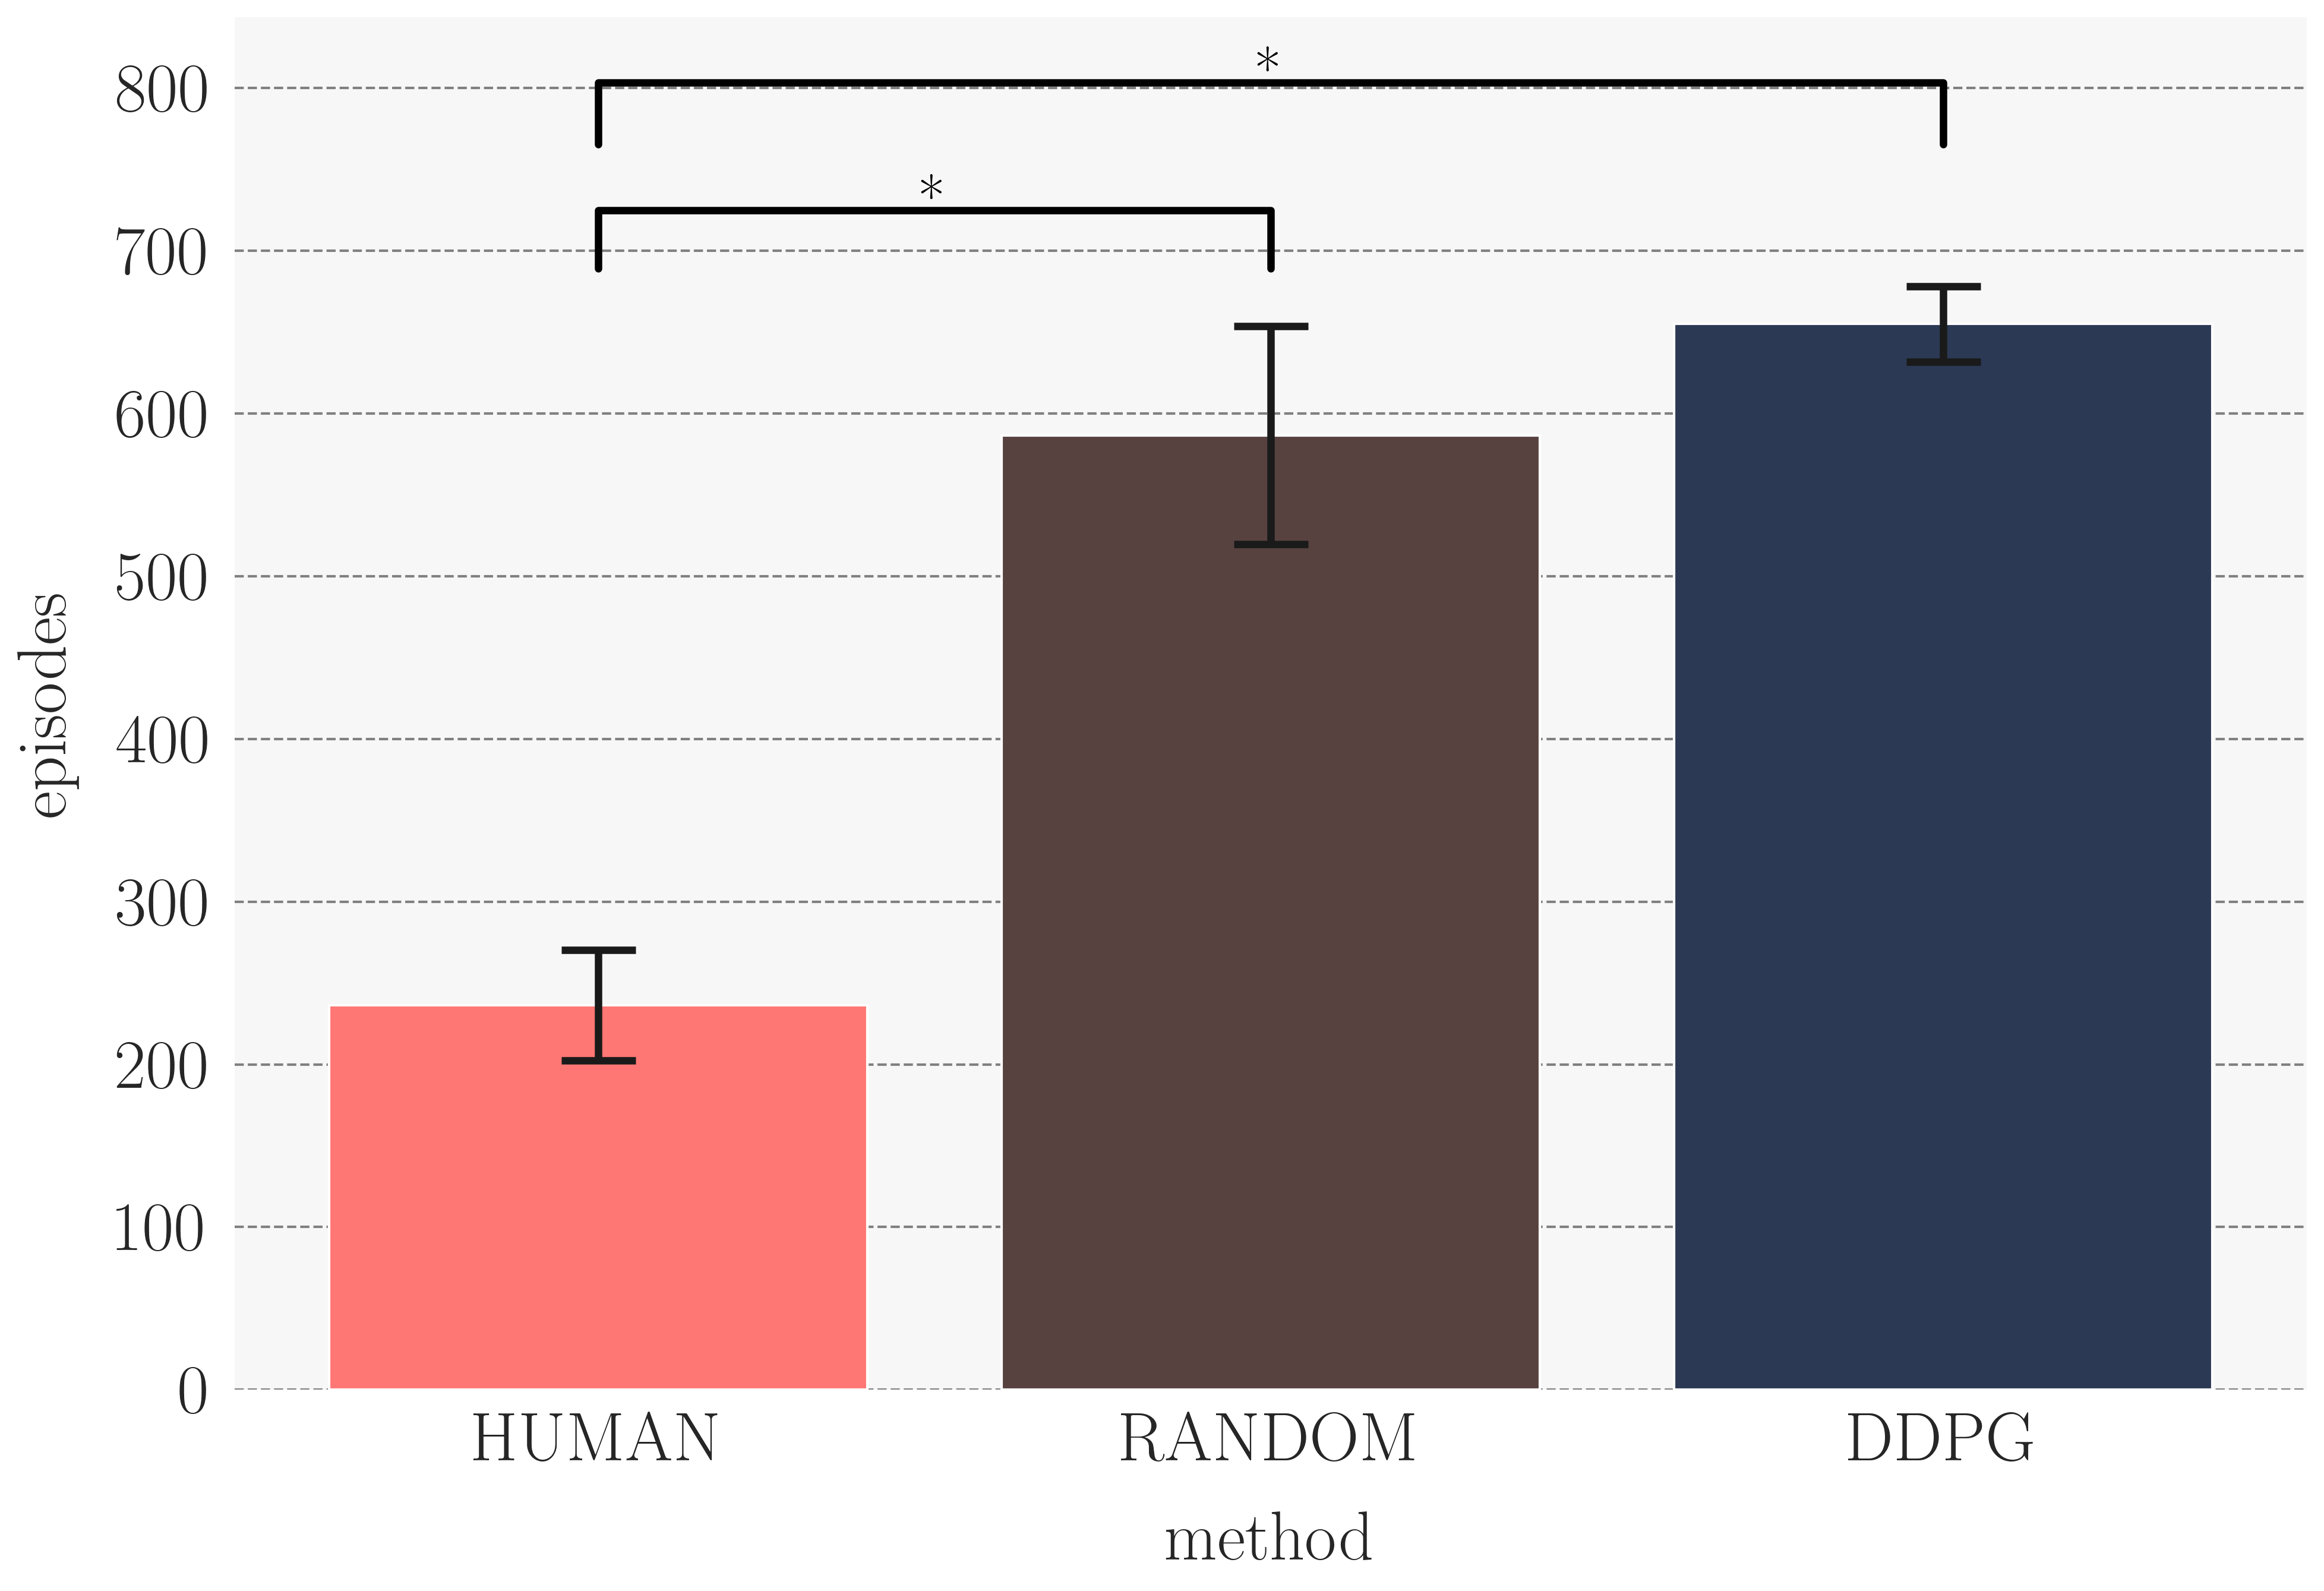

In [38]:
domain = "picknplace"
metric = "time_to_threshold_4"
data_df = pd.read_csv(f"../notebooks/in/{domain}/{metric}.csv", index_col=0)

target_data_df = data_df.rename(
    columns={
        "BASELINE-": "DDPG"
    }
)
# dynamic
dynamic_df = target_data_df[["DYN-HUMAN-", "DYN-RANDOM-", "DDPG"]].rename(
    columns={
        "DYN-HUMAN-": "HUMAN", "DYN-RANDOM-": "RANDOM"
    }
)
tuples = []
bar_plot_with_asterisk_qsubg(metric, domain, dynamic_df, tuples, "dynamic", ["#d94448", "#72B2DF", "#2b3955"])
# static
static_df = target_data_df[["STATIC-HUMAN-", "STATIC-RANDOM-", "DDPG"]].rename(
    columns={
        "STATIC-HUMAN-": "HUMAN", "STATIC-RANDOM-": "RANDOM"
    }
)
tuples = [(0, 1, "*"), (0, 2, "*")]
bar_plot_with_asterisk_qsubg(metric, domain, static_df, tuples, "static", ["#ff7774", "#574240", "#2b3955"])


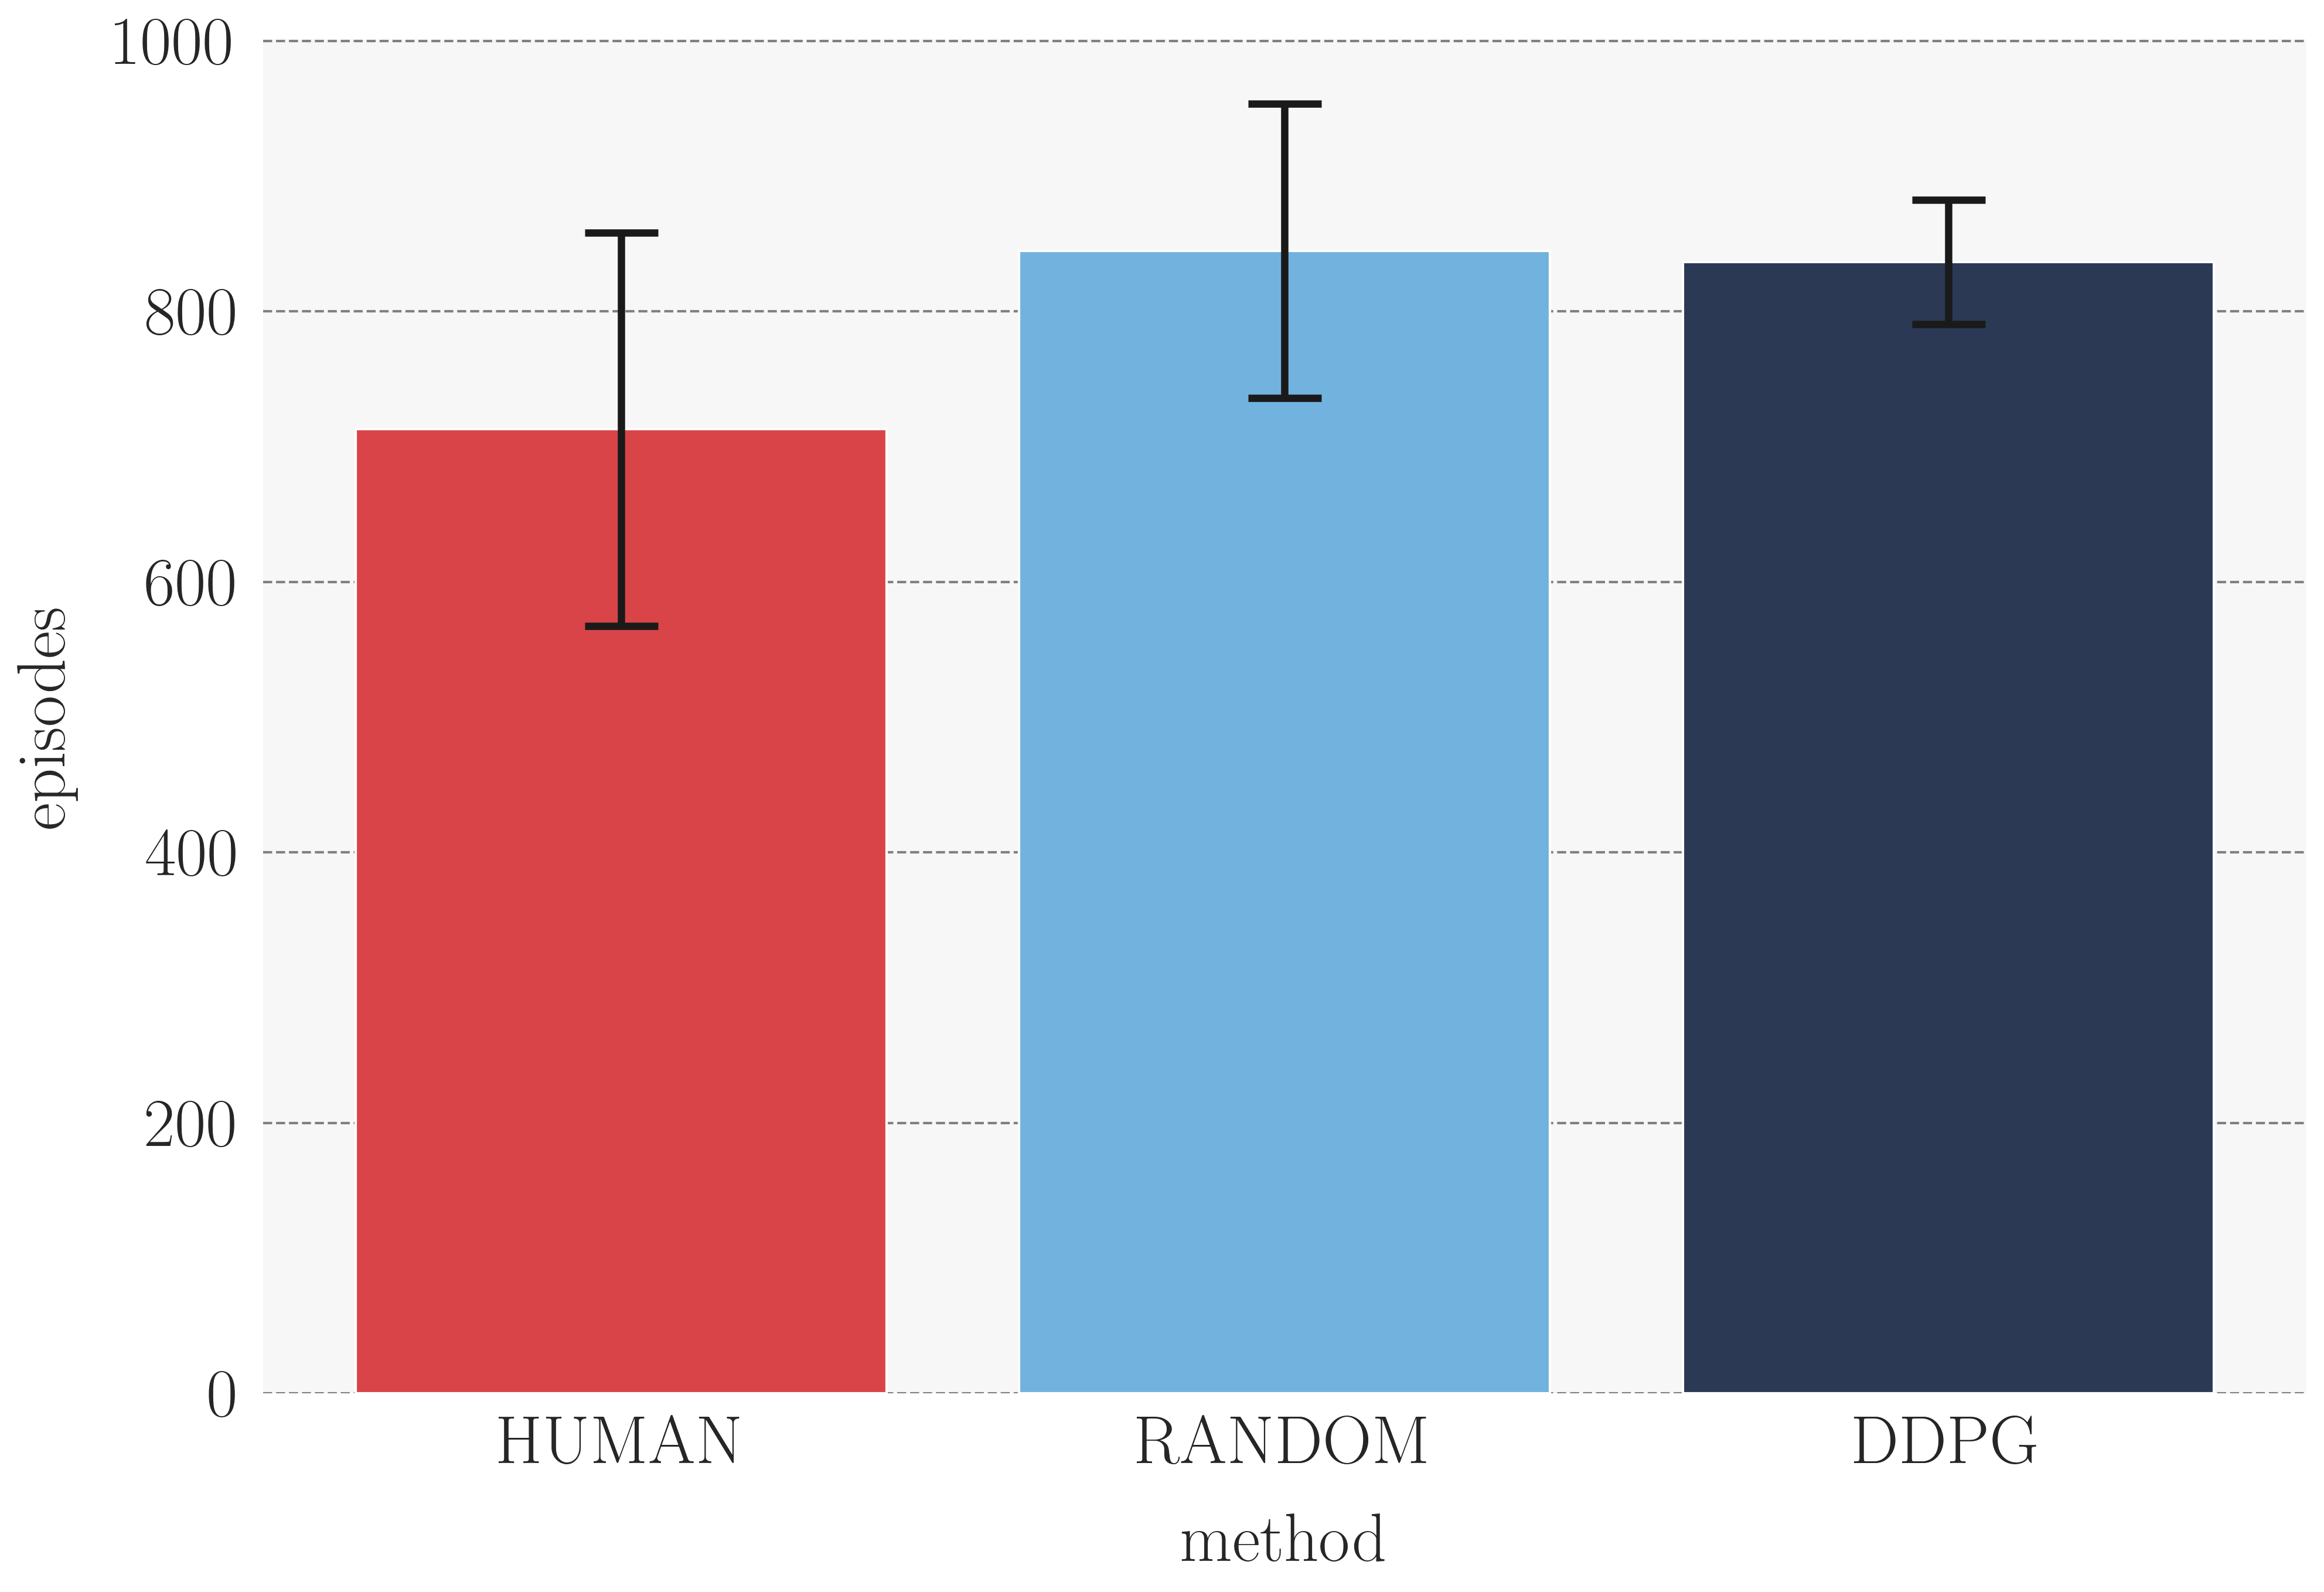

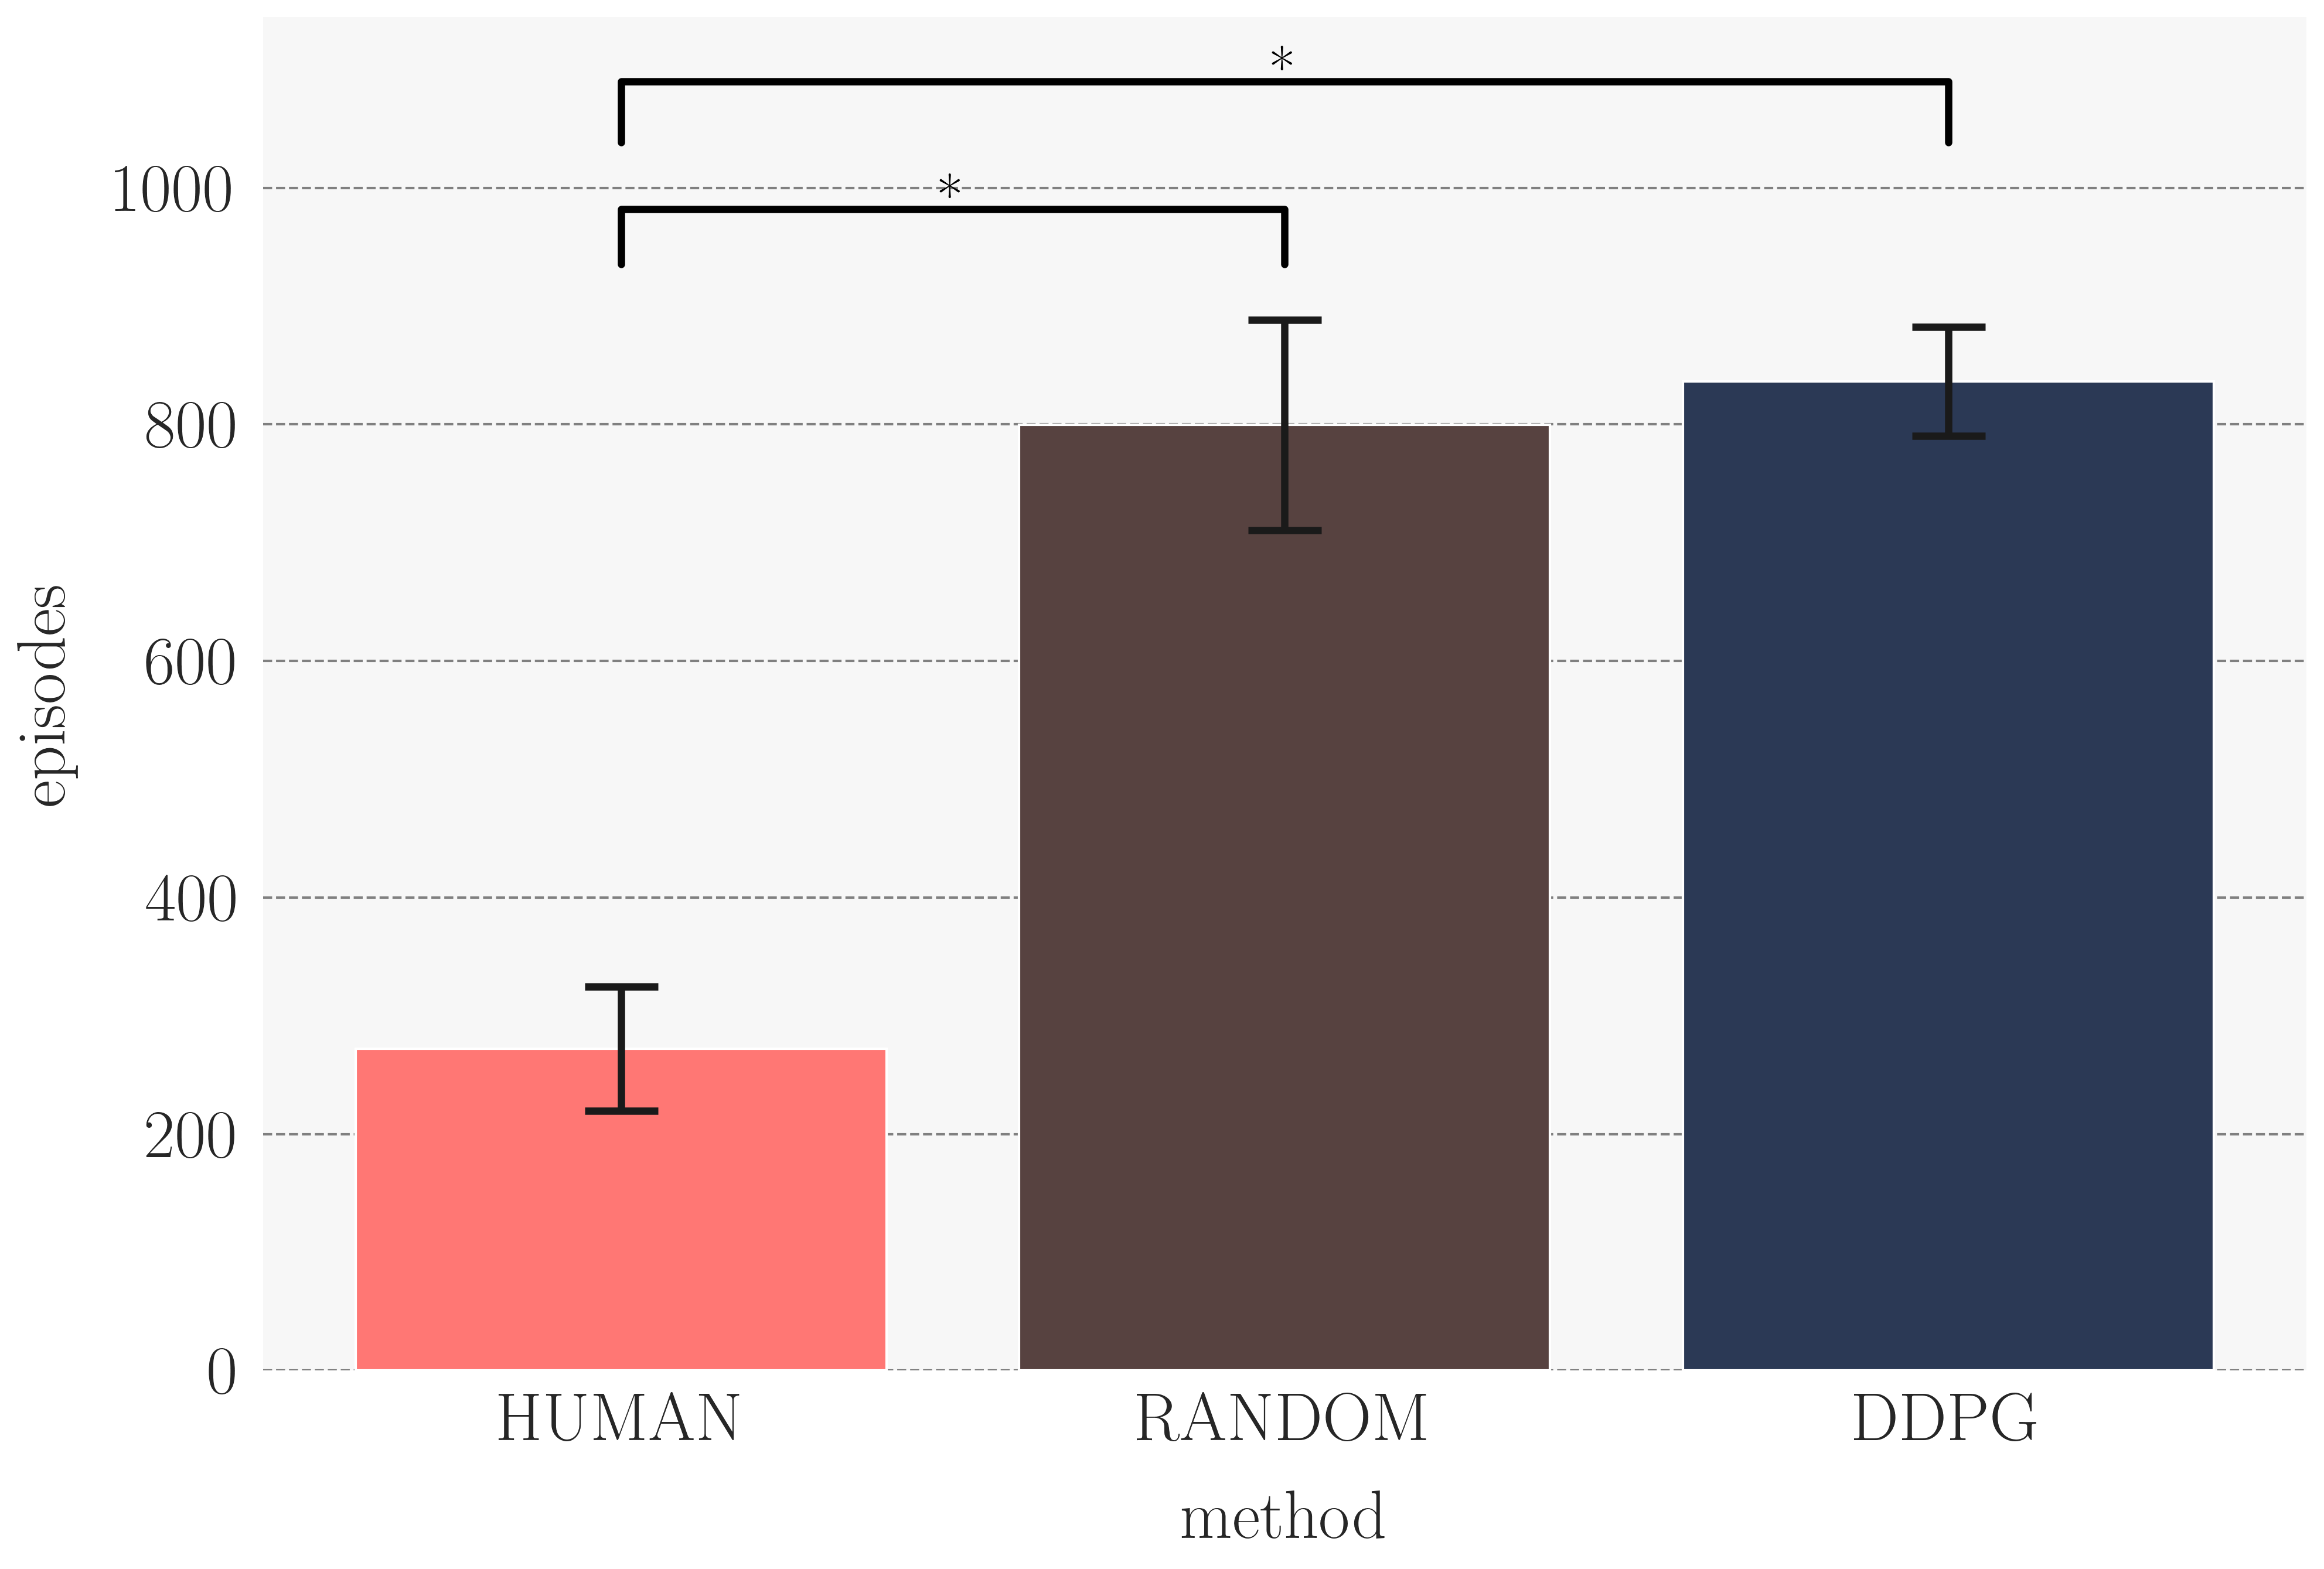

In [39]:
domain = "picknplace"
metric = "time_to_threshold_6"
data_df = pd.read_csv(f"../notebooks/in/{domain}/{metric}.csv", index_col=0)

target_data_df = data_df.rename(
    columns={
        "BASELINE-": "DDPG"
    }
)
# dynamic
dynamic_df = target_data_df[["DYN-HUMAN-", "DYN-RANDOM-", "DDPG"]].rename(
    columns={
        "DYN-HUMAN-": "HUMAN", "DYN-RANDOM-": "RANDOM"
    }
)
tuples = []
bar_plot_with_asterisk_qsubg(metric, domain, dynamic_df, tuples, "dynamic", ["#d94448", "#72B2DF", "#2b3955"])
# static
static_df = target_data_df[["STATIC-HUMAN-", "STATIC-RANDOM-", "DDPG"]].rename(
    columns={
        "STATIC-HUMAN-": "HUMAN", "STATIC-RANDOM-": "RANDOM"
    }
)
tuples = [(0, 1, "*"), (0, 2, "*")]
bar_plot_with_asterisk_qsubg(metric, domain, static_df, tuples, "static", ["#ff7774", "#574240", "#2b3955"])


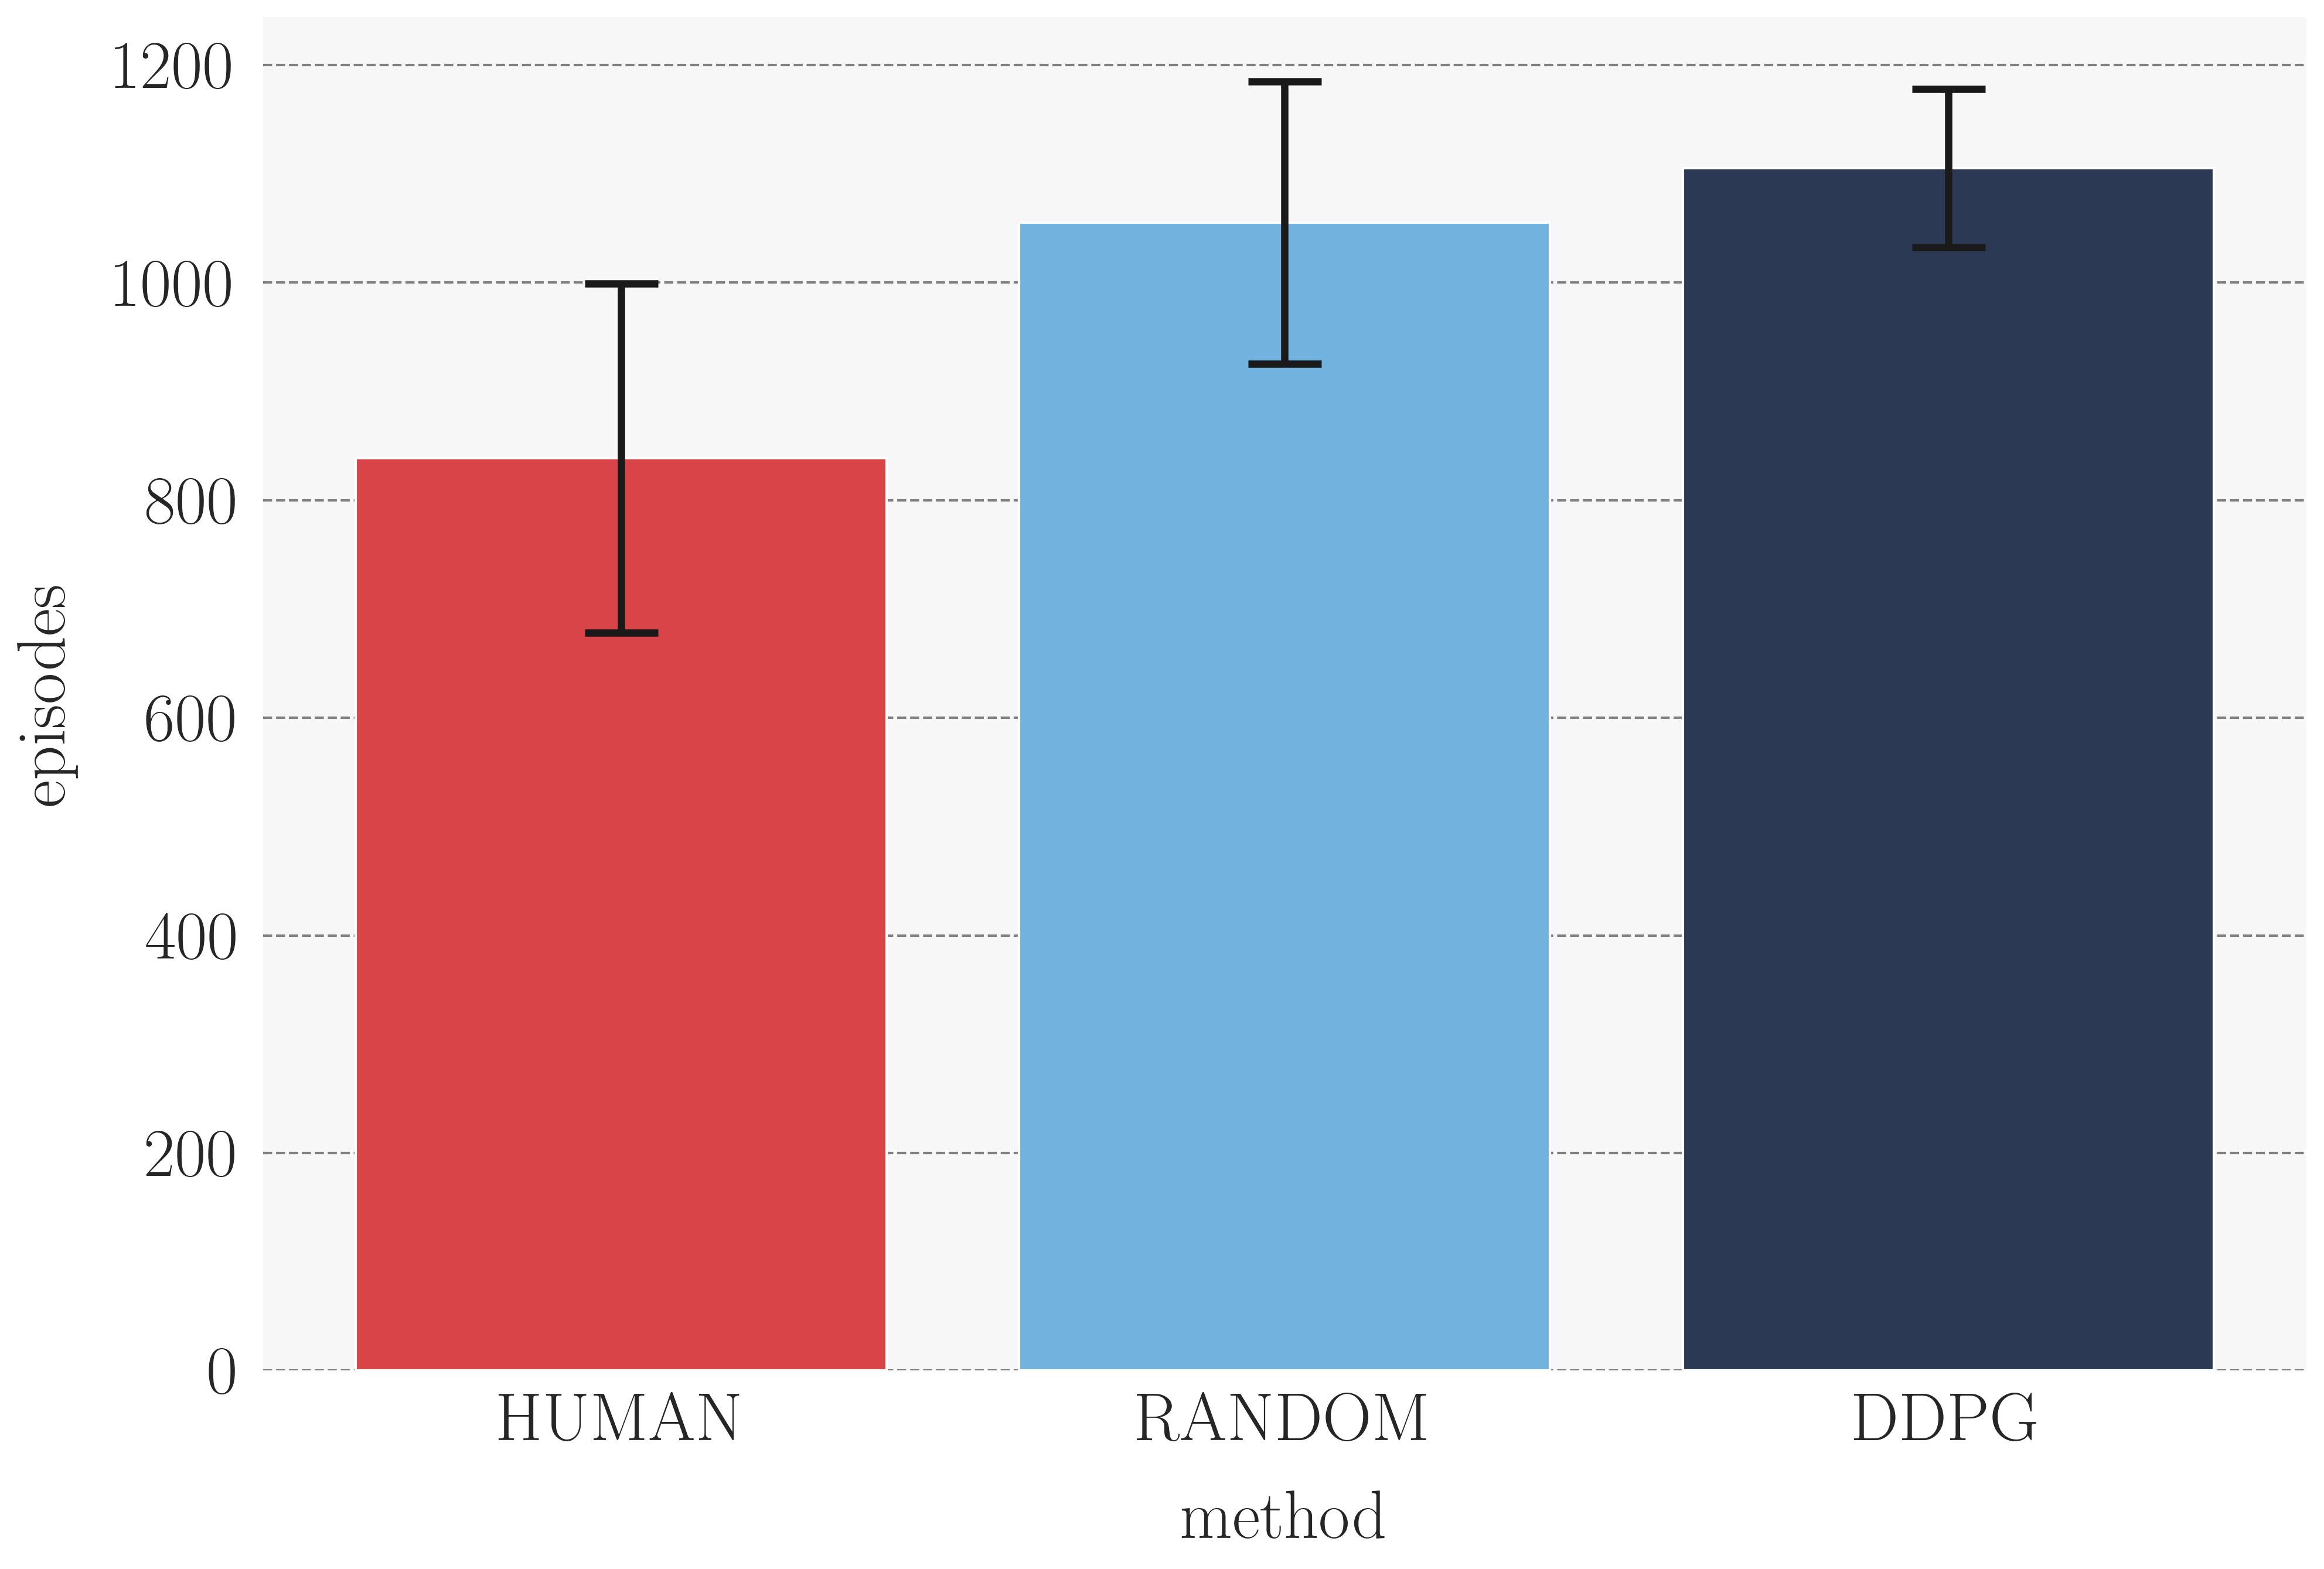

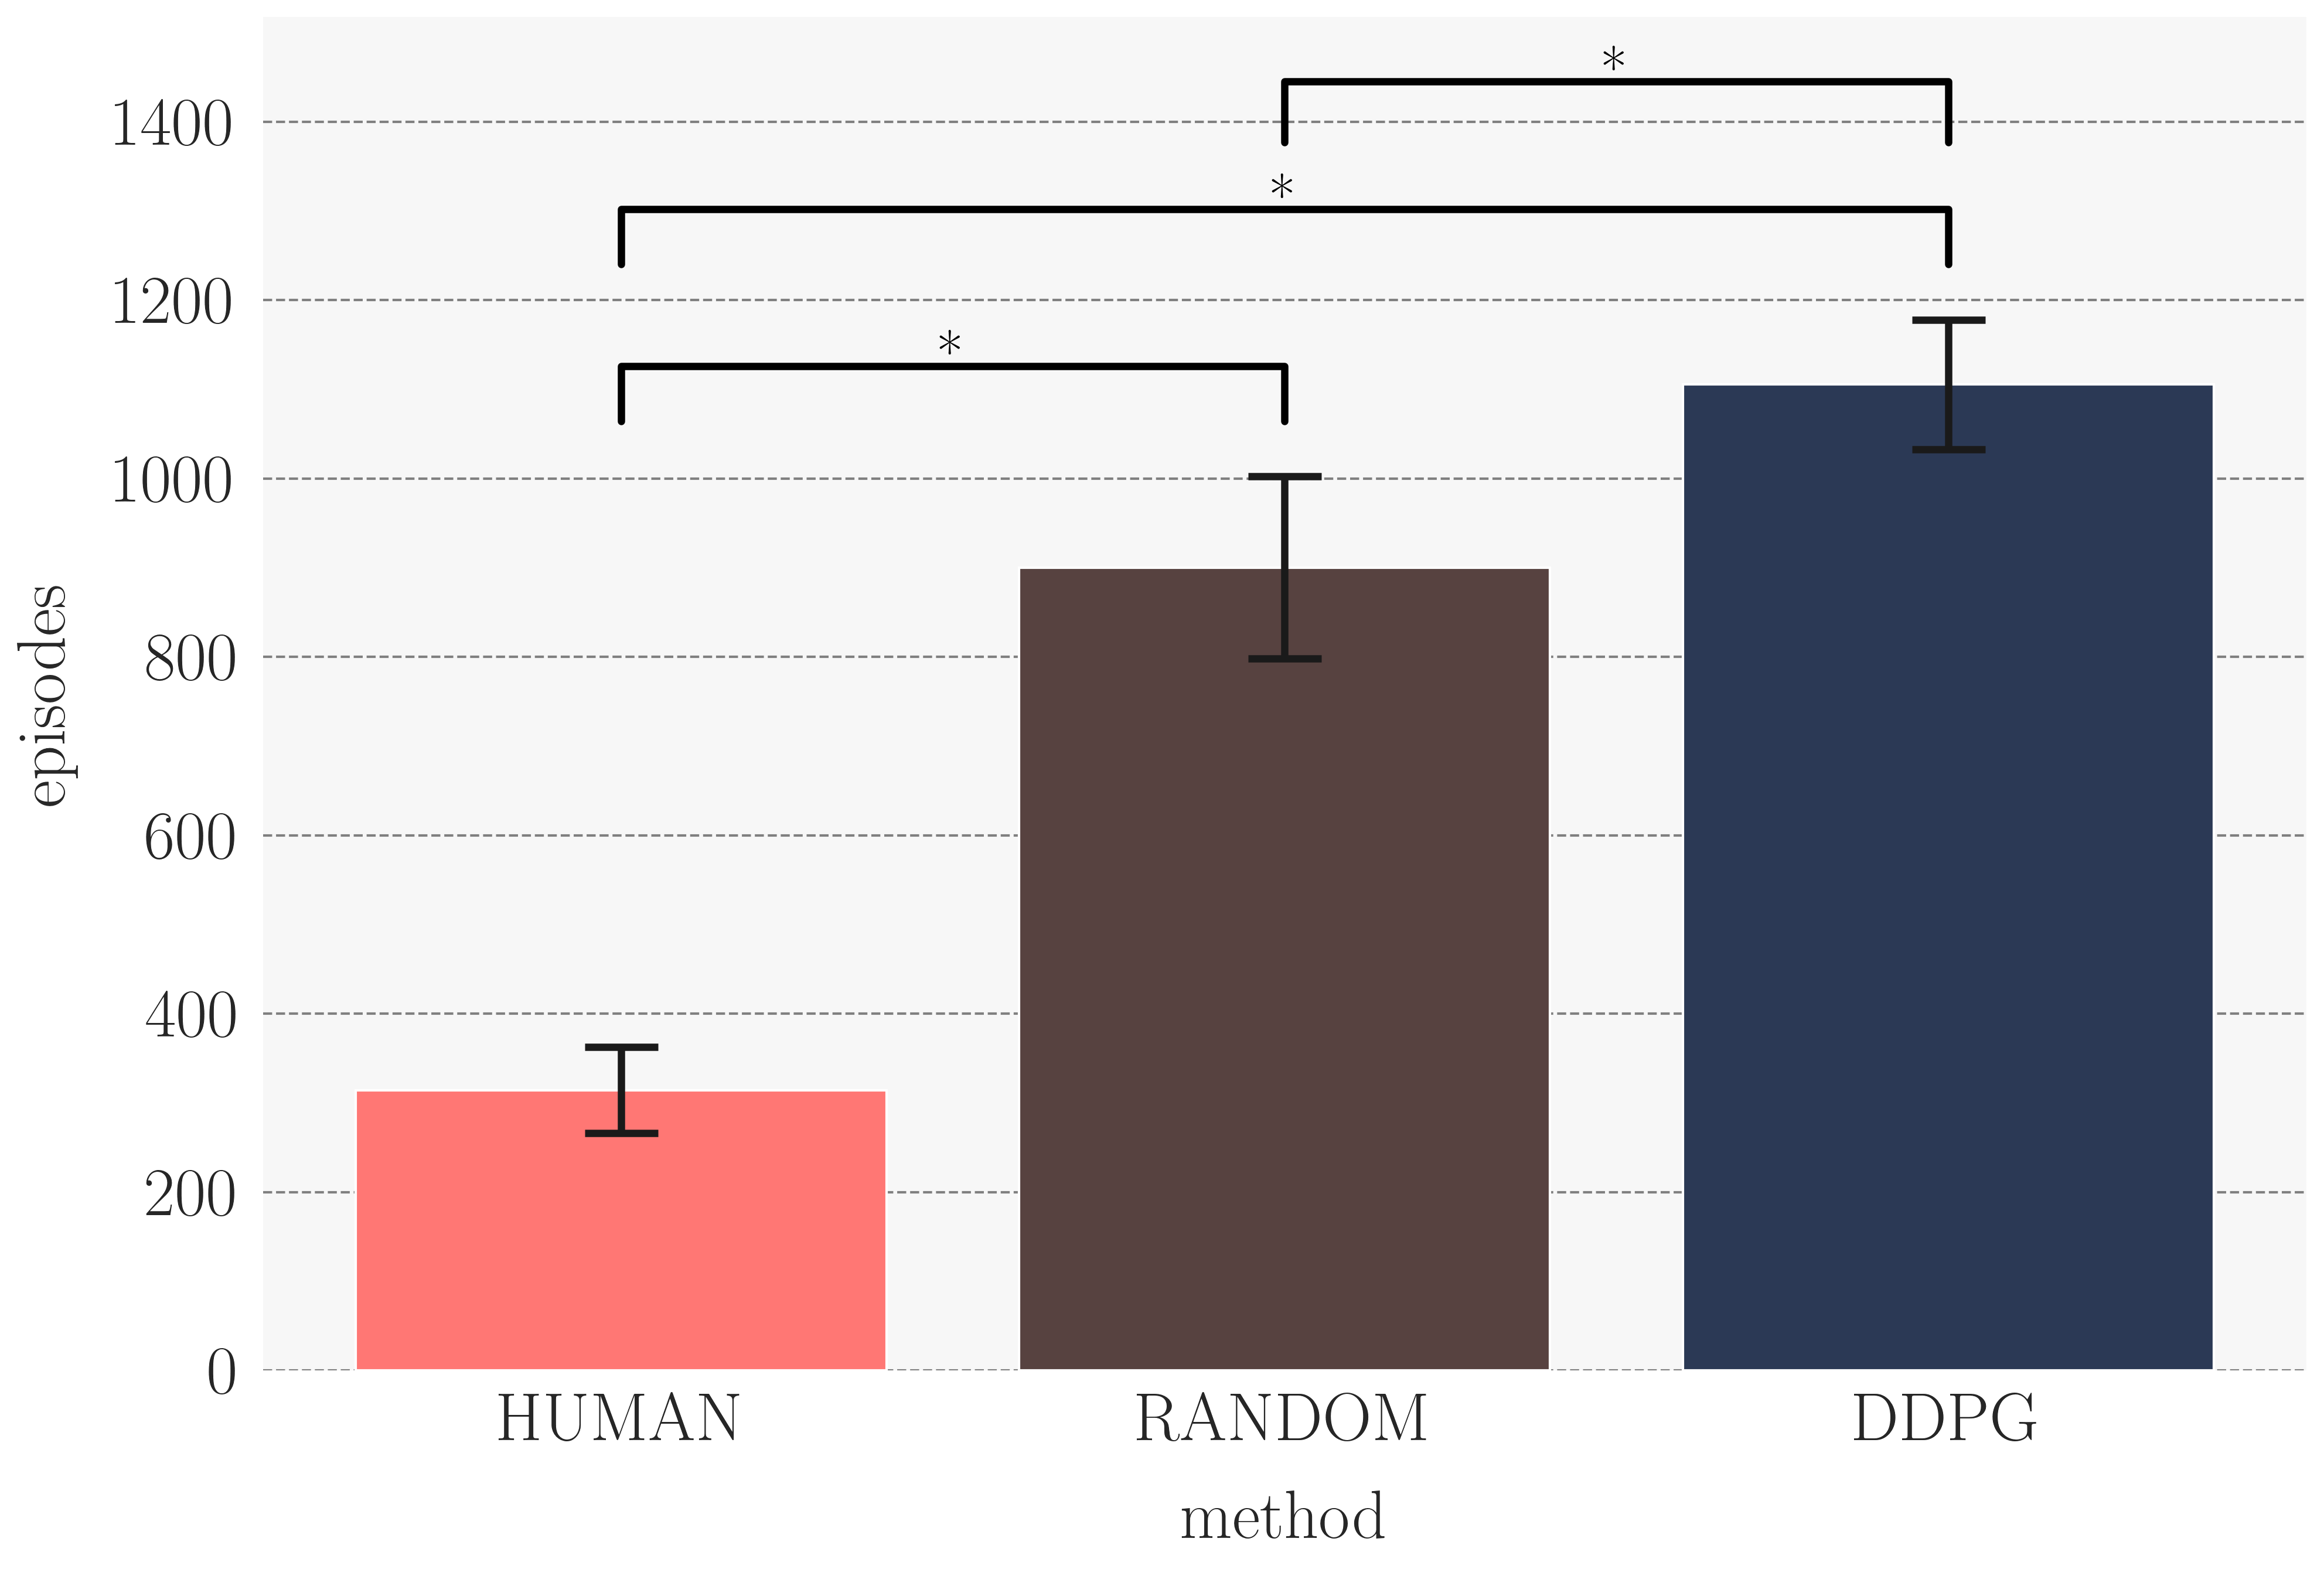

In [40]:
domain = "picknplace"
metric = "time_to_threshold_8"
data_df = pd.read_csv(f"../notebooks/in/{domain}/{metric}.csv", index_col=0)

target_data_df = data_df.rename(
    columns={
        "BASELINE-": "DDPG"
    }
)
# dynamic
dynamic_df = target_data_df[["DYN-HUMAN-", "DYN-RANDOM-", "DDPG"]].rename(
    columns={
        "DYN-HUMAN-": "HUMAN", "DYN-RANDOM-": "RANDOM"
    }
)
tuples = []
bar_plot_with_asterisk_qsubg(metric, domain, dynamic_df, tuples, "dynamic", ["#d94448", "#72B2DF", "#2b3955"])
# static
static_df = target_data_df[["STATIC-HUMAN-", "STATIC-RANDOM-", "DDPG"]].rename(
    columns={
        "STATIC-HUMAN-": "HUMAN", "STATIC-RANDOM-": "RANDOM"
    }
)
tuples = [(0, 1, "*"), (0, 2, "*"), (1, 2, "*")]
bar_plot_with_asterisk_qsubg(metric, domain, static_df, tuples, "static", ["#ff7774", "#574240", "#2b3955"])
